# Regressão Linear com Gradiente Descendente*
##### * Exercício para a disciplina Aprendizagem de Máquina, PPGCC - UFCG.

Regressão Linear é uma técnica de Aprendizagem de Máquina cujo objetivo é gerar um modelo, a partir de um conjunto de dados, que define um relacionamento entre esses dados. Essa técnica, em geral, usa o método de otimização conhecido como Gradiente Descente, cujo objetivo é encontrar os valores ótimos do modelo, ou seja, um modelo com erro mínimo.

A seguir descrevemos um algoritmo de Regressão Linear, usando a linguagem Python, baseado na [aula de Siraj Raval](https://www.youtube.com/watch?v=XdM6ER7zTLk).

### 1. Os dados são os anos de escolaridade de uma pessoa e o seu salário

Queremos analisar a relação entre a escolaridade de uma pessoa (anos de estudo) e o seu salário. Ou seja, criaremos um algoritmo de regressão linear que nos mostrará qual a função __y = mx + b__, onde __y__ = salário, __x__ = anosDeEstudo e os parâmetros __m__ e __b__ serão encontrados pela regressão.

In [15]:
# @author Veruska Santos
# @version 0.2

# Código baseado na aula de Siraj Raval
# Dados: anos de escolaridade de uma pessoa e o seu salário

# top para ML, multiplicação de matrizes
from numpy import *

def compute_error_for_line_given_points(b, m, points):
    totalError = 0
    # calcula o erro para todos os dados
    for i in range(0, len(points)):
        x = points[i, 0]
        y = points[i, 1]
        totalError += (y - (m * x + b)) ** 2
    return totalError / float(len(points))

def step_gradient(b_current, m_current, points, learningRate):
    b_gradient = 0
    m_gradient = 0
    
    # gradient descent
    # cálculo das derivadas parciais
    N = float(len(points))
    for i in range(0, len(points)):
        x = points[i, 0]
        y = points[i, 1]
        b_gradient += -(2/N) * (y - ((m_current * x) + b_current))
        m_gradient += -(2/N) * x * (y - ((m_current * x) + b_current))
    new_b = b_current - (learningRate * b_gradient)
    new_m = m_current - (learningRate * m_gradient)
    return [new_b, new_m]

def gradient_descent_runner(points, starting_b, starting_m, learning_rate, num_iterations):
    b = starting_b
    m = starting_m
    for i in range(num_iterations):
        b, m = step_gradient(b, m, array(points), learning_rate)
    return [b, m]

def run():
    points = genfromtxt("income.csv", delimiter=",")
    # quão rápido deve ser o processo de aprendizagem
    learning_rate = 0.0001
    # y = mx + b é o modelo linear que nós queremos
    initial_b = 0 # intercepta o y
    initial_m = 0 # a inclininação da reta
    num_iterations = 1000 # quantidade de repetições do treinamento
    print "Starting gradient descent at b = {0}, m = {1}, error = {2}".format(initial_b, initial_m, compute_error_for_line_given_points(initial_b, initial_m, points))
    print "Running..."
    [b, m] = gradient_descent_runner(points, initial_b, initial_m, learning_rate, num_iterations)
    print "After {0} iterations b = {1}, m = {2}, error = {3}".format(num_iterations, b, m, compute_error_for_line_given_points(b, m, points))

if __name__ == '__main__':
    run()

Starting gradient descent at b = 0, m = 0, error = 2946.63449705
Running...
After 1000 iterations b = -0.182342553765, m = 3.2621822676, error = 103.398422917


O resultado do algoritmo foi a seguinte relação: __y = 3.26x - 0.18__, com erro = 103.4. Dessa forma, podemos concluir que, com base nesses dados, a cada ano de escolaridade, o salário da pessoa cresce 3.26 unidades.

### 2. Imprimindo o RSS a cada iteração do gradiente descendente

No processo de aprendizagem, o objeto aprende gradativamente por passos a partir de algo ou alguém. Assim, na aprendizagem de máquina, o algoritmo deve aprender uma função a partir do dados, consultando-os, por diversas vezes, até que o modelo atinja um erro mínimo. Este processo de consultar os dados e diminuir o erro do modelo é denomidado de iteração. A seguir, veremos o erro do modelo para cada uma das 1000 iterações.

In [16]:

def gradient_descent_runner(points, starting_b, starting_m, learning_rate, num_iterations):
    b = starting_b
    m = starting_m
    for i in range(num_iterations):
        b, m = step_gradient(b, m, array(points), learning_rate)
        
        # 2- Impressão do RSS a cada iteração do gradiente descendente
        print "Iteração {0}, RSS = {1} ".format(i+1, compute_error_for_line_given_points(b, m, points))
    return [b, m]

def run():
    points = genfromtxt("income.csv", delimiter=",")
    # quão rápido deve ser o processo de aprendizagem
    learning_rate = 0.0001
    # y = mx + b é o modelo linear que nós queremos
    initial_b = 0 # intercepta o y
    initial_m = 0 # a inclininação da reta
    num_iterations = 1000 # quantidade de repetições do treinamento
    print "Starting gradient descent at b = {0}, m = {1}, error = {2}".format(initial_b, initial_m, compute_error_for_line_given_points(initial_b, initial_m, points))
    print "Running..."
    [b, m] = gradient_descent_runner(points, initial_b, initial_m, learning_rate, num_iterations)
    print "After {0} iterations b = {1}, m = {2}, error = {3}".format(num_iterations, b, m, compute_error_for_line_given_points(b, m, points))

if __name__ == '__main__':
    run()

Starting gradient descent at b = 0, m = 0, error = 2946.63449705
Running...
Iteração 1, RSS = 2648.23812663 
Iteração 2, RSS = 2381.17359262 
Iteração 3, RSS = 2142.15101365 
Iteração 4, RSS = 1928.22594993 
Iteração 5, RSS = 1736.76313147 
Iteração 6, RSS = 1565.40399487 
Iteração 7, RSS = 1412.03762879 
Iteração 8, RSS = 1274.7747702 
Iteração 9, RSS = 1151.92453099 
Iteração 10, RSS = 1041.97356839 
Iteração 11, RSS = 943.567442476 
Iteração 12, RSS = 855.493931198 
Iteração 13, RSS = 776.668097302 
Iteração 14, RSS = 706.118923285 
Iteração 15, RSS = 642.977349676 
Iteração 16, RSS = 586.465569318 
Iteração 17, RSS = 535.887445762 
Iteração 18, RSS = 490.619937745 
Iteração 19, RSS = 450.105424102 
Iteração 20, RSS = 413.844834576 
Iteração 21, RSS = 381.391501902 
Iteração 22, RSS = 352.345659429 
Iteração 23, RSS = 326.349516493 
Iteração 24, RSS = 303.082850894 
Iteração 25, RSS = 282.259064154 
Iteração 26, RSS = 263.62165099 
Iteração 27, RSS = 246.941039487 
Iteração 28, RSS 

Iteração 323, RSS = 104.351928966 
Iteração 324, RSS = 104.350511464 
Iteração 325, RSS = 104.349093988 
Iteração 326, RSS = 104.347676539 
Iteração 327, RSS = 104.346259117 
Iteração 328, RSS = 104.344841722 
Iteração 329, RSS = 104.343424354 
Iteração 330, RSS = 104.342007013 
Iteração 331, RSS = 104.340589699 
Iteração 332, RSS = 104.339172412 
Iteração 333, RSS = 104.337755152 
Iteração 334, RSS = 104.336337918 
Iteração 335, RSS = 104.334920712 
Iteração 336, RSS = 104.333503533 
Iteração 337, RSS = 104.33208638 
Iteração 338, RSS = 104.330669255 
Iteração 339, RSS = 104.329252157 
Iteração 340, RSS = 104.327835085 
Iteração 341, RSS = 104.326418041 
Iteração 342, RSS = 104.325001023 
Iteração 343, RSS = 104.323584032 
Iteração 344, RSS = 104.322167069 
Iteração 345, RSS = 104.320750132 
Iteração 346, RSS = 104.319333222 
Iteração 347, RSS = 104.317916339 
Iteração 348, RSS = 104.316499484 
Iteração 349, RSS = 104.315082655 
Iteração 350, RSS = 104.313665853 
Iteração 351, RSS = 1

Iteração 764, RSS = 103.729418843 
Iteração 765, RSS = 103.728013181 
Iteração 766, RSS = 103.726607545 
Iteração 767, RSS = 103.725201937 
Iteração 768, RSS = 103.723796355 
Iteração 769, RSS = 103.7223908 
Iteração 770, RSS = 103.720985271 
Iteração 771, RSS = 103.71957977 
Iteração 772, RSS = 103.718174295 
Iteração 773, RSS = 103.716768847 
Iteração 774, RSS = 103.715363425 
Iteração 775, RSS = 103.71395803 
Iteração 776, RSS = 103.712552662 
Iteração 777, RSS = 103.711147321 
Iteração 778, RSS = 103.709742007 
Iteração 779, RSS = 103.708336719 
Iteração 780, RSS = 103.706931458 
Iteração 781, RSS = 103.705526223 
Iteração 782, RSS = 103.704121016 
Iteração 783, RSS = 103.702715835 
Iteração 784, RSS = 103.701310681 
Iteração 785, RSS = 103.699905553 
Iteração 786, RSS = 103.698500453 
Iteração 787, RSS = 103.697095379 
Iteração 788, RSS = 103.695690332 
Iteração 789, RSS = 103.694285311 
Iteração 790, RSS = 103.692880317 
Iteração 791, RSS = 103.69147535 
Iteração 792, RSS = 103.6

É possível perceber que, na primeira iteração o erro é enorme e, aparentemente, diminui ao longo das iterações, chegando em 103 na última iteração. Para confirmar esse comportamento, veremos um gráfico com o valor do erro ao longo de todas as iterações do processo.

### 3. Comportamento e gráfico do RSS

Starting gradient descent at b = 0, m = 0, error = 2946.63449705
Running...


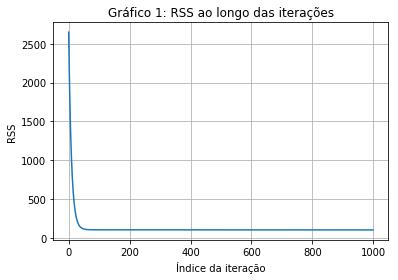

After 1000 iterations b = -0.182342553765, m = 3.2621822676, error = 103.398422917


In [17]:
import matplotlib.pyplot as plt

def rss_graph(rss_values):

    plt.plot(rss_values)

    plt.grid(True)
    plt.title(u"Gráfico 1: RSS ao longo das iterações")
    plt.xlabel(u"Índice da iteração")
    plt.ylabel("RSS")
    
    plt.show()

def gradient_descent_runner(points, starting_b, starting_m, learning_rate, num_iterations):
    b = starting_b
    m = starting_m
    rss_values = []
    for i in range(num_iterations):
        b, m = step_gradient(b, m, array(points), learning_rate)
        rss = compute_error_for_line_given_points(b, m, points)
        rss_values.append(rss)
    # 3- Comportamento e gráfico do RSS
    rss_graph(rss_values)
    return [b, m]

def run():
    points = genfromtxt("income.csv", delimiter=",")
    # quão rápido deve ser o processo de aprendizagem
    learning_rate = 0.0001
    # y = mx + b é o modelo linear que nós queremos
    initial_b = 0 # intercepta o y
    initial_m = 0 # a inclininação da reta
    num_iterations = 1000 # quantidade de repetições do treinamento
    print "Starting gradient descent at b = {0}, m = {1}, error = {2}".format(initial_b, initial_m, compute_error_for_line_given_points(initial_b, initial_m, points))
    print "Running..."
    [b, m] = gradient_descent_runner(points, initial_b, initial_m, learning_rate, num_iterations)
    print "After {0} iterations b = {1}, m = {2}, error = {3}".format(num_iterations, b, m, compute_error_for_line_given_points(b, m, points))

if __name__ == '__main__':
    run()

Como visto na seção 2 e no Gráfico 1 acima, o RSS diminui ao longo das iterações e estabiliza-se, porque esse é o objeto do gradiente descente: encontrar o erro mínimo da função. 

### 4. Alterar a quantidade de iterações e a taxa de aprendizagem para encontrar w0 = -39 e w1 = 5  

A quantidade de iterações define quando o algoritmo deve parar de melhorar o modelo, ou seja, parar a execução. A taxa de aprendizagem define a velocidade do aprendizado: se for muito pequeno o algoritmo torna-se lento para encontrar um valor ótimo, e se for muita alta o algoritmo pode perder/passar (d)o valor ótimo. Assim, iremos alterá-los a fim de encontrar os parâmetros m (w0) e b (w1) desejados.

Starting gradient descent at b = 0, m = 0, error = 2946.63449705, iterações = 100000, taxa de aprendizagem = 0.001
Running...


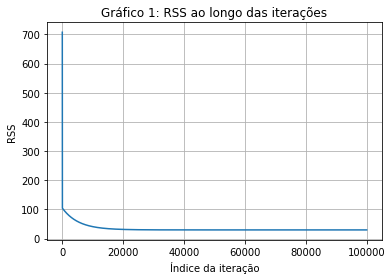

After 100000 iterations b = -39.4433220441, m = 5.5993081813, error = 29.82881661


In [18]:

def run():
    points = genfromtxt("income.csv", delimiter=",")
    # quão rápido deve ser o processo de aprendizagem
    learning_rate = 0.001
    # y = mx + b é o modelo linear que nós queremos
    initial_b = 0 # intercepta o y
    initial_m = 0 # a inclininação da reta
    num_iterations = 100000 # quantidade de repetições do treinamento
    print "Starting gradient descent at b = {0}, m = {1}, error = {2}, iterações = {3}, taxa de aprendizagem = {4}".format(initial_b, initial_m, compute_error_for_line_given_points(initial_b, initial_m, points), num_iterations, learning_rate)
    print "Running..."
    [b, m] = gradient_descent_runner(points, initial_b, initial_m, learning_rate, num_iterations)
    print "After {0} iterations b = {1}, m = {2}, error = {3}".format(num_iterations, b, m, compute_error_for_line_given_points(b, m, points))

if __name__ == '__main__':
    run()

Os parâmetros w0 = -39 e w1 = 5 foram encontradas com __100000 iterações (i)__ e __taxa de aprendizagem (t) 0.001__. Foram feitos 4 testes até encontrar estes valores: i = 1000 e t = 0.0001, i = 10000 e t = 0.001, i = 10000 e t = 0.01, i = 100000 e t = 0.001.

### 5. Alterar critério de parada para o tamanho do gradiente

Como dito anteriormente, o critério de parada do algoritmo era o número de iterações que ele deveria executar. Agora, iremos alterá-lo para ser o tamanho do gradiente, ou seja, o algoritmo só irá parar quando o gradiente for menor do que um valor de tolerância predefinido (= 0.05).

In [19]:

def step_gradient(b_current, m_current, points, learningRate):
    b_gradient = 0
    m_gradient = 0
    
    # gradient descent
    # cálculo das derivadas parciais
    N = float(len(points))
    for i in range(0, len(points)):
        x = points[i, 0]
        y = points[i, 1]
        b_gradient += -(2/N) * (y - ((m_current * x) + b_current))
        m_gradient += -(2/N) * x * (y - ((m_current * x) + b_current))
    new_b = b_current - (learningRate * b_gradient)
    new_m = m_current - (learningRate * m_gradient)
    return [new_b, new_m, b_gradient, m_gradient]

def gradient_descent_runner(points, starting_b, starting_m, learning_rate, tolerance):
    b = starting_b
    m = starting_m
    step = 0
    gradient_length = tolerance
    # 4- Alteração do critério de parada do algoritmo
    while (gradient_length >= tolerance):
        step += 1
        b, m, b_gradient, m_gradient = step_gradient(b, m, array(points), learning_rate)
        gradient_length = math.sqrt(b_gradient**2 + m_gradient**2)
        
        # 2- Impressão do RSS a cada iteração do gradiente descendente
        print "Iteração {0}, RSS = {1} ".format(step, compute_error_for_line_given_points(b, m, points))
    return [b, m, step]

def run():
    points = genfromtxt("income.csv", delimiter=",")
    # quão rápido deve ser o processo de aprendizagem
    learning_rate = 0.001
    # y = mx + b é o modelo linear que nós queremos
    initial_b = 0 # intercepta o y
    initial_m = 0 # a inclininação da reta
    tolerance = 0.05
    print "Starting gradient descent at b = {0}, m = {1}, error = {2}, taxa de aprendizagem = {3}".format(initial_b, initial_m, compute_error_for_line_given_points(initial_b, initial_m, points), learning_rate)
    print "Running..."
    [b, m, steps] = gradient_descent_runner(points, initial_b, initial_m, learning_rate, tolerance)
    print "After {0} iterations b = {1}, m = {2}, error = {3}".format(steps, b, m, compute_error_for_line_given_points(b, m, points))

if __name__ == '__main__':
    run()

Starting gradient descent at b = 0, m = 0, error = 2946.63449705, taxa de aprendizagem = 0.001
Running...
Iteração 1, RSS = 707.27101659 
Iteração 2, RSS = 232.508779735 
Iteração 3, RSS = 131.846692069 
Iteração 4, RSS = 110.494831064 
Iteração 5, RSS = 105.956950742 
Iteração 6, RSS = 104.983681088 
Iteração 7, RSS = 104.766120491 
Iteração 8, RSS = 104.708774355 
Iteração 9, RSS = 104.685396244 
Iteração 10, RSS = 104.669221579 
Iteração 11, RSS = 104.654576198 
Iteração 12, RSS = 104.640257162 
Iteração 13, RSS = 104.626009445 
Iteração 14, RSS = 104.61177898 
Iteração 15, RSS = 104.597554306 
Iteração 16, RSS = 104.58333299 
Iteração 17, RSS = 104.569114518 
Iteração 18, RSS = 104.554898779 
Iteração 19, RSS = 104.540685751 
Iteração 20, RSS = 104.526475427 
Iteração 21, RSS = 104.512267807 
Iteração 22, RSS = 104.498062889 
Iteração 23, RSS = 104.483860672 
Iteração 24, RSS = 104.469661157 
Iteração 25, RSS = 104.455464343 
Iteração 26, RSS = 104.441270229 
Iteração 27, RSS = 104

Iteração 324, RSS = 100.329467274 
Iteração 325, RSS = 100.316057932 
Iteração 326, RSS = 100.30265114 
Iteração 327, RSS = 100.289246898 
Iteração 328, RSS = 100.275845205 
Iteração 329, RSS = 100.262446062 
Iteração 330, RSS = 100.249049467 
Iteração 331, RSS = 100.23565542 
Iteração 332, RSS = 100.222263921 
Iteração 333, RSS = 100.208874969 
Iteração 334, RSS = 100.195488563 
Iteração 335, RSS = 100.182104704 
Iteração 336, RSS = 100.16872339 
Iteração 337, RSS = 100.155344621 
Iteração 338, RSS = 100.141968397 
Iteração 339, RSS = 100.128594717 
Iteração 340, RSS = 100.115223581 
Iteração 341, RSS = 100.101854988 
Iteração 342, RSS = 100.088488938 
Iteração 343, RSS = 100.07512543 
Iteração 344, RSS = 100.061764463 
Iteração 345, RSS = 100.048406039 
Iteração 346, RSS = 100.035050154 
Iteração 347, RSS = 100.021696811 
Iteração 348, RSS = 100.008346006 
Iteração 349, RSS = 99.9949977418 
Iteração 350, RSS = 99.981652016 
Iteração 351, RSS = 99.9683088286 
Iteração 352, RSS = 99.95

Iteração 639, RSS = 96.2291920087 
Iteração 640, RSS = 96.2165625455 
Iteração 641, RSS = 96.2039354844 
Iteração 642, RSS = 96.1913108251 
Iteração 643, RSS = 96.1786885669 
Iteração 644, RSS = 96.1660687095 
Iteração 645, RSS = 96.1534512525 
Iteração 646, RSS = 96.1408361953 
Iteração 647, RSS = 96.1282235375 
Iteração 648, RSS = 96.1156132786 
Iteração 649, RSS = 96.1030054183 
Iteração 650, RSS = 96.090399956 
Iteração 651, RSS = 96.0777968912 
Iteração 652, RSS = 96.0651962236 
Iteração 653, RSS = 96.0525979527 
Iteração 654, RSS = 96.0400020779 
Iteração 655, RSS = 96.027408599 
Iteração 656, RSS = 96.0148175153 
Iteração 657, RSS = 96.0022288265 
Iteração 658, RSS = 95.989642532 
Iteração 659, RSS = 95.9770586315 
Iteração 660, RSS = 95.9644771245 
Iteração 661, RSS = 95.9518980105 
Iteração 662, RSS = 95.939321289 
Iteração 663, RSS = 95.9267469597 
Iteração 664, RSS = 95.9141750221 
Iteração 665, RSS = 95.9016054756 
Iteração 666, RSS = 95.8890383199 
Iteração 667, RSS = 95.8

Iteração 922, RSS = 92.749221542 
Iteração 923, RSS = 92.737253975 
Iteração 924, RSS = 92.7252886843 
Iteração 925, RSS = 92.7133256694 
Iteração 926, RSS = 92.7013649299 
Iteração 927, RSS = 92.6894064653 
Iteração 928, RSS = 92.6774502752 
Iteração 929, RSS = 92.6654963593 
Iteração 930, RSS = 92.653544717 
Iteração 931, RSS = 92.6415953479 
Iteração 932, RSS = 92.6296482516 
Iteração 933, RSS = 92.6177034276 
Iteração 934, RSS = 92.6057608756 
Iteração 935, RSS = 92.5938205951 
Iteração 936, RSS = 92.5818825857 
Iteração 937, RSS = 92.5699468468 
Iteração 938, RSS = 92.5580133782 
Iteração 939, RSS = 92.5460821793 
Iteração 940, RSS = 92.5341532498 
Iteração 941, RSS = 92.5222265892 
Iteração 942, RSS = 92.510302197 
Iteração 943, RSS = 92.4983800729 
Iteração 944, RSS = 92.4864602164 
Iteração 945, RSS = 92.474542627 
Iteração 946, RSS = 92.4626273045 
Iteração 947, RSS = 92.4507142482 
Iteração 948, RSS = 92.4388034578 
Iteração 949, RSS = 92.4268949329 
Iteração 950, RSS = 92.41

Iteração 1225, RSS = 89.2252346439 
Iteração 1226, RSS = 89.2139373452 
Iteração 1227, RSS = 89.2026421952 
Iteração 1228, RSS = 89.1913491936 
Iteração 1229, RSS = 89.1800583399 
Iteração 1230, RSS = 89.1687696338 
Iteração 1231, RSS = 89.1574830748 
Iteração 1232, RSS = 89.1461986625 
Iteração 1233, RSS = 89.1349163966 
Iteração 1234, RSS = 89.1236362765 
Iteração 1235, RSS = 89.1123583019 
Iteração 1236, RSS = 89.1010824725 
Iteração 1237, RSS = 89.0898087877 
Iteração 1238, RSS = 89.0785372472 
Iteração 1239, RSS = 89.0672678505 
Iteração 1240, RSS = 89.0560005973 
Iteração 1241, RSS = 89.0447354872 
Iteração 1242, RSS = 89.0334725197 
Iteração 1243, RSS = 89.0222116944 
Iteração 1244, RSS = 89.010953011 
Iteração 1245, RSS = 88.999696469 
Iteração 1246, RSS = 88.988442068 
Iteração 1247, RSS = 88.9771898076 
Iteração 1248, RSS = 88.9659396874 
Iteração 1249, RSS = 88.954691707 
Iteração 1250, RSS = 88.943445866 
Iteração 1251, RSS = 88.9322021639 
Iteração 1252, RSS = 88.920960600

Iteração 1525, RSS = 85.9306217756 
Iteração 1526, RSS = 85.9199511178 
Iteração 1527, RSS = 85.9092824895 
Iteração 1528, RSS = 85.8986158904 
Iteração 1529, RSS = 85.8879513202 
Iteração 1530, RSS = 85.8772887783 
Iteração 1531, RSS = 85.8666282645 
Iteração 1532, RSS = 85.8559697784 
Iteração 1533, RSS = 85.8453133195 
Iteração 1534, RSS = 85.8346588875 
Iteração 1535, RSS = 85.8240064819 
Iteração 1536, RSS = 85.8133561025 
Iteração 1537, RSS = 85.8027077488 
Iteração 1538, RSS = 85.7920614205 
Iteração 1539, RSS = 85.781417117 
Iteração 1540, RSS = 85.7707748382 
Iteração 1541, RSS = 85.7601345835 
Iteração 1542, RSS = 85.7494963526 
Iteração 1543, RSS = 85.7388601452 
Iteração 1544, RSS = 85.7282259607 
Iteração 1545, RSS = 85.7175937989 
Iteração 1546, RSS = 85.7069636594 
Iteração 1547, RSS = 85.6963355417 
Iteração 1548, RSS = 85.6857094455 
Iteração 1549, RSS = 85.6750853704 
Iteração 1550, RSS = 85.664463316 
Iteração 1551, RSS = 85.653843282 
Iteração 1552, RSS = 85.6432252

Iteração 1876, RSS = 82.3071742231 
Iteração 1877, RSS = 82.2971927511 
Iteração 1878, RSS = 82.2872131776 
Iteração 1879, RSS = 82.2772355022 
Iteração 1880, RSS = 82.2672597246 
Iteração 1881, RSS = 82.2572858444 
Iteração 1882, RSS = 82.2473138613 
Iteração 1883, RSS = 82.2373437748 
Iteração 1884, RSS = 82.2273755846 
Iteração 1885, RSS = 82.2174092905 
Iteração 1886, RSS = 82.2074448919 
Iteração 1887, RSS = 82.1974823886 
Iteração 1888, RSS = 82.1875217802 
Iteração 1889, RSS = 82.1775630662 
Iteração 1890, RSS = 82.1676062465 
Iteração 1891, RSS = 82.1576513205 
Iteração 1892, RSS = 82.1476982881 
Iteração 1893, RSS = 82.1377471486 
Iteração 1894, RSS = 82.1277979019 
Iteração 1895, RSS = 82.1178505476 
Iteração 1896, RSS = 82.1079050853 
Iteração 1897, RSS = 82.0979615146 
Iteração 1898, RSS = 82.0880198352 
Iteração 1899, RSS = 82.0780800467 
Iteração 1900, RSS = 82.0681421488 
Iteração 1901, RSS = 82.0582061411 
Iteração 1902, RSS = 82.0482720233 
Iteração 1903, RSS = 82.0383

Iteração 2206, RSS = 79.1142378902 
Iteração 2207, RSS = 79.1048637201 
Iteração 2208, RSS = 79.0954913329 
Iteração 2209, RSS = 79.0861207284 
Iteração 2210, RSS = 79.0767519062 
Iteração 2211, RSS = 79.0673848659 
Iteração 2212, RSS = 79.0580196073 
Iteração 2213, RSS = 79.04865613 
Iteração 2214, RSS = 79.0392944336 
Iteração 2215, RSS = 79.0299345178 
Iteração 2216, RSS = 79.0205763823 
Iteração 2217, RSS = 79.0112200268 
Iteração 2218, RSS = 79.0018654508 
Iteração 2219, RSS = 78.9925126541 
Iteração 2220, RSS = 78.9831616363 
Iteração 2221, RSS = 78.9738123971 
Iteração 2222, RSS = 78.9644649361 
Iteração 2223, RSS = 78.955119253 
Iteração 2224, RSS = 78.9457753475 
Iteração 2225, RSS = 78.9364332192 
Iteração 2226, RSS = 78.9270928678 
Iteração 2227, RSS = 78.917754293 
Iteração 2228, RSS = 78.9084174943 
Iteração 2229, RSS = 78.8990824716 
Iteração 2230, RSS = 78.8897492243 
Iteração 2231, RSS = 78.8804177523 
Iteração 2232, RSS = 78.8710880552 
Iteração 2233, RSS = 78.86176013

Iteração 2580, RSS = 75.7297809777 
Iteração 2581, RSS = 75.7210505369 
Iteração 2582, RSS = 75.7123217567 
Iteração 2583, RSS = 75.7035946368 
Iteração 2584, RSS = 75.6948691767 
Iteração 2585, RSS = 75.6861453762 
Iteração 2586, RSS = 75.6774232351 
Iteração 2587, RSS = 75.6687027529 
Iteração 2588, RSS = 75.6599839293 
Iteração 2589, RSS = 75.6512667641 
Iteração 2590, RSS = 75.6425512569 
Iteração 2591, RSS = 75.6338374074 
Iteração 2592, RSS = 75.6251252152 
Iteração 2593, RSS = 75.6164146802 
Iteração 2594, RSS = 75.6077058019 
Iteração 2595, RSS = 75.5989985801 
Iteração 2596, RSS = 75.5902930144 
Iteração 2597, RSS = 75.5815891045 
Iteração 2598, RSS = 75.5728868501 
Iteração 2599, RSS = 75.5641862508 
Iteração 2600, RSS = 75.5554873065 
Iteração 2601, RSS = 75.5467900167 
Iteração 2602, RSS = 75.5380943811 
Iteração 2603, RSS = 75.5294003995 
Iteração 2604, RSS = 75.5207080715 
Iteração 2605, RSS = 75.5120173968 
Iteração 2606, RSS = 75.503328375 
Iteração 2607, RSS = 75.49464

Iteração 2947, RSS = 72.634696319 
Iteração 2948, RSS = 72.6265545686 
Iteração 2949, RSS = 72.6184143668 
Iteração 2950, RSS = 72.6102757132 
Iteração 2951, RSS = 72.6021386076 
Iteração 2952, RSS = 72.5940030497 
Iteração 2953, RSS = 72.5858690392 
Iteração 2954, RSS = 72.5777365758 
Iteração 2955, RSS = 72.5696056592 
Iteração 2956, RSS = 72.5614762891 
Iteração 2957, RSS = 72.5533484652 
Iteração 2958, RSS = 72.5452221873 
Iteração 2959, RSS = 72.537097455 
Iteração 2960, RSS = 72.528974268 
Iteração 2961, RSS = 72.5208526261 
Iteração 2962, RSS = 72.5127325289 
Iteração 2963, RSS = 72.5046139762 
Iteração 2964, RSS = 72.4964969677 
Iteração 2965, RSS = 72.488381503 
Iteração 2966, RSS = 72.4802675819 
Iteração 2967, RSS = 72.4721552041 
Iteração 2968, RSS = 72.4640443692 
Iteração 2969, RSS = 72.4559350771 
Iteração 2970, RSS = 72.4478273273 
Iteração 2971, RSS = 72.4397211197 
Iteração 2972, RSS = 72.4316164539 
Iteração 2973, RSS = 72.4235133296 
Iteração 2974, RSS = 72.41541174

Iteração 3292, RSS = 69.91571859 
Iteração 3293, RSS = 69.9080939937 
Iteração 3294, RSS = 69.9004708476 
Iteração 3295, RSS = 69.8928491515 
Iteração 3296, RSS = 69.885228905 
Iteração 3297, RSS = 69.8776101079 
Iteração 3298, RSS = 69.8699927599 
Iteração 3299, RSS = 69.8623768607 
Iteração 3300, RSS = 69.8547624101 
Iteração 3301, RSS = 69.8471494078 
Iteração 3302, RSS = 69.8395378535 
Iteração 3303, RSS = 69.8319277469 
Iteração 3304, RSS = 69.8243190878 
Iteração 3305, RSS = 69.8167118758 
Iteração 3306, RSS = 69.8091061108 
Iteração 3307, RSS = 69.8015017923 
Iteração 3308, RSS = 69.7938989203 
Iteração 3309, RSS = 69.7862974943 
Iteração 3310, RSS = 69.7786975141 
Iteração 3311, RSS = 69.7710989794 
Iteração 3312, RSS = 69.76350189 
Iteração 3313, RSS = 69.7559062456 
Iteração 3314, RSS = 69.7483120459 
Iteração 3315, RSS = 69.7407192906 
Iteração 3316, RSS = 69.7331279795 
Iteração 3317, RSS = 69.7255381122 
Iteração 3318, RSS = 69.7179496886 
Iteração 3319, RSS = 69.710362708

Iteração 3637, RSS = 67.3694470376 
Iteração 3638, RSS = 67.3623067464 
Iteração 3639, RSS = 67.3551678133 
Iteração 3640, RSS = 67.3480302381 
Iteração 3641, RSS = 67.3408940205 
Iteração 3642, RSS = 67.3337591601 
Iteração 3643, RSS = 67.3266256569 
Iteração 3644, RSS = 67.3194935104 
Iteração 3645, RSS = 67.3123627205 
Iteração 3646, RSS = 67.3052332869 
Iteração 3647, RSS = 67.2981052093 
Iteração 3648, RSS = 67.2909784875 
Iteração 3649, RSS = 67.2838531212 
Iteração 3650, RSS = 67.2767291101 
Iteração 3651, RSS = 67.269606454 
Iteração 3652, RSS = 67.2624851527 
Iteração 3653, RSS = 67.2553652059 
Iteração 3654, RSS = 67.2482466133 
Iteração 3655, RSS = 67.2411293747 
Iteração 3656, RSS = 67.2340134897 
Iteração 3657, RSS = 67.2268989583 
Iteração 3658, RSS = 67.21978578 
Iteração 3659, RSS = 67.2126739547 
Iteração 3660, RSS = 67.205563482 
Iteração 3661, RSS = 67.1984543618 
Iteração 3662, RSS = 67.1913465937 
Iteração 3663, RSS = 67.1842401776 
Iteração 3664, RSS = 67.17713511

Iteração 4052, RSS = 64.5198974508 
Iteração 4053, RSS = 64.5132991488 
Iteração 4054, RSS = 64.5067021018 
Iteração 4055, RSS = 64.5001063095 
Iteração 4056, RSS = 64.4935117718 
Iteração 4057, RSS = 64.4869184884 
Iteração 4058, RSS = 64.480326459 
Iteração 4059, RSS = 64.4737356834 
Iteração 4060, RSS = 64.4671461614 
Iteração 4061, RSS = 64.4605578928 
Iteração 4062, RSS = 64.4539708772 
Iteração 4063, RSS = 64.4473851145 
Iteração 4064, RSS = 64.4408006045 
Iteração 4065, RSS = 64.4342173468 
Iteração 4066, RSS = 64.4276353413 
Iteração 4067, RSS = 64.4210545876 
Iteração 4068, RSS = 64.4144750857 
Iteração 4069, RSS = 64.4078968352 
Iteração 4070, RSS = 64.4013198358 
Iteração 4071, RSS = 64.3947440875 
Iteração 4072, RSS = 64.3881695898 
Iteração 4073, RSS = 64.3815963426 
Iteração 4074, RSS = 64.3750243457 
Iteração 4075, RSS = 64.3684535988 
Iteração 4076, RSS = 64.3618841016 
Iteração 4077, RSS = 64.355315854 
Iteração 4078, RSS = 64.3487488557 
Iteração 4079, RSS = 64.342183

Iteração 4431, RSS = 62.1069276139 
Iteração 4432, RSS = 62.1007882628 
Iteração 4433, RSS = 62.0946500794 
Iteração 4434, RSS = 62.0885130635 
Iteração 4435, RSS = 62.0823772149 
Iteração 4436, RSS = 62.0762425333 
Iteração 4437, RSS = 62.0701090185 
Iteração 4438, RSS = 62.0639766704 
Iteração 4439, RSS = 62.0578454886 
Iteração 4440, RSS = 62.051715473 
Iteração 4441, RSS = 62.0455866233 
Iteração 4442, RSS = 62.0394589394 
Iteração 4443, RSS = 62.0333324209 
Iteração 4444, RSS = 62.0272070678 
Iteração 4445, RSS = 62.0210828796 
Iteração 4446, RSS = 62.0149598563 
Iteração 4447, RSS = 62.0088379977 
Iteração 4448, RSS = 62.0027173034 
Iteração 4449, RSS = 61.9965977732 
Iteração 4450, RSS = 61.990479407 
Iteração 4451, RSS = 61.9843622046 
Iteração 4452, RSS = 61.9782461656 
Iteração 4453, RSS = 61.9721312899 
Iteração 4454, RSS = 61.9660175773 
Iteração 4455, RSS = 61.9599050275 
Iteração 4456, RSS = 61.9537936404 
Iteração 4457, RSS = 61.9476834156 
Iteração 4458, RSS = 61.941574

Iteração 4823, RSS = 59.7876185868 
Iteração 4824, RSS = 59.7819203722 
Iteração 4825, RSS = 59.7762232413 
Iteração 4826, RSS = 59.7705271941 
Iteração 4827, RSS = 59.7648322303 
Iteração 4828, RSS = 59.7591383497 
Iteração 4829, RSS = 59.753445552 
Iteração 4830, RSS = 59.7477538372 
Iteração 4831, RSS = 59.7420632049 
Iteração 4832, RSS = 59.736373655 
Iteração 4833, RSS = 59.7306851872 
Iteração 4834, RSS = 59.7249978014 
Iteração 4835, RSS = 59.7193114974 
Iteração 4836, RSS = 59.7136262749 
Iteração 4837, RSS = 59.7079421337 
Iteração 4838, RSS = 59.7022590737 
Iteração 4839, RSS = 59.6965770946 
Iteração 4840, RSS = 59.6908961962 
Iteração 4841, RSS = 59.6852163783 
Iteração 4842, RSS = 59.6795376408 
Iteração 4843, RSS = 59.6738599833 
Iteração 4844, RSS = 59.6681834058 
Iteração 4845, RSS = 59.6625079079 
Iteração 4846, RSS = 59.6568334895 
Iteração 4847, RSS = 59.6511601504 
Iteração 4848, RSS = 59.6454878904 
Iteração 4849, RSS = 59.6398167093 
Iteração 4850, RSS = 59.634146

Iteração 5137, RSS = 58.0506005738 
Iteração 5138, RSS = 58.0452327429 
Iteração 5139, RSS = 58.039865933 
Iteração 5140, RSS = 58.0345001439 
Iteração 5141, RSS = 58.0291353753 
Iteração 5142, RSS = 58.0237716271 
Iteração 5143, RSS = 58.0184088992 
Iteração 5144, RSS = 58.0130471912 
Iteração 5145, RSS = 58.007686503 
Iteração 5146, RSS = 58.0023268345 
Iteração 5147, RSS = 57.9969681854 
Iteração 5148, RSS = 57.9916105554 
Iteração 5149, RSS = 57.9862539446 
Iteração 5150, RSS = 57.9808983525 
Iteração 5151, RSS = 57.9755437791 
Iteração 5152, RSS = 57.9701902242 
Iteração 5153, RSS = 57.9648376875 
Iteração 5154, RSS = 57.9594861688 
Iteração 5155, RSS = 57.9541356681 
Iteração 5156, RSS = 57.948786185 
Iteração 5157, RSS = 57.9434377194 
Iteração 5158, RSS = 57.938090271 
Iteração 5159, RSS = 57.9327438398 
Iteração 5160, RSS = 57.9273984255 
Iteração 5161, RSS = 57.9220540279 
Iteração 5162, RSS = 57.9167106467 
Iteração 5163, RSS = 57.911368282 
Iteração 5164, RSS = 57.906026933

Iteração 5404, RSS = 56.6530438447 
Iteração 5405, RSS = 56.6479418315 
Iteração 5406, RSS = 56.6428407887 
Iteração 5407, RSS = 56.6377407161 
Iteração 5408, RSS = 56.6326416135 
Iteração 5409, RSS = 56.6275434808 
Iteração 5410, RSS = 56.6224463178 
Iteração 5411, RSS = 56.6173501242 
Iteração 5412, RSS = 56.6122549 
Iteração 5413, RSS = 56.6071606449 
Iteração 5414, RSS = 56.6020673587 
Iteração 5415, RSS = 56.5969750413 
Iteração 5416, RSS = 56.5918836924 
Iteração 5417, RSS = 56.586793312 
Iteração 5418, RSS = 56.5817038997 
Iteração 5419, RSS = 56.5766154554 
Iteração 5420, RSS = 56.571527979 
Iteração 5421, RSS = 56.5664414702 
Iteração 5422, RSS = 56.5613559289 
Iteração 5423, RSS = 56.5562713549 
Iteração 5424, RSS = 56.5511877479 
Iteração 5425, RSS = 56.5461051079 
Iteração 5426, RSS = 56.5410234346 
Iteração 5427, RSS = 56.5359427278 
Iteração 5428, RSS = 56.5308629874 
Iteração 5429, RSS = 56.5257842131 
Iteração 5430, RSS = 56.5207064049 
Iteração 5431, RSS = 56.515629562

Iteração 5765, RSS = 54.8728632736 
Iteração 5766, RSS = 54.8680998537 
Iteração 5767, RSS = 54.8633373398 
Iteração 5768, RSS = 54.8585757318 
Iteração 5769, RSS = 54.8538150294 
Iteração 5770, RSS = 54.8490552325 
Iteração 5771, RSS = 54.8442963409 
Iteração 5772, RSS = 54.8395383545 
Iteração 5773, RSS = 54.8347812731 
Iteração 5774, RSS = 54.8300250964 
Iteração 5775, RSS = 54.8252698244 
Iteração 5776, RSS = 54.8205154569 
Iteração 5777, RSS = 54.8157619936 
Iteração 5778, RSS = 54.8110094345 
Iteração 5779, RSS = 54.8062577793 
Iteração 5780, RSS = 54.8015070279 
Iteração 5781, RSS = 54.79675718 
Iteração 5782, RSS = 54.7920082357 
Iteração 5783, RSS = 54.7872601945 
Iteração 5784, RSS = 54.7825130565 
Iteração 5785, RSS = 54.7777668213 
Iteração 5786, RSS = 54.7730214889 
Iteração 5787, RSS = 54.7682770591 
Iteração 5788, RSS = 54.7635335317 
Iteração 5789, RSS = 54.7587909065 
Iteração 5790, RSS = 54.7540491834 
Iteração 5791, RSS = 54.7493083621 
Iteração 5792, RSS = 54.744568

Iteração 6005, RSS = 53.7552391709 
Iteração 6006, RSS = 53.750688325 
Iteração 6007, RSS = 53.7461383446 
Iteração 6008, RSS = 53.7415892297 
Iteração 6009, RSS = 53.7370409801 
Iteração 6010, RSS = 53.7324935955 
Iteração 6011, RSS = 53.7279470758 
Iteração 6012, RSS = 53.7234014209 
Iteração 6013, RSS = 53.7188566306 
Iteração 6014, RSS = 53.7143127047 
Iteração 6015, RSS = 53.709769643 
Iteração 6016, RSS = 53.7052274455 
Iteração 6017, RSS = 53.7006861119 
Iteração 6018, RSS = 53.6961456421 
Iteração 6019, RSS = 53.6916060359 
Iteração 6020, RSS = 53.6870672931 
Iteração 6021, RSS = 53.6825294136 
Iteração 6022, RSS = 53.6779923972 
Iteração 6023, RSS = 53.6734562437 
Iteração 6024, RSS = 53.6689209531 
Iteração 6025, RSS = 53.664386525 
Iteração 6026, RSS = 53.6598529594 
Iteração 6027, RSS = 53.6553202561 
Iteração 6028, RSS = 53.650788415 
Iteração 6029, RSS = 53.6462574358 
Iteração 6030, RSS = 53.6417273184 
Iteração 6031, RSS = 53.6371980626 
Iteração 6032, RSS = 53.63266966

Iteração 6304, RSS = 52.432382611 
Iteração 6305, RSS = 52.4280833746 
Iteração 6306, RSS = 52.423784956 
Iteração 6307, RSS = 52.4194873549 
Iteração 6308, RSS = 52.4151905712 
Iteração 6309, RSS = 52.4108946048 
Iteração 6310, RSS = 52.4065994555 
Iteração 6311, RSS = 52.4023051231 
Iteração 6312, RSS = 52.3980116075 
Iteração 6313, RSS = 52.3937189086 
Iteração 6314, RSS = 52.3894270261 
Iteração 6315, RSS = 52.38513596 
Iteração 6316, RSS = 52.38084571 
Iteração 6317, RSS = 52.376556276 
Iteração 6318, RSS = 52.3722676579 
Iteração 6319, RSS = 52.3679798555 
Iteração 6320, RSS = 52.3636928687 
Iteração 6321, RSS = 52.3594066972 
Iteração 6322, RSS = 52.355121341 
Iteração 6323, RSS = 52.3508367998 
Iteração 6324, RSS = 52.3465530736 
Iteração 6325, RSS = 52.3422701622 
Iteração 6326, RSS = 52.3379880653 
Iteração 6327, RSS = 52.333706783 
Iteração 6328, RSS = 52.3294263149 
Iteração 6329, RSS = 52.325146661 
Iteração 6330, RSS = 52.3208678211 
Iteração 6331, RSS = 52.316589795 
Ite

Iteração 6604, RSS = 51.178603297 
Iteração 6605, RSS = 51.1745425316 
Iteração 6606, RSS = 51.1704825385 
Iteração 6607, RSS = 51.1664233176 
Iteração 6608, RSS = 51.1623648689 
Iteração 6609, RSS = 51.158307192 
Iteração 6610, RSS = 51.1542502869 
Iteração 6611, RSS = 51.1501941535 
Iteração 6612, RSS = 51.1461387915 
Iteração 6613, RSS = 51.1420842009 
Iteração 6614, RSS = 51.1380303814 
Iteração 6615, RSS = 51.133977333 
Iteração 6616, RSS = 51.1299250555 
Iteração 6617, RSS = 51.1258735488 
Iteração 6618, RSS = 51.1218228126 
Iteração 6619, RSS = 51.117772847 
Iteração 6620, RSS = 51.1137236516 
Iteração 6621, RSS = 51.1096752264 
Iteração 6622, RSS = 51.1056275712 
Iteração 6623, RSS = 51.1015806858 
Iteração 6624, RSS = 51.0975345702 
Iteração 6625, RSS = 51.0934892242 
Iteração 6626, RSS = 51.0894446476 
Iteração 6627, RSS = 51.0854008403 
Iteração 6628, RSS = 51.0813578021 
Iteração 6629, RSS = 51.077315533 
Iteração 6630, RSS = 51.0732740326 
Iteração 6631, RSS = 51.069233301

Iteração 6965, RSS = 49.7617320755 
Iteração 6966, RSS = 49.7579408014 
Iteração 6967, RSS = 49.7541502483 
Iteração 6968, RSS = 49.7503604163 
Iteração 6969, RSS = 49.746571305 
Iteração 6970, RSS = 49.7427829145 
Iteração 6971, RSS = 49.7389952445 
Iteração 6972, RSS = 49.735208295 
Iteração 6973, RSS = 49.7314220657 
Iteração 6974, RSS = 49.7276365566 
Iteração 6975, RSS = 49.7238517674 
Iteração 6976, RSS = 49.7200676982 
Iteração 6977, RSS = 49.7162843487 
Iteração 6978, RSS = 49.7125017188 
Iteração 6979, RSS = 49.7087198083 
Iteração 6980, RSS = 49.7049386172 
Iteração 6981, RSS = 49.7011581453 
Iteração 6982, RSS = 49.6973783924 
Iteração 6983, RSS = 49.6935993584 
Iteração 6984, RSS = 49.6898210432 
Iteração 6985, RSS = 49.6860434467 
Iteração 6986, RSS = 49.6822665687 
Iteração 6987, RSS = 49.678490409 
Iteração 6988, RSS = 49.6747149676 
Iteração 6989, RSS = 49.6709402442 
Iteração 6990, RSS = 49.6671662388 
Iteração 6991, RSS = 49.6633929513 
Iteração 6992, RSS = 49.6596203

Iteração 7287, RSS = 48.5774645593 
Iteração 7288, RSS = 48.5738985349 
Iteração 7289, RSS = 48.5703331887 
Iteração 7290, RSS = 48.5667685206 
Iteração 7291, RSS = 48.5632045305 
Iteração 7292, RSS = 48.5596412183 
Iteração 7293, RSS = 48.5560785839 
Iteração 7294, RSS = 48.5525166271 
Iteração 7295, RSS = 48.5489553478 
Iteração 7296, RSS = 48.5453947458 
Iteração 7297, RSS = 48.541834821 
Iteração 7298, RSS = 48.5382755734 
Iteração 7299, RSS = 48.5347170028 
Iteração 7300, RSS = 48.5311591089 
Iteração 7301, RSS = 48.5276018919 
Iteração 7302, RSS = 48.5240453513 
Iteração 7303, RSS = 48.5204894873 
Iteração 7304, RSS = 48.5169342996 
Iteração 7305, RSS = 48.5133797881 
Iteração 7306, RSS = 48.5098259526 
Iteração 7307, RSS = 48.5062727931 
Iteração 7308, RSS = 48.5027203095 
Iteração 7309, RSS = 48.4991685015 
Iteração 7310, RSS = 48.4956173691 
Iteração 7311, RSS = 48.4920669121 
Iteração 7312, RSS = 48.4885171304 
Iteração 7313, RSS = 48.4849680239 
Iteração 7314, RSS = 48.48141

Iteração 7646, RSS = 47.3398776419 
Iteração 7647, RSS = 47.3365470086 
Iteração 7648, RSS = 47.3332170087 
Iteração 7649, RSS = 47.3298876422 
Iteração 7650, RSS = 47.326558909 
Iteração 7651, RSS = 47.3232308089 
Iteração 7652, RSS = 47.3199033418 
Iteração 7653, RSS = 47.3165765075 
Iteração 7654, RSS = 47.3132503061 
Iteração 7655, RSS = 47.3099247373 
Iteração 7656, RSS = 47.3065998011 
Iteração 7657, RSS = 47.3032754972 
Iteração 7658, RSS = 47.2999518256 
Iteração 7659, RSS = 47.2966287862 
Iteração 7660, RSS = 47.2933063789 
Iteração 7661, RSS = 47.2899846035 
Iteração 7662, RSS = 47.2866634599 
Iteração 7663, RSS = 47.2833429479 
Iteração 7664, RSS = 47.2800230676 
Iteração 7665, RSS = 47.2767038187 
Iteração 7666, RSS = 47.2733852011 
Iteração 7667, RSS = 47.2700672147 
Iteração 7668, RSS = 47.2667498594 
Iteração 7669, RSS = 47.2634331351 
Iteração 7670, RSS = 47.2601170416 
Iteração 7671, RSS = 47.2568015788 
Iteração 7672, RSS = 47.2534867467 
Iteração 7673, RSS = 47.25017

Iteração 7946, RSS = 46.3685704507 
Iteração 7947, RSS = 46.3654245616 
Iteração 7948, RSS = 46.3622792709 
Iteração 7949, RSS = 46.3591345784 
Iteração 7950, RSS = 46.355990484 
Iteração 7951, RSS = 46.3528469876 
Iteração 7952, RSS = 46.3497040892 
Iteração 7953, RSS = 46.3465617885 
Iteração 7954, RSS = 46.3434200855 
Iteração 7955, RSS = 46.34027898 
Iteração 7956, RSS = 46.337138472 
Iteração 7957, RSS = 46.3339985613 
Iteração 7958, RSS = 46.3308592479 
Iteração 7959, RSS = 46.3277205315 
Iteração 7960, RSS = 46.3245824122 
Iteração 7961, RSS = 46.3214448897 
Iteração 7962, RSS = 46.3183079639 
Iteração 7963, RSS = 46.3151716348 
Iteração 7964, RSS = 46.3120359023 
Iteração 7965, RSS = 46.3089007662 
Iteração 7966, RSS = 46.3057662264 
Iteração 7967, RSS = 46.3026322827 
Iteração 7968, RSS = 46.2994989352 
Iteração 7969, RSS = 46.2963661836 
Iteração 7970, RSS = 46.2932340279 
Iteração 7971, RSS = 46.2901024679 
Iteração 7972, RSS = 46.2869715036 
Iteração 7973, RSS = 46.28384113

Iteração 8297, RSS = 45.3003172733 
Iteração 8298, RSS = 45.2973745678 
Iteração 8299, RSS = 45.294432422 
Iteração 8300, RSS = 45.2914908357 
Iteração 8301, RSS = 45.288549809 
Iteração 8302, RSS = 45.2856093417 
Iteração 8303, RSS = 45.2826694336 
Iteração 8304, RSS = 45.2797300847 
Iteração 8305, RSS = 45.2767912949 
Iteração 8306, RSS = 45.273853064 
Iteração 8307, RSS = 45.270915392 
Iteração 8308, RSS = 45.2679782788 
Iteração 8309, RSS = 45.2650417242 
Iteração 8310, RSS = 45.2621057281 
Iteração 8311, RSS = 45.2591702904 
Iteração 8312, RSS = 45.2562354111 
Iteração 8313, RSS = 45.25330109 
Iteração 8314, RSS = 45.2503673271 
Iteração 8315, RSS = 45.2474341221 
Iteração 8316, RSS = 45.244501475 
Iteração 8317, RSS = 45.2415693857 
Iteração 8318, RSS = 45.2386378541 
Iteração 8319, RSS = 45.2357068801 
Iteração 8320, RSS = 45.2327764636 
Iteração 8321, RSS = 45.2298466044 
Iteração 8322, RSS = 45.2269173025 
Iteração 8323, RSS = 45.2239885578 
Iteração 8324, RSS = 45.2210603701 

Iteração 8579, RSS = 44.4922619768 
Iteração 8580, RSS = 44.4894729647 
Iteração 8581, RSS = 44.4866844832 
Iteração 8582, RSS = 44.4838965319 
Iteração 8583, RSS = 44.481109111 
Iteração 8584, RSS = 44.4783222202 
Iteração 8585, RSS = 44.4755358595 
Iteração 8586, RSS = 44.4727500288 
Iteração 8587, RSS = 44.4699647279 
Iteração 8588, RSS = 44.4671799569 
Iteração 8589, RSS = 44.4643957154 
Iteração 8590, RSS = 44.4616120036 
Iteração 8591, RSS = 44.4588288212 
Iteração 8592, RSS = 44.4560461682 
Iteração 8593, RSS = 44.4532640444 
Iteração 8594, RSS = 44.4504824498 
Iteração 8595, RSS = 44.4477013843 
Iteração 8596, RSS = 44.4449208477 
Iteração 8597, RSS = 44.44214084 
Iteração 8598, RSS = 44.4393613611 
Iteração 8599, RSS = 44.4365824108 
Iteração 8600, RSS = 44.4338039891 
Iteração 8601, RSS = 44.4310260959 
Iteração 8602, RSS = 44.428248731 
Iteração 8603, RSS = 44.4254718943 
Iteração 8604, RSS = 44.4226955858 
Iteração 8605, RSS = 44.4199198054 
Iteração 8606, RSS = 44.41714455

Iteração 8918, RSS = 43.5765392193 
Iteração 8919, RSS = 43.5739243792 
Iteração 8920, RSS = 43.5713100365 
Iteração 8921, RSS = 43.5686961911 
Iteração 8922, RSS = 43.5660828428 
Iteração 8923, RSS = 43.5634699916 
Iteração 8924, RSS = 43.5608576373 
Iteração 8925, RSS = 43.5582457799 
Iteração 8926, RSS = 43.5556344193 
Iteração 8927, RSS = 43.5530235554 
Iteração 8928, RSS = 43.550413188 
Iteração 8929, RSS = 43.5478033172 
Iteração 8930, RSS = 43.5451939428 
Iteração 8931, RSS = 43.5425850646 
Iteração 8932, RSS = 43.5399766827 
Iteração 8933, RSS = 43.5373687969 
Iteração 8934, RSS = 43.5347614071 
Iteração 8935, RSS = 43.5321545133 
Iteração 8936, RSS = 43.5295481153 
Iteração 8937, RSS = 43.526942213 
Iteração 8938, RSS = 43.5243368064 
Iteração 8939, RSS = 43.5217318953 
Iteração 8940, RSS = 43.5191274797 
Iteração 8941, RSS = 43.5165235595 
Iteração 8942, RSS = 43.5139201345 
Iteração 8943, RSS = 43.5113172047 
Iteração 8944, RSS = 43.50871477 
Iteração 8945, RSS = 43.50611283

Iteração 9235, RSS = 42.772054899 
Iteração 9236, RSS = 42.7695930732 
Iteração 9237, RSS = 42.7671317157 
Iteração 9238, RSS = 42.7646708263 
Iteração 9239, RSS = 42.762210405 
Iteração 9240, RSS = 42.7597504516 
Iteração 9241, RSS = 42.7572909662 
Iteração 9242, RSS = 42.7548319485 
Iteração 9243, RSS = 42.7523733986 
Iteração 9244, RSS = 42.7499153163 
Iteração 9245, RSS = 42.7474577015 
Iteração 9246, RSS = 42.7450005541 
Iteração 9247, RSS = 42.7425438741 
Iteração 9248, RSS = 42.7400876614 
Iteração 9249, RSS = 42.7376319158 
Iteração 9250, RSS = 42.7351766373 
Iteração 9251, RSS = 42.7327218259 
Iteração 9252, RSS = 42.7302674813 
Iteração 9253, RSS = 42.7278136036 
Iteração 9254, RSS = 42.7253601925 
Iteração 9255, RSS = 42.7229072482 
Iteração 9256, RSS = 42.7204547704 
Iteração 9257, RSS = 42.718002759 
Iteração 9258, RSS = 42.715551214 
Iteração 9259, RSS = 42.7131001354 
Iteração 9260, RSS = 42.7106495229 
Iteração 9261, RSS = 42.7081993765 
Iteração 9262, RSS = 42.70574969

Iteração 9579, RSS = 41.9522219246 
Iteração 9580, RSS = 41.9499160324 
Iteração 9581, RSS = 41.9476105788 
Iteração 9582, RSS = 41.9453055637 
Iteração 9583, RSS = 41.943000987 
Iteração 9584, RSS = 41.9406968487 
Iteração 9585, RSS = 41.9383931486 
Iteração 9586, RSS = 41.9360898867 
Iteração 9587, RSS = 41.9337870629 
Iteração 9588, RSS = 41.9314846771 
Iteração 9589, RSS = 41.9291827292 
Iteração 9590, RSS = 41.9268812191 
Iteração 9591, RSS = 41.9245801467 
Iteração 9592, RSS = 41.9222795121 
Iteração 9593, RSS = 41.919979315 
Iteração 9594, RSS = 41.9176795554 
Iteração 9595, RSS = 41.9153802333 
Iteração 9596, RSS = 41.9130813485 
Iteração 9597, RSS = 41.9107829009 
Iteração 9598, RSS = 41.9084848905 
Iteração 9599, RSS = 41.9061873172 
Iteração 9600, RSS = 41.9038901809 
Iteração 9601, RSS = 41.9015934815 
Iteração 9602, RSS = 41.8992972189 
Iteração 9603, RSS = 41.8970013931 
Iteração 9604, RSS = 41.894706004 
Iteração 9605, RSS = 41.8924110515 
Iteração 9606, RSS = 41.8901165

Iteração 9890, RSS = 41.2558232371 
Iteração 9891, RSS = 41.2536498011 
Iteração 9892, RSS = 41.2514767786 
Iteração 9893, RSS = 41.2493041693 
Iteração 9894, RSS = 41.2471319733 
Iteração 9895, RSS = 41.2449601904 
Iteração 9896, RSS = 41.2427888206 
Iteração 9897, RSS = 41.2406178638 
Iteração 9898, RSS = 41.2384473199 
Iteração 9899, RSS = 41.2362771889 
Iteração 9900, RSS = 41.2341074706 
Iteração 9901, RSS = 41.231938165 
Iteração 9902, RSS = 41.229769272 
Iteração 9903, RSS = 41.2276007916 
Iteração 9904, RSS = 41.2254327236 
Iteração 9905, RSS = 41.2232650679 
Iteração 9906, RSS = 41.2210978246 
Iteração 9907, RSS = 41.2189309934 
Iteração 9908, RSS = 41.2167645744 
Iteração 9909, RSS = 41.2145985675 
Iteração 9910, RSS = 41.2124329725 
Iteração 9911, RSS = 41.2102677894 
Iteração 9912, RSS = 41.2081030182 
Iteração 9913, RSS = 41.2059386587 
Iteração 9914, RSS = 41.2037747109 
Iteração 9915, RSS = 41.2016111746 
Iteração 9916, RSS = 41.1994480499 
Iteração 9917, RSS = 41.197285

Iteração 10296, RSS = 40.4065410838 
Iteração 10297, RSS = 40.4045291827 
Iteração 10298, RSS = 40.4025176643 
Iteração 10299, RSS = 40.4005065285 
Iteração 10300, RSS = 40.3984957752 
Iteração 10301, RSS = 40.3964854044 
Iteração 10302, RSS = 40.3944754159 
Iteração 10303, RSS = 40.3924658098 
Iteração 10304, RSS = 40.3904565858 
Iteração 10305, RSS = 40.3884477441 
Iteração 10306, RSS = 40.3864392844 
Iteração 10307, RSS = 40.3844312067 
Iteração 10308, RSS = 40.382423511 
Iteração 10309, RSS = 40.3804161971 
Iteração 10310, RSS = 40.378409265 
Iteração 10311, RSS = 40.3764027147 
Iteração 10312, RSS = 40.374396546 
Iteração 10313, RSS = 40.3723907588 
Iteração 10314, RSS = 40.3703853532 
Iteração 10315, RSS = 40.368380329 
Iteração 10316, RSS = 40.3663756862 
Iteração 10317, RSS = 40.3643714246 
Iteração 10318, RSS = 40.3623675443 
Iteração 10319, RSS = 40.3603640451 
Iteração 10320, RSS = 40.358360927 
Iteração 10321, RSS = 40.3563581899 
Iteração 10322, RSS = 40.3543558336 
Iteraç

Iteração 10594, RSS = 39.8236153377 
Iteração 10595, RSS = 39.8217143101 
Iteração 10596, RSS = 39.8198136441 
Iteração 10597, RSS = 39.8179133396 
Iteração 10598, RSS = 39.8160133965 
Iteração 10599, RSS = 39.8141138148 
Iteração 10600, RSS = 39.8122145944 
Iteração 10601, RSS = 39.8103157352 
Iteração 10602, RSS = 39.8084172372 
Iteração 10603, RSS = 39.8065191003 
Iteração 10604, RSS = 39.8046213244 
Iteração 10605, RSS = 39.8027239095 
Iteração 10606, RSS = 39.8008268554 
Iteração 10607, RSS = 39.7989301622 
Iteração 10608, RSS = 39.7970338298 
Iteração 10609, RSS = 39.795137858 
Iteração 10610, RSS = 39.7932422468 
Iteração 10611, RSS = 39.7913469962 
Iteração 10612, RSS = 39.7894521061 
Iteração 10613, RSS = 39.7875575764 
Iteração 10614, RSS = 39.785663407 
Iteração 10615, RSS = 39.7837695979 
Iteração 10616, RSS = 39.7818761491 
Iteração 10617, RSS = 39.7799830603 
Iteração 10618, RSS = 39.7780903316 
Iteração 10619, RSS = 39.7761979629 
Iteração 10620, RSS = 39.7743059542 
Ite

Iteração 10823, RSS = 39.3975849828 
Iteração 10824, RSS = 39.3957649869 
Iteração 10825, RSS = 39.3939453371 
Iteração 10826, RSS = 39.3921260335 
Iteração 10827, RSS = 39.3903070758 
Iteração 10828, RSS = 39.3884884642 
Iteração 10829, RSS = 39.3866701984 
Iteração 10830, RSS = 39.3848522785 
Iteração 10831, RSS = 39.3830347044 
Iteração 10832, RSS = 39.3812174759 
Iteração 10833, RSS = 39.3794005931 
Iteração 10834, RSS = 39.3775840559 
Iteração 10835, RSS = 39.3757678642 
Iteração 10836, RSS = 39.3739520179 
Iteração 10837, RSS = 39.372136517 
Iteração 10838, RSS = 39.3703213614 
Iteração 10839, RSS = 39.3685065511 
Iteração 10840, RSS = 39.3666920859 
Iteração 10841, RSS = 39.3648779659 
Iteração 10842, RSS = 39.3630641909 
Iteração 10843, RSS = 39.3612507609 
Iteração 10844, RSS = 39.3594376758 
Iteração 10845, RSS = 39.3576249355 
Iteração 10846, RSS = 39.3558125401 
Iteração 10847, RSS = 39.3540004894 
Iteração 10848, RSS = 39.3521887833 
Iteração 10849, RSS = 39.3503774218 
It

Iteração 11183, RSS = 38.7642564945 
Iteração 11184, RSS = 38.7625569587 
Iteração 11185, RSS = 38.7608577462 
Iteração 11186, RSS = 38.7591588569 
Iteração 11187, RSS = 38.7574602907 
Iteração 11188, RSS = 38.7557620475 
Iteração 11189, RSS = 38.7540641274 
Iteração 11190, RSS = 38.7523665303 
Iteração 11191, RSS = 38.750669256 
Iteração 11192, RSS = 38.7489723045 
Iteração 11193, RSS = 38.7472756758 
Iteração 11194, RSS = 38.7455793698 
Iteração 11195, RSS = 38.7438833864 
Iteração 11196, RSS = 38.7421877257 
Iteração 11197, RSS = 38.7404923874 
Iteração 11198, RSS = 38.7387973716 
Iteração 11199, RSS = 38.7371026782 
Iteração 11200, RSS = 38.7354083071 
Iteração 11201, RSS = 38.7337142583 
Iteração 11202, RSS = 38.7320205317 
Iteração 11203, RSS = 38.7303271272 
Iteração 11204, RSS = 38.7286340449 
Iteração 11205, RSS = 38.7269412845 
Iteração 11206, RSS = 38.7252488462 
Iteração 11207, RSS = 38.7235567297 
Iteração 11208, RSS = 38.7218649351 
Iteração 11209, RSS = 38.7201734623 
It

Iteração 11575, RSS = 38.1222100293 
Iteração 11576, RSS = 38.1206326118 
Iteração 11577, RSS = 38.1190554944 
Iteração 11578, RSS = 38.1174786769 
Iteração 11579, RSS = 38.1159021594 
Iteração 11580, RSS = 38.1143259417 
Iteração 11581, RSS = 38.1127500238 
Iteração 11582, RSS = 38.1111744056 
Iteração 11583, RSS = 38.1095990872 
Iteração 11584, RSS = 38.1080240683 
Iteração 11585, RSS = 38.106449349 
Iteração 11586, RSS = 38.1048749293 
Iteração 11587, RSS = 38.103300809 
Iteração 11588, RSS = 38.1017269881 
Iteração 11589, RSS = 38.1001534665 
Iteração 11590, RSS = 38.0985802443 
Iteração 11591, RSS = 38.0970073212 
Iteração 11592, RSS = 38.0954346974 
Iteração 11593, RSS = 38.0938623726 
Iteração 11594, RSS = 38.0922903469 
Iteração 11595, RSS = 38.0907186202 
Iteração 11596, RSS = 38.0891471925 
Iteração 11597, RSS = 38.0875760636 
Iteração 11598, RSS = 38.0860052336 
Iteração 11599, RSS = 38.0844347024 
Iteração 11600, RSS = 38.0828644698 
Iteração 11601, RSS = 38.081294536 
Iter

Iteração 11916, RSS = 37.6013353825 
Iteração 11917, RSS = 37.5998570363 
Iteração 11918, RSS = 37.5983789713 
Iteração 11919, RSS = 37.5969011874 
Iteração 11920, RSS = 37.5954236845 
Iteração 11921, RSS = 37.5939464627 
Iteração 11922, RSS = 37.5924695219 
Iteração 11923, RSS = 37.5909928619 
Iteração 11924, RSS = 37.5895164829 
Iteração 11925, RSS = 37.5880403846 
Iteração 11926, RSS = 37.5865645671 
Iteração 11927, RSS = 37.5850890303 
Iteração 11928, RSS = 37.5836137742 
Iteração 11929, RSS = 37.5821387986 
Iteração 11930, RSS = 37.5806641036 
Iteração 11931, RSS = 37.5791896891 
Iteração 11932, RSS = 37.577715555 
Iteração 11933, RSS = 37.5762417013 
Iteração 11934, RSS = 37.574768128 
Iteração 11935, RSS = 37.5732948349 
Iteração 11936, RSS = 37.571821822 
Iteração 11937, RSS = 37.5703490893 
Iteração 11938, RSS = 37.5688766367 
Iteração 11939, RSS = 37.5674044642 
Iteração 11940, RSS = 37.5659325717 
Iteração 11941, RSS = 37.5644609591 
Iteração 11942, RSS = 37.5629896265 
Iter

Iteração 12222, RSS = 37.1618335877 
Iteração 12223, RSS = 37.1604388355 
Iteração 12224, RSS = 37.1590443485 
Iteração 12225, RSS = 37.1576501268 
Iteração 12226, RSS = 37.1562561702 
Iteração 12227, RSS = 37.1548624788 
Iteração 12228, RSS = 37.1534690525 
Iteração 12229, RSS = 37.1520758912 
Iteração 12230, RSS = 37.1506829949 
Iteração 12231, RSS = 37.1492903635 
Iteração 12232, RSS = 37.147897997 
Iteração 12233, RSS = 37.1465058953 
Iteração 12234, RSS = 37.1451140584 
Iteração 12235, RSS = 37.1437224862 
Iteração 12236, RSS = 37.1423311787 
Iteração 12237, RSS = 37.1409401359 
Iteração 12238, RSS = 37.1395493576 
Iteração 12239, RSS = 37.1381588439 
Iteração 12240, RSS = 37.1367685946 
Iteração 12241, RSS = 37.1353786097 
Iteração 12242, RSS = 37.1339888893 
Iteração 12243, RSS = 37.1325994331 
Iteração 12244, RSS = 37.1312102413 
Iteração 12245, RSS = 37.1298213136 
Iteração 12246, RSS = 37.1284326502 
Iteração 12247, RSS = 37.1270442509 
Iteração 12248, RSS = 37.1256561156 
It

Iteração 12508, RSS = 36.7735540232 
Iteração 12509, RSS = 36.7722331224 
Iteração 12510, RSS = 36.7709124728 
Iteração 12511, RSS = 36.7695920744 
Iteração 12512, RSS = 36.7682719271 
Iteração 12513, RSS = 36.766952031 
Iteração 12514, RSS = 36.7656323859 
Iteração 12515, RSS = 36.7643129918 
Iteração 12516, RSS = 36.7629938486 
Iteração 12517, RSS = 36.7616749563 
Iteração 12518, RSS = 36.7603563149 
Iteração 12519, RSS = 36.7590379243 
Iteração 12520, RSS = 36.7577197845 
Iteração 12521, RSS = 36.7564018954 
Iteração 12522, RSS = 36.7550842569 
Iteração 12523, RSS = 36.7537668691 
Iteração 12524, RSS = 36.7524497318 
Iteração 12525, RSS = 36.7511328451 
Iteração 12526, RSS = 36.7498162088 
Iteração 12527, RSS = 36.7484998229 
Iteração 12528, RSS = 36.7471836875 
Iteração 12529, RSS = 36.7458678023 
Iteração 12530, RSS = 36.7445521675 
Iteração 12531, RSS = 36.7432367829 
Iteração 12532, RSS = 36.7419216484 
Iteração 12533, RSS = 36.7406067641 
Iteração 12534, RSS = 36.7392921299 
It

Iteração 12830, RSS = 36.3609486892 
Iteração 12831, RSS = 36.3597062666 
Iteração 12832, RSS = 36.3584640803 
Iteração 12833, RSS = 36.3572221303 
Iteração 12834, RSS = 36.3559804165 
Iteração 12835, RSS = 36.3547389389 
Iteração 12836, RSS = 36.3534976974 
Iteração 12837, RSS = 36.352256692 
Iteração 12838, RSS = 36.3510159226 
Iteração 12839, RSS = 36.3497753892 
Iteração 12840, RSS = 36.3485350918 
Iteração 12841, RSS = 36.3472950303 
Iteração 12842, RSS = 36.3460552047 
Iteração 12843, RSS = 36.3448156149 
Iteração 12844, RSS = 36.3435762608 
Iteração 12845, RSS = 36.3423371425 
Iteração 12846, RSS = 36.3410982598 
Iteração 12847, RSS = 36.3398596128 
Iteração 12848, RSS = 36.3386212014 
Iteração 12849, RSS = 36.3373830255 
Iteração 12850, RSS = 36.3361450852 
Iteração 12851, RSS = 36.3349073803 
Iteração 12852, RSS = 36.3336699108 
Iteração 12853, RSS = 36.3324326767 
Iteração 12854, RSS = 36.3311956779 
Iteração 12855, RSS = 36.3299589143 
Iteração 12856, RSS = 36.3287223861 
It

Iteração 13151, RSS = 35.974026164 
Iteração 13152, RSS = 35.9728573348 
Iteração 13153, RSS = 35.9716887278 
Iteração 13154, RSS = 35.9705203431 
Iteração 13155, RSS = 35.9693521806 
Iteração 13156, RSS = 35.9681842404 
Iteração 13157, RSS = 35.9670165222 
Iteração 13158, RSS = 35.9658490262 
Iteração 13159, RSS = 35.9646817522 
Iteração 13160, RSS = 35.9635147003 
Iteração 13161, RSS = 35.9623478703 
Iteração 13162, RSS = 35.9611812623 
Iteração 13163, RSS = 35.9600148761 
Iteração 13164, RSS = 35.9588487118 
Iteração 13165, RSS = 35.9576827693 
Iteração 13166, RSS = 35.9565170486 
Iteração 13167, RSS = 35.9553515495 
Iteração 13168, RSS = 35.9541862722 
Iteração 13169, RSS = 35.9530212165 
Iteração 13170, RSS = 35.9518563824 
Iteração 13171, RSS = 35.9506917699 
Iteração 13172, RSS = 35.9495273788 
Iteração 13173, RSS = 35.9483632093 
Iteração 13174, RSS = 35.9471992611 
Iteração 13175, RSS = 35.9460355344 
Iteração 13176, RSS = 35.944872029 
Iteração 13177, RSS = 35.9437087449 
Ite

Iteração 13381, RSS = 35.7109663263 
Iteração 13382, RSS = 35.7098475314 
Iteração 13383, RSS = 35.7087289494 
Iteração 13384, RSS = 35.7076105801 
Iteração 13385, RSS = 35.7064924235 
Iteração 13386, RSS = 35.7053744796 
Iteração 13387, RSS = 35.7042567483 
Iteração 13388, RSS = 35.7031392296 
Iteração 13389, RSS = 35.7020219235 
Iteração 13390, RSS = 35.7009048299 
Iteração 13391, RSS = 35.6997879488 
Iteração 13392, RSS = 35.6986712801 
Iteração 13393, RSS = 35.6975548237 
Iteração 13394, RSS = 35.6964385798 
Iteração 13395, RSS = 35.6953225481 
Iteração 13396, RSS = 35.6942067287 
Iteração 13397, RSS = 35.6930911216 
Iteração 13398, RSS = 35.6919757266 
Iteração 13399, RSS = 35.6908605438 
Iteração 13400, RSS = 35.6897455731 
Iteração 13401, RSS = 35.6886308145 
Iteração 13402, RSS = 35.6875162679 
Iteração 13403, RSS = 35.6864019333 
Iteração 13404, RSS = 35.6852878106 
Iteração 13405, RSS = 35.6841738999 
Iteração 13406, RSS = 35.683060201 
Iteração 13407, RSS = 35.6819467139 
It

Iteração 13767, RSS = 35.2945453267 
Iteração 13768, RSS = 35.2935057358 
Iteração 13769, RSS = 35.2924663427 
Iteração 13770, RSS = 35.2914271472 
Iteração 13771, RSS = 35.2903881494 
Iteração 13772, RSS = 35.2893493493 
Iteração 13773, RSS = 35.2883107467 
Iteração 13774, RSS = 35.2872723416 
Iteração 13775, RSS = 35.2862341341 
Iteração 13776, RSS = 35.285196124 
Iteração 13777, RSS = 35.2841583114 
Iteração 13778, RSS = 35.2831206961 
Iteração 13779, RSS = 35.2820832782 
Iteração 13780, RSS = 35.2810460576 
Iteração 13781, RSS = 35.2800090343 
Iteração 13782, RSS = 35.2789722083 
Iteração 13783, RSS = 35.2779355795 
Iteração 13784, RSS = 35.2768991478 
Iteração 13785, RSS = 35.2758629132 
Iteração 13786, RSS = 35.2748268758 
Iteração 13787, RSS = 35.2737910354 
Iteração 13788, RSS = 35.272755392 
Iteração 13789, RSS = 35.2717199456 
Iteração 13790, RSS = 35.2706846962 
Iteração 13791, RSS = 35.2696496436 
Iteração 13792, RSS = 35.2686147879 
Iteração 13793, RSS = 35.2675801291 
Ite

Iteração 14116, RSS = 34.9434757052 
Iteração 14117, RSS = 34.9425028884 
Iteração 14118, RSS = 34.9415302566 
Iteração 14119, RSS = 34.9405578098 
Iteração 14120, RSS = 34.9395855479 
Iteração 14121, RSS = 34.938613471 
Iteração 14122, RSS = 34.9376415789 
Iteração 14123, RSS = 34.9366698718 
Iteração 14124, RSS = 34.9356983494 
Iteração 14125, RSS = 34.9347270118 
Iteração 14126, RSS = 34.933755859 
Iteração 14127, RSS = 34.9327848909 
Iteração 14128, RSS = 34.9318141074 
Iteração 14129, RSS = 34.9308435086 
Iteração 14130, RSS = 34.9298730945 
Iteração 14131, RSS = 34.9289028649 
Iteração 14132, RSS = 34.9279328198 
Iteração 14133, RSS = 34.9269629592 
Iteração 14134, RSS = 34.9259932831 
Iteração 14135, RSS = 34.9250237915 
Iteração 14136, RSS = 34.9240544842 
Iteração 14137, RSS = 34.9230853613 
Iteração 14138, RSS = 34.9221164228 
Iteração 14139, RSS = 34.9211476685 
Iteração 14140, RSS = 34.9201790985 
Iteração 14141, RSS = 34.9192107127 
Iteração 14142, RSS = 34.9182425111 
Ite

Iteração 14424, RSS = 34.6524287501 
Iteração 14425, RSS = 34.6515112909 
Iteração 14426, RSS = 34.6505940062 
Iteração 14427, RSS = 34.6496768959 
Iteração 14428, RSS = 34.6487599601 
Iteração 14429, RSS = 34.6478431987 
Iteração 14430, RSS = 34.6469266117 
Iteração 14431, RSS = 34.646010199 
Iteração 14432, RSS = 34.6450939605 
Iteração 14433, RSS = 34.6441778964 
Iteração 14434, RSS = 34.6432620065 
Iteração 14435, RSS = 34.6423462908 
Iteração 14436, RSS = 34.6414307493 
Iteração 14437, RSS = 34.6405153819 
Iteração 14438, RSS = 34.6396001886 
Iteração 14439, RSS = 34.6386851694 
Iteração 14440, RSS = 34.6377703242 
Iteração 14441, RSS = 34.6368556531 
Iteração 14442, RSS = 34.6359411559 
Iteração 14443, RSS = 34.6350268326 
Iteração 14444, RSS = 34.6341126833 
Iteração 14445, RSS = 34.6331987078 
Iteração 14446, RSS = 34.6322849062 
Iteração 14447, RSS = 34.6313712783 
Iteração 14448, RSS = 34.6304578243 
Iteração 14449, RSS = 34.629544544 
Iteração 14450, RSS = 34.6286314373 
Ite

Iteração 14750, RSS = 34.3623942893 
Iteração 14751, RSS = 34.3615319951 
Iteração 14752, RSS = 34.360669865 
Iteração 14753, RSS = 34.3598078988 
Iteração 14754, RSS = 34.3589460965 
Iteração 14755, RSS = 34.3580844582 
Iteração 14756, RSS = 34.3572229837 
Iteração 14757, RSS = 34.3563616732 
Iteração 14758, RSS = 34.3555005264 
Iteração 14759, RSS = 34.3546395434 
Iteração 14760, RSS = 34.3537787242 
Iteração 14761, RSS = 34.3529180687 
Iteração 14762, RSS = 34.3520575769 
Iteração 14763, RSS = 34.3511972488 
Iteração 14764, RSS = 34.3503370843 
Iteração 14765, RSS = 34.3494770834 
Iteração 14766, RSS = 34.3486172461 
Iteração 14767, RSS = 34.3477575724 
Iteração 14768, RSS = 34.3468980621 
Iteração 14769, RSS = 34.3460387153 
Iteração 14770, RSS = 34.345179532 
Iteração 14771, RSS = 34.3443205121 
Iteração 14772, RSS = 34.3434616556 
Iteração 14773, RSS = 34.3426029624 
Iteração 14774, RSS = 34.3417444326 
Iteração 14775, RSS = 34.340886066 
Iteração 14776, RSS = 34.3400278628 
Iter

Iteração 15074, RSS = 34.0914203925 
Iteração 15075, RSS = 34.090609638 
Iteração 15076, RSS = 34.0897990377 
Iteração 15077, RSS = 34.0889885916 
Iteração 15078, RSS = 34.0881782996 
Iteração 15079, RSS = 34.0873681618 
Iteração 15080, RSS = 34.0865581781 
Iteração 15081, RSS = 34.0857483484 
Iteração 15082, RSS = 34.0849386727 
Iteração 15083, RSS = 34.0841291511 
Iteração 15084, RSS = 34.0833197834 
Iteração 15085, RSS = 34.0825105696 
Iteração 15086, RSS = 34.0817015098 
Iteração 15087, RSS = 34.0808926039 
Iteração 15088, RSS = 34.0800838518 
Iteração 15089, RSS = 34.0792752535 
Iteração 15090, RSS = 34.078466809 
Iteração 15091, RSS = 34.0776585183 
Iteração 15092, RSS = 34.0768503814 
Iteração 15093, RSS = 34.0760423981 
Iteração 15094, RSS = 34.0752345686 
Iteração 15095, RSS = 34.0744268926 
Iteração 15096, RSS = 34.0736193703 
Iteração 15097, RSS = 34.0728120016 
Iteração 15098, RSS = 34.0720047865 
Iteração 15099, RSS = 34.0711977249 
Iteração 15100, RSS = 34.0703908168 
Ite

Iteração 15419, RSS = 33.82066493 
Iteração 15420, RSS = 33.8199056736 
Iteração 15421, RSS = 33.8191465617 
Iteração 15422, RSS = 33.8183875942 
Iteração 15423, RSS = 33.817628771 
Iteração 15424, RSS = 33.8168700921 
Iteração 15425, RSS = 33.8161115575 
Iteração 15426, RSS = 33.8153531672 
Iteração 15427, RSS = 33.8145949212 
Iteração 15428, RSS = 33.8138368194 
Iteração 15429, RSS = 33.8130788618 
Iteração 15430, RSS = 33.8123210483 
Iteração 15431, RSS = 33.811563379 
Iteração 15432, RSS = 33.8108058538 
Iteração 15433, RSS = 33.8100484726 
Iteração 15434, RSS = 33.8092912355 
Iteração 15435, RSS = 33.8085341425 
Iteração 15436, RSS = 33.8077771934 
Iteração 15437, RSS = 33.8070203884 
Iteração 15438, RSS = 33.8062637272 
Iteração 15439, RSS = 33.80550721 
Iteração 15440, RSS = 33.8047508367 
Iteração 15441, RSS = 33.8039946072 
Iteração 15442, RSS = 33.8032385216 
Iteração 15443, RSS = 33.8024825798 
Iteração 15444, RSS = 33.8017267818 
Iteração 15445, RSS = 33.8009711275 
Iteraçã

Iteração 15852, RSS = 33.5050518319 
Iteração 15853, RSS = 33.5043526057 
Iteração 15854, RSS = 33.5036535125 
Iteração 15855, RSS = 33.5029545522 
Iteração 15856, RSS = 33.5022557249 
Iteração 15857, RSS = 33.5015570306 
Iteração 15858, RSS = 33.5008584691 
Iteração 15859, RSS = 33.5001600404 
Iteração 15860, RSS = 33.4994617447 
Iteração 15861, RSS = 33.4987635817 
Iteração 15862, RSS = 33.4980655515 
Iteração 15863, RSS = 33.4973676541 
Iteração 15864, RSS = 33.4966698895 
Iteração 15865, RSS = 33.4959722575 
Iteração 15866, RSS = 33.4952747583 
Iteração 15867, RSS = 33.4945773917 
Iteração 15868, RSS = 33.4938801577 
Iteração 15869, RSS = 33.4931830564 
Iteração 15870, RSS = 33.4924860877 
Iteração 15871, RSS = 33.4917892515 
Iteração 15872, RSS = 33.4910925479 
Iteração 15873, RSS = 33.4903959767 
Iteração 15874, RSS = 33.4896995381 
Iteração 15875, RSS = 33.4890032319 
Iteração 15876, RSS = 33.4883070582 
Iteração 15877, RSS = 33.4876110169 
Iteração 15878, RSS = 33.4869151079 
I

Iteração 16088, RSS = 33.3436682592 
Iteração 16089, RSS = 33.3429997285 
Iteração 16090, RSS = 33.3423313249 
Iteração 16091, RSS = 33.3416630484 
Iteração 16092, RSS = 33.340994899 
Iteração 16093, RSS = 33.3403268767 
Iteração 16094, RSS = 33.3396589814 
Iteração 16095, RSS = 33.3389912132 
Iteração 16096, RSS = 33.338323572 
Iteração 16097, RSS = 33.3376560578 
Iteração 16098, RSS = 33.3369886706 
Iteração 16099, RSS = 33.3363214103 
Iteração 16100, RSS = 33.3356542769 
Iteração 16101, RSS = 33.3349872704 
Iteração 16102, RSS = 33.3343203907 
Iteração 16103, RSS = 33.3336536379 
Iteração 16104, RSS = 33.332987012 
Iteração 16105, RSS = 33.3323205128 
Iteração 16106, RSS = 33.3316541404 
Iteração 16107, RSS = 33.3309878947 
Iteração 16108, RSS = 33.3303217757 
Iteração 16109, RSS = 33.3296557835 
Iteração 16110, RSS = 33.3289899179 
Iteração 16111, RSS = 33.328324179 
Iteração 16112, RSS = 33.3276585667 
Iteração 16113, RSS = 33.326993081 
Iteração 16114, RSS = 33.3263277218 
Iteraç

Iteração 16492, RSS = 33.0836741934 
Iteração 16493, RSS = 33.0830551139 
Iteração 16494, RSS = 33.0824361522 
Iteração 16495, RSS = 33.0818173082 
Iteração 16496, RSS = 33.0811985819 
Iteração 16497, RSS = 33.0805799733 
Iteração 16498, RSS = 33.0799614823 
Iteração 16499, RSS = 33.079343109 
Iteração 16500, RSS = 33.0787248534 
Iteração 16501, RSS = 33.0781067153 
Iteração 16502, RSS = 33.0774886947 
Iteração 16503, RSS = 33.0768707918 
Iteração 16504, RSS = 33.0762530063 
Iteração 16505, RSS = 33.0756353384 
Iteração 16506, RSS = 33.0750177879 
Iteração 16507, RSS = 33.0744003549 
Iteração 16508, RSS = 33.0737830393 
Iteração 16509, RSS = 33.0731658412 
Iteração 16510, RSS = 33.0725487604 
Iteração 16511, RSS = 33.071931797 
Iteração 16512, RSS = 33.071314951 
Iteração 16513, RSS = 33.0706982223 
Iteração 16514, RSS = 33.0700816108 
Iteração 16515, RSS = 33.0694651167 
Iteração 16516, RSS = 33.0688487398 
Iteração 16517, RSS = 33.0682324802 
Iteração 16518, RSS = 33.0676163378 
Iter

Iteração 16891, RSS = 32.8457799892 
Iteração 16892, RSS = 32.8452061576 
Iteração 16893, RSS = 32.8446324351 
Iteração 16894, RSS = 32.8440588218 
Iteração 16895, RSS = 32.8434853176 
Iteração 16896, RSS = 32.8429119225 
Iteração 16897, RSS = 32.8423386364 
Iteração 16898, RSS = 32.8417654593 
Iteração 16899, RSS = 32.8411923913 
Iteração 16900, RSS = 32.8406194323 
Iteração 16901, RSS = 32.8400465823 
Iteração 16902, RSS = 32.8394738412 
Iteração 16903, RSS = 32.838901209 
Iteração 16904, RSS = 32.8383286858 
Iteração 16905, RSS = 32.8377562714 
Iteração 16906, RSS = 32.837183966 
Iteração 16907, RSS = 32.8366117694 
Iteração 16908, RSS = 32.8360396816 
Iteração 16909, RSS = 32.8354677026 
Iteração 16910, RSS = 32.8348958325 
Iteração 16911, RSS = 32.834324071 
Iteração 16912, RSS = 32.8337524184 
Iteração 16913, RSS = 32.8331808745 
Iteração 16914, RSS = 32.8326094392 
Iteração 16915, RSS = 32.8320381127 
Iteração 16916, RSS = 32.8314668949 
Iteração 16917, RSS = 32.8308957856 
Iter

Iteração 17117, RSS = 32.7188300342 
Iteração 17118, RSS = 32.7182803487 
Iteração 17119, RSS = 32.7177307678 
Iteração 17120, RSS = 32.7171812913 
Iteração 17121, RSS = 32.7166319194 
Iteração 17122, RSS = 32.716082652 
Iteração 17123, RSS = 32.7155334891 
Iteração 17124, RSS = 32.7149844306 
Iteração 17125, RSS = 32.7144354766 
Iteração 17126, RSS = 32.7138866269 
Iteração 17127, RSS = 32.7133378817 
Iteração 17128, RSS = 32.7127892408 
Iteração 17129, RSS = 32.7122407043 
Iteração 17130, RSS = 32.7116922721 
Iteração 17131, RSS = 32.7111439442 
Iteração 17132, RSS = 32.7105957206 
Iteração 17133, RSS = 32.7100476013 
Iteração 17134, RSS = 32.7094995862 
Iteração 17135, RSS = 32.7089516754 
Iteração 17136, RSS = 32.7084038688 
Iteração 17137, RSS = 32.7078561664 
Iteração 17138, RSS = 32.7073085681 
Iteração 17139, RSS = 32.706761074 
Iteração 17140, RSS = 32.7062136841 
Iteração 17141, RSS = 32.7056663982 
Iteração 17142, RSS = 32.7051192165 
Iteração 17143, RSS = 32.7045721388 
Ite

Iteração 17502, RSS = 32.5147452318 
Iteração 17503, RSS = 32.5142343636 
Iteração 17504, RSS = 32.5137235925 
Iteração 17505, RSS = 32.5132129186 
Iteração 17506, RSS = 32.5127023418 
Iteração 17507, RSS = 32.5121918622 
Iteração 17508, RSS = 32.5116814796 
Iteração 17509, RSS = 32.5111711941 
Iteração 17510, RSS = 32.5106610057 
Iteração 17511, RSS = 32.5101509143 
Iteração 17512, RSS = 32.5096409199 
Iteração 17513, RSS = 32.5091310225 
Iteração 17514, RSS = 32.5086212221 
Iteração 17515, RSS = 32.5081115187 
Iteração 17516, RSS = 32.5076019122 
Iteração 17517, RSS = 32.5070924027 
Iteração 17518, RSS = 32.50658299 
Iteração 17519, RSS = 32.5060736743 
Iteração 17520, RSS = 32.5055644554 
Iteração 17521, RSS = 32.5050553334 
Iteração 17522, RSS = 32.5045463082 
Iteração 17523, RSS = 32.5040373798 
Iteração 17524, RSS = 32.5035285483 
Iteração 17525, RSS = 32.5030198135 
Iteração 17526, RSS = 32.5025111755 
Iteração 17527, RSS = 32.5020026342 
Iteração 17528, RSS = 32.5014941896 
Ite

Iteração 17735, RSS = 32.3983011467 
Iteração 17736, RSS = 32.3978124264 
Iteração 17737, RSS = 32.397323799 
Iteração 17738, RSS = 32.3968352645 
Iteração 17739, RSS = 32.396346823 
Iteração 17740, RSS = 32.3958584743 
Iteração 17741, RSS = 32.3953702186 
Iteração 17742, RSS = 32.3948820557 
Iteração 17743, RSS = 32.3943939856 
Iteração 17744, RSS = 32.3939060084 
Iteração 17745, RSS = 32.393418124 
Iteração 17746, RSS = 32.3929303324 
Iteração 17747, RSS = 32.3924426336 
Iteração 17748, RSS = 32.3919550275 
Iteração 17749, RSS = 32.3914675142 
Iteração 17750, RSS = 32.3909800936 
Iteração 17751, RSS = 32.3904927657 
Iteração 17752, RSS = 32.3900055305 
Iteração 17753, RSS = 32.389518388 
Iteração 17754, RSS = 32.3890313381 
Iteração 17755, RSS = 32.3885443809 
Iteração 17756, RSS = 32.3880575163 
Iteração 17757, RSS = 32.3875707443 
Iteração 17758, RSS = 32.3870840649 
Iteração 17759, RSS = 32.386597478 
Iteração 17760, RSS = 32.3861109837 
Iteração 17761, RSS = 32.385624582 
Iteraçã

Iteração 17991, RSS = 32.2761745221 
Iteração 17992, RSS = 32.2757090305 
Iteração 17993, RSS = 32.2752436273 
Iteração 17994, RSS = 32.2747783127 
Iteração 17995, RSS = 32.2743130866 
Iteração 17996, RSS = 32.273847949 
Iteração 17997, RSS = 32.2733828998 
Iteração 17998, RSS = 32.2729179391 
Iteração 17999, RSS = 32.2724530669 
Iteração 18000, RSS = 32.271988283 
Iteração 18001, RSS = 32.2715235876 
Iteração 18002, RSS = 32.2710589805 
Iteração 18003, RSS = 32.2705944618 
Iteração 18004, RSS = 32.2701300315 
Iteração 18005, RSS = 32.2696656895 
Iteração 18006, RSS = 32.2692014358 
Iteração 18007, RSS = 32.2687372704 
Iteração 18008, RSS = 32.2682731933 
Iteração 18009, RSS = 32.2678092045 
Iteração 18010, RSS = 32.2673453039 
Iteração 18011, RSS = 32.2668814916 
Iteração 18012, RSS = 32.2664177675 
Iteração 18013, RSS = 32.2659541316 
Iteração 18014, RSS = 32.2654905838 
Iteração 18015, RSS = 32.2650271243 
Iteração 18016, RSS = 32.2645637528 
Iteração 18017, RSS = 32.2641004696 
Ite

Iteração 18220, RSS = 32.1718553737 
Iteração 18221, RSS = 32.1714097237 
Iteração 18222, RSS = 32.1709641584 
Iteração 18223, RSS = 32.170518678 
Iteração 18224, RSS = 32.1700732822 
Iteração 18225, RSS = 32.1696279712 
Iteração 18226, RSS = 32.1691827448 
Iteração 18227, RSS = 32.1687376032 
Iteração 18228, RSS = 32.1682925462 
Iteração 18229, RSS = 32.1678475739 
Iteração 18230, RSS = 32.1674026862 
Iteração 18231, RSS = 32.1669578831 
Iteração 18232, RSS = 32.1665131646 
Iteração 18233, RSS = 32.1660685307 
Iteração 18234, RSS = 32.1656239814 
Iteração 18235, RSS = 32.1651795166 
Iteração 18236, RSS = 32.1647351364 
Iteração 18237, RSS = 32.1642908406 
Iteração 18238, RSS = 32.1638466294 
Iteração 18239, RSS = 32.1634025027 
Iteração 18240, RSS = 32.1629584605 
Iteração 18241, RSS = 32.1625145027 
Iteração 18242, RSS = 32.1620706293 
Iteração 18243, RSS = 32.1616268404 
Iteração 18244, RSS = 32.1611831359 
Iteração 18245, RSS = 32.1607395158 
Iteração 18246, RSS = 32.1602959801 
It

Iteração 18451, RSS = 32.0711296232 
Iteração 18452, RSS = 32.0707031315 
Iteração 18453, RSS = 32.0702767208 
Iteração 18454, RSS = 32.0698503912 
Iteração 18455, RSS = 32.0694241428 
Iteração 18456, RSS = 32.0689979753 
Iteração 18457, RSS = 32.068571889 
Iteração 18458, RSS = 32.0681458837 
Iteração 18459, RSS = 32.0677199594 
Iteração 18460, RSS = 32.0672941162 
Iteração 18461, RSS = 32.0668683539 
Iteração 18462, RSS = 32.0664426726 
Iteração 18463, RSS = 32.0660170723 
Iteração 18464, RSS = 32.0655915529 
Iteração 18465, RSS = 32.0651661145 
Iteração 18466, RSS = 32.064740757 
Iteração 18467, RSS = 32.0643154804 
Iteração 18468, RSS = 32.0638902846 
Iteração 18469, RSS = 32.0634651698 
Iteração 18470, RSS = 32.0630401358 
Iteração 18471, RSS = 32.0626151826 
Iteração 18472, RSS = 32.0621903103 
Iteração 18473, RSS = 32.0617655188 
Iteração 18474, RSS = 32.0613408081 
Iteração 18475, RSS = 32.0609161781 
Iteração 18476, RSS = 32.060491629 
Iteração 18477, RSS = 32.0600671605 
Iter

Iteração 18696, RSS = 31.9690268668 
Iteração 18697, RSS = 31.9686197952 
Iteração 18698, RSS = 31.9682128009 
Iteração 18699, RSS = 31.9678058841 
Iteração 18700, RSS = 31.9673990446 
Iteração 18701, RSS = 31.9669922826 
Iteração 18702, RSS = 31.9665855979 
Iteração 18703, RSS = 31.9661789906 
Iteração 18704, RSS = 31.9657724606 
Iteração 18705, RSS = 31.9653660079 
Iteração 18706, RSS = 31.9649596325 
Iteração 18707, RSS = 31.9645533344 
Iteração 18708, RSS = 31.9641471136 
Iteração 18709, RSS = 31.9637409701 
Iteração 18710, RSS = 31.9633349038 
Iteração 18711, RSS = 31.9629289148 
Iteração 18712, RSS = 31.962523003 
Iteração 18713, RSS = 31.9621171683 
Iteração 18714, RSS = 31.9617114109 
Iteração 18715, RSS = 31.9613057306 
Iteração 18716, RSS = 31.9609001275 
Iteração 18717, RSS = 31.9604946016 
Iteração 18718, RSS = 31.9600891528 
Iteração 18719, RSS = 31.9596837811 
Iteração 18720, RSS = 31.9592784865 
Iteração 18721, RSS = 31.958873269 
Iteração 18722, RSS = 31.9584681285 
Ite

Iteração 19101, RSS = 31.8103382437 
Iteração 19102, RSS = 31.8099613549 
Iteração 19103, RSS = 31.8095845378 
Iteração 19104, RSS = 31.8092077923 
Iteração 19105, RSS = 31.8088311185 
Iteração 19106, RSS = 31.8084545163 
Iteração 19107, RSS = 31.8080779858 
Iteração 19108, RSS = 31.8077015268 
Iteração 19109, RSS = 31.8073251395 
Iteração 19110, RSS = 31.8069488238 
Iteração 19111, RSS = 31.8065725796 
Iteração 19112, RSS = 31.806196407 
Iteração 19113, RSS = 31.805820306 
Iteração 19114, RSS = 31.8054442765 
Iteração 19115, RSS = 31.8050683185 
Iteração 19116, RSS = 31.804692432 
Iteração 19117, RSS = 31.804316617 
Iteração 19118, RSS = 31.8039408735 
Iteração 19119, RSS = 31.8035652015 
Iteração 19120, RSS = 31.8031896009 
Iteração 19121, RSS = 31.8028140718 
Iteração 19122, RSS = 31.8024386141 
Iteração 19123, RSS = 31.8020632278 
Iteração 19124, RSS = 31.8016879128 
Iteração 19125, RSS = 31.8013126693 
Iteração 19126, RSS = 31.8009374972 
Iteração 19127, RSS = 31.8005623964 
Itera

Iteração 19323, RSS = 31.7284031516 
Iteração 19324, RSS = 31.7280418469 
Iteração 19325, RSS = 31.727680611 
Iteração 19326, RSS = 31.7273194438 
Iteração 19327, RSS = 31.7269583453 
Iteração 19328, RSS = 31.7265973155 
Iteração 19329, RSS = 31.7262363543 
Iteração 19330, RSS = 31.7258754618 
Iteração 19331, RSS = 31.7255146379 
Iteração 19332, RSS = 31.7251538827 
Iteração 19333, RSS = 31.7247931961 
Iteração 19334, RSS = 31.7244325781 
Iteração 19335, RSS = 31.7240720286 
Iteração 19336, RSS = 31.7237115478 
Iteração 19337, RSS = 31.7233511355 
Iteração 19338, RSS = 31.7229907918 
Iteração 19339, RSS = 31.7226305166 
Iteração 19340, RSS = 31.7222703099 
Iteração 19341, RSS = 31.7219101717 
Iteração 19342, RSS = 31.7215501021 
Iteração 19343, RSS = 31.7211901009 
Iteração 19344, RSS = 31.7208301682 
Iteração 19345, RSS = 31.720470304 
Iteração 19346, RSS = 31.7201105082 
Iteração 19347, RSS = 31.7197507808 
Iteração 19348, RSS = 31.7193911219 
Iteração 19349, RSS = 31.7190315313 
Ite

Iteração 19672, RSS = 31.6063906521 
Iteração 19673, RSS = 31.6060525544 
Iteração 19674, RSS = 31.6057145211 
Iteração 19675, RSS = 31.605376552 
Iteração 19676, RSS = 31.6050386473 
Iteração 19677, RSS = 31.6047008068 
Iteração 19678, RSS = 31.6043630305 
Iteração 19679, RSS = 31.6040253185 
Iteração 19680, RSS = 31.6036876708 
Iteração 19681, RSS = 31.6033500872 
Iteração 19682, RSS = 31.6030125679 
Iteração 19683, RSS = 31.6026751128 
Iteração 19684, RSS = 31.6023377218 
Iteração 19685, RSS = 31.602000395 
Iteração 19686, RSS = 31.6016631324 
Iteração 19687, RSS = 31.6013259339 
Iteração 19688, RSS = 31.6009887996 
Iteração 19689, RSS = 31.6006517294 
Iteração 19690, RSS = 31.6003147233 
Iteração 19691, RSS = 31.5999777813 
Iteração 19692, RSS = 31.5996409034 
Iteração 19693, RSS = 31.5993040895 
Iteração 19694, RSS = 31.5989673398 
Iteração 19695, RSS = 31.598630654 
Iteração 19696, RSS = 31.5982940324 
Iteração 19697, RSS = 31.5979574747 
Iteração 19698, RSS = 31.597620981 
Itera

Iteração 20029, RSS = 31.4896857799 
Iteração 20030, RSS = 31.4893698797 
Iteração 20031, RSS = 31.4890540396 
Iteração 20032, RSS = 31.4887382595 
Iteração 20033, RSS = 31.4884225396 
Iteração 20034, RSS = 31.4881068796 
Iteração 20035, RSS = 31.4877912798 
Iteração 20036, RSS = 31.4874757399 
Iteração 20037, RSS = 31.4871602601 
Iteração 20038, RSS = 31.4868448402 
Iteração 20039, RSS = 31.4865294804 
Iteração 20040, RSS = 31.4862141805 
Iteração 20041, RSS = 31.4858989407 
Iteração 20042, RSS = 31.4855837607 
Iteração 20043, RSS = 31.4852686408 
Iteração 20044, RSS = 31.4849535807 
Iteração 20045, RSS = 31.4846385806 
Iteração 20046, RSS = 31.4843236404 
Iteração 20047, RSS = 31.4840087601 
Iteração 20048, RSS = 31.4836939397 
Iteração 20049, RSS = 31.4833791792 
Iteração 20050, RSS = 31.4830644785 
Iteração 20051, RSS = 31.4827498377 
Iteração 20052, RSS = 31.4824352567 
Iteração 20053, RSS = 31.4821207356 
Iteração 20054, RSS = 31.4818062743 
Iteração 20055, RSS = 31.4814918728 
I

Iteração 20387, RSS = 31.3803478892 
Iteração 20388, RSS = 31.3800527852 
Iteração 20389, RSS = 31.3797577374 
Iteração 20390, RSS = 31.3794627457 
Iteração 20391, RSS = 31.3791678102 
Iteração 20392, RSS = 31.3788729307 
Iteração 20393, RSS = 31.3785781073 
Iteração 20394, RSS = 31.3782833399 
Iteração 20395, RSS = 31.3779886287 
Iteração 20396, RSS = 31.3776939735 
Iteração 20397, RSS = 31.3773993743 
Iteração 20398, RSS = 31.3771048312 
Iteração 20399, RSS = 31.3768103441 
Iteração 20400, RSS = 31.376515913 
Iteração 20401, RSS = 31.3762215379 
Iteração 20402, RSS = 31.3759272188 
Iteração 20403, RSS = 31.3756329557 
Iteração 20404, RSS = 31.3753387485 
Iteração 20405, RSS = 31.3750445974 
Iteração 20406, RSS = 31.3747505021 
Iteração 20407, RSS = 31.3744564628 
Iteração 20408, RSS = 31.3741624794 
Iteração 20409, RSS = 31.373868552 
Iteração 20410, RSS = 31.3735746804 
Iteração 20411, RSS = 31.3732808647 
Iteração 20412, RSS = 31.372987105 
Iteração 20413, RSS = 31.3726934011 
Iter

Iteração 20711, RSS = 31.287612178 
Iteração 20712, RSS = 31.2873347126 
Iteração 20713, RSS = 31.2870572999 
Iteração 20714, RSS = 31.28677994 
Iteração 20715, RSS = 31.2865026329 
Iteração 20716, RSS = 31.2862253784 
Iteração 20717, RSS = 31.2859481768 
Iteração 20718, RSS = 31.2856710278 
Iteração 20719, RSS = 31.2853939316 
Iteração 20720, RSS = 31.285116888 
Iteração 20721, RSS = 31.2848398972 
Iteração 20722, RSS = 31.284562959 
Iteração 20723, RSS = 31.2842860735 
Iteração 20724, RSS = 31.2840092407 
Iteração 20725, RSS = 31.2837324606 
Iteração 20726, RSS = 31.283455733 
Iteração 20727, RSS = 31.2831790582 
Iteração 20728, RSS = 31.2829024359 
Iteração 20729, RSS = 31.2826258662 
Iteração 20730, RSS = 31.2823493492 
Iteração 20731, RSS = 31.2820728847 
Iteração 20732, RSS = 31.2817964729 
Iteração 20733, RSS = 31.2815201136 
Iteração 20734, RSS = 31.2812438069 
Iteração 20735, RSS = 31.2809675527 
Iteração 20736, RSS = 31.2806913511 
Iteração 20737, RSS = 31.280415202 
Iteração

Iteração 21073, RSS = 31.1905406369 
Iteração 21074, RSS = 31.1902816346 
Iteração 21075, RSS = 31.1900226816 
Iteração 21076, RSS = 31.1897637779 
Iteração 21077, RSS = 31.1895049233 
Iteração 21078, RSS = 31.1892461181 
Iteração 21079, RSS = 31.188987362 
Iteração 21080, RSS = 31.1887286552 
Iteração 21081, RSS = 31.1884699975 
Iteração 21082, RSS = 31.1882113891 
Iteração 21083, RSS = 31.1879528298 
Iteração 21084, RSS = 31.1876943198 
Iteração 21085, RSS = 31.1874358588 
Iteração 21086, RSS = 31.1871774471 
Iteração 21087, RSS = 31.1869190845 
Iteração 21088, RSS = 31.1866607711 
Iteração 21089, RSS = 31.1864025067 
Iteração 21090, RSS = 31.1861442915 
Iteração 21091, RSS = 31.1858861254 
Iteração 21092, RSS = 31.1856280085 
Iteração 21093, RSS = 31.1853699406 
Iteração 21094, RSS = 31.1851119218 
Iteração 21095, RSS = 31.184853952 
Iteração 21096, RSS = 31.1845960314 
Iteração 21097, RSS = 31.1843381598 
Iteração 21098, RSS = 31.1840803372 
Iteração 21099, RSS = 31.1838225637 
Ite

Iteração 21299, RSS = 31.1332410244 
Iteração 21300, RSS = 31.1329929206 
Iteração 21301, RSS = 31.132744864 
Iteração 21302, RSS = 31.1324968546 
Iteração 21303, RSS = 31.1322488923 
Iteração 21304, RSS = 31.1320009773 
Iteração 21305, RSS = 31.1317531093 
Iteração 21306, RSS = 31.1315052885 
Iteração 21307, RSS = 31.1312575149 
Iteração 21308, RSS = 31.1310097883 
Iteração 21309, RSS = 31.1307621089 
Iteração 21310, RSS = 31.1305144766 
Iteração 21311, RSS = 31.1302668914 
Iteração 21312, RSS = 31.1300193533 
Iteração 21313, RSS = 31.1297718623 
Iteração 21314, RSS = 31.1295244183 
Iteração 21315, RSS = 31.1292770214 
Iteração 21316, RSS = 31.1290296716 
Iteração 21317, RSS = 31.1287823688 
Iteração 21318, RSS = 31.128535113 
Iteração 21319, RSS = 31.1282879043 
Iteração 21320, RSS = 31.1280407426 
Iteração 21321, RSS = 31.1277936279 
Iteração 21322, RSS = 31.1275465602 
Iteração 21323, RSS = 31.1272995395 
Iteração 21324, RSS = 31.1270525658 
Iteração 21325, RSS = 31.1268056391 
Ite

Iteração 21532, RSS = 31.0766898075 
Iteração 21533, RSS = 31.0764524599 
Iteração 21534, RSS = 31.0762151574 
Iteração 21535, RSS = 31.0759779 
Iteração 21536, RSS = 31.0757406877 
Iteração 21537, RSS = 31.0755035206 
Iteração 21538, RSS = 31.0752663986 
Iteração 21539, RSS = 31.0750293216 
Iteração 21540, RSS = 31.0747922898 
Iteração 21541, RSS = 31.0745553031 
Iteração 21542, RSS = 31.0743183614 
Iteração 21543, RSS = 31.0740814648 
Iteração 21544, RSS = 31.0738446132 
Iteração 21545, RSS = 31.0736078067 
Iteração 21546, RSS = 31.0733710453 
Iteração 21547, RSS = 31.0731343288 
Iteração 21548, RSS = 31.0728976574 
Iteração 21549, RSS = 31.072661031 
Iteração 21550, RSS = 31.0724244497 
Iteração 21551, RSS = 31.0721879133 
Iteração 21552, RSS = 31.0719514219 
Iteração 21553, RSS = 31.0717149755 
Iteração 21554, RSS = 31.071478574 
Iteração 21555, RSS = 31.0712422176 
Iteração 21556, RSS = 31.071005906 
Iteração 21557, RSS = 31.0707696395 
Iteração 21558, RSS = 31.0705334178 
Iteraçã

Iteração 21757, RSS = 31.0244082951 
Iteração 21758, RSS = 31.0241808915 
Iteração 21759, RSS = 31.0239535311 
Iteração 21760, RSS = 31.023726214 
Iteração 21761, RSS = 31.0234989401 
Iteração 21762, RSS = 31.0232717094 
Iteração 21763, RSS = 31.0230445219 
Iteração 21764, RSS = 31.0228173777 
Iteração 21765, RSS = 31.0225902767 
Iteração 21766, RSS = 31.0223632188 
Iteração 21767, RSS = 31.0221362042 
Iteração 21768, RSS = 31.0219092327 
Iteração 21769, RSS = 31.0216823044 
Iteração 21770, RSS = 31.0214554193 
Iteração 21771, RSS = 31.0212285773 
Iteração 21772, RSS = 31.0210017784 
Iteração 21773, RSS = 31.0207750227 
Iteração 21774, RSS = 31.0205483102 
Iteração 21775, RSS = 31.0203216407 
Iteração 21776, RSS = 31.0200950144 
Iteração 21777, RSS = 31.0198684311 
Iteração 21778, RSS = 31.019641891 
Iteração 21779, RSS = 31.0194153939 
Iteração 21780, RSS = 31.01918894 
Iteração 21781, RSS = 31.0189625291 
Iteração 21782, RSS = 31.0187361612 
Iteração 21783, RSS = 31.0185098365 
Itera

Iteração 21983, RSS = 30.9740993178 
Iteração 21984, RSS = 30.973881483 
Iteração 21985, RSS = 30.9736636897 
Iteração 21986, RSS = 30.9734459378 
Iteração 21987, RSS = 30.9732282273 
Iteração 21988, RSS = 30.9730105582 
Iteração 21989, RSS = 30.9727929305 
Iteração 21990, RSS = 30.9725753442 
Iteração 21991, RSS = 30.9723577993 
Iteração 21992, RSS = 30.9721402957 
Iteração 21993, RSS = 30.9719228336 
Iteração 21994, RSS = 30.9717054128 
Iteração 21995, RSS = 30.9714880333 
Iteração 21996, RSS = 30.9712706952 
Iteração 21997, RSS = 30.9710533984 
Iteração 21998, RSS = 30.970836143 
Iteração 21999, RSS = 30.9706189289 
Iteração 22000, RSS = 30.9704017561 
Iteração 22001, RSS = 30.9701846246 
Iteração 22002, RSS = 30.9699675344 
Iteração 22003, RSS = 30.9697504855 
Iteração 22004, RSS = 30.9695334779 
Iteração 22005, RSS = 30.9693165115 
Iteração 22006, RSS = 30.9690995864 
Iteração 22007, RSS = 30.9688827026 
Iteração 22008, RSS = 30.9686658601 
Iteração 22009, RSS = 30.9684490587 
Ite

Iteração 22218, RSS = 30.9240306886 
Iteração 22219, RSS = 30.923822377 
Iteração 22220, RSS = 30.923614105 
Iteração 22221, RSS = 30.9234058726 
Iteração 22222, RSS = 30.9231976798 
Iteração 22223, RSS = 30.9229895266 
Iteração 22224, RSS = 30.922781413 
Iteração 22225, RSS = 30.9225733389 
Iteração 22226, RSS = 30.9223653045 
Iteração 22227, RSS = 30.9221573096 
Iteração 22228, RSS = 30.9219493543 
Iteração 22229, RSS = 30.9217414385 
Iteração 22230, RSS = 30.9215335623 
Iteração 22231, RSS = 30.9213257256 
Iteração 22232, RSS = 30.9211179285 
Iteração 22233, RSS = 30.9209101708 
Iteração 22234, RSS = 30.9207024527 
Iteração 22235, RSS = 30.9204947741 
Iteração 22236, RSS = 30.920287135 
Iteração 22237, RSS = 30.9200795354 
Iteração 22238, RSS = 30.9198719753 
Iteração 22239, RSS = 30.9196644546 
Iteração 22240, RSS = 30.9194569735 
Iteração 22241, RSS = 30.9192495318 
Iteração 22242, RSS = 30.9190421295 
Iteração 22243, RSS = 30.9188347667 
Iteração 22244, RSS = 30.9186274433 
Itera

Iteração 22472, RSS = 30.8723725026 
Iteração 22473, RSS = 30.8721740164 
Iteração 22474, RSS = 30.871975568 
Iteração 22475, RSS = 30.8717771573 
Iteração 22476, RSS = 30.8715787844 
Iteração 22477, RSS = 30.8713804492 
Iteração 22478, RSS = 30.8711821517 
Iteração 22479, RSS = 30.870983892 
Iteração 22480, RSS = 30.8707856699 
Iteração 22481, RSS = 30.8705874856 
Iteração 22482, RSS = 30.8703893389 
Iteração 22483, RSS = 30.87019123 
Iteração 22484, RSS = 30.8699931587 
Iteração 22485, RSS = 30.8697951251 
Iteração 22486, RSS = 30.8695971291 
Iteração 22487, RSS = 30.8693991709 
Iteração 22488, RSS = 30.8692012502 
Iteração 22489, RSS = 30.8690033672 
Iteração 22490, RSS = 30.8688055219 
Iteração 22491, RSS = 30.8686077142 
Iteração 22492, RSS = 30.8684099441 
Iteração 22493, RSS = 30.8682122116 
Iteração 22494, RSS = 30.8680145167 
Iteração 22495, RSS = 30.8678168595 
Iteração 22496, RSS = 30.8676192398 
Iteração 22497, RSS = 30.8674216577 
Iteração 22498, RSS = 30.8672241132 
Itera

Iteração 22725, RSS = 30.823340048 
Iteração 22726, RSS = 30.8231508879 
Iteração 22727, RSS = 30.8229617637 
Iteração 22728, RSS = 30.8227726756 
Iteração 22729, RSS = 30.8225836234 
Iteração 22730, RSS = 30.8223946071 
Iteração 22731, RSS = 30.8222056268 
Iteração 22732, RSS = 30.8220166825 
Iteração 22733, RSS = 30.8218277741 
Iteração 22734, RSS = 30.8216389016 
Iteração 22735, RSS = 30.8214500651 
Iteração 22736, RSS = 30.8212612645 
Iteração 22737, RSS = 30.8210724997 
Iteração 22738, RSS = 30.8208837709 
Iteração 22739, RSS = 30.820695078 
Iteração 22740, RSS = 30.820506421 
Iteração 22741, RSS = 30.8203177998 
Iteração 22742, RSS = 30.8201292145 
Iteração 22743, RSS = 30.8199406651 
Iteração 22744, RSS = 30.8197521516 
Iteração 22745, RSS = 30.8195636739 
Iteração 22746, RSS = 30.8193752321 
Iteração 22747, RSS = 30.8191868261 
Iteração 22748, RSS = 30.8189984559 
Iteração 22749, RSS = 30.8188101216 
Iteração 22750, RSS = 30.8186218231 
Iteração 22751, RSS = 30.8184335604 
Iter

Iteração 22977, RSS = 30.7767917349 
Iteração 22978, RSS = 30.7766114284 
Iteração 22979, RSS = 30.7764311562 
Iteração 22980, RSS = 30.7762509182 
Iteração 22981, RSS = 30.7760707145 
Iteração 22982, RSS = 30.7758905451 
Iteração 22983, RSS = 30.77571041 
Iteração 22984, RSS = 30.7755303091 
Iteração 22985, RSS = 30.7753502425 
Iteração 22986, RSS = 30.7751702101 
Iteração 22987, RSS = 30.774990212 
Iteração 22988, RSS = 30.7748102481 
Iteração 22989, RSS = 30.7746303184 
Iteração 22990, RSS = 30.774450423 
Iteração 22991, RSS = 30.7742705618 
Iteração 22992, RSS = 30.7740907348 
Iteração 22993, RSS = 30.773910942 
Iteração 22994, RSS = 30.7737311834 
Iteração 22995, RSS = 30.7735514589 
Iteração 22996, RSS = 30.7733717687 
Iteração 22997, RSS = 30.7731921126 
Iteração 22998, RSS = 30.7730124908 
Iteração 22999, RSS = 30.772832903 
Iteração 23000, RSS = 30.7726533495 
Iteração 23001, RSS = 30.7724738301 
Iteração 23002, RSS = 30.7722943448 
Iteração 23003, RSS = 30.7721148937 
Iteraçã

Iteração 23222, RSS = 30.7336260855 
Iteração 23223, RSS = 30.7334539891 
Iteração 23224, RSS = 30.7332819255 
Iteração 23225, RSS = 30.7331098946 
Iteração 23226, RSS = 30.7329378964 
Iteração 23227, RSS = 30.7327659309 
Iteração 23228, RSS = 30.7325939982 
Iteração 23229, RSS = 30.7324220981 
Iteração 23230, RSS = 30.7322502308 
Iteração 23231, RSS = 30.7320783961 
Iteração 23232, RSS = 30.7319065941 
Iteração 23233, RSS = 30.7317348248 
Iteração 23234, RSS = 30.7315630882 
Iteração 23235, RSS = 30.7313913842 
Iteração 23236, RSS = 30.7312197129 
Iteração 23237, RSS = 30.7310480742 
Iteração 23238, RSS = 30.7308764682 
Iteração 23239, RSS = 30.7307048948 
Iteração 23240, RSS = 30.730533354 
Iteração 23241, RSS = 30.7303618459 
Iteração 23242, RSS = 30.7301903704 
Iteração 23243, RSS = 30.7300189275 
Iteração 23244, RSS = 30.7298475173 
Iteração 23245, RSS = 30.7296761396 
Iteração 23246, RSS = 30.7295047945 
Iteração 23247, RSS = 30.729333482 
Iteração 23248, RSS = 30.7291622021 
Ite

Iteração 23475, RSS = 30.6911127591 
Iteração 23476, RSS = 30.6909487489 
Iteração 23477, RSS = 30.6907847698 
Iteração 23478, RSS = 30.6906208219 
Iteração 23479, RSS = 30.6904569053 
Iteração 23480, RSS = 30.6902930197 
Iteração 23481, RSS = 30.6901291654 
Iteração 23482, RSS = 30.6899653422 
Iteração 23483, RSS = 30.6898015502 
Iteração 23484, RSS = 30.6896377894 
Iteração 23485, RSS = 30.6894740596 
Iteração 23486, RSS = 30.6893103611 
Iteração 23487, RSS = 30.6891466936 
Iteração 23488, RSS = 30.6889830573 
Iteração 23489, RSS = 30.6888194521 
Iteração 23490, RSS = 30.6886558781 
Iteração 23491, RSS = 30.6884923351 
Iteração 23492, RSS = 30.6883288233 
Iteração 23493, RSS = 30.6881653425 
Iteração 23494, RSS = 30.6880018929 
Iteração 23495, RSS = 30.6878384743 
Iteração 23496, RSS = 30.6876750868 
Iteração 23497, RSS = 30.6875117304 
Iteração 23498, RSS = 30.6873484051 
Iteração 23499, RSS = 30.6871851108 
Iteração 23500, RSS = 30.6870218476 
Iteração 23501, RSS = 30.6868586154 
I

Iteração 23722, RSS = 30.6515354097 
Iteração 23723, RSS = 30.6513789272 
Iteração 23724, RSS = 30.6512224743 
Iteração 23725, RSS = 30.6510660513 
Iteração 23726, RSS = 30.650909658 
Iteração 23727, RSS = 30.6507532944 
Iteração 23728, RSS = 30.6505969606 
Iteração 23729, RSS = 30.6504406565 
Iteração 23730, RSS = 30.6502843822 
Iteração 23731, RSS = 30.6501281375 
Iteração 23732, RSS = 30.6499719226 
Iteração 23733, RSS = 30.6498157374 
Iteração 23734, RSS = 30.6496595819 
Iteração 23735, RSS = 30.6495034561 
Iteração 23736, RSS = 30.64934736 
Iteração 23737, RSS = 30.6491912936 
Iteração 23738, RSS = 30.6490352569 
Iteração 23739, RSS = 30.6488792499 
Iteração 23740, RSS = 30.6487232725 
Iteração 23741, RSS = 30.6485673248 
Iteração 23742, RSS = 30.6484114067 
Iteração 23743, RSS = 30.6482555183 
Iteração 23744, RSS = 30.6480996596 
Iteração 23745, RSS = 30.6479438305 
Iteração 23746, RSS = 30.6477880311 
Iteração 23747, RSS = 30.6476322612 
Iteração 23748, RSS = 30.6474765211 
Iter

Iteração 23962, RSS = 30.6148204644 
Iteração 23963, RSS = 30.6146709651 
Iteração 23964, RSS = 30.6145214942 
Iteração 23965, RSS = 30.6143720517 
Iteração 23966, RSS = 30.6142226376 
Iteração 23967, RSS = 30.614073252 
Iteração 23968, RSS = 30.6139238948 
Iteração 23969, RSS = 30.613774566 
Iteração 23970, RSS = 30.6136252656 
Iteração 23971, RSS = 30.6134759936 
Iteração 23972, RSS = 30.61332675 
Iteração 23973, RSS = 30.6131775347 
Iteração 23974, RSS = 30.6130283479 
Iteração 23975, RSS = 30.6128791894 
Iteração 23976, RSS = 30.6127300593 
Iteração 23977, RSS = 30.6125809576 
Iteração 23978, RSS = 30.6124318842 
Iteração 23979, RSS = 30.6122828392 
Iteração 23980, RSS = 30.6121338225 
Iteração 23981, RSS = 30.6119848342 
Iteração 23982, RSS = 30.6118358742 
Iteração 23983, RSS = 30.6116869425 
Iteração 23984, RSS = 30.6115380392 
Iteração 23985, RSS = 30.6113891642 
Iteração 23986, RSS = 30.6112403175 
Iteração 23987, RSS = 30.6110914991 
Iteração 23988, RSS = 30.610942709 
Iteraç

Iteração 24210, RSS = 30.5786021111 
Iteração 24211, RSS = 30.5784595006 
Iteração 24212, RSS = 30.5783169172 
Iteração 24213, RSS = 30.5781743609 
Iteração 24214, RSS = 30.5780318317 
Iteração 24215, RSS = 30.5778893296 
Iteração 24216, RSS = 30.5777468547 
Iteração 24217, RSS = 30.5776044068 
Iteração 24218, RSS = 30.577461986 
Iteração 24219, RSS = 30.5773195923 
Iteração 24220, RSS = 30.5771772257 
Iteração 24221, RSS = 30.5770348862 
Iteração 24222, RSS = 30.5768925737 
Iteração 24223, RSS = 30.5767502883 
Iteração 24224, RSS = 30.57660803 
Iteração 24225, RSS = 30.5764657988 
Iteração 24226, RSS = 30.5763235945 
Iteração 24227, RSS = 30.5761814174 
Iteração 24228, RSS = 30.5760392673 
Iteração 24229, RSS = 30.5758971442 
Iteração 24230, RSS = 30.5757550481 
Iteração 24231, RSS = 30.5756129791 
Iteração 24232, RSS = 30.5754709371 
Iteração 24233, RSS = 30.5753289221 
Iteração 24234, RSS = 30.5751869341 
Iteração 24235, RSS = 30.5750449732 
Iteração 24236, RSS = 30.5749030392 
Iter

Iteração 24441, RSS = 30.546369296 
Iteração 24442, RSS = 30.5462328162 
Iteração 24443, RSS = 30.5460963623 
Iteração 24444, RSS = 30.5459599344 
Iteração 24445, RSS = 30.5458235325 
Iteração 24446, RSS = 30.5456871565 
Iteração 24447, RSS = 30.5455508064 
Iteração 24448, RSS = 30.5454144823 
Iteração 24449, RSS = 30.5452781841 
Iteração 24450, RSS = 30.5451419118 
Iteração 24451, RSS = 30.5450056654 
Iteração 24452, RSS = 30.544869445 
Iteração 24453, RSS = 30.5447332505 
Iteração 24454, RSS = 30.5445970818 
Iteração 24455, RSS = 30.5444609391 
Iteração 24456, RSS = 30.5443248223 
Iteração 24457, RSS = 30.5441887313 
Iteração 24458, RSS = 30.5440526663 
Iteração 24459, RSS = 30.5439166271 
Iteração 24460, RSS = 30.5437806138 
Iteração 24461, RSS = 30.5436446264 
Iteração 24462, RSS = 30.5435086648 
Iteração 24463, RSS = 30.5433727291 
Iteração 24464, RSS = 30.5432368192 
Iteração 24465, RSS = 30.5431009352 
Iteração 24466, RSS = 30.5429650771 
Iteração 24467, RSS = 30.5428292447 
Ite

Iteração 24670, RSS = 30.5157834486 
Iteração 24671, RSS = 30.5156527863 
Iteração 24672, RSS = 30.5155221488 
Iteração 24673, RSS = 30.5153915362 
Iteração 24674, RSS = 30.5152609484 
Iteração 24675, RSS = 30.5151303855 
Iteração 24676, RSS = 30.5149998474 
Iteração 24677, RSS = 30.5148693341 
Iteração 24678, RSS = 30.5147388456 
Iteração 24679, RSS = 30.514608382 
Iteração 24680, RSS = 30.5144779431 
Iteração 24681, RSS = 30.5143475291 
Iteração 24682, RSS = 30.5142171399 
Iteração 24683, RSS = 30.5140867755 
Iteração 24684, RSS = 30.5139564359 
Iteração 24685, RSS = 30.5138261211 
Iteração 24686, RSS = 30.513695831 
Iteração 24687, RSS = 30.5135655658 
Iteração 24688, RSS = 30.5134353253 
Iteração 24689, RSS = 30.5133051096 
Iteração 24690, RSS = 30.5131749186 
Iteração 24691, RSS = 30.5130447524 
Iteração 24692, RSS = 30.512914611 
Iteração 24693, RSS = 30.5127844944 
Iteração 24694, RSS = 30.5126544024 
Iteração 24695, RSS = 30.5125243353 
Iteração 24696, RSS = 30.5123942928 
Iter

Iteração 24908, RSS = 30.4853763501 
Iteração 24909, RSS = 30.4852514712 
Iteração 24910, RSS = 30.4851266161 
Iteração 24911, RSS = 30.4850017848 
Iteração 24912, RSS = 30.4848769772 
Iteração 24913, RSS = 30.4847521933 
Iteração 24914, RSS = 30.4846274332 
Iteração 24915, RSS = 30.4845026968 
Iteração 24916, RSS = 30.4843779841 
Iteração 24917, RSS = 30.4842532952 
Iteração 24918, RSS = 30.4841286299 
Iteração 24919, RSS = 30.4840039884 
Iteração 24920, RSS = 30.4838793706 
Iteração 24921, RSS = 30.4837547765 
Iteração 24922, RSS = 30.483630206 
Iteração 24923, RSS = 30.4835056593 
Iteração 24924, RSS = 30.4833811363 
Iteração 24925, RSS = 30.4832566369 
Iteração 24926, RSS = 30.4831321613 
Iteração 24927, RSS = 30.4830077093 
Iteração 24928, RSS = 30.4828832809 
Iteração 24929, RSS = 30.4827588763 
Iteração 24930, RSS = 30.4826344953 
Iteração 24931, RSS = 30.4825101379 
Iteração 24932, RSS = 30.4823858043 
Iteração 24933, RSS = 30.4822614942 
Iteração 24934, RSS = 30.4821372078 
It

Iteração 25136, RSS = 30.4575099181 
Iteração 25137, RSS = 30.4573903395 
Iteração 25138, RSS = 30.4572707837 
Iteração 25139, RSS = 30.4571512505 
Iteração 25140, RSS = 30.4570317402 
Iteração 25141, RSS = 30.4569122525 
Iteração 25142, RSS = 30.4567927876 
Iteração 25143, RSS = 30.4566733454 
Iteração 25144, RSS = 30.4565539259 
Iteração 25145, RSS = 30.4564345291 
Iteração 25146, RSS = 30.4563151551 
Iteração 25147, RSS = 30.4561958037 
Iteração 25148, RSS = 30.456076475 
Iteração 25149, RSS = 30.4559571691 
Iteração 25150, RSS = 30.4558378858 
Iteração 25151, RSS = 30.4557186252 
Iteração 25152, RSS = 30.4555993873 
Iteração 25153, RSS = 30.4554801721 
Iteração 25154, RSS = 30.4553609796 
Iteração 25155, RSS = 30.4552418097 
Iteração 25156, RSS = 30.4551226625 
Iteração 25157, RSS = 30.455003538 
Iteração 25158, RSS = 30.4548844361 
Iteração 25159, RSS = 30.4547653568 
Iteração 25160, RSS = 30.4546463003 
Iteração 25161, RSS = 30.4545272663 
Iteração 25162, RSS = 30.454408255 
Iter

Iteração 25537, RSS = 30.4113376881 
Iteração 25538, RSS = 30.4112268915 
Iteração 25539, RSS = 30.411116116 
Iteração 25540, RSS = 30.4110053616 
Iteração 25541, RSS = 30.4108946283 
Iteração 25542, RSS = 30.410783916 
Iteração 25543, RSS = 30.4106732247 
Iteração 25544, RSS = 30.4105625545 
Iteração 25545, RSS = 30.4104519054 
Iteração 25546, RSS = 30.4103412773 
Iteração 25547, RSS = 30.4102306703 
Iteração 25548, RSS = 30.4101200843 
Iteração 25549, RSS = 30.4100095193 
Iteração 25550, RSS = 30.4098989753 
Iteração 25551, RSS = 30.4097884524 
Iteração 25552, RSS = 30.4096779505 
Iteração 25553, RSS = 30.4095674696 
Iteração 25554, RSS = 30.4094570098 
Iteração 25555, RSS = 30.4093465709 
Iteração 25556, RSS = 30.409236153 
Iteração 25557, RSS = 30.4091257562 
Iteração 25558, RSS = 30.4090153803 
Iteração 25559, RSS = 30.4089050255 
Iteração 25560, RSS = 30.4087946916 
Iteração 25561, RSS = 30.4086843787 
Iteração 25562, RSS = 30.4085740868 
Iteração 25563, RSS = 30.4084638159 
Iter

Iteração 25770, RSS = 30.3860834163 
Iteração 25771, RSS = 30.3859774232 
Iteração 25772, RSS = 30.3858714502 
Iteração 25773, RSS = 30.3857654973 
Iteração 25774, RSS = 30.3856595646 
Iteração 25775, RSS = 30.3855536521 
Iteração 25776, RSS = 30.3854477597 
Iteração 25777, RSS = 30.3853418874 
Iteração 25778, RSS = 30.3852360353 
Iteração 25779, RSS = 30.3851302033 
Iteração 25780, RSS = 30.3850243914 
Iteração 25781, RSS = 30.3849185997 
Iteração 25782, RSS = 30.3848128281 
Iteração 25783, RSS = 30.3847070766 
Iteração 25784, RSS = 30.3846013452 
Iteração 25785, RSS = 30.3844956339 
Iteração 25786, RSS = 30.3843899428 
Iteração 25787, RSS = 30.3842842717 
Iteração 25788, RSS = 30.3841786208 
Iteração 25789, RSS = 30.3840729899 
Iteração 25790, RSS = 30.3839673791 
Iteração 25791, RSS = 30.3838617884 
Iteração 25792, RSS = 30.3837562178 
Iteração 25793, RSS = 30.3836506673 
Iteração 25794, RSS = 30.3835451368 
Iteração 25795, RSS = 30.3834396265 
Iteração 25796, RSS = 30.3833341362 
I

Iteração 26014, RSS = 30.3608096845 
Iteração 26015, RSS = 30.3607084985 
Iteração 26016, RSS = 30.3606073317 
Iteração 26017, RSS = 30.3605061841 
Iteração 26018, RSS = 30.3604050558 
Iteração 26019, RSS = 30.3603039467 
Iteração 26020, RSS = 30.3602028568 
Iteração 26021, RSS = 30.3601017862 
Iteração 26022, RSS = 30.3600007347 
Iteração 26023, RSS = 30.3598997026 
Iteração 26024, RSS = 30.3597986896 
Iteração 26025, RSS = 30.3596976958 
Iteração 26026, RSS = 30.3595967213 
Iteração 26027, RSS = 30.3594957659 
Iteração 26028, RSS = 30.3593948298 
Iteração 26029, RSS = 30.3592939128 
Iteração 26030, RSS = 30.3591930151 
Iteração 26031, RSS = 30.3590921365 
Iteração 26032, RSS = 30.3589912771 
Iteração 26033, RSS = 30.3588904369 
Iteração 26034, RSS = 30.3587896159 
Iteração 26035, RSS = 30.3586888141 
Iteração 26036, RSS = 30.3585880314 
Iteração 26037, RSS = 30.3584872679 
Iteração 26038, RSS = 30.3583865236 
Iteração 26039, RSS = 30.3582857984 
Iteração 26040, RSS = 30.3581850924 
I

Iteração 26245, RSS = 30.337939626 
Iteração 26246, RSS = 30.3378427899 
Iteração 26247, RSS = 30.3377459721 
Iteração 26248, RSS = 30.3376491728 
Iteração 26249, RSS = 30.337552392 
Iteração 26250, RSS = 30.3374556295 
Iteração 26251, RSS = 30.3373588854 
Iteração 26252, RSS = 30.3372621597 
Iteração 26253, RSS = 30.3371654525 
Iteração 26254, RSS = 30.3370687636 
Iteração 26255, RSS = 30.3369720931 
Iteração 26256, RSS = 30.336875441 
Iteração 26257, RSS = 30.3367788072 
Iteração 26258, RSS = 30.3366821919 
Iteração 26259, RSS = 30.3365855949 
Iteração 26260, RSS = 30.3364890163 
Iteração 26261, RSS = 30.3363924561 
Iteração 26262, RSS = 30.3362959143 
Iteração 26263, RSS = 30.3361993908 
Iteração 26264, RSS = 30.3361028856 
Iteração 26265, RSS = 30.3360063988 
Iteração 26266, RSS = 30.3359099304 
Iteração 26267, RSS = 30.3358134803 
Iteração 26268, RSS = 30.3357170486 
Iteração 26269, RSS = 30.3356206352 
Iteração 26270, RSS = 30.3355242401 
Iteração 26271, RSS = 30.3354278634 
Iter

Iteração 26475, RSS = 30.3161454274 
Iteração 26476, RSS = 30.3160527366 
Iteração 26477, RSS = 30.3159600634 
Iteração 26478, RSS = 30.3158674078 
Iteração 26479, RSS = 30.3157747699 
Iteração 26480, RSS = 30.3156821495 
Iteração 26481, RSS = 30.3155895468 
Iteração 26482, RSS = 30.3154969617 
Iteração 26483, RSS = 30.3154043942 
Iteração 26484, RSS = 30.3153118443 
Iteração 26485, RSS = 30.315219312 
Iteração 26486, RSS = 30.3151267973 
Iteração 26487, RSS = 30.3150343002 
Iteração 26488, RSS = 30.3149418207 
Iteração 26489, RSS = 30.3148493588 
Iteração 26490, RSS = 30.3147569145 
Iteração 26491, RSS = 30.3146644877 
Iteração 26492, RSS = 30.3145720786 
Iteração 26493, RSS = 30.314479687 
Iteração 26494, RSS = 30.314387313 
Iteração 26495, RSS = 30.3142949565 
Iteração 26496, RSS = 30.3142026177 
Iteração 26497, RSS = 30.3141102963 
Iteração 26498, RSS = 30.3140179926 
Iteração 26499, RSS = 30.3139257064 
Iteração 26500, RSS = 30.3138334377 
Iteração 26501, RSS = 30.3137411866 
Iter

Iteração 26733, RSS = 30.2928063042 
Iteração 26734, RSS = 30.2927180525 
Iteração 26735, RSS = 30.2926298175 
Iteração 26736, RSS = 30.2925415994 
Iteração 26737, RSS = 30.2924533981 
Iteração 26738, RSS = 30.2923652135 
Iteração 26739, RSS = 30.2922770457 
Iteração 26740, RSS = 30.2921888946 
Iteração 26741, RSS = 30.2921007604 
Iteração 26742, RSS = 30.2920126429 
Iteração 26743, RSS = 30.2919245421 
Iteração 26744, RSS = 30.2918364581 
Iteração 26745, RSS = 30.2917483909 
Iteração 26746, RSS = 30.2916603404 
Iteração 26747, RSS = 30.2915723067 
Iteração 26748, RSS = 30.2914842897 
Iteração 26749, RSS = 30.2913962895 
Iteração 26750, RSS = 30.2913083059 
Iteração 26751, RSS = 30.2912203392 
Iteração 26752, RSS = 30.2911323891 
Iteração 26753, RSS = 30.2910444558 
Iteração 26754, RSS = 30.2909565392 
Iteração 26755, RSS = 30.2908686393 
Iteração 26756, RSS = 30.2907807562 
Iteração 26757, RSS = 30.2906928898 
Iteração 26758, RSS = 30.29060504 
Iteração 26759, RSS = 30.290517207 
Iter

Iteração 26993, RSS = 30.2704169015 
Iteração 26994, RSS = 30.2703329083 
Iteração 26995, RSS = 30.2702489311 
Iteração 26996, RSS = 30.2701649698 
Iteração 26997, RSS = 30.2700810246 
Iteração 26998, RSS = 30.2699970953 
Iteração 26999, RSS = 30.2699131819 
Iteração 27000, RSS = 30.2698292845 
Iteração 27001, RSS = 30.2697454031 
Iteração 27002, RSS = 30.2696615376 
Iteração 27003, RSS = 30.2695776881 
Iteração 27004, RSS = 30.2694938545 
Iteração 27005, RSS = 30.2694100369 
Iteração 27006, RSS = 30.2693262352 
Iteração 27007, RSS = 30.2692424494 
Iteração 27008, RSS = 30.2691586796 
Iteração 27009, RSS = 30.2690749257 
Iteração 27010, RSS = 30.2689911878 
Iteração 27011, RSS = 30.2689074658 
Iteração 27012, RSS = 30.2688237597 
Iteração 27013, RSS = 30.2687400695 
Iteração 27014, RSS = 30.2686563952 
Iteração 27015, RSS = 30.2685727369 
Iteração 27016, RSS = 30.2684890945 
Iteração 27017, RSS = 30.2684054679 
Iteração 27018, RSS = 30.2683218573 
Iteração 27019, RSS = 30.2682382626 
I

Iteração 27246, RSS = 30.2496678855 
Iteração 27247, RSS = 30.2495878388 
Iteração 27248, RSS = 30.2495078074 
Iteração 27249, RSS = 30.2494277911 
Iteração 27250, RSS = 30.2493477901 
Iteração 27251, RSS = 30.2492678043 
Iteração 27252, RSS = 30.2491878337 
Iteração 27253, RSS = 30.2491078783 
Iteração 27254, RSS = 30.2490279381 
Iteração 27255, RSS = 30.2489480131 
Iteração 27256, RSS = 30.2488681033 
Iteração 27257, RSS = 30.2487882088 
Iteração 27258, RSS = 30.2487083294 
Iteração 27259, RSS = 30.2486284652 
Iteração 27260, RSS = 30.2485486162 
Iteração 27261, RSS = 30.2484687824 
Iteração 27262, RSS = 30.2483889637 
Iteração 27263, RSS = 30.2483091603 
Iteração 27264, RSS = 30.248229372 
Iteração 27265, RSS = 30.2481495989 
Iteração 27266, RSS = 30.248069841 
Iteração 27267, RSS = 30.2479900983 
Iteração 27268, RSS = 30.2479103707 
Iteração 27269, RSS = 30.2478306583 
Iteração 27270, RSS = 30.247750961 
Iteração 27271, RSS = 30.2476712789 
Iteração 27272, RSS = 30.247591612 
Itera

Iteração 27675, RSS = 30.216688514 
Iteração 27676, RSS = 30.21661474 
Iteração 27677, RSS = 30.2165409801 
Iteração 27678, RSS = 30.2164672342 
Iteração 27679, RSS = 30.2163935023 
Iteração 27680, RSS = 30.2163197844 
Iteração 27681, RSS = 30.2162460806 
Iteração 27682, RSS = 30.2161723908 
Iteração 27683, RSS = 30.216098715 
Iteração 27684, RSS = 30.2160250532 
Iteração 27685, RSS = 30.2159514054 
Iteração 27686, RSS = 30.2158777716 
Iteração 27687, RSS = 30.2158041519 
Iteração 27688, RSS = 30.2157305461 
Iteração 27689, RSS = 30.2156569544 
Iteração 27690, RSS = 30.2155833766 
Iteração 27691, RSS = 30.2155098128 
Iteração 27692, RSS = 30.215436263 
Iteração 27693, RSS = 30.2153627273 
Iteração 27694, RSS = 30.2152892055 
Iteração 27695, RSS = 30.2152156976 
Iteração 27696, RSS = 30.2151422038 
Iteração 27697, RSS = 30.215068724 
Iteração 27698, RSS = 30.2149952581 
Iteração 27699, RSS = 30.2149218062 
Iteração 27700, RSS = 30.2148483682 
Iteração 27701, RSS = 30.2147749443 
Iteraçã

Iteração 27943, RSS = 30.1974107643 
Iteração 27944, RSS = 30.197340657 
Iteração 27945, RSS = 30.197270563 
Iteração 27946, RSS = 30.1972004824 
Iteração 27947, RSS = 30.1971304151 
Iteração 27948, RSS = 30.1970603611 
Iteração 27949, RSS = 30.1969903205 
Iteração 27950, RSS = 30.1969202931 
Iteração 27951, RSS = 30.1968502791 
Iteração 27952, RSS = 30.1967802784 
Iteração 27953, RSS = 30.196710291 
Iteração 27954, RSS = 30.1966403169 
Iteração 27955, RSS = 30.1965703562 
Iteração 27956, RSS = 30.1965004087 
Iteração 27957, RSS = 30.1964304746 
Iteração 27958, RSS = 30.1963605537 
Iteração 27959, RSS = 30.1962906461 
Iteração 27960, RSS = 30.1962207519 
Iteração 27961, RSS = 30.1961508709 
Iteração 27962, RSS = 30.1960810032 
Iteração 27963, RSS = 30.1960111489 
Iteração 27964, RSS = 30.1959413078 
Iteração 27965, RSS = 30.19587148 
Iteração 27966, RSS = 30.1958016654 
Iteração 27967, RSS = 30.1957318642 
Iteração 27968, RSS = 30.1956620762 
Iteração 27969, RSS = 30.1955923015 
Iteraç

Iteração 28190, RSS = 30.1804931555 
Iteração 28191, RSS = 30.1804262659 
Iteração 28192, RSS = 30.1803593891 
Iteração 28193, RSS = 30.180292525 
Iteração 28194, RSS = 30.1802256736 
Iteração 28195, RSS = 30.1801588349 
Iteração 28196, RSS = 30.180092009 
Iteração 28197, RSS = 30.1800251957 
Iteração 28198, RSS = 30.1799583952 
Iteração 28199, RSS = 30.1798916074 
Iteração 28200, RSS = 30.1798248322 
Iteração 28201, RSS = 30.1797580698 
Iteração 28202, RSS = 30.1796913201 
Iteração 28203, RSS = 30.179624583 
Iteração 28204, RSS = 30.1795578587 
Iteração 28205, RSS = 30.179491147 
Iteração 28206, RSS = 30.1794244481 
Iteração 28207, RSS = 30.1793577618 
Iteração 28208, RSS = 30.1792910882 
Iteração 28209, RSS = 30.1792244273 
Iteração 28210, RSS = 30.179157779 
Iteração 28211, RSS = 30.1790911435 
Iteração 28212, RSS = 30.1790245206 
Iteração 28213, RSS = 30.1789579104 
Iteração 28214, RSS = 30.1788913128 
Iteração 28215, RSS = 30.178824728 
Iteração 28216, RSS = 30.1787581558 
Iteraçã

Iteração 28444, RSS = 30.1639055429 
Iteração 28445, RSS = 30.1638418084 
Iteração 28446, RSS = 30.1637780859 
Iteração 28447, RSS = 30.1637143756 
Iteração 28448, RSS = 30.1636506774 
Iteração 28449, RSS = 30.1635869913 
Iteração 28450, RSS = 30.1635233174 
Iteração 28451, RSS = 30.1634596555 
Iteração 28452, RSS = 30.1633960058 
Iteração 28453, RSS = 30.1633323681 
Iteração 28454, RSS = 30.1632687426 
Iteração 28455, RSS = 30.1632051291 
Iteração 28456, RSS = 30.1631415278 
Iteração 28457, RSS = 30.1630779386 
Iteração 28458, RSS = 30.1630143614 
Iteração 28459, RSS = 30.1629507964 
Iteração 28460, RSS = 30.1628872434 
Iteração 28461, RSS = 30.1628237025 
Iteração 28462, RSS = 30.1627601737 
Iteração 28463, RSS = 30.162696657 
Iteração 28464, RSS = 30.1626331524 
Iteração 28465, RSS = 30.1625696599 
Iteração 28466, RSS = 30.1625061794 
Iteração 28467, RSS = 30.162442711 
Iteração 28468, RSS = 30.1623792547 
Iteração 28469, RSS = 30.1623158104 
Iteração 28470, RSS = 30.1622523782 
Ite

Iteração 28712, RSS = 30.1472511744 
Iteração 28713, RSS = 30.1471906075 
Iteração 28714, RSS = 30.1471300522 
Iteração 28715, RSS = 30.1470695083 
Iteração 28716, RSS = 30.147008976 
Iteração 28717, RSS = 30.1469484552 
Iteração 28718, RSS = 30.1468879459 
Iteração 28719, RSS = 30.1468274481 
Iteração 28720, RSS = 30.1467669619 
Iteração 28721, RSS = 30.1467064871 
Iteração 28722, RSS = 30.1466460238 
Iteração 28723, RSS = 30.1465855721 
Iteração 28724, RSS = 30.1465251318 
Iteração 28725, RSS = 30.146464703 
Iteração 28726, RSS = 30.1464042857 
Iteração 28727, RSS = 30.14634388 
Iteração 28728, RSS = 30.1462834857 
Iteração 28729, RSS = 30.1462231028 
Iteração 28730, RSS = 30.1461627315 
Iteração 28731, RSS = 30.1461023717 
Iteração 28732, RSS = 30.1460420233 
Iteração 28733, RSS = 30.1459816864 
Iteração 28734, RSS = 30.145921361 
Iteração 28735, RSS = 30.1458610471 
Iteração 28736, RSS = 30.1458007446 
Iteração 28737, RSS = 30.1457404536 
Iteração 28738, RSS = 30.1456801741 
Iteraç

Iteração 29160, RSS = 30.1212387465 
Iteração 29161, RSS = 30.1211831272 
Iteração 29162, RSS = 30.1211275186 
Iteração 29163, RSS = 30.1210719205 
Iteração 29164, RSS = 30.1210163329 
Iteração 29165, RSS = 30.120960756 
Iteração 29166, RSS = 30.1209051896 
Iteração 29167, RSS = 30.1208496338 
Iteração 29168, RSS = 30.1207940885 
Iteração 29169, RSS = 30.1207385538 
Iteração 29170, RSS = 30.1206830297 
Iteração 29171, RSS = 30.1206275161 
Iteração 29172, RSS = 30.1205720131 
Iteração 29173, RSS = 30.1205165207 
Iteração 29174, RSS = 30.1204610388 
Iteração 29175, RSS = 30.1204055675 
Iteração 29176, RSS = 30.1203501067 
Iteração 29177, RSS = 30.1202946564 
Iteração 29178, RSS = 30.1202392167 
Iteração 29179, RSS = 30.1201837876 
Iteração 29180, RSS = 30.120128369 
Iteração 29181, RSS = 30.1200729609 
Iteração 29182, RSS = 30.1200175634 
Iteração 29183, RSS = 30.1199621764 
Iteração 29184, RSS = 30.1199067999 
Iteração 29185, RSS = 30.119851434 
Iteração 29186, RSS = 30.1197960786 
Iter

Iteração 29398, RSS = 30.1082953038 
Iteração 29399, RSS = 30.1082421464 
Iteração 29400, RSS = 30.1081889991 
Iteração 29401, RSS = 30.108135862 
Iteração 29402, RSS = 30.1080827349 
Iteração 29403, RSS = 30.1080296179 
Iteração 29404, RSS = 30.1079765111 
Iteração 29405, RSS = 30.1079234143 
Iteração 29406, RSS = 30.1078703276 
Iteração 29407, RSS = 30.1078172511 
Iteração 29408, RSS = 30.1077641846 
Iteração 29409, RSS = 30.1077111282 
Iteração 29410, RSS = 30.1076580819 
Iteração 29411, RSS = 30.1076050458 
Iteração 29412, RSS = 30.1075520196 
Iteração 29413, RSS = 30.1074990036 
Iteração 29414, RSS = 30.1074459977 
Iteração 29415, RSS = 30.1073930018 
Iteração 29416, RSS = 30.1073400161 
Iteração 29417, RSS = 30.1072870404 
Iteração 29418, RSS = 30.1072340747 
Iteração 29419, RSS = 30.1071811192 
Iteração 29420, RSS = 30.1071281737 
Iteração 29421, RSS = 30.1070752383 
Iteração 29422, RSS = 30.107022313 
Iteração 29423, RSS = 30.1069693977 
Iteração 29424, RSS = 30.1069164925 
Ite

Iteração 29648, RSS = 30.0953157576 
Iteração 29649, RSS = 30.0952650689 
Iteração 29650, RSS = 30.0952143899 
Iteração 29651, RSS = 30.0951637205 
Iteração 29652, RSS = 30.0951130608 
Iteração 29653, RSS = 30.0950624107 
Iteração 29654, RSS = 30.0950117702 
Iteração 29655, RSS = 30.0949611393 
Iteração 29656, RSS = 30.0949105181 
Iteração 29657, RSS = 30.0948599065 
Iteração 29658, RSS = 30.0948093046 
Iteração 29659, RSS = 30.0947587122 
Iteração 29660, RSS = 30.0947081295 
Iteração 29661, RSS = 30.0946575564 
Iteração 29662, RSS = 30.094606993 
Iteração 29663, RSS = 30.0945564391 
Iteração 29664, RSS = 30.0945058949 
Iteração 29665, RSS = 30.0944553602 
Iteração 29666, RSS = 30.0944048352 
Iteração 29667, RSS = 30.0943543198 
Iteração 29668, RSS = 30.094303814 
Iteração 29669, RSS = 30.0942533178 
Iteração 29670, RSS = 30.0942028312 
Iteração 29671, RSS = 30.0941523543 
Iteração 29672, RSS = 30.0941018869 
Iteração 29673, RSS = 30.0940514291 
Iteração 29674, RSS = 30.0940009809 
Ite

Iteração 29900, RSS = 30.0828423464 
Iteração 29901, RSS = 30.0827940302 
Iteração 29902, RSS = 30.0827457232 
Iteração 29903, RSS = 30.0826974254 
Iteração 29904, RSS = 30.0826491368 
Iteração 29905, RSS = 30.0826008573 
Iteração 29906, RSS = 30.082552587 
Iteração 29907, RSS = 30.082504326 
Iteração 29908, RSS = 30.0824560741 
Iteração 29909, RSS = 30.0824078313 
Iteração 29910, RSS = 30.0823595978 
Iteração 29911, RSS = 30.0823113734 
Iteração 29912, RSS = 30.0822631582 
Iteração 29913, RSS = 30.0822149521 
Iteração 29914, RSS = 30.0821667553 
Iteração 29915, RSS = 30.0821185676 
Iteração 29916, RSS = 30.082070389 
Iteração 29917, RSS = 30.0820222197 
Iteração 29918, RSS = 30.0819740594 
Iteração 29919, RSS = 30.0819259084 
Iteração 29920, RSS = 30.0818777665 
Iteração 29921, RSS = 30.0818296338 
Iteração 29922, RSS = 30.0817815102 
Iteração 29923, RSS = 30.0817333958 
Iteração 29924, RSS = 30.0816852905 
Iteração 29925, RSS = 30.0816371944 
Iteração 29926, RSS = 30.0815891074 
Iter

Iteração 30143, RSS = 30.0713676361 
Iteração 30144, RSS = 30.0713215024 
Iteração 30145, RSS = 30.0712753774 
Iteração 30146, RSS = 30.0712292613 
Iteração 30147, RSS = 30.0711831539 
Iteração 30148, RSS = 30.0711370553 
Iteração 30149, RSS = 30.0710909655 
Iteração 30150, RSS = 30.0710448844 
Iteração 30151, RSS = 30.0709988121 
Iteração 30152, RSS = 30.0709527486 
Iteração 30153, RSS = 30.0709066938 
Iteração 30154, RSS = 30.0708606478 
Iteração 30155, RSS = 30.0708146105 
Iteração 30156, RSS = 30.070768582 
Iteração 30157, RSS = 30.0707225623 
Iteração 30158, RSS = 30.0706765513 
Iteração 30159, RSS = 30.070630549 
Iteração 30160, RSS = 30.0705845555 
Iteração 30161, RSS = 30.0705385708 
Iteração 30162, RSS = 30.0704925948 
Iteração 30163, RSS = 30.0704466275 
Iteração 30164, RSS = 30.070400669 
Iteração 30165, RSS = 30.0703547192 
Iteração 30166, RSS = 30.0703087782 
Iteração 30167, RSS = 30.0702628459 
Iteração 30168, RSS = 30.0702169223 
Iteração 30169, RSS = 30.0701710075 
Iter

Iteração 30412, RSS = 30.0592686789 
Iteração 30413, RSS = 30.0592248465 
Iteração 30414, RSS = 30.0591810224 
Iteração 30415, RSS = 30.0591372066 
Iteração 30416, RSS = 30.0590933992 
Iteração 30417, RSS = 30.0590496 
Iteração 30418, RSS = 30.0590058093 
Iteração 30419, RSS = 30.0589620268 
Iteração 30420, RSS = 30.0589182527 
Iteração 30421, RSS = 30.0588744869 
Iteração 30422, RSS = 30.0588307294 
Iteração 30423, RSS = 30.0587869803 
Iteração 30424, RSS = 30.0587432394 
Iteração 30425, RSS = 30.0586995069 
Iteração 30426, RSS = 30.0586557827 
Iteração 30427, RSS = 30.0586120669 
Iteração 30428, RSS = 30.0585683593 
Iteração 30429, RSS = 30.0585246601 
Iteração 30430, RSS = 30.0584809691 
Iteração 30431, RSS = 30.0584372865 
Iteração 30432, RSS = 30.0583936122 
Iteração 30433, RSS = 30.0583499462 
Iteração 30434, RSS = 30.0583062885 
Iteração 30435, RSS = 30.0582626391 
Iteração 30436, RSS = 30.058218998 
Iteração 30437, RSS = 30.0581753652 
Iteração 30438, RSS = 30.0581317407 
Itera

Iteração 30654, RSS = 30.048900684 
Iteração 30655, RSS = 30.0488588235 
Iteração 30656, RSS = 30.0488169711 
Iteração 30657, RSS = 30.0487751265 
Iteração 30658, RSS = 30.04873329 
Iteração 30659, RSS = 30.0486914614 
Iteração 30660, RSS = 30.0486496407 
Iteração 30661, RSS = 30.048607828 
Iteração 30662, RSS = 30.0485660233 
Iteração 30663, RSS = 30.0485242265 
Iteração 30664, RSS = 30.0484824377 
Iteração 30665, RSS = 30.0484406568 
Iteração 30666, RSS = 30.0483988838 
Iteração 30667, RSS = 30.0483571189 
Iteração 30668, RSS = 30.0483153618 
Iteração 30669, RSS = 30.0482736127 
Iteração 30670, RSS = 30.0482318715 
Iteração 30671, RSS = 30.0481901383 
Iteração 30672, RSS = 30.048148413 
Iteração 30673, RSS = 30.0481066956 
Iteração 30674, RSS = 30.0480649862 
Iteração 30675, RSS = 30.0480232847 
Iteração 30676, RSS = 30.0479815912 
Iteração 30677, RSS = 30.0479399056 
Iteração 30678, RSS = 30.0478982279 
Iteração 30679, RSS = 30.0478565581 
Iteração 30680, RSS = 30.0478148962 
Iteraç

Iteração 30894, RSS = 30.0390791194 
Iteração 30895, RSS = 30.0390391271 
Iteração 30896, RSS = 30.0389991423 
Iteração 30897, RSS = 30.0389591651 
Iteração 30898, RSS = 30.0389191956 
Iteração 30899, RSS = 30.0388792337 
Iteração 30900, RSS = 30.0388392793 
Iteração 30901, RSS = 30.0387993326 
Iteração 30902, RSS = 30.0387593934 
Iteração 30903, RSS = 30.0387194619 
Iteração 30904, RSS = 30.0386795379 
Iteração 30905, RSS = 30.0386396216 
Iteração 30906, RSS = 30.0385997128 
Iteração 30907, RSS = 30.0385598116 
Iteração 30908, RSS = 30.038519918 
Iteração 30909, RSS = 30.038480032 
Iteração 30910, RSS = 30.0384401536 
Iteração 30911, RSS = 30.0384002828 
Iteração 30912, RSS = 30.0383604195 
Iteração 30913, RSS = 30.0383205639 
Iteração 30914, RSS = 30.0382807158 
Iteração 30915, RSS = 30.0382408753 
Iteração 30916, RSS = 30.0382010424 
Iteração 30917, RSS = 30.038161217 
Iteração 30918, RSS = 30.0381213992 
Iteração 30919, RSS = 30.038081589 
Iteração 30920, RSS = 30.0380417864 
Itera

Iteração 31156, RSS = 30.0288569636 
Iteração 31157, RSS = 30.0288189155 
Iteração 31158, RSS = 30.0287808747 
Iteração 31159, RSS = 30.0287428411 
Iteração 31160, RSS = 30.0287048147 
Iteração 31161, RSS = 30.0286667955 
Iteração 31162, RSS = 30.0286287836 
Iteração 31163, RSS = 30.0285907789 
Iteração 31164, RSS = 30.0285527815 
Iteração 31165, RSS = 30.0285147912 
Iteração 31166, RSS = 30.0284768082 
Iteração 31167, RSS = 30.0284388324 
Iteração 31168, RSS = 30.0284008639 
Iteração 31169, RSS = 30.0283629025 
Iteração 31170, RSS = 30.0283249484 
Iteração 31171, RSS = 30.0282870015 
Iteração 31172, RSS = 30.0282490618 
Iteração 31173, RSS = 30.0282111294 
Iteração 31174, RSS = 30.0281732041 
Iteração 31175, RSS = 30.0281352861 
Iteração 31176, RSS = 30.0280973753 
Iteração 31177, RSS = 30.0280594716 
Iteração 31178, RSS = 30.0280215752 
Iteração 31179, RSS = 30.027983686 
Iteração 31180, RSS = 30.027945804 
Iteração 31181, RSS = 30.0279079293 
Iteração 31182, RSS = 30.0278700617 
Ite

Iteração 31401, RSS = 30.0197481953 
Iteração 31402, RSS = 30.0197118797 
Iteração 31403, RSS = 30.0196755711 
Iteração 31404, RSS = 30.0196392693 
Iteração 31405, RSS = 30.0196029744 
Iteração 31406, RSS = 30.0195666864 
Iteração 31407, RSS = 30.0195304054 
Iteração 31408, RSS = 30.0194941312 
Iteração 31409, RSS = 30.019457864 
Iteração 31410, RSS = 30.0194216036 
Iteração 31411, RSS = 30.0193853501 
Iteração 31412, RSS = 30.0193491036 
Iteração 31413, RSS = 30.0193128639 
Iteração 31414, RSS = 30.0192766311 
Iteração 31415, RSS = 30.0192404052 
Iteração 31416, RSS = 30.0192041862 
Iteração 31417, RSS = 30.0191679741 
Iteração 31418, RSS = 30.0191317688 
Iteração 31419, RSS = 30.0190955705 
Iteração 31420, RSS = 30.019059379 
Iteração 31421, RSS = 30.0190231945 
Iteração 31422, RSS = 30.0189870168 
Iteração 31423, RSS = 30.018950846 
Iteração 31424, RSS = 30.018914682 
Iteração 31425, RSS = 30.018878525 
Iteração 31426, RSS = 30.0188423748 
Iteração 31427, RSS = 30.0188062315 
Iteraç

Iteração 31654, RSS = 30.0107770795 
Iteração 31655, RSS = 30.0107424703 
Iteração 31656, RSS = 30.0107078676 
Iteração 31657, RSS = 30.0106732715 
Iteração 31658, RSS = 30.0106386819 
Iteração 31659, RSS = 30.010604099 
Iteração 31660, RSS = 30.0105695226 
Iteração 31661, RSS = 30.0105349529 
Iteração 31662, RSS = 30.0105003896 
Iteração 31663, RSS = 30.010465833 
Iteração 31664, RSS = 30.0104312829 
Iteração 31665, RSS = 30.0103967394 
Iteração 31666, RSS = 30.0103622025 
Iteração 31667, RSS = 30.0103276722 
Iteração 31668, RSS = 30.0102931484 
Iteração 31669, RSS = 30.0102586312 
Iteração 31670, RSS = 30.0102241205 
Iteração 31671, RSS = 30.0101896164 
Iteração 31672, RSS = 30.0101551189 
Iteração 31673, RSS = 30.0101206279 
Iteração 31674, RSS = 30.0100861435 
Iteração 31675, RSS = 30.0100516657 
Iteração 31676, RSS = 30.0100171944 
Iteração 31677, RSS = 30.0099827296 
Iteração 31678, RSS = 30.0099482714 
Iteração 31679, RSS = 30.0099138198 
Iteração 31680, RSS = 30.0098793748 
Ite

Iteração 31884, RSS = 30.0029878258 
Iteração 31885, RSS = 30.002954698 
Iteração 31886, RSS = 30.0029215766 
Iteração 31887, RSS = 30.0028884615 
Iteração 31888, RSS = 30.0028553526 
Iteração 31889, RSS = 30.0028222501 
Iteração 31890, RSS = 30.0027891539 
Iteração 31891, RSS = 30.0027560639 
Iteração 31892, RSS = 30.0027229802 
Iteração 31893, RSS = 30.0026899029 
Iteração 31894, RSS = 30.0026568318 
Iteração 31895, RSS = 30.002623767 
Iteração 31896, RSS = 30.0025907085 
Iteração 31897, RSS = 30.0025576563 
Iteração 31898, RSS = 30.0025246104 
Iteração 31899, RSS = 30.0024915708 
Iteração 31900, RSS = 30.0024585374 
Iteração 31901, RSS = 30.0024255104 
Iteração 31902, RSS = 30.0023924896 
Iteração 31903, RSS = 30.0023594751 
Iteração 31904, RSS = 30.0023264669 
Iteração 31905, RSS = 30.0022934649 
Iteração 31906, RSS = 30.0022604693 
Iteração 31907, RSS = 30.0022274799 
Iteração 31908, RSS = 30.0021944967 
Iteração 31909, RSS = 30.0021615199 
Iteração 31910, RSS = 30.0021285493 
Ite

Iteração 32118, RSS = 29.9954052066 
Iteração 32119, RSS = 29.9953735211 
Iteração 32120, RSS = 29.9953418416 
Iteração 32121, RSS = 29.9953101682 
Iteração 32122, RSS = 29.9952785007 
Iteração 32123, RSS = 29.9952468393 
Iteração 32124, RSS = 29.9952151839 
Iteração 32125, RSS = 29.9951835346 
Iteração 32126, RSS = 29.9951518912 
Iteração 32127, RSS = 29.9951202539 
Iteração 32128, RSS = 29.9950886226 
Iteração 32129, RSS = 29.9950569973 
Iteração 32130, RSS = 29.995025378 
Iteração 32131, RSS = 29.9949937647 
Iteração 32132, RSS = 29.9949621575 
Iteração 32133, RSS = 29.9949305563 
Iteração 32134, RSS = 29.994898961 
Iteração 32135, RSS = 29.9948673718 
Iteração 32136, RSS = 29.9948357886 
Iteração 32137, RSS = 29.9948042114 
Iteração 32138, RSS = 29.9947726402 
Iteração 32139, RSS = 29.994741075 
Iteração 32140, RSS = 29.9947095158 
Iteração 32141, RSS = 29.9946779626 
Iteração 32142, RSS = 29.9946464154 
Iteração 32143, RSS = 29.9946148742 
Iteração 32144, RSS = 29.9945833391 
Iter

Iteração 32393, RSS = 29.9869148654 
Iteração 32394, RSS = 29.9868847948 
Iteração 32395, RSS = 29.9868547299 
Iteração 32396, RSS = 29.9868246707 
Iteração 32397, RSS = 29.9867946172 
Iteração 32398, RSS = 29.9867645695 
Iteração 32399, RSS = 29.9867345274 
Iteração 32400, RSS = 29.9867044911 
Iteração 32401, RSS = 29.9866744605 
Iteração 32402, RSS = 29.9866444355 
Iteração 32403, RSS = 29.9866144164 
Iteração 32404, RSS = 29.9865844029 
Iteração 32405, RSS = 29.9865543951 
Iteração 32406, RSS = 29.986524393 
Iteração 32407, RSS = 29.9864943967 
Iteração 32408, RSS = 29.986464406 
Iteração 32409, RSS = 29.986434421 
Iteração 32410, RSS = 29.9864044418 
Iteração 32411, RSS = 29.9863744682 
Iteração 32412, RSS = 29.9863445004 
Iteração 32413, RSS = 29.9863145382 
Iteração 32414, RSS = 29.9862845818 
Iteração 32415, RSS = 29.986254631 
Iteração 32416, RSS = 29.986224686 
Iteração 32417, RSS = 29.9861947466 
Iteração 32418, RSS = 29.986164813 
Iteração 32419, RSS = 29.986134885 
Iteração

Iteração 32616, RSS = 29.9803487257 
Iteração 32617, RSS = 29.980319904 
Iteração 32618, RSS = 29.9802910877 
Iteração 32619, RSS = 29.9802622769 
Iteração 32620, RSS = 29.9802334716 
Iteração 32621, RSS = 29.9802046718 
Iteração 32622, RSS = 29.9801758775 
Iteração 32623, RSS = 29.9801470886 
Iteração 32624, RSS = 29.9801183052 
Iteração 32625, RSS = 29.9800895273 
Iteração 32626, RSS = 29.9800607549 
Iteração 32627, RSS = 29.9800319879 
Iteração 32628, RSS = 29.9800032264 
Iteração 32629, RSS = 29.9799744704 
Iteração 32630, RSS = 29.9799457198 
Iteração 32631, RSS = 29.9799169747 
Iteração 32632, RSS = 29.9798882351 
Iteração 32633, RSS = 29.9798595009 
Iteração 32634, RSS = 29.9798307723 
Iteração 32635, RSS = 29.979802049 
Iteração 32636, RSS = 29.9797733313 
Iteração 32637, RSS = 29.979744619 
Iteração 32638, RSS = 29.9797159121 
Iteração 32639, RSS = 29.9796872108 
Iteração 32640, RSS = 29.9796585148 
Iteração 32641, RSS = 29.9796298244 
Iteração 32642, RSS = 29.9796011394 
Iter

Iteração 32844, RSS = 29.9739172193 
Iteração 32845, RSS = 29.9738896208 
Iteração 32846, RSS = 29.9738620276 
Iteração 32847, RSS = 29.9738344396 
Iteração 32848, RSS = 29.9738068569 
Iteração 32849, RSS = 29.9737792795 
Iteração 32850, RSS = 29.9737517072 
Iteração 32851, RSS = 29.9737241403 
Iteração 32852, RSS = 29.9736965785 
Iteração 32853, RSS = 29.973669022 
Iteração 32854, RSS = 29.9736414708 
Iteração 32855, RSS = 29.9736139248 
Iteração 32856, RSS = 29.973586384 
Iteração 32857, RSS = 29.9735588485 
Iteração 32858, RSS = 29.9735313182 
Iteração 32859, RSS = 29.9735037931 
Iteração 32860, RSS = 29.9734762733 
Iteração 32861, RSS = 29.9734487587 
Iteração 32862, RSS = 29.9734212493 
Iteração 32863, RSS = 29.9733937452 
Iteração 32864, RSS = 29.9733662463 
Iteração 32865, RSS = 29.9733387527 
Iteração 32866, RSS = 29.9733112642 
Iteração 32867, RSS = 29.973283781 
Iteração 32868, RSS = 29.9732563031 
Iteração 32869, RSS = 29.9732288303 
Iteração 32870, RSS = 29.9732013628 
Iter

Iteração 33066, RSS = 29.9679173539 
Iteração 33067, RSS = 29.9678908966 
Iteração 33068, RSS = 29.9678644444 
Iteração 33069, RSS = 29.9678379972 
Iteração 33070, RSS = 29.967811555 
Iteração 33071, RSS = 29.9677851179 
Iteração 33072, RSS = 29.9677586857 
Iteração 33073, RSS = 29.9677322586 
Iteração 33074, RSS = 29.9677058366 
Iteração 33075, RSS = 29.9676794195 
Iteração 33076, RSS = 29.9676530075 
Iteração 33077, RSS = 29.9676266005 
Iteração 33078, RSS = 29.9676001985 
Iteração 33079, RSS = 29.9675738016 
Iteração 33080, RSS = 29.9675474097 
Iteração 33081, RSS = 29.9675210228 
Iteração 33082, RSS = 29.9674946409 
Iteração 33083, RSS = 29.967468264 
Iteração 33084, RSS = 29.9674418921 
Iteração 33085, RSS = 29.9674155253 
Iteração 33086, RSS = 29.9673891635 
Iteração 33087, RSS = 29.9673628067 
Iteração 33088, RSS = 29.9673364549 
Iteração 33089, RSS = 29.9673101081 
Iteração 33090, RSS = 29.9672837663 
Iteração 33091, RSS = 29.9672574295 
Iteração 33092, RSS = 29.9672310978 
Ite

Iteração 33300, RSS = 29.9618615393 
Iteração 33301, RSS = 29.9618362339 
Iteração 33302, RSS = 29.9618109332 
Iteração 33303, RSS = 29.9617856374 
Iteração 33304, RSS = 29.9617603464 
Iteração 33305, RSS = 29.9617350602 
Iteração 33306, RSS = 29.9617097788 
Iteração 33307, RSS = 29.9616845022 
Iteração 33308, RSS = 29.9616592304 
Iteração 33309, RSS = 29.9616339635 
Iteração 33310, RSS = 29.9616087013 
Iteração 33311, RSS = 29.961583444 
Iteração 33312, RSS = 29.9615581914 
Iteração 33313, RSS = 29.9615329437 
Iteração 33314, RSS = 29.9615077007 
Iteração 33315, RSS = 29.9614824626 
Iteração 33316, RSS = 29.9614572292 
Iteração 33317, RSS = 29.9614320007 
Iteração 33318, RSS = 29.9614067769 
Iteração 33319, RSS = 29.961381558 
Iteração 33320, RSS = 29.9613563438 
Iteração 33321, RSS = 29.9613311345 
Iteração 33322, RSS = 29.9613059299 
Iteração 33323, RSS = 29.9612807301 
Iteração 33324, RSS = 29.9612555351 
Iteração 33325, RSS = 29.961230345 
Iteração 33326, RSS = 29.9612051596 
Iter

Iteração 33712, RSS = 29.9518328141 
Iteração 33713, RSS = 29.9518094161 
Iteração 33714, RSS = 29.9517860226 
Iteração 33715, RSS = 29.9517626335 
Iteração 33716, RSS = 29.9517392489 
Iteração 33717, RSS = 29.9517158687 
Iteração 33718, RSS = 29.951692493 
Iteração 33719, RSS = 29.9516691217 
Iteração 33720, RSS = 29.9516457549 
Iteração 33721, RSS = 29.9516223925 
Iteração 33722, RSS = 29.9515990346 
Iteração 33723, RSS = 29.951575681 
Iteração 33724, RSS = 29.951552332 
Iteração 33725, RSS = 29.9515289874 
Iteração 33726, RSS = 29.9515056472 
Iteração 33727, RSS = 29.9514823115 
Iteração 33728, RSS = 29.9514589802 
Iteração 33729, RSS = 29.9514356533 
Iteração 33730, RSS = 29.9514123309 
Iteração 33731, RSS = 29.9513890129 
Iteração 33732, RSS = 29.9513656993 
Iteração 33733, RSS = 29.9513423902 
Iteração 33734, RSS = 29.9513190855 
Iteração 33735, RSS = 29.9512957853 
Iteração 33736, RSS = 29.9512724894 
Iteração 33737, RSS = 29.951249198 
Iteração 33738, RSS = 29.9512259111 
Itera

Iteração 33945, RSS = 29.9464996288 
Iteração 33946, RSS = 29.9464772452 
Iteração 33947, RSS = 29.9464548659 
Iteração 33948, RSS = 29.9464324908 
Iteração 33949, RSS = 29.94641012 
Iteração 33950, RSS = 29.9463877534 
Iteração 33951, RSS = 29.9463653911 
Iteração 33952, RSS = 29.9463430331 
Iteração 33953, RSS = 29.9463206792 
Iteração 33954, RSS = 29.9462983297 
Iteração 33955, RSS = 29.9462759844 
Iteração 33956, RSS = 29.9462536434 
Iteração 33957, RSS = 29.9462313066 
Iteração 33958, RSS = 29.946208974 
Iteração 33959, RSS = 29.9461866457 
Iteração 33960, RSS = 29.9461643216 
Iteração 33961, RSS = 29.9461420018 
Iteração 33962, RSS = 29.9461196863 
Iteração 33963, RSS = 29.9460973749 
Iteração 33964, RSS = 29.9460750679 
Iteração 33965, RSS = 29.946052765 
Iteração 33966, RSS = 29.9460304664 
Iteração 33967, RSS = 29.9460081721 
Iteração 33968, RSS = 29.945985882 
Iteração 33969, RSS = 29.9459635961 
Iteração 33970, RSS = 29.9459413145 
Iteração 33971, RSS = 29.9459190371 
Iteraç

Iteração 34174, RSS = 29.9414833485 
Iteração 34175, RSS = 29.9414619191 
Iteração 34176, RSS = 29.9414404937 
Iteração 34177, RSS = 29.9414190723 
Iteração 34178, RSS = 29.9413976551 
Iteração 34179, RSS = 29.9413762419 
Iteração 34180, RSS = 29.9413548328 
Iteração 34181, RSS = 29.9413334277 
Iteração 34182, RSS = 29.9413120268 
Iteração 34183, RSS = 29.9412906299 
Iteração 34184, RSS = 29.9412692371 
Iteração 34185, RSS = 29.9412478483 
Iteração 34186, RSS = 29.9412264636 
Iteração 34187, RSS = 29.941205083 
Iteração 34188, RSS = 29.9411837064 
Iteração 34189, RSS = 29.9411623339 
Iteração 34190, RSS = 29.9411409655 
Iteração 34191, RSS = 29.9411196012 
Iteração 34192, RSS = 29.9410982409 
Iteração 34193, RSS = 29.9410768846 
Iteração 34194, RSS = 29.9410555325 
Iteração 34195, RSS = 29.9410341843 
Iteração 34196, RSS = 29.9410128403 
Iteração 34197, RSS = 29.9409915003 
Iteração 34198, RSS = 29.9409701644 
Iteração 34199, RSS = 29.9409488325 
Iteração 34200, RSS = 29.9409275047 
It

Iteração 34422, RSS = 29.93629175 
Iteração 34423, RSS = 29.9362713079 
Iteração 34424, RSS = 29.9362508698 
Iteração 34425, RSS = 29.9362304355 
Iteração 34426, RSS = 29.9362100052 
Iteração 34427, RSS = 29.9361895787 
Iteração 34428, RSS = 29.9361691561 
Iteração 34429, RSS = 29.9361487374 
Iteração 34430, RSS = 29.9361283226 
Iteração 34431, RSS = 29.9361079116 
Iteração 34432, RSS = 29.9360875045 
Iteração 34433, RSS = 29.9360671014 
Iteração 34434, RSS = 29.9360467021 
Iteração 34435, RSS = 29.9360263066 
Iteração 34436, RSS = 29.9360059151 
Iteração 34437, RSS = 29.9359855274 
Iteração 34438, RSS = 29.9359651436 
Iteração 34439, RSS = 29.9359447637 
Iteração 34440, RSS = 29.9359243877 
Iteração 34441, RSS = 29.9359040155 
Iteração 34442, RSS = 29.9358836473 
Iteração 34443, RSS = 29.9358632828 
Iteração 34444, RSS = 29.9358429223 
Iteração 34445, RSS = 29.9358225657 
Iteração 34446, RSS = 29.9358022129 
Iteração 34447, RSS = 29.9357818639 
Iteração 34448, RSS = 29.9357615189 
Ite

Iteração 34654, RSS = 29.9316518818 
Iteração 34655, RSS = 29.9316323223 
Iteração 34656, RSS = 29.9316127665 
Iteração 34657, RSS = 29.9315932144 
Iteração 34658, RSS = 29.931573666 
Iteração 34659, RSS = 29.9315541214 
Iteração 34660, RSS = 29.9315345804 
Iteração 34661, RSS = 29.9315150432 
Iteração 34662, RSS = 29.9314955097 
Iteração 34663, RSS = 29.93147598 
Iteração 34664, RSS = 29.9314564539 
Iteração 34665, RSS = 29.9314369315 
Iteração 34666, RSS = 29.9314174129 
Iteração 34667, RSS = 29.931397898 
Iteração 34668, RSS = 29.9313783868 
Iteração 34669, RSS = 29.9313588793 
Iteração 34670, RSS = 29.9313393755 
Iteração 34671, RSS = 29.9313198754 
Iteração 34672, RSS = 29.931300379 
Iteração 34673, RSS = 29.9312808864 
Iteração 34674, RSS = 29.9312613974 
Iteração 34675, RSS = 29.9312419122 
Iteração 34676, RSS = 29.9312224306 
Iteração 34677, RSS = 29.9312029528 
Iteração 34678, RSS = 29.9311834787 
Iteração 34679, RSS = 29.9311640082 
Iteração 34680, RSS = 29.9311445415 
Iteraç

Iteração 34910, RSS = 29.9267641416 
Iteração 34911, RSS = 29.9267455117 
Iteração 34912, RSS = 29.9267268854 
Iteração 34913, RSS = 29.9267082626 
Iteração 34914, RSS = 29.9266896434 
Iteração 34915, RSS = 29.9266710277 
Iteração 34916, RSS = 29.9266524155 
Iteração 34917, RSS = 29.9266338069 
Iteração 34918, RSS = 29.9266152019 
Iteração 34919, RSS = 29.9265966003 
Iteração 34920, RSS = 29.9265780023 
Iteração 34921, RSS = 29.9265594079 
Iteração 34922, RSS = 29.9265408169 
Iteração 34923, RSS = 29.9265222296 
Iteração 34924, RSS = 29.9265036457 
Iteração 34925, RSS = 29.9264850654 
Iteração 34926, RSS = 29.9264664886 
Iteração 34927, RSS = 29.9264479154 
Iteração 34928, RSS = 29.9264293456 
Iteração 34929, RSS = 29.9264107795 
Iteração 34930, RSS = 29.9263922168 
Iteração 34931, RSS = 29.9263736577 
Iteração 34932, RSS = 29.9263551021 
Iteração 34933, RSS = 29.92633655 
Iteração 34934, RSS = 29.9263180015 
Iteração 34935, RSS = 29.9262994565 
Iteração 34936, RSS = 29.926280915 
Iter

Iteração 35144, RSS = 29.9224999456 
Iteração 35145, RSS = 29.9224821268 
Iteração 35146, RSS = 29.9224643114 
Iteração 35147, RSS = 29.9224464994 
Iteração 35148, RSS = 29.9224286907 
Iteração 35149, RSS = 29.9224108855 
Iteração 35150, RSS = 29.9223930836 
Iteração 35151, RSS = 29.9223752851 
Iteração 35152, RSS = 29.92235749 
Iteração 35153, RSS = 29.9223396983 
Iteração 35154, RSS = 29.92232191 
Iteração 35155, RSS = 29.9223041251 
Iteração 35156, RSS = 29.9222863435 
Iteração 35157, RSS = 29.9222685653 
Iteração 35158, RSS = 29.9222507905 
Iteração 35159, RSS = 29.9222330191 
Iteração 35160, RSS = 29.9222152511 
Iteração 35161, RSS = 29.9221974864 
Iteração 35162, RSS = 29.9221797251 
Iteração 35163, RSS = 29.9221619672 
Iteração 35164, RSS = 29.9221442127 
Iteração 35165, RSS = 29.9221264616 
Iteração 35166, RSS = 29.9221087138 
Iteração 35167, RSS = 29.9220909694 
Iteração 35168, RSS = 29.9220732284 
Iteração 35169, RSS = 29.9220554907 
Iteração 35170, RSS = 29.9220377565 
Itera

Iteração 35413, RSS = 29.9178268105 
Iteração 35414, RSS = 29.9178098806 
Iteração 35415, RSS = 29.9177929538 
Iteração 35416, RSS = 29.9177760303 
Iteração 35417, RSS = 29.91775911 
Iteração 35418, RSS = 29.9177421929 
Iteração 35419, RSS = 29.917725279 
Iteração 35420, RSS = 29.9177083684 
Iteração 35421, RSS = 29.9176914609 
Iteração 35422, RSS = 29.9176745567 
Iteração 35423, RSS = 29.9176576557 
Iteração 35424, RSS = 29.9176407579 
Iteração 35425, RSS = 29.9176238633 
Iteração 35426, RSS = 29.9176069719 
Iteração 35427, RSS = 29.9175900838 
Iteração 35428, RSS = 29.9175731989 
Iteração 35429, RSS = 29.9175563171 
Iteração 35430, RSS = 29.9175394386 
Iteração 35431, RSS = 29.9175225633 
Iteração 35432, RSS = 29.9175056912 
Iteração 35433, RSS = 29.9174888223 
Iteração 35434, RSS = 29.9174719566 
Iteração 35435, RSS = 29.9174550941 
Iteração 35436, RSS = 29.9174382349 
Iteração 35437, RSS = 29.9174213788 
Iteração 35438, RSS = 29.917404526 
Iteração 35439, RSS = 29.9173876763 
Itera

Iteração 35683, RSS = 29.9133706954 
Iteração 35684, RSS = 29.913354613 
Iteração 35685, RSS = 29.9133385337 
Iteração 35686, RSS = 29.9133224574 
Iteração 35687, RSS = 29.9133063841 
Iteração 35688, RSS = 29.913290314 
Iteração 35689, RSS = 29.9132742469 
Iteração 35690, RSS = 29.9132581828 
Iteração 35691, RSS = 29.9132421218 
Iteração 35692, RSS = 29.9132260638 
Iteração 35693, RSS = 29.9132100089 
Iteração 35694, RSS = 29.9131939571 
Iteração 35695, RSS = 29.9131779083 
Iteração 35696, RSS = 29.9131618626 
Iteração 35697, RSS = 29.9131458199 
Iteração 35698, RSS = 29.9131297802 
Iteração 35699, RSS = 29.9131137436 
Iteração 35700, RSS = 29.9130977101 
Iteração 35701, RSS = 29.9130816796 
Iteração 35702, RSS = 29.9130656522 
Iteração 35703, RSS = 29.9130496278 
Iteração 35704, RSS = 29.9130336065 
Iteração 35705, RSS = 29.9130175882 
Iteração 35706, RSS = 29.9130015729 
Iteração 35707, RSS = 29.9129855607 
Iteração 35708, RSS = 29.9129695516 
Iteração 35709, RSS = 29.9129535455 
Ite

Iteração 35922, RSS = 29.9096127055 
Iteração 35923, RSS = 29.9095973379 
Iteração 35924, RSS = 29.9095819732 
Iteração 35925, RSS = 29.9095666114 
Iteração 35926, RSS = 29.9095512526 
Iteração 35927, RSS = 29.9095358966 
Iteração 35928, RSS = 29.9095205436 
Iteração 35929, RSS = 29.9095051935 
Iteração 35930, RSS = 29.9094898463 
Iteração 35931, RSS = 29.909474502 
Iteração 35932, RSS = 29.9094591607 
Iteração 35933, RSS = 29.9094438223 
Iteração 35934, RSS = 29.9094284868 
Iteração 35935, RSS = 29.9094131542 
Iteração 35936, RSS = 29.9093978245 
Iteração 35937, RSS = 29.9093824977 
Iteração 35938, RSS = 29.9093671739 
Iteração 35939, RSS = 29.909351853 
Iteração 35940, RSS = 29.9093365349 
Iteração 35941, RSS = 29.9093212198 
Iteração 35942, RSS = 29.9093059076 
Iteração 35943, RSS = 29.9092905984 
Iteração 35944, RSS = 29.909275292 
Iteração 35945, RSS = 29.9092599885 
Iteração 35946, RSS = 29.909244688 
Iteração 35947, RSS = 29.9092293904 
Iteração 35948, RSS = 29.9092140956 
Itera

Iteração 36149, RSS = 29.9061981715 
Iteração 36150, RSS = 29.9061834533 
Iteração 36151, RSS = 29.9061687379 
Iteração 36152, RSS = 29.9061540254 
Iteração 36153, RSS = 29.9061393156 
Iteração 36154, RSS = 29.9061246086 
Iteração 36155, RSS = 29.9061099044 
Iteração 36156, RSS = 29.906095203 
Iteração 36157, RSS = 29.9060805044 
Iteração 36158, RSS = 29.9060658086 
Iteração 36159, RSS = 29.9060511156 
Iteração 36160, RSS = 29.9060364254 
Iteração 36161, RSS = 29.906021738 
Iteração 36162, RSS = 29.9060070534 
Iteração 36163, RSS = 29.9059923715 
Iteração 36164, RSS = 29.9059776925 
Iteração 36165, RSS = 29.9059630162 
Iteração 36166, RSS = 29.9059483428 
Iteração 36167, RSS = 29.9059336721 
Iteração 36168, RSS = 29.9059190043 
Iteração 36169, RSS = 29.9059043392 
Iteração 36170, RSS = 29.9058896769 
Iteração 36171, RSS = 29.9058750174 
Iteração 36172, RSS = 29.9058603607 
Iteração 36173, RSS = 29.9058457067 
Iteração 36174, RSS = 29.9058310556 
Iteração 36175, RSS = 29.9058164072 
Ite

Iteração 36375, RSS = 29.9029420377 
Iteração 36376, RSS = 29.9029279388 
Iteração 36377, RSS = 29.9029138426 
Iteração 36378, RSS = 29.9028997491 
Iteração 36379, RSS = 29.9028856583 
Iteração 36380, RSS = 29.9028715702 
Iteração 36381, RSS = 29.9028574847 
Iteração 36382, RSS = 29.9028434019 
Iteração 36383, RSS = 29.9028293218 
Iteração 36384, RSS = 29.9028152444 
Iteração 36385, RSS = 29.9028011697 
Iteração 36386, RSS = 29.9027870976 
Iteração 36387, RSS = 29.9027730282 
Iteração 36388, RSS = 29.9027589615 
Iteração 36389, RSS = 29.9027448975 
Iteração 36390, RSS = 29.9027308361 
Iteração 36391, RSS = 29.9027167774 
Iteração 36392, RSS = 29.9027027214 
Iteração 36393, RSS = 29.9026886681 
Iteração 36394, RSS = 29.9026746174 
Iteração 36395, RSS = 29.9026605694 
Iteração 36396, RSS = 29.9026465241 
Iteração 36397, RSS = 29.9026324814 
Iteração 36398, RSS = 29.9026184414 
Iteração 36399, RSS = 29.9026044041 
Iteração 36400, RSS = 29.9025903695 
Iteração 36401, RSS = 29.9025763375 
I

Iteração 36631, RSS = 29.8994188653 
Iteração 36632, RSS = 29.8994054365 
Iteração 36633, RSS = 29.8993920103 
Iteração 36634, RSS = 29.8993785867 
Iteração 36635, RSS = 29.8993651656 
Iteração 36636, RSS = 29.8993517471 
Iteração 36637, RSS = 29.8993383311 
Iteração 36638, RSS = 29.8993249176 
Iteração 36639, RSS = 29.8993115068 
Iteração 36640, RSS = 29.8992980984 
Iteração 36641, RSS = 29.8992846927 
Iteração 36642, RSS = 29.8992712894 
Iteração 36643, RSS = 29.8992578888 
Iteração 36644, RSS = 29.8992444906 
Iteração 36645, RSS = 29.8992310951 
Iteração 36646, RSS = 29.899217702 
Iteração 36647, RSS = 29.8992043115 
Iteração 36648, RSS = 29.8991909236 
Iteração 36649, RSS = 29.8991775382 
Iteração 36650, RSS = 29.8991641554 
Iteração 36651, RSS = 29.8991507751 
Iteração 36652, RSS = 29.8991373973 
Iteração 36653, RSS = 29.8991240221 
Iteração 36654, RSS = 29.8991106494 
Iteração 36655, RSS = 29.8990972793 
Iteração 36656, RSS = 29.8990839117 
Iteração 36657, RSS = 29.8990705467 
It

Iteração 36871, RSS = 29.8962681268 
Iteração 36872, RSS = 29.8962552974 
Iteração 36873, RSS = 29.8962424703 
Iteração 36874, RSS = 29.8962296457 
Iteração 36875, RSS = 29.8962168236 
Iteração 36876, RSS = 29.8962040039 
Iteração 36877, RSS = 29.8961911866 
Iteração 36878, RSS = 29.8961783718 
Iteração 36879, RSS = 29.8961655594 
Iteração 36880, RSS = 29.8961527494 
Iteração 36881, RSS = 29.8961399419 
Iteração 36882, RSS = 29.8961271368 
Iteração 36883, RSS = 29.8961143341 
Iteração 36884, RSS = 29.8961015339 
Iteração 36885, RSS = 29.8960887361 
Iteração 36886, RSS = 29.8960759408 
Iteração 36887, RSS = 29.8960631479 
Iteração 36888, RSS = 29.8960503574 
Iteração 36889, RSS = 29.8960375693 
Iteração 36890, RSS = 29.8960247837 
Iteração 36891, RSS = 29.8960120005 
Iteração 36892, RSS = 29.8959992198 
Iteração 36893, RSS = 29.8959864414 
Iteração 36894, RSS = 29.8959736656 
Iteração 36895, RSS = 29.8959608921 
Iteração 36896, RSS = 29.8959481211 
Iteração 36897, RSS = 29.8959353525 
I

Iteração 37125, RSS = 29.8930866092 
Iteração 37126, RSS = 29.8930743848 
Iteração 37127, RSS = 29.8930621628 
Iteração 37128, RSS = 29.8930499431 
Iteração 37129, RSS = 29.8930377258 
Iteração 37130, RSS = 29.8930255107 
Iteração 37131, RSS = 29.893013298 
Iteração 37132, RSS = 29.8930010876 
Iteração 37133, RSS = 29.8929888795 
Iteração 37134, RSS = 29.8929766738 
Iteração 37135, RSS = 29.8929644703 
Iteração 37136, RSS = 29.8929522692 
Iteração 37137, RSS = 29.8929400704 
Iteração 37138, RSS = 29.892927874 
Iteração 37139, RSS = 29.8929156798 
Iteração 37140, RSS = 29.892903488 
Iteração 37141, RSS = 29.8928912985 
Iteração 37142, RSS = 29.8928791113 
Iteração 37143, RSS = 29.8928669264 
Iteração 37144, RSS = 29.8928547439 
Iteração 37145, RSS = 29.8928425636 
Iteração 37146, RSS = 29.8928303857 
Iteração 37147, RSS = 29.8928182101 
Iteração 37148, RSS = 29.8928060368 
Iteração 37149, RSS = 29.8927938658 
Iteração 37150, RSS = 29.8927816972 
Iteração 37151, RSS = 29.8927695308 
Iter

Iteração 37362, RSS = 29.8902535059 
Iteração 37363, RSS = 29.8902418204 
Iteração 37364, RSS = 29.8902301372 
Iteração 37365, RSS = 29.8902184561 
Iteração 37366, RSS = 29.8902067773 
Iteração 37367, RSS = 29.8901951007 
Iteração 37368, RSS = 29.8901834264 
Iteração 37369, RSS = 29.8901717542 
Iteração 37370, RSS = 29.8901600843 
Iteração 37371, RSS = 29.8901484166 
Iteração 37372, RSS = 29.8901367511 
Iteração 37373, RSS = 29.8901250878 
Iteração 37374, RSS = 29.8901134268 
Iteração 37375, RSS = 29.8901017679 
Iteração 37376, RSS = 29.8900901113 
Iteração 37377, RSS = 29.8900784569 
Iteração 37378, RSS = 29.8900668047 
Iteração 37379, RSS = 29.8900551547 
Iteração 37380, RSS = 29.890043507 
Iteração 37381, RSS = 29.8900318615 
Iteração 37382, RSS = 29.8900202181 
Iteração 37383, RSS = 29.890008577 
Iteração 37384, RSS = 29.8899969381 
Iteração 37385, RSS = 29.8899853015 
Iteração 37386, RSS = 29.889973667 
Iteração 37387, RSS = 29.8899620347 
Iteração 37388, RSS = 29.8899504047 
Iter

Iteração 37611, RSS = 29.8874113843 
Iteração 37612, RSS = 29.8874002394 
Iteração 37613, RSS = 29.8873890966 
Iteração 37614, RSS = 29.887377956 
Iteração 37615, RSS = 29.8873668174 
Iteração 37616, RSS = 29.887355681 
Iteração 37617, RSS = 29.8873445467 
Iteração 37618, RSS = 29.8873334145 
Iteração 37619, RSS = 29.8873222844 
Iteração 37620, RSS = 29.8873111565 
Iteração 37621, RSS = 29.8873000306 
Iteração 37622, RSS = 29.8872889069 
Iteração 37623, RSS = 29.8872777853 
Iteração 37624, RSS = 29.8872666658 
Iteração 37625, RSS = 29.8872555484 
Iteração 37626, RSS = 29.8872444332 
Iteração 37627, RSS = 29.88723332 
Iteração 37628, RSS = 29.887222209 
Iteração 37629, RSS = 29.8872111001 
Iteração 37630, RSS = 29.8871999933 
Iteração 37631, RSS = 29.8871888886 
Iteração 37632, RSS = 29.887177786 
Iteração 37633, RSS = 29.8871666855 
Iteração 37634, RSS = 29.8871555871 
Iteração 37635, RSS = 29.8871444909 
Iteração 37636, RSS = 29.8871333968 
Iteração 37637, RSS = 29.8871223047 
Iteraçã

Iteração 37876, RSS = 29.8845309138 
Iteração 37877, RSS = 29.8845203168 
Iteração 37878, RSS = 29.8845097217 
Iteração 37879, RSS = 29.8844991287 
Iteração 37880, RSS = 29.8844885378 
Iteração 37881, RSS = 29.8844779488 
Iteração 37882, RSS = 29.8844673618 
Iteração 37883, RSS = 29.8844567769 
Iteração 37884, RSS = 29.8844461939 
Iteração 37885, RSS = 29.884435613 
Iteração 37886, RSS = 29.8844250341 
Iteração 37887, RSS = 29.8844144572 
Iteração 37888, RSS = 29.8844038823 
Iteração 37889, RSS = 29.8843933095 
Iteração 37890, RSS = 29.8843827386 
Iteração 37891, RSS = 29.8843721698 
Iteração 37892, RSS = 29.8843616029 
Iteração 37893, RSS = 29.8843510381 
Iteração 37894, RSS = 29.8843404753 
Iteração 37895, RSS = 29.8843299145 
Iteração 37896, RSS = 29.8843193557 
Iteração 37897, RSS = 29.8843087989 
Iteração 37898, RSS = 29.8842982441 
Iteração 37899, RSS = 29.8842876913 
Iteração 37900, RSS = 29.8842771405 
Iteração 37901, RSS = 29.8842665918 
Iteração 37902, RSS = 29.884256045 
Ite

Iteração 38139, RSS = 29.8818122018 
Iteração 38140, RSS = 29.8818021218 
Iteração 38141, RSS = 29.8817920438 
Iteração 38142, RSS = 29.8817819677 
Iteração 38143, RSS = 29.8817718935 
Iteração 38144, RSS = 29.8817618213 
Iteração 38145, RSS = 29.8817517509 
Iteração 38146, RSS = 29.8817416825 
Iteração 38147, RSS = 29.881731616 
Iteração 38148, RSS = 29.8817215514 
Iteração 38149, RSS = 29.8817114887 
Iteração 38150, RSS = 29.8817014279 
Iteração 38151, RSS = 29.8816913691 
Iteração 38152, RSS = 29.8816813121 
Iteração 38153, RSS = 29.8816712571 
Iteração 38154, RSS = 29.881661204 
Iteração 38155, RSS = 29.8816511528 
Iteração 38156, RSS = 29.8816411035 
Iteração 38157, RSS = 29.8816310561 
Iteração 38158, RSS = 29.8816210106 
Iteração 38159, RSS = 29.881610967 
Iteração 38160, RSS = 29.8816009254 
Iteração 38161, RSS = 29.8815908856 
Iteração 38162, RSS = 29.8815808478 
Iteração 38163, RSS = 29.8815708119 
Iteração 38164, RSS = 29.8815607779 
Iteração 38165, RSS = 29.8815507458 
Iter

Iteração 38408, RSS = 29.8791686538 
Iteração 38409, RSS = 29.8791590766 
Iteração 38410, RSS = 29.8791495013 
Iteração 38411, RSS = 29.8791399279 
Iteração 38412, RSS = 29.8791303562 
Iteração 38413, RSS = 29.8791207864 
Iteração 38414, RSS = 29.8791112184 
Iteração 38415, RSS = 29.8791016522 
Iteração 38416, RSS = 29.8790920878 
Iteração 38417, RSS = 29.8790825252 
Iteração 38418, RSS = 29.8790729645 
Iteração 38419, RSS = 29.8790634056 
Iteração 38420, RSS = 29.8790538485 
Iteração 38421, RSS = 29.8790442932 
Iteração 38422, RSS = 29.8790347397 
Iteração 38423, RSS = 29.879025188 
Iteração 38424, RSS = 29.8790156382 
Iteração 38425, RSS = 29.8790060902 
Iteração 38426, RSS = 29.878996544 
Iteração 38427, RSS = 29.8789869996 
Iteração 38428, RSS = 29.878977457 
Iteração 38429, RSS = 29.8789679163 
Iteração 38430, RSS = 29.8789583773 
Iteração 38431, RSS = 29.8789488402 
Iteração 38432, RSS = 29.8789393049 
Iteração 38433, RSS = 29.8789297714 
Iteração 38434, RSS = 29.8789202397 
Iter

Iteração 38646, RSS = 29.8769399128 
Iteração 38647, RSS = 29.8769307596 
Iteração 38648, RSS = 29.8769216081 
Iteração 38649, RSS = 29.8769124584 
Iteração 38650, RSS = 29.8769033104 
Iteração 38651, RSS = 29.8768941641 
Iteração 38652, RSS = 29.8768850196 
Iteração 38653, RSS = 29.8768758769 
Iteração 38654, RSS = 29.8768667358 
Iteração 38655, RSS = 29.8768575965 
Iteração 38656, RSS = 29.876848459 
Iteração 38657, RSS = 29.8768393232 
Iteração 38658, RSS = 29.8768301891 
Iteração 38659, RSS = 29.8768210567 
Iteração 38660, RSS = 29.8768119261 
Iteração 38661, RSS = 29.8768027973 
Iteração 38662, RSS = 29.8767936701 
Iteração 38663, RSS = 29.8767845447 
Iteração 38664, RSS = 29.8767754211 
Iteração 38665, RSS = 29.8767662992 
Iteração 38666, RSS = 29.876757179 
Iteração 38667, RSS = 29.8767480605 
Iteração 38668, RSS = 29.8767389438 
Iteração 38669, RSS = 29.8767298288 
Iteração 38670, RSS = 29.8767207156 
Iteração 38671, RSS = 29.876711604 
Iteração 38672, RSS = 29.8767024943 
Iter

Iteração 38872, RSS = 29.8749149288 
Iteração 38873, RSS = 29.8749061608 
Iteração 38874, RSS = 29.8748973944 
Iteração 38875, RSS = 29.8748886297 
Iteração 38876, RSS = 29.8748798666 
Iteração 38877, RSS = 29.8748711052 
Iteração 38878, RSS = 29.8748623455 
Iteração 38879, RSS = 29.8748535874 
Iteração 38880, RSS = 29.8748448311 
Iteração 38881, RSS = 29.8748360763 
Iteração 38882, RSS = 29.8748273233 
Iteração 38883, RSS = 29.8748185719 
Iteração 38884, RSS = 29.8748098222 
Iteração 38885, RSS = 29.8748010741 
Iteração 38886, RSS = 29.8747923277 
Iteração 38887, RSS = 29.874783583 
Iteração 38888, RSS = 29.8747748399 
Iteração 38889, RSS = 29.8747660985 
Iteração 38890, RSS = 29.8747573587 
Iteração 38891, RSS = 29.8747486206 
Iteração 38892, RSS = 29.8747398842 
Iteração 38893, RSS = 29.8747311494 
Iteração 38894, RSS = 29.8747224163 
Iteração 38895, RSS = 29.8747136849 
Iteração 38896, RSS = 29.8747049551 
Iteração 38897, RSS = 29.874696227 
Iteração 38898, RSS = 29.8746875006 
Ite

Iteração 39113, RSS = 29.8728493346 
Iteração 39114, RSS = 29.8728409594 
Iteração 39115, RSS = 29.8728325858 
Iteração 39116, RSS = 29.8728242138 
Iteração 39117, RSS = 29.8728158434 
Iteração 39118, RSS = 29.8728074746 
Iteração 39119, RSS = 29.8727991074 
Iteração 39120, RSS = 29.8727907418 
Iteração 39121, RSS = 29.8727823777 
Iteração 39122, RSS = 29.8727740153 
Iteração 39123, RSS = 29.8727656545 
Iteração 39124, RSS = 29.8727572952 
Iteração 39125, RSS = 29.8727489375 
Iteração 39126, RSS = 29.8727405814 
Iteração 39127, RSS = 29.872732227 
Iteração 39128, RSS = 29.8727238741 
Iteração 39129, RSS = 29.8727155227 
Iteração 39130, RSS = 29.872707173 
Iteração 39131, RSS = 29.8726988249 
Iteração 39132, RSS = 29.8726904783 
Iteração 39133, RSS = 29.8726821334 
Iteração 39134, RSS = 29.87267379 
Iteração 39135, RSS = 29.8726654482 
Iteração 39136, RSS = 29.872657108 
Iteração 39137, RSS = 29.8726487694 
Iteração 39138, RSS = 29.8726404324 
Iteração 39139, RSS = 29.8726320969 
Iteraç

Iteração 39374, RSS = 29.8707165863 
Iteração 39375, RSS = 29.8707086168 
Iteração 39376, RSS = 29.8707006488 
Iteração 39377, RSS = 29.8706926823 
Iteração 39378, RSS = 29.8706847173 
Iteração 39379, RSS = 29.8706767539 
Iteração 39380, RSS = 29.8706687919 
Iteração 39381, RSS = 29.8706608315 
Iteração 39382, RSS = 29.8706528726 
Iteração 39383, RSS = 29.8706449152 
Iteração 39384, RSS = 29.8706369593 
Iteração 39385, RSS = 29.8706290049 
Iteração 39386, RSS = 29.870621052 
Iteração 39387, RSS = 29.8706131007 
Iteração 39388, RSS = 29.8706051508 
Iteração 39389, RSS = 29.8705972025 
Iteração 39390, RSS = 29.8705892557 
Iteração 39391, RSS = 29.8705813104 
Iteração 39392, RSS = 29.8705733666 
Iteração 39393, RSS = 29.8705654243 
Iteração 39394, RSS = 29.8705574835 
Iteração 39395, RSS = 29.8705495443 
Iteração 39396, RSS = 29.8705416065 
Iteração 39397, RSS = 29.8705336703 
Iteração 39398, RSS = 29.8705257355 
Iteração 39399, RSS = 29.8705178023 
Iteração 39400, RSS = 29.8705098706 
It

Iteração 39617, RSS = 29.8688238882 
Iteração 39618, RSS = 29.8688162787 
Iteração 39619, RSS = 29.8688086706 
Iteração 39620, RSS = 29.868801064 
Iteração 39621, RSS = 29.8687934588 
Iteração 39622, RSS = 29.868785855 
Iteração 39623, RSS = 29.8687782527 
Iteração 39624, RSS = 29.8687706519 
Iteração 39625, RSS = 29.8687630525 
Iteração 39626, RSS = 29.8687554545 
Iteração 39627, RSS = 29.868747858 
Iteração 39628, RSS = 29.8687402629 
Iteração 39629, RSS = 29.8687326693 
Iteração 39630, RSS = 29.8687250771 
Iteração 39631, RSS = 29.8687174864 
Iteração 39632, RSS = 29.8687098971 
Iteração 39633, RSS = 29.8687023093 
Iteração 39634, RSS = 29.8686947229 
Iteração 39635, RSS = 29.8686871379 
Iteração 39636, RSS = 29.8686795544 
Iteração 39637, RSS = 29.8686719723 
Iteração 39638, RSS = 29.8686643917 
Iteração 39639, RSS = 29.8686568125 
Iteração 39640, RSS = 29.8686492347 
Iteração 39641, RSS = 29.8686416584 
Iteração 39642, RSS = 29.8686340835 
Iteração 39643, RSS = 29.8686265101 
Iter

Iteração 40066, RSS = 29.8655487382 
Iteração 40067, RSS = 29.8655417516 
Iteração 40068, RSS = 29.8655347663 
Iteração 40069, RSS = 29.8655277824 
Iteração 40070, RSS = 29.8655207998 
Iteração 40071, RSS = 29.8655138185 
Iteração 40072, RSS = 29.8655068385 
Iteração 40073, RSS = 29.8654998599 
Iteração 40074, RSS = 29.8654928826 
Iteração 40075, RSS = 29.8654859067 
Iteração 40076, RSS = 29.865478932 
Iteração 40077, RSS = 29.8654719587 
Iteração 40078, RSS = 29.8654649867 
Iteração 40079, RSS = 29.8654580161 
Iteração 40080, RSS = 29.8654510467 
Iteração 40081, RSS = 29.8654440787 
Iteração 40082, RSS = 29.865437112 
Iteração 40083, RSS = 29.8654301467 
Iteração 40084, RSS = 29.8654231826 
Iteração 40085, RSS = 29.8654162199 
Iteração 40086, RSS = 29.8654092585 
Iteração 40087, RSS = 29.8654022985 
Iteração 40088, RSS = 29.8653953397 
Iteração 40089, RSS = 29.8653883823 
Iteração 40090, RSS = 29.8653814262 
Iteração 40091, RSS = 29.8653744715 
Iteração 40092, RSS = 29.865367518 
Iter

Iteração 40311, RSS = 29.8638761381 
Iteração 40312, RSS = 29.8638694697 
Iteração 40313, RSS = 29.8638628025 
Iteração 40314, RSS = 29.8638561366 
Iteração 40315, RSS = 29.8638494719 
Iteração 40316, RSS = 29.8638428085 
Iteração 40317, RSS = 29.8638361464 
Iteração 40318, RSS = 29.8638294855 
Iteração 40319, RSS = 29.8638228259 
Iteração 40320, RSS = 29.8638161676 
Iteração 40321, RSS = 29.8638095106 
Iteração 40322, RSS = 29.8638028548 
Iteração 40323, RSS = 29.8637962003 
Iteração 40324, RSS = 29.863789547 
Iteração 40325, RSS = 29.863782895 
Iteração 40326, RSS = 29.8637762443 
Iteração 40327, RSS = 29.8637695948 
Iteração 40328, RSS = 29.8637629466 
Iteração 40329, RSS = 29.8637562997 
Iteração 40330, RSS = 29.8637496541 
Iteração 40331, RSS = 29.8637430096 
Iteração 40332, RSS = 29.8637363665 
Iteração 40333, RSS = 29.8637297246 
Iteração 40334, RSS = 29.863723084 
Iteração 40335, RSS = 29.8637164447 
Iteração 40336, RSS = 29.8637098066 
Iteração 40337, RSS = 29.8637031698 
Iter

Iteração 40575, RSS = 29.8621589745 
Iteração 40576, RSS = 29.8621526327 
Iteração 40577, RSS = 29.862146292 
Iteração 40578, RSS = 29.8621399526 
Iteração 40579, RSS = 29.8621336144 
Iteração 40580, RSS = 29.8621272773 
Iteração 40581, RSS = 29.8621209415 
Iteração 40582, RSS = 29.8621146069 
Iteração 40583, RSS = 29.8621082735 
Iteração 40584, RSS = 29.8621019413 
Iteração 40585, RSS = 29.8620956103 
Iteração 40586, RSS = 29.8620892805 
Iteração 40587, RSS = 29.8620829519 
Iteração 40588, RSS = 29.8620766245 
Iteração 40589, RSS = 29.8620702983 
Iteração 40590, RSS = 29.8620639733 
Iteração 40591, RSS = 29.8620576495 
Iteração 40592, RSS = 29.8620513269 
Iteração 40593, RSS = 29.8620450056 
Iteração 40594, RSS = 29.8620386854 
Iteração 40595, RSS = 29.8620323664 
Iteração 40596, RSS = 29.8620260486 
Iteração 40597, RSS = 29.8620197321 
Iteração 40598, RSS = 29.8620134167 
Iteração 40599, RSS = 29.8620071025 
Iteração 40600, RSS = 29.8620007896 
Iteração 40601, RSS = 29.8619944778 
It

Iteração 40803, RSS = 29.8607438046 
Iteração 40804, RSS = 29.8607377319 
Iteração 40805, RSS = 29.8607316604 
Iteração 40806, RSS = 29.86072559 
Iteração 40807, RSS = 29.8607195208 
Iteração 40808, RSS = 29.8607134527 
Iteração 40809, RSS = 29.8607073858 
Iteração 40810, RSS = 29.8607013201 
Iteração 40811, RSS = 29.8606952554 
Iteração 40812, RSS = 29.860689192 
Iteração 40813, RSS = 29.8606831297 
Iteração 40814, RSS = 29.8606770686 
Iteração 40815, RSS = 29.8606710086 
Iteração 40816, RSS = 29.8606649497 
Iteração 40817, RSS = 29.860658892 
Iteração 40818, RSS = 29.8606528355 
Iteração 40819, RSS = 29.8606467801 
Iteração 40820, RSS = 29.8606407259 
Iteração 40821, RSS = 29.8606346728 
Iteração 40822, RSS = 29.8606286209 
Iteração 40823, RSS = 29.8606225701 
Iteração 40824, RSS = 29.8606165205 
Iteração 40825, RSS = 29.860610472 
Iteração 40826, RSS = 29.8606044247 
Iteração 40827, RSS = 29.8605983785 
Iteração 40828, RSS = 29.8605923335 
Iteração 40829, RSS = 29.8605862896 
Iteraç

Iteração 41048, RSS = 29.8592899951 
Iteração 41049, RSS = 29.8592841989 
Iteração 41050, RSS = 29.8592784039 
Iteração 41051, RSS = 29.8592726099 
Iteração 41052, RSS = 29.859266817 
Iteração 41053, RSS = 29.8592610253 
Iteração 41054, RSS = 29.8592552346 
Iteração 41055, RSS = 29.8592494451 
Iteração 41056, RSS = 29.8592436566 
Iteração 41057, RSS = 29.8592378693 
Iteração 41058, RSS = 29.859232083 
Iteração 41059, RSS = 29.8592262979 
Iteração 41060, RSS = 29.8592205138 
Iteração 41061, RSS = 29.8592147309 
Iteração 41062, RSS = 29.859208949 
Iteração 41063, RSS = 29.8592031683 
Iteração 41064, RSS = 29.8591973886 
Iteração 41065, RSS = 29.85919161 
Iteração 41066, RSS = 29.8591858326 
Iteração 41067, RSS = 29.8591800562 
Iteração 41068, RSS = 29.859174281 
Iteração 41069, RSS = 29.8591685068 
Iteração 41070, RSS = 29.8591627338 
Iteração 41071, RSS = 29.8591569618 
Iteração 41072, RSS = 29.8591511909 
Iteração 41073, RSS = 29.8591454212 
Iteração 41074, RSS = 29.8591396525 
Iteraçã

Iteração 41298, RSS = 29.8578747335 
Iteração 41299, RSS = 29.8578692065 
Iteração 41300, RSS = 29.8578636806 
Iteração 41301, RSS = 29.8578581557 
Iteração 41302, RSS = 29.8578526319 
Iteração 41303, RSS = 29.8578471091 
Iteração 41304, RSS = 29.8578415874 
Iteração 41305, RSS = 29.8578360667 
Iteração 41306, RSS = 29.8578305471 
Iteração 41307, RSS = 29.8578250285 
Iteração 41308, RSS = 29.857819511 
Iteração 41309, RSS = 29.8578139945 
Iteração 41310, RSS = 29.8578084791 
Iteração 41311, RSS = 29.8578029647 
Iteração 41312, RSS = 29.8577974513 
Iteração 41313, RSS = 29.8577919391 
Iteração 41314, RSS = 29.8577864278 
Iteração 41315, RSS = 29.8577809176 
Iteração 41316, RSS = 29.8577754085 
Iteração 41317, RSS = 29.8577699004 
Iteração 41318, RSS = 29.8577643934 
Iteração 41319, RSS = 29.8577588874 
Iteração 41320, RSS = 29.8577533824 
Iteração 41321, RSS = 29.8577478785 
Iteração 41322, RSS = 29.8577423757 
Iteração 41323, RSS = 29.8577368739 
Iteração 41324, RSS = 29.8577313731 
It

Iteração 41534, RSS = 29.8565990889 
Iteração 41535, RSS = 29.8565938046 
Iteração 41536, RSS = 29.8565885212 
Iteração 41537, RSS = 29.8565832389 
Iteração 41538, RSS = 29.8565779575 
Iteração 41539, RSS = 29.8565726772 
Iteração 41540, RSS = 29.8565673979 
Iteração 41541, RSS = 29.8565621195 
Iteração 41542, RSS = 29.8565568422 
Iteração 41543, RSS = 29.8565515659 
Iteração 41544, RSS = 29.8565462906 
Iteração 41545, RSS = 29.8565410163 
Iteração 41546, RSS = 29.856535743 
Iteração 41547, RSS = 29.8565304707 
Iteração 41548, RSS = 29.8565251994 
Iteração 41549, RSS = 29.8565199291 
Iteração 41550, RSS = 29.8565146598 
Iteração 41551, RSS = 29.8565093915 
Iteração 41552, RSS = 29.8565041242 
Iteração 41553, RSS = 29.8564988579 
Iteração 41554, RSS = 29.8564935926 
Iteração 41555, RSS = 29.8564883283 
Iteração 41556, RSS = 29.856483065 
Iteração 41557, RSS = 29.8564778028 
Iteração 41558, RSS = 29.8564725415 
Iteração 41559, RSS = 29.8564672812 
Iteração 41560, RSS = 29.8564620219 
Ite

Iteração 41783, RSS = 29.8553138381 
Iteração 41784, RSS = 29.8553087982 
Iteração 41785, RSS = 29.8553037592 
Iteração 41786, RSS = 29.8552987212 
Iteração 41787, RSS = 29.8552936842 
Iteração 41788, RSS = 29.8552886482 
Iteração 41789, RSS = 29.8552836131 
Iteração 41790, RSS = 29.8552785789 
Iteração 41791, RSS = 29.8552735457 
Iteração 41792, RSS = 29.8552685135 
Iteração 41793, RSS = 29.8552634822 
Iteração 41794, RSS = 29.8552584519 
Iteração 41795, RSS = 29.8552534225 
Iteração 41796, RSS = 29.8552483941 
Iteração 41797, RSS = 29.8552433667 
Iteração 41798, RSS = 29.8552383402 
Iteração 41799, RSS = 29.8552333147 
Iteração 41800, RSS = 29.8552282901 
Iteração 41801, RSS = 29.8552232665 
Iteração 41802, RSS = 29.8552182438 
Iteração 41803, RSS = 29.8552132221 
Iteração 41804, RSS = 29.8552082013 
Iteração 41805, RSS = 29.8552031815 
Iteração 41806, RSS = 29.8551981627 
Iteração 41807, RSS = 29.8551931448 
Iteração 41808, RSS = 29.8551881278 
Iteração 41809, RSS = 29.8551831118 
I

Iteração 42027, RSS = 29.854112091 
Iteração 42028, RSS = 29.8541072797 
Iteração 42029, RSS = 29.8541024693 
Iteração 42030, RSS = 29.8540976598 
Iteração 42031, RSS = 29.8540928512 
Iteração 42032, RSS = 29.8540880436 
Iteração 42033, RSS = 29.8540832368 
Iteração 42034, RSS = 29.854078431 
Iteração 42035, RSS = 29.8540736261 
Iteração 42036, RSS = 29.8540688221 
Iteração 42037, RSS = 29.854064019 
Iteração 42038, RSS = 29.8540592168 
Iteração 42039, RSS = 29.8540544155 
Iteração 42040, RSS = 29.8540496152 
Iteração 42041, RSS = 29.8540448157 
Iteração 42042, RSS = 29.8540400172 
Iteração 42043, RSS = 29.8540352196 
Iteração 42044, RSS = 29.8540304229 
Iteração 42045, RSS = 29.8540256271 
Iteração 42046, RSS = 29.8540208322 
Iteração 42047, RSS = 29.8540160383 
Iteração 42048, RSS = 29.8540112452 
Iteração 42049, RSS = 29.8540064531 
Iteração 42050, RSS = 29.8540016619 
Iteração 42051, RSS = 29.8539968715 
Iteração 42052, RSS = 29.8539920821 
Iteração 42053, RSS = 29.8539872936 
Iter

Iteração 42258, RSS = 29.8530246369 
Iteração 42259, RSS = 29.8530200324 
Iteração 42260, RSS = 29.8530154288 
Iteração 42261, RSS = 29.853010826 
Iteração 42262, RSS = 29.8530062242 
Iteração 42263, RSS = 29.8530016232 
Iteração 42264, RSS = 29.8529970231 
Iteração 42265, RSS = 29.8529924238 
Iteração 42266, RSS = 29.8529878255 
Iteração 42267, RSS = 29.852983228 
Iteração 42268, RSS = 29.8529786314 
Iteração 42269, RSS = 29.8529740357 
Iteração 42270, RSS = 29.8529694408 
Iteração 42271, RSS = 29.8529648468 
Iteração 42272, RSS = 29.8529602537 
Iteração 42273, RSS = 29.8529556615 
Iteração 42274, RSS = 29.8529510701 
Iteração 42275, RSS = 29.8529464796 
Iteração 42276, RSS = 29.85294189 
Iteração 42277, RSS = 29.8529373012 
Iteração 42278, RSS = 29.8529327134 
Iteração 42279, RSS = 29.8529281264 
Iteração 42280, RSS = 29.8529235402 
Iteração 42281, RSS = 29.852918955 
Iteração 42282, RSS = 29.8529143706 
Iteração 42283, RSS = 29.8529097871 
Iteração 42284, RSS = 29.8529052044 
Iteraç

Iteração 42511, RSS = 29.8518871811 
Iteração 42512, RSS = 29.851882793 
Iteração 42513, RSS = 29.8518784057 
Iteração 42514, RSS = 29.8518740192 
Iteração 42515, RSS = 29.8518696335 
Iteração 42516, RSS = 29.8518652487 
Iteração 42517, RSS = 29.8518608648 
Iteração 42518, RSS = 29.8518564816 
Iteração 42519, RSS = 29.8518520993 
Iteração 42520, RSS = 29.8518477179 
Iteração 42521, RSS = 29.8518433372 
Iteração 42522, RSS = 29.8518389574 
Iteração 42523, RSS = 29.8518345785 
Iteração 42524, RSS = 29.8518302003 
Iteração 42525, RSS = 29.851825823 
Iteração 42526, RSS = 29.8518214466 
Iteração 42527, RSS = 29.8518170709 
Iteração 42528, RSS = 29.8518126961 
Iteração 42529, RSS = 29.8518083222 
Iteração 42530, RSS = 29.851803949 
Iteração 42531, RSS = 29.8517995767 
Iteração 42532, RSS = 29.8517952052 
Iteração 42533, RSS = 29.8517908346 
Iteração 42534, RSS = 29.8517864648 
Iteração 42535, RSS = 29.8517820958 
Iteração 42536, RSS = 29.8517777276 
Iteração 42537, RSS = 29.8517733603 
Iter

Iteração 42738, RSS = 29.8509121804 
Iteração 42739, RSS = 29.8509079777 
Iteração 42740, RSS = 29.8509037758 
Iteração 42741, RSS = 29.8508995747 
Iteração 42742, RSS = 29.8508953744 
Iteração 42743, RSS = 29.8508911749 
Iteração 42744, RSS = 29.8508869762 
Iteração 42745, RSS = 29.8508827783 
Iteração 42746, RSS = 29.8508785812 
Iteração 42747, RSS = 29.8508743849 
Iteração 42748, RSS = 29.8508701894 
Iteração 42749, RSS = 29.8508659947 
Iteração 42750, RSS = 29.8508618008 
Iteração 42751, RSS = 29.8508576077 
Iteração 42752, RSS = 29.8508534153 
Iteração 42753, RSS = 29.8508492238 
Iteração 42754, RSS = 29.8508450331 
Iteração 42755, RSS = 29.8508408432 
Iteração 42756, RSS = 29.8508366541 
Iteração 42757, RSS = 29.8508324657 
Iteração 42758, RSS = 29.8508282782 
Iteração 42759, RSS = 29.8508240915 
Iteração 42760, RSS = 29.8508199055 
Iteração 42761, RSS = 29.8508157204 
Iteração 42762, RSS = 29.850811536 
Iteração 42763, RSS = 29.8508073525 
Iteração 42764, RSS = 29.8508031697 
It

Iteração 42993, RSS = 29.8498659706 
Iteração 42994, RSS = 29.8498619669 
Iteração 42995, RSS = 29.849857964 
Iteração 42996, RSS = 29.8498539618 
Iteração 42997, RSS = 29.8498499604 
Iteração 42998, RSS = 29.8498459597 
Iteração 42999, RSS = 29.8498419598 
Iteração 43000, RSS = 29.8498379607 
Iteração 43001, RSS = 29.8498339623 
Iteração 43002, RSS = 29.8498299647 
Iteração 43003, RSS = 29.8498259679 
Iteração 43004, RSS = 29.8498219718 
Iteração 43005, RSS = 29.8498179764 
Iteração 43006, RSS = 29.8498139819 
Iteração 43007, RSS = 29.849809988 
Iteração 43008, RSS = 29.849805995 
Iteração 43009, RSS = 29.8498020027 
Iteração 43010, RSS = 29.8497980112 
Iteração 43011, RSS = 29.8497940204 
Iteração 43012, RSS = 29.8497900304 
Iteração 43013, RSS = 29.8497860411 
Iteração 43014, RSS = 29.8497820526 
Iteração 43015, RSS = 29.8497780649 
Iteração 43016, RSS = 29.8497740779 
Iteração 43017, RSS = 29.8497700917 
Iteração 43018, RSS = 29.8497661062 
Iteração 43019, RSS = 29.8497621215 
Iter

Iteração 43242, RSS = 29.8488921973 
Iteração 43243, RSS = 29.8488883788 
Iteração 43244, RSS = 29.8488845611 
Iteração 43245, RSS = 29.848880744 
Iteração 43246, RSS = 29.8488769277 
Iteração 43247, RSS = 29.8488731121 
Iteração 43248, RSS = 29.8488692973 
Iteração 43249, RSS = 29.8488654831 
Iteração 43250, RSS = 29.8488616697 
Iteração 43251, RSS = 29.848857857 
Iteração 43252, RSS = 29.8488540451 
Iteração 43253, RSS = 29.8488502339 
Iteração 43254, RSS = 29.8488464233 
Iteração 43255, RSS = 29.8488426136 
Iteração 43256, RSS = 29.8488388045 
Iteração 43257, RSS = 29.8488349962 
Iteração 43258, RSS = 29.8488311886 
Iteração 43259, RSS = 29.8488273817 
Iteração 43260, RSS = 29.8488235755 
Iteração 43261, RSS = 29.8488197701 
Iteração 43262, RSS = 29.8488159654 
Iteração 43263, RSS = 29.8488121614 
Iteração 43264, RSS = 29.8488083581 
Iteração 43265, RSS = 29.8488045556 
Iteração 43266, RSS = 29.8488007538 
Iteração 43267, RSS = 29.8487969527 
Iteração 43268, RSS = 29.8487931523 
Ite

Iteração 43694, RSS = 29.8472381999 
Iteração 43695, RSS = 29.847234696 
Iteração 43696, RSS = 29.8472311927 
Iteração 43697, RSS = 29.8472276902 
Iteração 43698, RSS = 29.8472241883 
Iteração 43699, RSS = 29.8472206871 
Iteração 43700, RSS = 29.8472171865 
Iteração 43701, RSS = 29.8472136866 
Iteração 43702, RSS = 29.8472101874 
Iteração 43703, RSS = 29.8472066888 
Iteração 43704, RSS = 29.8472031909 
Iteração 43705, RSS = 29.8471996937 
Iteração 43706, RSS = 29.8471961971 
Iteração 43707, RSS = 29.8471927012 
Iteração 43708, RSS = 29.8471892059 
Iteração 43709, RSS = 29.8471857114 
Iteração 43710, RSS = 29.8471822174 
Iteração 43711, RSS = 29.8471787242 
Iteração 43712, RSS = 29.8471752316 
Iteração 43713, RSS = 29.8471717397 
Iteração 43714, RSS = 29.8471682484 
Iteração 43715, RSS = 29.8471647578 
Iteração 43716, RSS = 29.8471612679 
Iteração 43717, RSS = 29.8471577787 
Iteração 43718, RSS = 29.8471542901 
Iteração 43719, RSS = 29.8471508021 
Iteração 43720, RSS = 29.8471473149 
It

Iteração 43922, RSS = 29.8464563135 
Iteração 43923, RSS = 29.8464529583 
Iteração 43924, RSS = 29.8464496038 
Iteração 43925, RSS = 29.8464462499 
Iteração 43926, RSS = 29.8464428966 
Iteração 43927, RSS = 29.846439544 
Iteração 43928, RSS = 29.846436192 
Iteração 43929, RSS = 29.8464328406 
Iteração 43930, RSS = 29.8464294899 
Iteração 43931, RSS = 29.8464261398 
Iteração 43932, RSS = 29.8464227904 
Iteração 43933, RSS = 29.8464194416 
Iteração 43934, RSS = 29.8464160934 
Iteração 43935, RSS = 29.8464127459 
Iteração 43936, RSS = 29.846409399 
Iteração 43937, RSS = 29.8464060528 
Iteração 43938, RSS = 29.8464027071 
Iteração 43939, RSS = 29.8463993622 
Iteração 43940, RSS = 29.8463960178 
Iteração 43941, RSS = 29.8463926741 
Iteração 43942, RSS = 29.846389331 
Iteração 43943, RSS = 29.8463859886 
Iteração 43944, RSS = 29.8463826468 
Iteração 43945, RSS = 29.8463793056 
Iteração 43946, RSS = 29.8463759651 
Iteração 43947, RSS = 29.8463726252 
Iteração 43948, RSS = 29.8463692859 
Itera

Iteração 44156, RSS = 29.8456883453 
Iteração 44157, RSS = 29.8456851362 
Iteração 44158, RSS = 29.8456819277 
Iteração 44159, RSS = 29.8456787198 
Iteração 44160, RSS = 29.8456755125 
Iteração 44161, RSS = 29.8456723059 
Iteração 44162, RSS = 29.8456690998 
Iteração 44163, RSS = 29.8456658943 
Iteração 44164, RSS = 29.8456626895 
Iteração 44165, RSS = 29.8456594853 
Iteração 44166, RSS = 29.8456562816 
Iteração 44167, RSS = 29.8456530786 
Iteração 44168, RSS = 29.8456498762 
Iteração 44169, RSS = 29.8456466744 
Iteração 44170, RSS = 29.8456434733 
Iteração 44171, RSS = 29.8456402727 
Iteração 44172, RSS = 29.8456370727 
Iteração 44173, RSS = 29.8456338734 
Iteração 44174, RSS = 29.8456306746 
Iteração 44175, RSS = 29.8456274765 
Iteração 44176, RSS = 29.8456242789 
Iteração 44177, RSS = 29.845621082 
Iteração 44178, RSS = 29.8456178857 
Iteração 44179, RSS = 29.84561469 
Iteração 44180, RSS = 29.8456114949 
Iteração 44181, RSS = 29.8456083004 
Iteração 44182, RSS = 29.8456051065 
Iter

Iteração 44416, RSS = 29.8448741959 
Iteração 44417, RSS = 29.8448711416 
Iteração 44418, RSS = 29.8448680879 
Iteração 44419, RSS = 29.8448650348 
Iteração 44420, RSS = 29.8448619823 
Iteração 44421, RSS = 29.8448589304 
Iteração 44422, RSS = 29.844855879 
Iteração 44423, RSS = 29.8448528283 
Iteração 44424, RSS = 29.8448497781 
Iteração 44425, RSS = 29.8448467285 
Iteração 44426, RSS = 29.8448436794 
Iteração 44427, RSS = 29.844840631 
Iteração 44428, RSS = 29.8448375831 
Iteração 44429, RSS = 29.8448345358 
Iteração 44430, RSS = 29.8448314891 
Iteração 44431, RSS = 29.844828443 
Iteração 44432, RSS = 29.8448253974 
Iteração 44433, RSS = 29.8448223524 
Iteração 44434, RSS = 29.844819308 
Iteração 44435, RSS = 29.8448162642 
Iteração 44436, RSS = 29.844813221 
Iteração 44437, RSS = 29.8448101783 
Iteração 44438, RSS = 29.8448071362 
Iteração 44439, RSS = 29.8448040947 
Iteração 44440, RSS = 29.8448010538 
Iteração 44441, RSS = 29.8447980135 
Iteração 44442, RSS = 29.8447949737 
Iteraç

Iteração 44668, RSS = 29.8441226074 
Iteração 44669, RSS = 29.8441196961 
Iteração 44670, RSS = 29.8441167853 
Iteração 44671, RSS = 29.8441138751 
Iteração 44672, RSS = 29.8441109655 
Iteração 44673, RSS = 29.8441080564 
Iteração 44674, RSS = 29.8441051479 
Iteração 44675, RSS = 29.8441022399 
Iteração 44676, RSS = 29.8440993325 
Iteração 44677, RSS = 29.8440964256 
Iteração 44678, RSS = 29.8440935193 
Iteração 44679, RSS = 29.8440906135 
Iteração 44680, RSS = 29.8440877083 
Iteração 44681, RSS = 29.8440848036 
Iteração 44682, RSS = 29.8440818995 
Iteração 44683, RSS = 29.8440789959 
Iteração 44684, RSS = 29.8440760929 
Iteração 44685, RSS = 29.8440731905 
Iteração 44686, RSS = 29.8440702886 
Iteração 44687, RSS = 29.8440673872 
Iteração 44688, RSS = 29.8440644864 
Iteração 44689, RSS = 29.8440615861 
Iteração 44690, RSS = 29.8440586865 
Iteração 44691, RSS = 29.8440557873 
Iteração 44692, RSS = 29.8440528887 
Iteração 44693, RSS = 29.8440499907 
Iteração 44694, RSS = 29.8440470932 
I

Iteração 44922, RSS = 29.8434006472 
Iteração 44923, RSS = 29.8433978732 
Iteração 44924, RSS = 29.8433950997 
Iteração 44925, RSS = 29.8433923268 
Iteração 44926, RSS = 29.8433895544 
Iteração 44927, RSS = 29.8433867825 
Iteração 44928, RSS = 29.8433840112 
Iteração 44929, RSS = 29.8433812404 
Iteração 44930, RSS = 29.8433784701 
Iteração 44931, RSS = 29.8433757003 
Iteração 44932, RSS = 29.843372931 
Iteração 44933, RSS = 29.8433701623 
Iteração 44934, RSS = 29.8433673941 
Iteração 44935, RSS = 29.8433646265 
Iteração 44936, RSS = 29.8433618593 
Iteração 44937, RSS = 29.8433590927 
Iteração 44938, RSS = 29.8433563267 
Iteração 44939, RSS = 29.8433535611 
Iteração 44940, RSS = 29.8433507961 
Iteração 44941, RSS = 29.8433480316 
Iteração 44942, RSS = 29.8433452676 
Iteração 44943, RSS = 29.8433425041 
Iteração 44944, RSS = 29.8433397412 
Iteração 44945, RSS = 29.8433369788 
Iteração 44946, RSS = 29.8433342169 
Iteração 44947, RSS = 29.8433314556 
Iteração 44948, RSS = 29.8433286947 
It

Iteração 45159, RSS = 29.8427577503 
Iteração 45160, RSS = 29.8427550986 
Iteração 45161, RSS = 29.8427524474 
Iteração 45162, RSS = 29.8427497967 
Iteração 45163, RSS = 29.8427471465 
Iteração 45164, RSS = 29.8427444968 
Iteração 45165, RSS = 29.8427418476 
Iteração 45166, RSS = 29.8427391989 
Iteração 45167, RSS = 29.8427365507 
Iteração 45168, RSS = 29.8427339031 
Iteração 45169, RSS = 29.8427312559 
Iteração 45170, RSS = 29.8427286092 
Iteração 45171, RSS = 29.8427259631 
Iteração 45172, RSS = 29.8427233174 
Iteração 45173, RSS = 29.8427206723 
Iteração 45174, RSS = 29.8427180276 
Iteração 45175, RSS = 29.8427153834 
Iteração 45176, RSS = 29.8427127398 
Iteração 45177, RSS = 29.8427100967 
Iteração 45178, RSS = 29.842707454 
Iteração 45179, RSS = 29.8427048119 
Iteração 45180, RSS = 29.8427021702 
Iteração 45181, RSS = 29.8426995291 
Iteração 45182, RSS = 29.8426968885 
Iteração 45183, RSS = 29.8426942483 
Iteração 45184, RSS = 29.8426916087 
Iteração 45185, RSS = 29.8426889696 
It

Iteração 45411, RSS = 29.8421052212 
Iteração 45412, RSS = 29.8421026936 
Iteração 45413, RSS = 29.8421001665 
Iteração 45414, RSS = 29.8420976399 
Iteração 45415, RSS = 29.8420951137 
Iteração 45416, RSS = 29.8420925881 
Iteração 45417, RSS = 29.8420900629 
Iteração 45418, RSS = 29.8420875382 
Iteração 45419, RSS = 29.8420850139 
Iteração 45420, RSS = 29.8420824902 
Iteração 45421, RSS = 29.8420799669 
Iteração 45422, RSS = 29.8420774441 
Iteração 45423, RSS = 29.8420749218 
Iteração 45424, RSS = 29.8420724 
Iteração 45425, RSS = 29.8420698786 
Iteração 45426, RSS = 29.8420673578 
Iteração 45427, RSS = 29.8420648374 
Iteração 45428, RSS = 29.8420623175 
Iteração 45429, RSS = 29.842059798 
Iteração 45430, RSS = 29.8420572791 
Iteração 45431, RSS = 29.8420547606 
Iteração 45432, RSS = 29.8420522426 
Iteração 45433, RSS = 29.8420497251 
Iteração 45434, RSS = 29.842047208 
Iteração 45435, RSS = 29.8420446915 
Iteração 45436, RSS = 29.8420421754 
Iteração 45437, RSS = 29.8420396598 
Iteraç

### 6. Encontrar um valor de tolerância para se aproximar dos parâmetros w0 = -39 e w1 = 5  

In [20]:
def run():
    points = genfromtxt("income.csv", delimiter=",")
    # quão rápido deve ser o processo de aprendizagem
    learning_rate = 0.001
    # y = mx + b é o modelo linear que nós queremos
    initial_b = 0 # intercepta o y
    initial_m = 0 # a inclininação da reta
    tolerance = 0.04
    print "Starting gradient descent at b = {0}, m = {1}, error = {2}, taxa de aprendizagem = {3}".format(initial_b, initial_m, compute_error_for_line_given_points(initial_b, initial_m, points), learning_rate)
    print "Running..."
    [b, m, steps] = gradient_descent_runner(points, initial_b, initial_m, learning_rate, tolerance)
    print "After {0} iterations b = {1}, m = {2}, error = {3}".format(steps, b, m, compute_error_for_line_given_points(b, m, points))

if __name__ == '__main__':
    run()

Starting gradient descent at b = 0, m = 0, error = 2946.63449705, taxa de aprendizagem = 0.001
Running...
Iteração 1, RSS = 707.27101659 
Iteração 2, RSS = 232.508779735 
Iteração 3, RSS = 131.846692069 
Iteração 4, RSS = 110.494831064 
Iteração 5, RSS = 105.956950742 
Iteração 6, RSS = 104.983681088 
Iteração 7, RSS = 104.766120491 
Iteração 8, RSS = 104.708774355 
Iteração 9, RSS = 104.685396244 
Iteração 10, RSS = 104.669221579 
Iteração 11, RSS = 104.654576198 
Iteração 12, RSS = 104.640257162 
Iteração 13, RSS = 104.626009445 
Iteração 14, RSS = 104.61177898 
Iteração 15, RSS = 104.597554306 
Iteração 16, RSS = 104.58333299 
Iteração 17, RSS = 104.569114518 
Iteração 18, RSS = 104.554898779 
Iteração 19, RSS = 104.540685751 
Iteração 20, RSS = 104.526475427 
Iteração 21, RSS = 104.512267807 
Iteração 22, RSS = 104.498062889 
Iteração 23, RSS = 104.483860672 
Iteração 24, RSS = 104.469661157 
Iteração 25, RSS = 104.455464343 
Iteração 26, RSS = 104.441270229 
Iteração 27, RSS = 104

Iteração 303, RSS = 100.611653487 
Iteração 304, RSS = 100.598190472 
Iteração 305, RSS = 100.584730018 
Iteração 306, RSS = 100.571272125 
Iteração 307, RSS = 100.55781679 
Iteração 308, RSS = 100.544364015 
Iteração 309, RSS = 100.530913799 
Iteração 310, RSS = 100.517466141 
Iteração 311, RSS = 100.504021041 
Iteração 312, RSS = 100.490578498 
Iteração 313, RSS = 100.477138512 
Iteração 314, RSS = 100.463701082 
Iteração 315, RSS = 100.450266208 
Iteração 316, RSS = 100.43683389 
Iteração 317, RSS = 100.423404126 
Iteração 318, RSS = 100.409976916 
Iteração 319, RSS = 100.396552261 
Iteração 320, RSS = 100.383130159 
Iteração 321, RSS = 100.36971061 
Iteração 322, RSS = 100.356293613 
Iteração 323, RSS = 100.342879168 
Iteração 324, RSS = 100.329467274 
Iteração 325, RSS = 100.316057932 
Iteração 326, RSS = 100.30265114 
Iteração 327, RSS = 100.289246898 
Iteração 328, RSS = 100.275845205 
Iteração 329, RSS = 100.262446062 
Iteração 330, RSS = 100.249049467 
Iteração 331, RSS = 100.

Iteração 618, RSS = 96.4949664419 
Iteração 619, RSS = 96.482286428 
Iteração 620, RSS = 96.4696088258 
Iteração 621, RSS = 96.4569336349 
Iteração 622, RSS = 96.4442608548 
Iteração 623, RSS = 96.4315904851 
Iteração 624, RSS = 96.4189225254 
Iteração 625, RSS = 96.4062569751 
Iteração 626, RSS = 96.3935938338 
Iteração 627, RSS = 96.3809331011 
Iteração 628, RSS = 96.3682747765 
Iteração 629, RSS = 96.3556188595 
Iteração 630, RSS = 96.3429653497 
Iteração 631, RSS = 96.3303142466 
Iteração 632, RSS = 96.3176655497 
Iteração 633, RSS = 96.3050192587 
Iteração 634, RSS = 96.292375373 
Iteração 635, RSS = 96.2797338922 
Iteração 636, RSS = 96.2670948158 
Iteração 637, RSS = 96.2544581434 
Iteração 638, RSS = 96.2418238746 
Iteração 639, RSS = 96.2291920087 
Iteração 640, RSS = 96.2165625455 
Iteração 641, RSS = 96.2039354844 
Iteração 642, RSS = 96.1913108251 
Iteração 643, RSS = 96.1786885669 
Iteração 644, RSS = 96.1660687095 
Iteração 645, RSS = 96.1534512525 
Iteração 646, RSS = 96

Iteração 911, RSS = 92.8810151353 
Iteração 912, RSS = 92.8690225009 
Iteração 913, RSS = 92.8570321476 
Iteração 914, RSS = 92.8450440749 
Iteração 915, RSS = 92.8330582823 
Iteração 916, RSS = 92.8210747694 
Iteração 917, RSS = 92.8090935358 
Iteração 918, RSS = 92.7971145811 
Iteração 919, RSS = 92.7851379048 
Iteração 920, RSS = 92.7731635064 
Iteração 921, RSS = 92.7611913857 
Iteração 922, RSS = 92.749221542 
Iteração 923, RSS = 92.737253975 
Iteração 924, RSS = 92.7252886843 
Iteração 925, RSS = 92.7133256694 
Iteração 926, RSS = 92.7013649299 
Iteração 927, RSS = 92.6894064653 
Iteração 928, RSS = 92.6774502752 
Iteração 929, RSS = 92.6654963593 
Iteração 930, RSS = 92.653544717 
Iteração 931, RSS = 92.6415953479 
Iteração 932, RSS = 92.6296482516 
Iteração 933, RSS = 92.6177034276 
Iteração 934, RSS = 92.6057608756 
Iteração 935, RSS = 92.5938205951 
Iteração 936, RSS = 92.5818825857 
Iteração 937, RSS = 92.5699468468 
Iteração 938, RSS = 92.5580133782 
Iteração 939, RSS = 92.

Iteração 1183, RSS = 89.7016669505 
Iteração 1184, RSS = 89.6902790335 
Iteração 1185, RSS = 89.6788932826 
Iteração 1186, RSS = 89.6675096972 
Iteração 1187, RSS = 89.656128277 
Iteração 1188, RSS = 89.6447490215 
Iteração 1189, RSS = 89.6333719305 
Iteração 1190, RSS = 89.6219970033 
Iteração 1191, RSS = 89.6106242397 
Iteração 1192, RSS = 89.5992536392 
Iteração 1193, RSS = 89.5878852014 
Iteração 1194, RSS = 89.5765189259 
Iteração 1195, RSS = 89.5651548123 
Iteração 1196, RSS = 89.5537928602 
Iteração 1197, RSS = 89.5424330691 
Iteração 1198, RSS = 89.5310754387 
Iteração 1199, RSS = 89.5197199686 
Iteração 1200, RSS = 89.5083666582 
Iteração 1201, RSS = 89.4970155073 
Iteração 1202, RSS = 89.4856665154 
Iteração 1203, RSS = 89.474319682 
Iteração 1204, RSS = 89.4629750069 
Iteração 1205, RSS = 89.4516324895 
Iteração 1206, RSS = 89.4402921296 
Iteração 1207, RSS = 89.4289539265 
Iteração 1208, RSS = 89.41761788 
Iteração 1209, RSS = 89.4062839897 
Iteração 1210, RSS = 89.39495225

Iteração 1468, RSS = 86.5422167481 
Iteração 1469, RSS = 86.5314297639 
Iteração 1470, RSS = 86.5206448313 
Iteração 1471, RSS = 86.5098619501 
Iteração 1472, RSS = 86.4990811198 
Iteração 1473, RSS = 86.4883023401 
Iteração 1474, RSS = 86.4775256105 
Iteração 1475, RSS = 86.4667509306 
Iteração 1476, RSS = 86.4559783001 
Iteração 1477, RSS = 86.4452077186 
Iteração 1478, RSS = 86.4344391857 
Iteração 1479, RSS = 86.4236727009 
Iteração 1480, RSS = 86.412908264 
Iteração 1481, RSS = 86.4021458744 
Iteração 1482, RSS = 86.3913855319 
Iteração 1483, RSS = 86.3806272361 
Iteração 1484, RSS = 86.3698709864 
Iteração 1485, RSS = 86.3591167827 
Iteração 1486, RSS = 86.3483646244 
Iteração 1487, RSS = 86.3376145111 
Iteração 1488, RSS = 86.3268664426 
Iteração 1489, RSS = 86.3161204184 
Iteração 1490, RSS = 86.3053764381 
Iteração 1491, RSS = 86.2946345013 
Iteração 1492, RSS = 86.2838946076 
Iteração 1493, RSS = 86.2731567567 
Iteração 1494, RSS = 86.2624209481 
Iteração 1495, RSS = 86.25168

Iteração 1697, RSS = 84.1247964647 
Iteração 1698, RSS = 84.1144692779 
Iteração 1699, RSS = 84.1041440553 
Iteração 1700, RSS = 84.0938207966 
Iteração 1701, RSS = 84.0834995014 
Iteração 1702, RSS = 84.0731801694 
Iteração 1703, RSS = 84.0628628 
Iteração 1704, RSS = 84.0525473931 
Iteração 1705, RSS = 84.0422339482 
Iteração 1706, RSS = 84.0319224649 
Iteração 1707, RSS = 84.0216129429 
Iteração 1708, RSS = 84.0113053817 
Iteração 1709, RSS = 84.0009997811 
Iteração 1710, RSS = 83.9906961406 
Iteração 1711, RSS = 83.9803944599 
Iteração 1712, RSS = 83.9700947386 
Iteração 1713, RSS = 83.9597969763 
Iteração 1714, RSS = 83.9495011727 
Iteração 1715, RSS = 83.9392073273 
Iteração 1716, RSS = 83.9289154399 
Iteração 1717, RSS = 83.91862551 
Iteração 1718, RSS = 83.9083375372 
Iteração 1719, RSS = 83.8980515213 
Iteração 1720, RSS = 83.8877674617 
Iteração 1721, RSS = 83.8774853582 
Iteração 1722, RSS = 83.8672052104 
Iteração 1723, RSS = 83.8569270179 
Iteração 1724, RSS = 83.846650780

Iteração 2079, RSS = 80.3193688462 
Iteração 2080, RSS = 80.3097654581 
Iteração 2081, RSS = 80.3001638966 
Iteração 2082, RSS = 80.2905641613 
Iteração 2083, RSS = 80.2809662519 
Iteração 2084, RSS = 80.2713701681 
Iteração 2085, RSS = 80.2617759094 
Iteração 2086, RSS = 80.2521834756 
Iteração 2087, RSS = 80.2425928663 
Iteração 2088, RSS = 80.2330040812 
Iteração 2089, RSS = 80.2234171198 
Iteração 2090, RSS = 80.2138319819 
Iteração 2091, RSS = 80.2042486671 
Iteração 2092, RSS = 80.1946671751 
Iteração 2093, RSS = 80.1850875055 
Iteração 2094, RSS = 80.1755096579 
Iteração 2095, RSS = 80.1659336321 
Iteração 2096, RSS = 80.1563594277 
Iteração 2097, RSS = 80.1467870443 
Iteração 2098, RSS = 80.1372164815 
Iteração 2099, RSS = 80.1276477391 
Iteração 2100, RSS = 80.1180808167 
Iteração 2101, RSS = 80.108515714 
Iteração 2102, RSS = 80.0989524305 
Iteração 2103, RSS = 80.089390966 
Iteração 2104, RSS = 80.0798313201 
Iteração 2105, RSS = 80.0702734925 
Iteração 2106, RSS = 80.060717

Iteração 2309, RSS = 78.158004684 
Iteração 2310, RSS = 78.1488123911 
Iteração 2311, RSS = 78.1396218465 
Iteração 2312, RSS = 78.1304330499 
Iteração 2313, RSS = 78.1212460011 
Iteração 2314, RSS = 78.1120606997 
Iteração 2315, RSS = 78.1028771454 
Iteração 2316, RSS = 78.0936953377 
Iteração 2317, RSS = 78.0845152765 
Iteração 2318, RSS = 78.0753369613 
Iteração 2319, RSS = 78.0661603919 
Iteração 2320, RSS = 78.0569855679 
Iteração 2321, RSS = 78.0478124889 
Iteração 2322, RSS = 78.0386411546 
Iteração 2323, RSS = 78.0294715648 
Iteração 2324, RSS = 78.020303719 
Iteração 2325, RSS = 78.011137617 
Iteração 2326, RSS = 78.0019732584 
Iteração 2327, RSS = 77.9928106429 
Iteração 2328, RSS = 77.9836497701 
Iteração 2329, RSS = 77.9744906397 
Iteração 2330, RSS = 77.9653332514 
Iteração 2331, RSS = 77.9561776048 
Iteração 2332, RSS = 77.9470236997 
Iteração 2333, RSS = 77.9378715357 
Iteração 2334, RSS = 77.9287211124 
Iteração 2335, RSS = 77.9195724295 
Iteração 2336, RSS = 77.9104254

Iteração 2545, RSS = 76.0363950053 
Iteração 2546, RSS = 76.027606246 
Iteração 2547, RSS = 76.0188191584 
Iteração 2548, RSS = 76.0100337421 
Iteração 2549, RSS = 76.0012499968 
Iteração 2550, RSS = 75.9924679222 
Iteração 2551, RSS = 75.983687518 
Iteração 2552, RSS = 75.9749087838 
Iteração 2553, RSS = 75.9661317193 
Iteração 2554, RSS = 75.9573563243 
Iteração 2555, RSS = 75.9485825983 
Iteração 2556, RSS = 75.9398105411 
Iteração 2557, RSS = 75.9310401524 
Iteração 2558, RSS = 75.9222714318 
Iteração 2559, RSS = 75.9135043791 
Iteração 2560, RSS = 75.9047389938 
Iteração 2561, RSS = 75.8959752758 
Iteração 2562, RSS = 75.8872132246 
Iteração 2563, RSS = 75.87845284 
Iteração 2564, RSS = 75.8696941216 
Iteração 2565, RSS = 75.8609370691 
Iteração 2566, RSS = 75.8521816823 
Iteração 2567, RSS = 75.8434279607 
Iteração 2568, RSS = 75.8346759041 
Iteração 2569, RSS = 75.8259255122 
Iteração 2570, RSS = 75.8171767846 
Iteração 2571, RSS = 75.808429721 
Iteração 2572, RSS = 75.799684321

Iteração 2789, RSS = 73.9407433727 
Iteração 2790, RSS = 73.9323532099 
Iteração 2791, RSS = 73.9239646429 
Iteração 2792, RSS = 73.9155776715 
Iteração 2793, RSS = 73.9071922953 
Iteração 2794, RSS = 73.8988085139 
Iteração 2795, RSS = 73.8904263272 
Iteração 2796, RSS = 73.8820457349 
Iteração 2797, RSS = 73.8736667365 
Iteração 2798, RSS = 73.8652893318 
Iteração 2799, RSS = 73.8569135205 
Iteração 2800, RSS = 73.8485393023 
Iteração 2801, RSS = 73.8401666769 
Iteração 2802, RSS = 73.8317956439 
Iteração 2803, RSS = 73.8234262032 
Iteração 2804, RSS = 73.8150583543 
Iteração 2805, RSS = 73.8066920971 
Iteração 2806, RSS = 73.7983274311 
Iteração 2807, RSS = 73.789964356 
Iteração 2808, RSS = 73.7816028717 
Iteração 2809, RSS = 73.7732429777 
Iteração 2810, RSS = 73.7648846738 
Iteração 2811, RSS = 73.7565279596 
Iteração 2812, RSS = 73.7481728349 
Iteração 2813, RSS = 73.7398192994 
Iteração 2814, RSS = 73.7314673527 
Iteração 2815, RSS = 73.7231169946 
Iteração 2816, RSS = 73.71476

Iteração 3059, RSS = 71.7323794251 
Iteração 3060, RSS = 71.7244092968 
Iteração 3061, RSS = 71.7164406845 
Iteração 3062, RSS = 71.7084735879 
Iteração 3063, RSS = 71.7005080065 
Iteração 3064, RSS = 71.6925439403 
Iteração 3065, RSS = 71.6845813888 
Iteração 3066, RSS = 71.6766203519 
Iteração 3067, RSS = 71.6686608291 
Iteração 3068, RSS = 71.6607028202 
Iteração 3069, RSS = 71.652746325 
Iteração 3070, RSS = 71.6447913431 
Iteração 3071, RSS = 71.6368378743 
Iteração 3072, RSS = 71.6288859182 
Iteração 3073, RSS = 71.6209354746 
Iteração 3074, RSS = 71.6129865432 
Iteração 3075, RSS = 71.6050391237 
Iteração 3076, RSS = 71.5970932158 
Iteração 3077, RSS = 71.5891488192 
Iteração 3078, RSS = 71.5812059336 
Iteração 3079, RSS = 71.5732645589 
Iteração 3080, RSS = 71.5653246945 
Iteração 3081, RSS = 71.5573863404 
Iteração 3082, RSS = 71.5494494961 
Iteração 3083, RSS = 71.5415141615 
Iteração 3084, RSS = 71.5335803361 
Iteração 3085, RSS = 71.5256480198 
Iteração 3086, RSS = 71.51771

Iteração 3458, RSS = 68.6696913315 
Iteração 3459, RSS = 68.6623037317 
Iteração 3460, RSS = 68.654917537 
Iteração 3461, RSS = 68.6475327472 
Iteração 3462, RSS = 68.640149362 
Iteração 3463, RSS = 68.6327673811 
Iteração 3464, RSS = 68.6253868043 
Iteração 3465, RSS = 68.6180076313 
Iteração 3466, RSS = 68.6106298618 
Iteração 3467, RSS = 68.6032534955 
Iteração 3468, RSS = 68.5958785323 
Iteração 3469, RSS = 68.5885049718 
Iteração 3470, RSS = 68.5811328138 
Iteração 3471, RSS = 68.573762058 
Iteração 3472, RSS = 68.5663927041 
Iteração 3473, RSS = 68.5590247518 
Iteração 3474, RSS = 68.551658201 
Iteração 3475, RSS = 68.5442930513 
Iteração 3476, RSS = 68.5369293024 
Iteração 3477, RSS = 68.5295669542 
Iteração 3478, RSS = 68.5222060063 
Iteração 3479, RSS = 68.5148464584 
Iteração 3480, RSS = 68.5074883103 
Iteração 3481, RSS = 68.5001315618 
Iteração 3482, RSS = 68.4927762126 
Iteração 3483, RSS = 68.4854222623 
Iteração 3484, RSS = 68.4780697108 
Iteração 3485, RSS = 68.47071855

Iteração 3692, RSS = 66.9787410354 
Iteração 3693, RSS = 66.9716750572 
Iteração 3694, RSS = 66.9646104229 
Iteração 3695, RSS = 66.9575471323 
Iteração 3696, RSS = 66.9504851852 
Iteração 3697, RSS = 66.9434245813 
Iteração 3698, RSS = 66.9363653204 
Iteração 3699, RSS = 66.9293074021 
Iteração 3700, RSS = 66.9222508262 
Iteração 3701, RSS = 66.9151955925 
Iteração 3702, RSS = 66.9081417007 
Iteração 3703, RSS = 66.9010891506 
Iteração 3704, RSS = 66.8940379419 
Iteração 3705, RSS = 66.8869880744 
Iteração 3706, RSS = 66.8799395477 
Iteração 3707, RSS = 66.8728923617 
Iteração 3708, RSS = 66.8658465161 
Iteração 3709, RSS = 66.8588020106 
Iteração 3710, RSS = 66.851758845 
Iteração 3711, RSS = 66.844717019 
Iteração 3712, RSS = 66.8376765324 
Iteração 3713, RSS = 66.8306373849 
Iteração 3714, RSS = 66.8235995762 
Iteração 3715, RSS = 66.8165631061 
Iteração 3716, RSS = 66.8095279744 
Iteração 3717, RSS = 66.8024941808 
Iteração 3718, RSS = 66.7954617251 
Iteração 3719, RSS = 66.788430

Iteração 3923, RSS = 65.3816896083 
Iteração 3924, RSS = 65.3749273919 
Iteração 3925, RSS = 65.3681664618 
Iteração 3926, RSS = 65.3614068175 
Iteração 3927, RSS = 65.354648459 
Iteração 3928, RSS = 65.3478913859 
Iteração 3929, RSS = 65.3411355981 
Iteração 3930, RSS = 65.3343810951 
Iteração 3931, RSS = 65.327627877 
Iteração 3932, RSS = 65.3208759432 
Iteração 3933, RSS = 65.3141252937 
Iteração 3934, RSS = 65.3073759282 
Iteração 3935, RSS = 65.3006278465 
Iteração 3936, RSS = 65.2938810482 
Iteração 3937, RSS = 65.2871355332 
Iteração 3938, RSS = 65.2803913012 
Iteração 3939, RSS = 65.2736483519 
Iteração 3940, RSS = 65.2669066852 
Iteração 3941, RSS = 65.2601663008 
Iteração 3942, RSS = 65.2534271984 
Iteração 3943, RSS = 65.2466893777 
Iteração 3944, RSS = 65.2399528387 
Iteração 3945, RSS = 65.2332175809 
Iteração 3946, RSS = 65.2264836042 
Iteração 3947, RSS = 65.2197509082 
Iteração 3948, RSS = 65.2130194929 
Iteração 3949, RSS = 65.2062893579 
Iteração 3950, RSS = 65.199560

Iteração 4239, RSS = 63.3075870441 
Iteração 4240, RSS = 63.3012193256 
Iteração 4241, RSS = 63.2948528182 
Iteração 4242, RSS = 63.2884875217 
Iteração 4243, RSS = 63.2821234359 
Iteração 4244, RSS = 63.2757605606 
Iteração 4245, RSS = 63.2693988955 
Iteração 4246, RSS = 63.2630384404 
Iteração 4247, RSS = 63.256679195 
Iteração 4248, RSS = 63.2503211592 
Iteração 4249, RSS = 63.2439643327 
Iteração 4250, RSS = 63.2376087153 
Iteração 4251, RSS = 63.2312543068 
Iteração 4252, RSS = 63.2249011068 
Iteração 4253, RSS = 63.2185491153 
Iteração 4254, RSS = 63.2121983319 
Iteração 4255, RSS = 63.2058487564 
Iteração 4256, RSS = 63.1995003887 
Iteração 4257, RSS = 63.1931532284 
Iteração 4258, RSS = 63.1868072753 
Iteração 4259, RSS = 63.1804625293 
Iteração 4260, RSS = 63.17411899 
Iteração 4261, RSS = 63.1677766573 
Iteração 4262, RSS = 63.161435531 
Iteração 4263, RSS = 63.1550956107 
Iteração 4264, RSS = 63.1487568962 
Iteração 4265, RSS = 63.1424193875 
Iteração 4266, RSS = 63.13608308

Iteração 4563, RSS = 61.3065466261 
Iteração 4564, RSS = 61.3005595088 
Iteração 4565, RSS = 61.2945735303 
Iteração 4566, RSS = 61.2885886903 
Iteração 4567, RSS = 61.2826049886 
Iteração 4568, RSS = 61.276622425 
Iteração 4569, RSS = 61.2706409994 
Iteração 4570, RSS = 61.2646607114 
Iteração 4571, RSS = 61.2586815609 
Iteração 4572, RSS = 61.2527035476 
Iteração 4573, RSS = 61.2467266713 
Iteração 4574, RSS = 61.2407509319 
Iteração 4575, RSS = 61.234776329 
Iteração 4576, RSS = 61.2288028626 
Iteração 4577, RSS = 61.2228305323 
Iteração 4578, RSS = 61.2168593379 
Iteração 4579, RSS = 61.2108892793 
Iteração 4580, RSS = 61.2049203562 
Iteração 4581, RSS = 61.1989525684 
Iteração 4582, RSS = 61.1929859156 
Iteração 4583, RSS = 61.1870203978 
Iteração 4584, RSS = 61.1810560146 
Iteração 4585, RSS = 61.1750927658 
Iteração 4586, RSS = 61.1691306512 
Iteração 4587, RSS = 61.1631696707 
Iteração 4588, RSS = 61.1572098239 
Iteração 4589, RSS = 61.1512511107 
Iteração 4590, RSS = 61.145293

Iteração 4873, RSS = 59.5040314912 
Iteração 4874, RSS = 59.4983872153 
Iteração 4875, RSS = 59.492744013 
Iteração 4876, RSS = 59.487101884 
Iteração 4877, RSS = 59.4814608282 
Iteração 4878, RSS = 59.4758208453 
Iteração 4879, RSS = 59.4701819351 
Iteração 4880, RSS = 59.4645440974 
Iteração 4881, RSS = 59.4589073321 
Iteração 4882, RSS = 59.4532716389 
Iteração 4883, RSS = 59.4476370176 
Iteração 4884, RSS = 59.4420034681 
Iteração 4885, RSS = 59.43637099 
Iteração 4886, RSS = 59.4307395833 
Iteração 4887, RSS = 59.4251092476 
Iteração 4888, RSS = 59.4194799829 
Iteração 4889, RSS = 59.4138517889 
Iteração 4890, RSS = 59.4082246653 
Iteração 4891, RSS = 59.402598612 
Iteração 4892, RSS = 59.3969736288 
Iteração 4893, RSS = 59.3913497155 
Iteração 4894, RSS = 59.3857268719 
Iteração 4895, RSS = 59.3801050978 
Iteração 4896, RSS = 59.3744843929 
Iteração 4897, RSS = 59.3688647571 
Iteração 4898, RSS = 59.3632461901 
Iteração 4899, RSS = 59.3576286919 
Iteração 4900, RSS = 59.352012262

Iteração 5209, RSS = 57.6667148073 
Iteração 5210, RSS = 57.6614199922 
Iteração 5211, RSS = 57.6561261841 
Iteração 5212, RSS = 57.6508333829 
Iteração 5213, RSS = 57.6455415884 
Iteração 5214, RSS = 57.6402508004 
Iteração 5215, RSS = 57.6349610188 
Iteração 5216, RSS = 57.6296722432 
Iteração 5217, RSS = 57.6243844736 
Iteração 5218, RSS = 57.6190977098 
Iteração 5219, RSS = 57.6138119514 
Iteração 5220, RSS = 57.6085271985 
Iteração 5221, RSS = 57.6032434507 
Iteração 5222, RSS = 57.5979607079 
Iteração 5223, RSS = 57.5926789699 
Iteração 5224, RSS = 57.5873982365 
Iteração 5225, RSS = 57.5821185075 
Iteração 5226, RSS = 57.5768397827 
Iteração 5227, RSS = 57.5715620619 
Iteração 5228, RSS = 57.5662853449 
Iteração 5229, RSS = 57.5610096316 
Iteração 5230, RSS = 57.5557349218 
Iteração 5231, RSS = 57.5504612152 
Iteração 5232, RSS = 57.5451885116 
Iteração 5233, RSS = 57.539916811 
Iteração 5234, RSS = 57.534646113 
Iteração 5235, RSS = 57.5293764175 
Iteração 5236, RSS = 57.524107

Iteração 5598, RSS = 55.6812011982 
Iteração 5599, RSS = 55.676284031 
Iteração 5600, RSS = 55.6713677992 
Iteração 5601, RSS = 55.6664525024 
Iteração 5602, RSS = 55.6615381405 
Iteração 5603, RSS = 55.6566247133 
Iteração 5604, RSS = 55.6517122206 
Iteração 5605, RSS = 55.6468006624 
Iteração 5606, RSS = 55.6418900383 
Iteração 5607, RSS = 55.6369803482 
Iteração 5608, RSS = 55.6320715919 
Iteração 5609, RSS = 55.6271637693 
Iteração 5610, RSS = 55.6222568802 
Iteração 5611, RSS = 55.6173509244 
Iteração 5612, RSS = 55.6124459017 
Iteração 5613, RSS = 55.6075418119 
Iteração 5614, RSS = 55.6026386549 
Iteração 5615, RSS = 55.5977364305 
Iteração 5616, RSS = 55.5928351385 
Iteração 5617, RSS = 55.5879347788 
Iteração 5618, RSS = 55.5830353511 
Iteração 5619, RSS = 55.5781368553 
Iteração 5620, RSS = 55.5732392911 
Iteração 5621, RSS = 55.5683426585 
Iteração 5622, RSS = 55.5634469573 
Iteração 5623, RSS = 55.5585521872 
Iteração 5624, RSS = 55.5536583481 
Iteração 5625, RSS = 55.54876

Iteração 5999, RSS = 53.7825624327 
Iteração 6000, RSS = 53.7780063899 
Iteração 6001, RSS = 53.7734512136 
Iteração 6002, RSS = 53.7688969037 
Iteração 6003, RSS = 53.7643434601 
Iteração 6004, RSS = 53.7597908825 
Iteração 6005, RSS = 53.7552391709 
Iteração 6006, RSS = 53.750688325 
Iteração 6007, RSS = 53.7461383446 
Iteração 6008, RSS = 53.7415892297 
Iteração 6009, RSS = 53.7370409801 
Iteração 6010, RSS = 53.7324935955 
Iteração 6011, RSS = 53.7279470758 
Iteração 6012, RSS = 53.7234014209 
Iteração 6013, RSS = 53.7188566306 
Iteração 6014, RSS = 53.7143127047 
Iteração 6015, RSS = 53.709769643 
Iteração 6016, RSS = 53.7052274455 
Iteração 6017, RSS = 53.7006861119 
Iteração 6018, RSS = 53.6961456421 
Iteração 6019, RSS = 53.6916060359 
Iteração 6020, RSS = 53.6870672931 
Iteração 6021, RSS = 53.6825294136 
Iteração 6022, RSS = 53.6779923972 
Iteração 6023, RSS = 53.6734562437 
Iteração 6024, RSS = 53.6689209531 
Iteração 6025, RSS = 53.664386525 
Iteração 6026, RSS = 53.6598529

Iteração 6369, RSS = 52.1546263351 
Iteração 6370, RSS = 52.1503799284 
Iteração 6371, RSS = 52.1461343294 
Iteração 6372, RSS = 52.141889538 
Iteração 6373, RSS = 52.1376455539 
Iteração 6374, RSS = 52.133402377 
Iteração 6375, RSS = 52.1291600072 
Iteração 6376, RSS = 52.1249184442 
Iteração 6377, RSS = 52.1206776881 
Iteração 6378, RSS = 52.1164377385 
Iteração 6379, RSS = 52.1121985954 
Iteração 6380, RSS = 52.1079602586 
Iteração 6381, RSS = 52.1037227279 
Iteração 6382, RSS = 52.0994860032 
Iteração 6383, RSS = 52.0952500843 
Iteração 6384, RSS = 52.0910149711 
Iteração 6385, RSS = 52.0867806634 
Iteração 6386, RSS = 52.0825471611 
Iteração 6387, RSS = 52.078314464 
Iteração 6388, RSS = 52.074082572 
Iteração 6389, RSS = 52.0698514849 
Iteração 6390, RSS = 52.0656212026 
Iteração 6391, RSS = 52.0613917249 
Iteração 6392, RSS = 52.0571630516 
Iteração 6393, RSS = 52.0529351826 
Iteração 6394, RSS = 52.0487081178 
Iteração 6395, RSS = 52.0444818569 
Iteração 6396, RSS = 52.04025639

Iteração 6601, RSS = 51.190790229 
Iteração 6602, RSS = 51.1867271455 
Iteração 6603, RSS = 51.1826648349 
Iteração 6604, RSS = 51.178603297 
Iteração 6605, RSS = 51.1745425316 
Iteração 6606, RSS = 51.1704825385 
Iteração 6607, RSS = 51.1664233176 
Iteração 6608, RSS = 51.1623648689 
Iteração 6609, RSS = 51.158307192 
Iteração 6610, RSS = 51.1542502869 
Iteração 6611, RSS = 51.1501941535 
Iteração 6612, RSS = 51.1461387915 
Iteração 6613, RSS = 51.1420842009 
Iteração 6614, RSS = 51.1380303814 
Iteração 6615, RSS = 51.133977333 
Iteração 6616, RSS = 51.1299250555 
Iteração 6617, RSS = 51.1258735488 
Iteração 6618, RSS = 51.1218228126 
Iteração 6619, RSS = 51.117772847 
Iteração 6620, RSS = 51.1137236516 
Iteração 6621, RSS = 51.1096752264 
Iteração 6622, RSS = 51.1056275712 
Iteração 6623, RSS = 51.1015806858 
Iteração 6624, RSS = 51.0975345702 
Iteração 6625, RSS = 51.0934892242 
Iteração 6626, RSS = 51.0894446476 
Iteração 6627, RSS = 51.0854008403 
Iteração 6628, RSS = 51.081357802

Iteração 6837, RSS = 50.253017999 
Iteração 6838, RSS = 50.2491332814 
Iteração 6839, RSS = 50.2452493027 
Iteração 6840, RSS = 50.2413660628 
Iteração 6841, RSS = 50.2374835615 
Iteração 6842, RSS = 50.2336017986 
Iteração 6843, RSS = 50.229720774 
Iteração 6844, RSS = 50.2258404876 
Iteração 6845, RSS = 50.2219609393 
Iteração 6846, RSS = 50.2180821289 
Iteração 6847, RSS = 50.2142040562 
Iteração 6848, RSS = 50.2103267211 
Iteração 6849, RSS = 50.2064501235 
Iteração 6850, RSS = 50.2025742632 
Iteração 6851, RSS = 50.1986991402 
Iteração 6852, RSS = 50.1948247541 
Iteração 6853, RSS = 50.190951105 
Iteração 6854, RSS = 50.1870781927 
Iteração 6855, RSS = 50.183206017 
Iteração 6856, RSS = 50.1793345778 
Iteração 6857, RSS = 50.175463875 
Iteração 6858, RSS = 50.1715939084 
Iteração 6859, RSS = 50.1677246778 
Iteração 6860, RSS = 50.1638561832 
Iteração 6861, RSS = 50.1599884244 
Iteração 6862, RSS = 50.1561214012 
Iteração 6863, RSS = 50.1522551135 
Iteração 6864, RSS = 50.148389561

Iteração 7078, RSS = 49.3378493149 
Iteração 7079, RSS = 49.3341386639 
Iteração 7080, RSS = 49.3304287188 
Iteração 7081, RSS = 49.3267194793 
Iteração 7082, RSS = 49.3230109452 
Iteração 7083, RSS = 49.3193031166 
Iteração 7084, RSS = 49.3155959932 
Iteração 7085, RSS = 49.3118895749 
Iteração 7086, RSS = 49.3081838615 
Iteração 7087, RSS = 49.304478853 
Iteração 7088, RSS = 49.3007745492 
Iteração 7089, RSS = 49.29707095 
Iteração 7090, RSS = 49.2933680552 
Iteração 7091, RSS = 49.2896658646 
Iteração 7092, RSS = 49.2859643783 
Iteração 7093, RSS = 49.282263596 
Iteração 7094, RSS = 49.2785635175 
Iteração 7095, RSS = 49.2748641429 
Iteração 7096, RSS = 49.2711654718 
Iteração 7097, RSS = 49.2674675043 
Iteração 7098, RSS = 49.2637702401 
Iteração 7099, RSS = 49.2600736791 
Iteração 7100, RSS = 49.2563778212 
Iteração 7101, RSS = 49.2526826663 
Iteração 7102, RSS = 49.2489882142 
Iteração 7103, RSS = 49.2452944648 
Iteração 7104, RSS = 49.241601418 
Iteração 7105, RSS = 49.237909073

Iteração 7307, RSS = 48.5062727931 
Iteração 7308, RSS = 48.5027203095 
Iteração 7309, RSS = 48.4991685015 
Iteração 7310, RSS = 48.4956173691 
Iteração 7311, RSS = 48.4920669121 
Iteração 7312, RSS = 48.4885171304 
Iteração 7313, RSS = 48.4849680239 
Iteração 7314, RSS = 48.4814195924 
Iteração 7315, RSS = 48.4778718358 
Iteração 7316, RSS = 48.4743247541 
Iteração 7317, RSS = 48.470778347 
Iteração 7318, RSS = 48.4672326144 
Iteração 7319, RSS = 48.4636875562 
Iteração 7320, RSS = 48.4601431723 
Iteração 7321, RSS = 48.4565994626 
Iteração 7322, RSS = 48.4530564269 
Iteração 7323, RSS = 48.449514065 
Iteração 7324, RSS = 48.445972377 
Iteração 7325, RSS = 48.4424313625 
Iteração 7326, RSS = 48.4388910216 
Iteração 7327, RSS = 48.435351354 
Iteração 7328, RSS = 48.4318123597 
Iteração 7329, RSS = 48.4282740386 
Iteração 7330, RSS = 48.4247363904 
Iteração 7331, RSS = 48.4211994151 
Iteração 7332, RSS = 48.4176631125 
Iteração 7333, RSS = 48.4141274825 
Iteração 7334, RSS = 48.41059252

Iteração 7704, RSS = 47.1477443616 
Iteração 7705, RSS = 47.1444502723 
Iteração 7706, RSS = 47.1411568096 
Iteração 7707, RSS = 47.1378639732 
Iteração 7708, RSS = 47.1345717632 
Iteração 7709, RSS = 47.1312801794 
Iteração 7710, RSS = 47.1279892216 
Iteração 7711, RSS = 47.1246988898 
Iteração 7712, RSS = 47.1214091838 
Iteração 7713, RSS = 47.1181201035 
Iteração 7714, RSS = 47.1148316488 
Iteração 7715, RSS = 47.1115438196 
Iteração 7716, RSS = 47.1082566157 
Iteração 7717, RSS = 47.1049700371 
Iteração 7718, RSS = 47.1016840835 
Iteração 7719, RSS = 47.098398755 
Iteração 7720, RSS = 47.0951140513 
Iteração 7721, RSS = 47.0918299724 
Iteração 7722, RSS = 47.0885465182 
Iteração 7723, RSS = 47.0852636884 
Iteração 7724, RSS = 47.0819814831 
Iteração 7725, RSS = 47.078699902 
Iteração 7726, RSS = 47.0754189451 
Iteração 7727, RSS = 47.0721386122 
Iteração 7728, RSS = 47.0688589033 
Iteração 7729, RSS = 47.0655798181 
Iteração 7730, RSS = 47.0623013567 
Iteração 7731, RSS = 47.059023

Iteração 8113, RSS = 45.8514146592 
Iteração 8114, RSS = 45.8483671341 
Iteração 8115, RSS = 45.8453201885 
Iteração 8116, RSS = 45.8422738225 
Iteração 8117, RSS = 45.8392280359 
Iteração 8118, RSS = 45.8361828286 
Iteração 8119, RSS = 45.8331382006 
Iteração 8120, RSS = 45.8300941516 
Iteração 8121, RSS = 45.8270506816 
Iteração 8122, RSS = 45.8240077905 
Iteração 8123, RSS = 45.8209654781 
Iteração 8124, RSS = 45.8179237444 
Iteração 8125, RSS = 45.8148825893 
Iteração 8126, RSS = 45.8118420125 
Iteração 8127, RSS = 45.8088020141 
Iteração 8128, RSS = 45.8057625939 
Iteração 8129, RSS = 45.8027237518 
Iteração 8130, RSS = 45.7996854877 
Iteração 8131, RSS = 45.7966478015 
Iteração 8132, RSS = 45.7936106931 
Iteração 8133, RSS = 45.7905741623 
Iteração 8134, RSS = 45.7875382091 
Iteração 8135, RSS = 45.7845028333 
Iteração 8136, RSS = 45.7814680348 
Iteração 8137, RSS = 45.7784338136 
Iteração 8138, RSS = 45.7754001695 
Iteração 8139, RSS = 45.7723671024 
Iteração 8140, RSS = 45.7693

Iteração 8408, RSS = 44.9770704799 
Iteração 8409, RSS = 44.9741892565 
Iteração 8410, RSS = 44.971308581 
Iteração 8411, RSS = 44.9684284535 
Iteração 8412, RSS = 44.9655488738 
Iteração 8413, RSS = 44.9626698417 
Iteração 8414, RSS = 44.9597913573 
Iteração 8415, RSS = 44.9569134204 
Iteração 8416, RSS = 44.9540360308 
Iteração 8417, RSS = 44.9511591886 
Iteração 8418, RSS = 44.9482828935 
Iteração 8419, RSS = 44.9454071455 
Iteração 8420, RSS = 44.9425319444 
Iteração 8421, RSS = 44.9396572903 
Iteração 8422, RSS = 44.9367831829 
Iteração 8423, RSS = 44.9339096221 
Iteração 8424, RSS = 44.9310366079 
Iteração 8425, RSS = 44.9281641402 
Iteração 8426, RSS = 44.9252922188 
Iteração 8427, RSS = 44.9224208437 
Iteração 8428, RSS = 44.9195500146 
Iteração 8429, RSS = 44.9166797317 
Iteração 8430, RSS = 44.9138099946 
Iteração 8431, RSS = 44.9109408034 
Iteração 8432, RSS = 44.908072158 
Iteração 8433, RSS = 44.9052040581 
Iteração 8434, RSS = 44.9023365038 
Iteração 8435, RSS = 44.899469

Iteração 8712, RSS = 44.1259414435 
Iteração 8713, RSS = 44.1232221063 
Iteração 8714, RSS = 44.1205032862 
Iteração 8715, RSS = 44.1177849833 
Iteração 8716, RSS = 44.1150671974 
Iteração 8717, RSS = 44.1123499284 
Iteração 8718, RSS = 44.1096331762 
Iteração 8719, RSS = 44.1069169408 
Iteração 8720, RSS = 44.104201222 
Iteração 8721, RSS = 44.1014860198 
Iteração 8722, RSS = 44.0987713339 
Iteração 8723, RSS = 44.0960571645 
Iteração 8724, RSS = 44.0933435112 
Iteração 8725, RSS = 44.0906303741 
Iteração 8726, RSS = 44.0879177531 
Iteração 8727, RSS = 44.085205648 
Iteração 8728, RSS = 44.0824940587 
Iteração 8729, RSS = 44.0797829852 
Iteração 8730, RSS = 44.0770724273 
Iteração 8731, RSS = 44.074362385 
Iteração 8732, RSS = 44.0716528581 
Iteração 8733, RSS = 44.0689438466 
Iteração 8734, RSS = 44.0662353504 
Iteração 8735, RSS = 44.0635273693 
Iteração 8736, RSS = 44.0608199033 
Iteração 8737, RSS = 44.0581129522 
Iteração 8738, RSS = 44.0554065161 
Iteração 8739, RSS = 44.0527005

Iteração 9054, RSS = 43.2254480731 
Iteração 9055, RSS = 43.2229000112 
Iteração 9056, RSS = 43.2203524339 
Iteração 9057, RSS = 43.2178053412 
Iteração 9058, RSS = 43.2152587329 
Iteração 9059, RSS = 43.212712609 
Iteração 9060, RSS = 43.2101669694 
Iteração 9061, RSS = 43.207621814 
Iteração 9062, RSS = 43.2050771426 
Iteração 9063, RSS = 43.2025329553 
Iteração 9064, RSS = 43.1999892519 
Iteração 9065, RSS = 43.1974460323 
Iteração 9066, RSS = 43.1949032964 
Iteração 9067, RSS = 43.1923610441 
Iteração 9068, RSS = 43.1898192754 
Iteração 9069, RSS = 43.1872779901 
Iteração 9070, RSS = 43.1847371882 
Iteração 9071, RSS = 43.1821968696 
Iteração 9072, RSS = 43.1796570341 
Iteração 9073, RSS = 43.1771176817 
Iteração 9074, RSS = 43.1745788123 
Iteração 9075, RSS = 43.1720404258 
Iteração 9076, RSS = 43.1695025221 
Iteração 9077, RSS = 43.1669651011 
Iteração 9078, RSS = 43.1644281627 
Iteração 9079, RSS = 43.1618917069 
Iteração 9080, RSS = 43.1593557335 
Iteração 9081, RSS = 43.156820

Iteração 9456, RSS = 42.2392179736 
Iteração 9457, RSS = 42.2368574943 
Iteração 9458, RSS = 42.234497464 
Iteração 9459, RSS = 42.2321378825 
Iteração 9460, RSS = 42.2297787498 
Iteração 9461, RSS = 42.2274200659 
Iteração 9462, RSS = 42.2250618306 
Iteração 9463, RSS = 42.2227040438 
Iteração 9464, RSS = 42.2203467055 
Iteração 9465, RSS = 42.2179898155 
Iteração 9466, RSS = 42.2156333739 
Iteração 9467, RSS = 42.2132773804 
Iteração 9468, RSS = 42.210921835 
Iteração 9469, RSS = 42.2085667377 
Iteração 9470, RSS = 42.2062120883 
Iteração 9471, RSS = 42.2038578868 
Iteração 9472, RSS = 42.201504133 
Iteração 9473, RSS = 42.199150827 
Iteração 9474, RSS = 42.1967979685 
Iteração 9475, RSS = 42.1944455576 
Iteração 9476, RSS = 42.192093594 
Iteração 9477, RSS = 42.1897420779 
Iteração 9478, RSS = 42.187391009 
Iteração 9479, RSS = 42.1850403872 
Iteração 9480, RSS = 42.1826902126 
Iteração 9481, RSS = 42.180340485 
Iteração 9482, RSS = 42.1779912043 
Iteração 9483, RSS = 42.1756423704 

Iteração 9813, RSS = 41.4244254619 
Iteração 9814, RSS = 41.4222199575 
Iteração 9815, RSS = 41.4200148726 
Iteração 9816, RSS = 41.4178102071 
Iteração 9817, RSS = 41.4156059609 
Iteração 9818, RSS = 41.413402134 
Iteração 9819, RSS = 41.4111987263 
Iteração 9820, RSS = 41.4089957376 
Iteração 9821, RSS = 41.406793168 
Iteração 9822, RSS = 41.4045910173 
Iteração 9823, RSS = 41.4023892855 
Iteração 9824, RSS = 41.4001879724 
Iteração 9825, RSS = 41.397987078 
Iteração 9826, RSS = 41.3957866022 
Iteração 9827, RSS = 41.393586545 
Iteração 9828, RSS = 41.3913869062 
Iteração 9829, RSS = 41.3891876858 
Iteração 9830, RSS = 41.3869888837 
Iteração 9831, RSS = 41.3847904998 
Iteração 9832, RSS = 41.382592534 
Iteração 9833, RSS = 41.3803949863 
Iteração 9834, RSS = 41.3781978566 
Iteração 9835, RSS = 41.3760011448 
Iteração 9836, RSS = 41.3738048508 
Iteração 9837, RSS = 41.3716089745 
Iteração 9838, RSS = 41.3694135159 
Iteração 9839, RSS = 41.3672184749 
Iteração 9840, RSS = 41.365023851

Iteração 10144, RSS = 40.7168434656 
Iteração 10145, RSS = 40.7147725445 
Iteração 10146, RSS = 40.7127020173 
Iteração 10147, RSS = 40.7106318839 
Iteração 10148, RSS = 40.7085621442 
Iteração 10149, RSS = 40.7064927983 
Iteração 10150, RSS = 40.7044238459 
Iteração 10151, RSS = 40.702355287 
Iteração 10152, RSS = 40.7002871216 
Iteração 10153, RSS = 40.6982193495 
Iteração 10154, RSS = 40.6961519707 
Iteração 10155, RSS = 40.6940849852 
Iteração 10156, RSS = 40.6920183928 
Iteração 10157, RSS = 40.6899521934 
Iteração 10158, RSS = 40.6878863871 
Iteração 10159, RSS = 40.6858209737 
Iteração 10160, RSS = 40.6837559531 
Iteração 10161, RSS = 40.6816913253 
Iteração 10162, RSS = 40.6796270902 
Iteração 10163, RSS = 40.6775632477 
Iteração 10164, RSS = 40.6754997977 
Iteração 10165, RSS = 40.6734367402 
Iteração 10166, RSS = 40.6713740752 
Iteração 10167, RSS = 40.6693118024 
Iteração 10168, RSS = 40.6672499219 
Iteração 10169, RSS = 40.6651884336 
Iteração 10170, RSS = 40.6631273373 
It

Iteração 10528, RSS = 39.9498860687 
Iteração 10529, RSS = 39.9479610242 
Iteração 10530, RSS = 39.9460363458 
Iteração 10531, RSS = 39.9441120335 
Iteração 10532, RSS = 39.9421880872 
Iteração 10533, RSS = 39.9402645069 
Iteração 10534, RSS = 39.9383412924 
Iteração 10535, RSS = 39.9364184437 
Iteração 10536, RSS = 39.9344959608 
Iteração 10537, RSS = 39.9325738435 
Iteração 10538, RSS = 39.9306520918 
Iteração 10539, RSS = 39.9287307056 
Iteração 10540, RSS = 39.9268096848 
Iteração 10541, RSS = 39.9248890295 
Iteração 10542, RSS = 39.9229687394 
Iteração 10543, RSS = 39.9210488146 
Iteração 10544, RSS = 39.919129255 
Iteração 10545, RSS = 39.9172100605 
Iteração 10546, RSS = 39.915291231 
Iteração 10547, RSS = 39.9133727665 
Iteração 10548, RSS = 39.9114546669 
Iteração 10549, RSS = 39.9095369321 
Iteração 10550, RSS = 39.907619562 
Iteração 10551, RSS = 39.9057025566 
Iteração 10552, RSS = 39.9037859159 
Iteração 10553, RSS = 39.9018696397 
Iteração 10554, RSS = 39.899953728 
Itera

Iteração 10895, RSS = 39.2674261633 
Iteração 10896, RSS = 39.2656309238 
Iteração 10897, RSS = 39.2638360257 
Iteração 10898, RSS = 39.2620414691 
Iteração 10899, RSS = 39.2602472538 
Iteração 10900, RSS = 39.2584533797 
Iteração 10901, RSS = 39.2566598469 
Iteração 10902, RSS = 39.2548666551 
Iteração 10903, RSS = 39.2530738045 
Iteração 10904, RSS = 39.2512812948 
Iteração 10905, RSS = 39.2494891261 
Iteração 10906, RSS = 39.2476972983 
Iteração 10907, RSS = 39.2459058112 
Iteração 10908, RSS = 39.2441146649 
Iteração 10909, RSS = 39.2423238593 
Iteração 10910, RSS = 39.2405333943 
Iteração 10911, RSS = 39.2387432699 
Iteração 10912, RSS = 39.2369534859 
Iteração 10913, RSS = 39.2351640424 
Iteração 10914, RSS = 39.2333749392 
Iteração 10915, RSS = 39.2315861763 
Iteração 10916, RSS = 39.2297977536 
Iteração 10917, RSS = 39.2280096711 
Iteração 10918, RSS = 39.2262219287 
Iteração 10919, RSS = 39.2244345263 
Iteração 10920, RSS = 39.2226474639 
Iteração 10921, RSS = 39.2208607414 
I

Iteração 11197, RSS = 38.7404923874 
Iteração 11198, RSS = 38.7387973716 
Iteração 11199, RSS = 38.7371026782 
Iteração 11200, RSS = 38.7354083071 
Iteração 11201, RSS = 38.7337142583 
Iteração 11202, RSS = 38.7320205317 
Iteração 11203, RSS = 38.7303271272 
Iteração 11204, RSS = 38.7286340449 
Iteração 11205, RSS = 38.7269412845 
Iteração 11206, RSS = 38.7252488462 
Iteração 11207, RSS = 38.7235567297 
Iteração 11208, RSS = 38.7218649351 
Iteração 11209, RSS = 38.7201734623 
Iteração 11210, RSS = 38.7184823112 
Iteração 11211, RSS = 38.7167914817 
Iteração 11212, RSS = 38.7151009738 
Iteração 11213, RSS = 38.7134107875 
Iteração 11214, RSS = 38.7117209227 
Iteração 11215, RSS = 38.7100313793 
Iteração 11216, RSS = 38.7083421572 
Iteração 11217, RSS = 38.7066532564 
Iteração 11218, RSS = 38.7049646769 
Iteração 11219, RSS = 38.7032764185 
Iteração 11220, RSS = 38.7015884812 
Iteração 11221, RSS = 38.699900865 
Iteração 11222, RSS = 38.6982135698 
Iteração 11223, RSS = 38.6965265955 
It

Iteração 11535, RSS = 38.1855534068 
Iteração 11536, RSS = 38.1839639413 
Iteração 11537, RSS = 38.1823747781 
Iteração 11538, RSS = 38.1807859172 
Iteração 11539, RSS = 38.1791973585 
Iteração 11540, RSS = 38.177609102 
Iteração 11541, RSS = 38.1760211475 
Iteração 11542, RSS = 38.1744334951 
Iteração 11543, RSS = 38.1728461446 
Iteração 11544, RSS = 38.1712590961 
Iteração 11545, RSS = 38.1696723494 
Iteração 11546, RSS = 38.1680859045 
Iteração 11547, RSS = 38.1664997614 
Iteração 11548, RSS = 38.16491392 
Iteração 11549, RSS = 38.1633283802 
Iteração 11550, RSS = 38.1617431419 
Iteração 11551, RSS = 38.1601582052 
Iteração 11552, RSS = 38.1585735699 
Iteração 11553, RSS = 38.156989236 
Iteração 11554, RSS = 38.1554052035 
Iteração 11555, RSS = 38.1538214723 
Iteração 11556, RSS = 38.1522380423 
Iteração 11557, RSS = 38.1506549134 
Iteração 11558, RSS = 38.1490720857 
Iteração 11559, RSS = 38.147489559 
Iteração 11560, RSS = 38.1459073334 
Iteração 11561, RSS = 38.1443254086 
Iteraç

Iteração 11864, RSS = 37.6785981879 
Iteração 11865, RSS = 37.6771051462 
Iteração 11866, RSS = 37.6756123884 
Iteração 11867, RSS = 37.6741199146 
Iteração 11868, RSS = 37.6726277246 
Iteração 11869, RSS = 37.6711358185 
Iteração 11870, RSS = 37.6696441961 
Iteração 11871, RSS = 37.6681528574 
Iteração 11872, RSS = 37.6666618024 
Iteração 11873, RSS = 37.6651710309 
Iteração 11874, RSS = 37.6636805431 
Iteração 11875, RSS = 37.6621903387 
Iteração 11876, RSS = 37.6607004177 
Iteração 11877, RSS = 37.6592107802 
Iteração 11878, RSS = 37.657721426 
Iteração 11879, RSS = 37.656232355 
Iteração 11880, RSS = 37.6547435673 
Iteração 11881, RSS = 37.6532550627 
Iteração 11882, RSS = 37.6517668413 
Iteração 11883, RSS = 37.6502789029 
Iteração 11884, RSS = 37.6487912475 
Iteração 11885, RSS = 37.6473038751 
Iteração 11886, RSS = 37.6458167856 
Iteração 11887, RSS = 37.644329979 
Iteração 11888, RSS = 37.6428434551 
Iteração 11889, RSS = 37.6413572139 
Iteração 11890, RSS = 37.6398712555 
Iter

Iteração 12150, RSS = 37.262956199 
Iteração 12151, RSS = 37.2615422131 
Iteração 12152, RSS = 37.2601284961 
Iteração 12153, RSS = 37.258715048 
Iteração 12154, RSS = 37.2573018687 
Iteração 12155, RSS = 37.2558889582 
Iteração 12156, RSS = 37.2544763165 
Iteração 12157, RSS = 37.2530639435 
Iteração 12158, RSS = 37.251651839 
Iteração 12159, RSS = 37.2502400032 
Iteração 12160, RSS = 37.2488284359 
Iteração 12161, RSS = 37.2474171371 
Iteração 12162, RSS = 37.2460061067 
Iteração 12163, RSS = 37.2445953447 
Iteração 12164, RSS = 37.243184851 
Iteração 12165, RSS = 37.2417746256 
Iteração 12166, RSS = 37.2403646685 
Iteração 12167, RSS = 37.2389549795 
Iteração 12168, RSS = 37.2375455586 
Iteração 12169, RSS = 37.2361364058 
Iteração 12170, RSS = 37.2347275211 
Iteração 12171, RSS = 37.2333189043 
Iteração 12172, RSS = 37.2319105554 
Iteração 12173, RSS = 37.2305024744 
Iteração 12174, RSS = 37.2290946612 
Iteração 12175, RSS = 37.2276871158 
Iteração 12176, RSS = 37.2262798381 
Itera

Iteração 12469, RSS = 36.8252656309 
Iteração 12470, RSS = 36.8239348945 
Iteração 12471, RSS = 36.8226044111 
Iteração 12472, RSS = 36.8212741808 
Iteração 12473, RSS = 36.8199442036 
Iteração 12474, RSS = 36.8186144792 
Iteração 12475, RSS = 36.8172850078 
Iteração 12476, RSS = 36.8159557893 
Iteração 12477, RSS = 36.8146268236 
Iteração 12478, RSS = 36.8132981107 
Iteração 12479, RSS = 36.8119696505 
Iteração 12480, RSS = 36.8106414429 
Iteração 12481, RSS = 36.809313488 
Iteração 12482, RSS = 36.8079857857 
Iteração 12483, RSS = 36.8066583359 
Iteração 12484, RSS = 36.8053311386 
Iteração 12485, RSS = 36.8040041937 
Iteração 12486, RSS = 36.8026775012 
Iteração 12487, RSS = 36.801351061 
Iteração 12488, RSS = 36.8000248732 
Iteração 12489, RSS = 36.7986989375 
Iteração 12490, RSS = 36.7973732541 
Iteração 12491, RSS = 36.7960478228 
Iteração 12492, RSS = 36.7947226437 
Iteração 12493, RSS = 36.7933977165 
Iteração 12494, RSS = 36.7920730414 
Iteração 12495, RSS = 36.7907486182 
Ite

Iteração 12778, RSS = 36.4258814181 
Iteração 12779, RSS = 36.4246266452 
Iteração 12780, RSS = 36.4233721109 
Iteração 12781, RSS = 36.4221178153 
Iteração 12782, RSS = 36.4208637582 
Iteração 12783, RSS = 36.4196099397 
Iteração 12784, RSS = 36.4183563596 
Iteração 12785, RSS = 36.417103018 
Iteração 12786, RSS = 36.4158499148 
Iteração 12787, RSS = 36.4145970499 
Iteração 12788, RSS = 36.4133444233 
Iteração 12789, RSS = 36.4120920349 
Iteração 12790, RSS = 36.4108398848 
Iteração 12791, RSS = 36.4095879728 
Iteração 12792, RSS = 36.4083362989 
Iteração 12793, RSS = 36.4070848631 
Iteração 12794, RSS = 36.4058336654 
Iteração 12795, RSS = 36.4045827056 
Iteração 12796, RSS = 36.4033319837 
Iteração 12797, RSS = 36.4020814998 
Iteração 12798, RSS = 36.4008312536 
Iteração 12799, RSS = 36.3995812453 
Iteração 12800, RSS = 36.3983314748 
Iteração 12801, RSS = 36.3970819419 
Iteração 12802, RSS = 36.3958326467 
Iteração 12803, RSS = 36.3945835891 
Iteração 12804, RSS = 36.3933347691 
It

Iteração 13088, RSS = 36.0481124449 
Iteração 13089, RSS = 36.0469295242 
Iteração 13090, RSS = 36.0457468286 
Iteração 13091, RSS = 36.044564358 
Iteração 13092, RSS = 36.0433821122 
Iteração 13093, RSS = 36.0422000913 
Iteração 13094, RSS = 36.0410182952 
Iteração 13095, RSS = 36.0398367239 
Iteração 13096, RSS = 36.0386553774 
Iteração 13097, RSS = 36.0374742555 
Iteração 13098, RSS = 36.0362933583 
Iteração 13099, RSS = 36.0351126857 
Iteração 13100, RSS = 36.0339322377 
Iteração 13101, RSS = 36.0327520142 
Iteração 13102, RSS = 36.0315720151 
Iteração 13103, RSS = 36.0303922405 
Iteração 13104, RSS = 36.0292126903 
Iteração 13105, RSS = 36.0280333645 
Iteração 13106, RSS = 36.026854263 
Iteração 13107, RSS = 36.0256753857 
Iteração 13108, RSS = 36.0244967326 
Iteração 13109, RSS = 36.0233183038 
Iteração 13110, RSS = 36.0221400991 
Iteração 13111, RSS = 36.0209621184 
Iteração 13112, RSS = 36.0197843619 
Iteração 13113, RSS = 36.0186068293 
Iteração 13114, RSS = 36.0174295207 
Ite

Iteração 13412, RSS = 35.6763824546 
Iteração 13413, RSS = 35.6752702377 
Iteração 13414, RSS = 35.6741582323 
Iteração 13415, RSS = 35.6730464384 
Iteração 13416, RSS = 35.671934856 
Iteração 13417, RSS = 35.670823485 
Iteração 13418, RSS = 35.6697123253 
Iteração 13419, RSS = 35.6686013771 
Iteração 13420, RSS = 35.6674906401 
Iteração 13421, RSS = 35.6663801144 
Iteração 13422, RSS = 35.6652697999 
Iteração 13423, RSS = 35.6641596966 
Iteração 13424, RSS = 35.6630498045 
Iteração 13425, RSS = 35.6619401234 
Iteração 13426, RSS = 35.6608306534 
Iteração 13427, RSS = 35.6597213945 
Iteração 13428, RSS = 35.6586123465 
Iteração 13429, RSS = 35.6575035094 
Iteração 13430, RSS = 35.6563948833 
Iteração 13431, RSS = 35.655286468 
Iteração 13432, RSS = 35.6541782636 
Iteração 13433, RSS = 35.6530702699 
Iteração 13434, RSS = 35.651962487 
Iteração 13435, RSS = 35.6508549148 
Iteração 13436, RSS = 35.6497475532 
Iteração 13437, RSS = 35.6486404023 
Iteração 13438, RSS = 35.6475334619 
Itera

Iteração 13763, RSS = 35.2987056683 
Iteração 13764, RSS = 35.2976652861 
Iteração 13765, RSS = 35.2966251018 
Iteração 13766, RSS = 35.2955851154 
Iteração 13767, RSS = 35.2945453267 
Iteração 13768, RSS = 35.2935057358 
Iteração 13769, RSS = 35.2924663427 
Iteração 13770, RSS = 35.2914271472 
Iteração 13771, RSS = 35.2903881494 
Iteração 13772, RSS = 35.2893493493 
Iteração 13773, RSS = 35.2883107467 
Iteração 13774, RSS = 35.2872723416 
Iteração 13775, RSS = 35.2862341341 
Iteração 13776, RSS = 35.285196124 
Iteração 13777, RSS = 35.2841583114 
Iteração 13778, RSS = 35.2831206961 
Iteração 13779, RSS = 35.2820832782 
Iteração 13780, RSS = 35.2810460576 
Iteração 13781, RSS = 35.2800090343 
Iteração 13782, RSS = 35.2789722083 
Iteração 13783, RSS = 35.2779355795 
Iteração 13784, RSS = 35.2768991478 
Iteração 13785, RSS = 35.2758629132 
Iteração 13786, RSS = 35.2748268758 
Iteração 13787, RSS = 35.2737910354 
Iteração 13788, RSS = 35.272755392 
Iteração 13789, RSS = 35.2717199456 
Ite

Iteração 14151, RSS = 34.9095369794 
Iteração 14152, RSS = 34.9085706177 
Iteração 14153, RSS = 34.9076044399 
Iteração 14154, RSS = 34.9066384458 
Iteração 14155, RSS = 34.9056726355 
Iteração 14156, RSS = 34.9047070088 
Iteração 14157, RSS = 34.9037415659 
Iteração 14158, RSS = 34.9027763065 
Iteração 14159, RSS = 34.9018112308 
Iteração 14160, RSS = 34.9008463386 
Iteração 14161, RSS = 34.8998816299 
Iteração 14162, RSS = 34.8989171047 
Iteração 14163, RSS = 34.897952763 
Iteração 14164, RSS = 34.8969886047 
Iteração 14165, RSS = 34.8960246298 
Iteração 14166, RSS = 34.8950608382 
Iteração 14167, RSS = 34.8940972299 
Iteração 14168, RSS = 34.893133805 
Iteração 14169, RSS = 34.8921705632 
Iteração 14170, RSS = 34.8912075047 
Iteração 14171, RSS = 34.8902446294 
Iteração 14172, RSS = 34.8892819372 
Iteração 14173, RSS = 34.8883194281 
Iteração 14174, RSS = 34.887357102 
Iteração 14175, RSS = 34.886394959 
Iteração 14176, RSS = 34.8854329991 
Iteração 14177, RSS = 34.884471222 
Iteraç

Iteração 14456, RSS = 34.6231564437 
Iteração 14457, RSS = 34.6222445521 
Iteração 14458, RSS = 34.621332834 
Iteração 14459, RSS = 34.6204212892 
Iteração 14460, RSS = 34.6195099179 
Iteração 14461, RSS = 34.6185987199 
Iteração 14462, RSS = 34.6176876952 
Iteração 14463, RSS = 34.6167768438 
Iteração 14464, RSS = 34.6158661656 
Iteração 14465, RSS = 34.6149556606 
Iteração 14466, RSS = 34.6140453289 
Iteração 14467, RSS = 34.6131351702 
Iteração 14468, RSS = 34.6122251847 
Iteração 14469, RSS = 34.6113153723 
Iteração 14470, RSS = 34.6104057329 
Iteração 14471, RSS = 34.6094962665 
Iteração 14472, RSS = 34.6085869731 
Iteração 14473, RSS = 34.6076778527 
Iteração 14474, RSS = 34.6067689051 
Iteração 14475, RSS = 34.6058601305 
Iteração 14476, RSS = 34.6049515287 
Iteração 14477, RSS = 34.6040430997 
Iteração 14478, RSS = 34.6031348435 
Iteração 14479, RSS = 34.6022267601 
Iteração 14480, RSS = 34.6013188494 
Iteração 14481, RSS = 34.6004111113 
Iteração 14482, RSS = 34.5995035459 
It

Iteração 14774, RSS = 34.3417444326 
Iteração 14775, RSS = 34.340886066 
Iteração 14776, RSS = 34.3400278628 
Iteração 14777, RSS = 34.3391698227 
Iteração 14778, RSS = 34.3383119459 
Iteração 14779, RSS = 34.3374542322 
Iteração 14780, RSS = 34.3365966816 
Iteração 14781, RSS = 34.3357392942 
Iteração 14782, RSS = 34.3348820698 
Iteração 14783, RSS = 34.3340250085 
Iteração 14784, RSS = 34.3331681102 
Iteração 14785, RSS = 34.3323113749 
Iteração 14786, RSS = 34.3314548026 
Iteração 14787, RSS = 34.3305983931 
Iteração 14788, RSS = 34.3297421466 
Iteração 14789, RSS = 34.3288860629 
Iteração 14790, RSS = 34.328030142 
Iteração 14791, RSS = 34.327174384 
Iteração 14792, RSS = 34.3263187887 
Iteração 14793, RSS = 34.3254633561 
Iteração 14794, RSS = 34.3246080862 
Iteração 14795, RSS = 34.3237529791 
Iteração 14796, RSS = 34.3228980345 
Iteração 14797, RSS = 34.3220432526 
Iteração 14798, RSS = 34.3211886332 
Iteração 14799, RSS = 34.3203341765 
Iteração 14800, RSS = 34.3194798822 
Iter

Iteração 15116, RSS = 34.0575011399 
Iteração 15117, RSS = 34.0566968369 
Iteração 15118, RSS = 34.0558926869 
Iteração 15119, RSS = 34.0550886898 
Iteração 15120, RSS = 34.0542848457 
Iteração 15121, RSS = 34.0534811544 
Iteração 15122, RSS = 34.0526776161 
Iteração 15123, RSS = 34.0518742305 
Iteração 15124, RSS = 34.0510709978 
Iteração 15125, RSS = 34.0502679178 
Iteração 15126, RSS = 34.0494649906 
Iteração 15127, RSS = 34.0486622161 
Iteração 15128, RSS = 34.0478595943 
Iteração 15129, RSS = 34.0470571251 
Iteração 15130, RSS = 34.0462548086 
Iteração 15131, RSS = 34.0454526447 
Iteração 15132, RSS = 34.0446506333 
Iteração 15133, RSS = 34.0438487745 
Iteração 15134, RSS = 34.0430470682 
Iteração 15135, RSS = 34.0422455144 
Iteração 15136, RSS = 34.0414441131 
Iteração 15137, RSS = 34.0406428642 
Iteração 15138, RSS = 34.0398417676 
Iteração 15139, RSS = 34.0390408235 
Iteração 15140, RSS = 34.0382400317 
Iteração 15141, RSS = 34.0374393922 
Iteração 15142, RSS = 34.036638905 
It

Iteração 15528, RSS = 33.7387502589 
Iteração 15529, RSS = 33.7380065829 
Iteração 15530, RSS = 33.7372630483 
Iteração 15531, RSS = 33.7365196551 
Iteração 15532, RSS = 33.7357764034 
Iteração 15533, RSS = 33.7350332929 
Iteração 15534, RSS = 33.7342903239 
Iteração 15535, RSS = 33.7335474961 
Iteração 15536, RSS = 33.7328048097 
Iteração 15537, RSS = 33.7320622645 
Iteração 15538, RSS = 33.7313198605 
Iteração 15539, RSS = 33.7305775977 
Iteração 15540, RSS = 33.7298354761 
Iteração 15541, RSS = 33.7290934957 
Iteração 15542, RSS = 33.7283516564 
Iteração 15543, RSS = 33.7276099582 
Iteração 15544, RSS = 33.7268684011 
Iteração 15545, RSS = 33.726126985 
Iteração 15546, RSS = 33.7253857099 
Iteração 15547, RSS = 33.7246445758 
Iteração 15548, RSS = 33.7239035827 
Iteração 15549, RSS = 33.7231627305 
Iteração 15550, RSS = 33.7224220193 
Iteração 15551, RSS = 33.7216814489 
Iteração 15552, RSS = 33.7209410194 
Iteração 15553, RSS = 33.7202007307 
Iteração 15554, RSS = 33.7194605828 
It

Iteração 15759, RSS = 33.570664703 
Iteração 15760, RSS = 33.5699529971 
Iteração 15761, RSS = 33.5692414266 
Iteração 15762, RSS = 33.5685299914 
Iteração 15763, RSS = 33.5678186915 
Iteração 15764, RSS = 33.567107527 
Iteração 15765, RSS = 33.5663964977 
Iteração 15766, RSS = 33.5656856036 
Iteração 15767, RSS = 33.5649748448 
Iteração 15768, RSS = 33.5642642211 
Iteração 15769, RSS = 33.5635537326 
Iteração 15770, RSS = 33.5628433792 
Iteração 15771, RSS = 33.562133161 
Iteração 15772, RSS = 33.5614230778 
Iteração 15773, RSS = 33.5607131297 
Iteração 15774, RSS = 33.5600033166 
Iteração 15775, RSS = 33.5592936385 
Iteração 15776, RSS = 33.5585840955 
Iteração 15777, RSS = 33.5578746873 
Iteração 15778, RSS = 33.5571654141 
Iteração 15779, RSS = 33.5564562758 
Iteração 15780, RSS = 33.5557472724 
Iteração 15781, RSS = 33.5550384039 
Iteração 15782, RSS = 33.5543296701 
Iteração 15783, RSS = 33.5536210712 
Iteração 15784, RSS = 33.552912607 
Iteração 15785, RSS = 33.5522042776 
Itera

Iteração 16119, RSS = 33.323002824 
Iteração 16120, RSS = 33.3223382238 
Iteração 16121, RSS = 33.32167375 
Iteração 16122, RSS = 33.3210094027 
Iteração 16123, RSS = 33.3203451816 
Iteração 16124, RSS = 33.319681087 
Iteração 16125, RSS = 33.3190171186 
Iteração 16126, RSS = 33.3183532765 
Iteração 16127, RSS = 33.3176895607 
Iteração 16128, RSS = 33.3170259711 
Iteração 16129, RSS = 33.3163625077 
Iteração 16130, RSS = 33.3156991705 
Iteração 16131, RSS = 33.3150359595 
Iteração 16132, RSS = 33.3143728747 
Iteração 16133, RSS = 33.3137099159 
Iteração 16134, RSS = 33.3130470833 
Iteração 16135, RSS = 33.3123843767 
Iteração 16136, RSS = 33.3117217962 
Iteração 16137, RSS = 33.3110593417 
Iteração 16138, RSS = 33.3103970131 
Iteração 16139, RSS = 33.3097348106 
Iteração 16140, RSS = 33.309072734 
Iteração 16141, RSS = 33.3084107834 
Iteração 16142, RSS = 33.3077489586 
Iteração 16143, RSS = 33.3070872598 
Iteração 16144, RSS = 33.3064256868 
Iteração 16145, RSS = 33.3057642396 
Iteraç

Iteração 16421, RSS = 33.1279312023 
Iteração 16422, RSS = 33.1273037051 
Iteração 16423, RSS = 33.1266763272 
Iteração 16424, RSS = 33.1260490687 
Iteração 16425, RSS = 33.1254219294 
Iteração 16426, RSS = 33.1247949095 
Iteração 16427, RSS = 33.1241680088 
Iteração 16428, RSS = 33.1235412273 
Iteração 16429, RSS = 33.1229145651 
Iteração 16430, RSS = 33.122288022 
Iteração 16431, RSS = 33.1216615981 
Iteração 16432, RSS = 33.1210352934 
Iteração 16433, RSS = 33.1204091078 
Iteração 16434, RSS = 33.1197830413 
Iteração 16435, RSS = 33.1191570939 
Iteração 16436, RSS = 33.1185312655 
Iteração 16437, RSS = 33.1179055561 
Iteração 16438, RSS = 33.1172799658 
Iteração 16439, RSS = 33.1166544945 
Iteração 16440, RSS = 33.1160291421 
Iteração 16441, RSS = 33.1154039087 
Iteração 16442, RSS = 33.1147787941 
Iteração 16443, RSS = 33.1141537985 
Iteração 16444, RSS = 33.1135289218 
Iteração 16445, RSS = 33.1129041639 
Iteração 16446, RSS = 33.1122795248 
Iteração 16447, RSS = 33.1116550046 
It

Iteração 16745, RSS = 32.9307416909 
Iteração 16746, RSS = 32.9301516995 
Iteração 16747, RSS = 32.9295618202 
Iteração 16748, RSS = 32.9289720532 
Iteração 16749, RSS = 32.9283823983 
Iteração 16750, RSS = 32.9277928556 
Iteração 16751, RSS = 32.9272034251 
Iteração 16752, RSS = 32.9266141066 
Iteração 16753, RSS = 32.9260249002 
Iteração 16754, RSS = 32.9254358059 
Iteração 16755, RSS = 32.9248468237 
Iteração 16756, RSS = 32.9242579534 
Iteração 16757, RSS = 32.9236691952 
Iteração 16758, RSS = 32.9230805489 
Iteração 16759, RSS = 32.9224920147 
Iteração 16760, RSS = 32.9219035923 
Iteração 16761, RSS = 32.9213152819 
Iteração 16762, RSS = 32.9207270834 
Iteração 16763, RSS = 32.9201389967 
Iteração 16764, RSS = 32.9195510219 
Iteração 16765, RSS = 32.9189631589 
Iteração 16766, RSS = 32.9183754078 
Iteração 16767, RSS = 32.9177877684 
Iteração 16768, RSS = 32.9172002408 
Iteração 16769, RSS = 32.916612825 
Iteração 16770, RSS = 32.9160255209 
Iteração 16771, RSS = 32.9154383285 
It

Iteração 17079, RSS = 32.7397957522 
Iteração 17080, RSS = 32.739242079 
Iteração 17081, RSS = 32.7386885111 
Iteração 17082, RSS = 32.7381350485 
Iteração 17083, RSS = 32.7375816912 
Iteração 17084, RSS = 32.7370284391 
Iteração 17085, RSS = 32.7364752922 
Iteração 17086, RSS = 32.7359222506 
Iteração 17087, RSS = 32.7353693141 
Iteração 17088, RSS = 32.7348164828 
Iteração 17089, RSS = 32.7342637567 
Iteração 17090, RSS = 32.7337111356 
Iteração 17091, RSS = 32.7331586197 
Iteração 17092, RSS = 32.7326062089 
Iteração 17093, RSS = 32.7320539032 
Iteração 17094, RSS = 32.7315017025 
Iteração 17095, RSS = 32.7309496068 
Iteração 17096, RSS = 32.7303976161 
Iteração 17097, RSS = 32.7298457305 
Iteração 17098, RSS = 32.7292939498 
Iteração 17099, RSS = 32.728742274 
Iteração 17100, RSS = 32.7281907032 
Iteração 17101, RSS = 32.7276392373 
Iteração 17102, RSS = 32.7270878763 
Iteração 17103, RSS = 32.7265366201 
Iteração 17104, RSS = 32.7259854688 
Iteração 17105, RSS = 32.7254344224 
Ite

Iteração 17483, RSS = 32.5244702145 
Iteração 17484, RSS = 32.5239574966 
Iteração 17485, RSS = 32.5234448762 
Iteração 17486, RSS = 32.5229323533 
Iteração 17487, RSS = 32.5224199279 
Iteração 17488, RSS = 32.5219075999 
Iteração 17489, RSS = 32.5213953694 
Iteração 17490, RSS = 32.5208832363 
Iteração 17491, RSS = 32.5203712006 
Iteração 17492, RSS = 32.5198592623 
Iteração 17493, RSS = 32.5193474214 
Iteração 17494, RSS = 32.5188356778 
Iteração 17495, RSS = 32.5183240316 
Iteração 17496, RSS = 32.5178124827 
Iteração 17497, RSS = 32.5173010311 
Iteração 17498, RSS = 32.5167896767 
Iteração 17499, RSS = 32.5162784196 
Iteração 17500, RSS = 32.5157672598 
Iteração 17501, RSS = 32.5152561972 
Iteração 17502, RSS = 32.5147452318 
Iteração 17503, RSS = 32.5142343636 
Iteração 17504, RSS = 32.5137235925 
Iteração 17505, RSS = 32.5132129186 
Iteração 17506, RSS = 32.5127023418 
Iteração 17507, RSS = 32.5121918622 
Iteração 17508, RSS = 32.5116814796 
Iteração 17509, RSS = 32.5111711941 
I

Iteração 17822, RSS = 32.3561283551 
Iteração 17823, RSS = 32.355647656 
Iteração 17824, RSS = 32.3551670484 
Iteração 17825, RSS = 32.3546865323 
Iteração 17826, RSS = 32.3542061075 
Iteração 17827, RSS = 32.3537257741 
Iteração 17828, RSS = 32.353245532 
Iteração 17829, RSS = 32.3527653813 
Iteração 17830, RSS = 32.3522853219 
Iteração 17831, RSS = 32.3518053538 
Iteração 17832, RSS = 32.3513254771 
Iteração 17833, RSS = 32.3508456916 
Iteração 17834, RSS = 32.3503659973 
Iteração 17835, RSS = 32.3498863943 
Iteração 17836, RSS = 32.3494068825 
Iteração 17837, RSS = 32.3489274619 
Iteração 17838, RSS = 32.3484481325 
Iteração 17839, RSS = 32.3479688943 
Iteração 17840, RSS = 32.3474897472 
Iteração 17841, RSS = 32.3470106912 
Iteração 17842, RSS = 32.3465317264 
Iteração 17843, RSS = 32.3460528527 
Iteração 17844, RSS = 32.34557407 
Iteração 17845, RSS = 32.3450953784 
Iteração 17846, RSS = 32.3446167779 
Iteração 17847, RSS = 32.3441382684 
Iteração 17848, RSS = 32.3436598499 
Itera

Iteração 18108, RSS = 32.2223084537 
Iteração 18109, RSS = 32.2218532075 
Iteração 18110, RSS = 32.2213980478 
Iteração 18111, RSS = 32.2209429747 
Iteração 18112, RSS = 32.2204879882 
Iteração 18113, RSS = 32.2200330882 
Iteração 18114, RSS = 32.2195782747 
Iteração 18115, RSS = 32.2191235477 
Iteração 18116, RSS = 32.2186689073 
Iteração 18117, RSS = 32.2182143533 
Iteração 18118, RSS = 32.2177598857 
Iteração 18119, RSS = 32.2173055046 
Iteração 18120, RSS = 32.2168512099 
Iteração 18121, RSS = 32.2163970016 
Iteração 18122, RSS = 32.2159428797 
Iteração 18123, RSS = 32.2154888442 
Iteração 18124, RSS = 32.2150348951 
Iteração 18125, RSS = 32.2145810323 
Iteração 18126, RSS = 32.2141272558 
Iteração 18127, RSS = 32.2136735656 
Iteração 18128, RSS = 32.2132199617 
Iteração 18129, RSS = 32.2127664441 
Iteração 18130, RSS = 32.2123130128 
Iteração 18131, RSS = 32.2118596677 
Iteração 18132, RSS = 32.2114064088 
Iteração 18133, RSS = 32.2109532361 
Iteração 18134, RSS = 32.2105001496 
I

Iteração 18417, RSS = 32.0856787204 
Iteração 18418, RSS = 32.0852494614 
Iteração 18419, RSS = 32.084820284 
Iteração 18420, RSS = 32.0843911882 
Iteração 18421, RSS = 32.083962174 
Iteração 18422, RSS = 32.0835332415 
Iteração 18423, RSS = 32.0831043905 
Iteração 18424, RSS = 32.0826756211 
Iteração 18425, RSS = 32.0822469332 
Iteração 18426, RSS = 32.0818183269 
Iteração 18427, RSS = 32.0813898021 
Iteração 18428, RSS = 32.0809613588 
Iteração 18429, RSS = 32.080532997 
Iteração 18430, RSS = 32.0801047167 
Iteração 18431, RSS = 32.0796765178 
Iteração 18432, RSS = 32.0792484004 
Iteração 18433, RSS = 32.0788203644 
Iteração 18434, RSS = 32.0783924099 
Iteração 18435, RSS = 32.0779645367 
Iteração 18436, RSS = 32.0775367449 
Iteração 18437, RSS = 32.0771090344 
Iteração 18438, RSS = 32.0766814054 
Iteração 18439, RSS = 32.0762538576 
Iteração 18440, RSS = 32.0758263912 
Iteração 18441, RSS = 32.0753990061 
Iteração 18442, RSS = 32.0749717022 
Iteração 18443, RSS = 32.0745444797 
Iter

Iteração 18770, RSS = 31.9391117387 
Iteração 18771, RSS = 31.9387103569 
Iteração 18772, RSS = 31.9383090515 
Iteração 18773, RSS = 31.9379078224 
Iteração 18774, RSS = 31.9375066696 
Iteração 18775, RSS = 31.9371055931 
Iteração 18776, RSS = 31.9367045929 
Iteração 18777, RSS = 31.936303669 
Iteração 18778, RSS = 31.9359028214 
Iteração 18779, RSS = 31.9355020499 
Iteração 18780, RSS = 31.9351013547 
Iteração 18781, RSS = 31.9347007358 
Iteração 18782, RSS = 31.934300193 
Iteração 18783, RSS = 31.9338997264 
Iteração 18784, RSS = 31.933499336 
Iteração 18785, RSS = 31.9330990217 
Iteração 18786, RSS = 31.9326987835 
Iteração 18787, RSS = 31.9322986215 
Iteração 18788, RSS = 31.9318985356 
Iteração 18789, RSS = 31.9314985258 
Iteração 18790, RSS = 31.9310985921 
Iteração 18791, RSS = 31.9306987345 
Iteração 18792, RSS = 31.9302989529 
Iteração 18793, RSS = 31.9298992473 
Iteração 18794, RSS = 31.9294996178 
Iteração 18795, RSS = 31.9291000643 
Iteração 18796, RSS = 31.9287005867 
Iter

Iteração 19001, RSS = 31.8483914877 
Iteração 19002, RSS = 31.8480073611 
Iteração 19003, RSS = 31.8476233076 
Iteração 19004, RSS = 31.847239327 
Iteração 19005, RSS = 31.8468554196 
Iteração 19006, RSS = 31.8464715851 
Iteração 19007, RSS = 31.8460878237 
Iteração 19008, RSS = 31.8457041352 
Iteração 19009, RSS = 31.8453205197 
Iteração 19010, RSS = 31.8449369772 
Iteração 19011, RSS = 31.8445535076 
Iteração 19012, RSS = 31.844170111 
Iteração 19013, RSS = 31.8437867873 
Iteração 19014, RSS = 31.8434035365 
Iteração 19015, RSS = 31.8430203586 
Iteração 19016, RSS = 31.8426372536 
Iteração 19017, RSS = 31.8422542214 
Iteração 19018, RSS = 31.8418712621 
Iteração 19019, RSS = 31.8414883757 
Iteração 19020, RSS = 31.841105562 
Iteração 19021, RSS = 31.8407228212 
Iteração 19022, RSS = 31.8403401532 
Iteração 19023, RSS = 31.839957558 
Iteração 19024, RSS = 31.8395750355 
Iteração 19025, RSS = 31.8391925858 
Iteração 19026, RSS = 31.8388102088 
Iteração 19027, RSS = 31.8384279046 
Itera

Iteração 19346, RSS = 31.7201105082 
Iteração 19347, RSS = 31.7197507808 
Iteração 19348, RSS = 31.7193911219 
Iteração 19349, RSS = 31.7190315313 
Iteração 19350, RSS = 31.7186720092 
Iteração 19351, RSS = 31.7183125555 
Iteração 19352, RSS = 31.7179531701 
Iteração 19353, RSS = 31.717593853 
Iteração 19354, RSS = 31.7172346044 
Iteração 19355, RSS = 31.716875424 
Iteração 19356, RSS = 31.716516312 
Iteração 19357, RSS = 31.7161572682 
Iteração 19358, RSS = 31.7157982928 
Iteração 19359, RSS = 31.7154393856 
Iteração 19360, RSS = 31.7150805467 
Iteração 19361, RSS = 31.714721776 
Iteração 19362, RSS = 31.7143630736 
Iteração 19363, RSS = 31.7140044394 
Iteração 19364, RSS = 31.7136458735 
Iteração 19365, RSS = 31.7132873757 
Iteração 19366, RSS = 31.7129289461 
Iteração 19367, RSS = 31.7125705847 
Iteração 19368, RSS = 31.7122122914 
Iteração 19369, RSS = 31.7118540663 
Iteração 19370, RSS = 31.7114959093 
Iteração 19371, RSS = 31.7111378205 
Iteração 19372, RSS = 31.7107797998 
Itera

Iteração 19637, RSS = 31.6182646784 
Iteração 19638, RSS = 31.6179243223 
Iteração 19639, RSS = 31.6175840309 
Iteração 19640, RSS = 31.6172438042 
Iteração 19641, RSS = 31.6169036423 
Iteração 19642, RSS = 31.616563545 
Iteração 19643, RSS = 31.6162235125 
Iteração 19644, RSS = 31.6158835446 
Iteração 19645, RSS = 31.6155436414 
Iteração 19646, RSS = 31.6152038028 
Iteração 19647, RSS = 31.6148640289 
Iteração 19648, RSS = 31.6145243196 
Iteração 19649, RSS = 31.6141846749 
Iteração 19650, RSS = 31.6138450948 
Iteração 19651, RSS = 31.6135055793 
Iteração 19652, RSS = 31.6131661284 
Iteração 19653, RSS = 31.612826742 
Iteração 19654, RSS = 31.6124874202 
Iteração 19655, RSS = 31.612148163 
Iteração 19656, RSS = 31.6118089702 
Iteração 19657, RSS = 31.611469842 
Iteração 19658, RSS = 31.6111307783 
Iteração 19659, RSS = 31.610791779 
Iteração 19660, RSS = 31.6104528443 
Iteração 19661, RSS = 31.610113974 
Iteração 19662, RSS = 31.6097751682 
Iteração 19663, RSS = 31.6094364268 
Iteraçã

Iteração 19948, RSS = 31.5154742909 
Iteração 19949, RSS = 31.5151534857 
Iteração 19950, RSS = 31.5148327415 
Iteração 19951, RSS = 31.5145120583 
Iteração 19952, RSS = 31.5141914361 
Iteração 19953, RSS = 31.5138708749 
Iteração 19954, RSS = 31.5135503747 
Iteração 19955, RSS = 31.5132299354 
Iteração 19956, RSS = 31.5129095571 
Iteração 19957, RSS = 31.5125892397 
Iteração 19958, RSS = 31.5122689832 
Iteração 19959, RSS = 31.5119487876 
Iteração 19960, RSS = 31.511628653 
Iteração 19961, RSS = 31.5113085792 
Iteração 19962, RSS = 31.5109885664 
Iteração 19963, RSS = 31.5106686143 
Iteração 19964, RSS = 31.5103487232 
Iteração 19965, RSS = 31.5100288929 
Iteração 19966, RSS = 31.5097091234 
Iteração 19967, RSS = 31.5093894147 
Iteração 19968, RSS = 31.5090697669 
Iteração 19969, RSS = 31.5087501798 
Iteração 19970, RSS = 31.5084306535 
Iteração 19971, RSS = 31.508111188 
Iteração 19972, RSS = 31.5077917833 
Iteração 19973, RSS = 31.5074724393 
Iteração 19974, RSS = 31.5071531561 
Ite

Iteração 20245, RSS = 31.4228277678 
Iteração 20246, RSS = 31.4225245841 
Iteração 20247, RSS = 31.4222214581 
Iteração 20248, RSS = 31.4219183897 
Iteração 20249, RSS = 31.421615379 
Iteração 20250, RSS = 31.4213124259 
Iteração 20251, RSS = 31.4210095304 
Iteração 20252, RSS = 31.4207066926 
Iteração 20253, RSS = 31.4204039123 
Iteração 20254, RSS = 31.4201011897 
Iteração 20255, RSS = 31.4197985246 
Iteração 20256, RSS = 31.4194959171 
Iteração 20257, RSS = 31.4191933671 
Iteração 20258, RSS = 31.4188908747 
Iteração 20259, RSS = 31.4185884398 
Iteração 20260, RSS = 31.4182860625 
Iteração 20261, RSS = 31.4179837426 
Iteração 20262, RSS = 31.4176814803 
Iteração 20263, RSS = 31.4173792754 
Iteração 20264, RSS = 31.4170771281 
Iteração 20265, RSS = 31.4167750382 
Iteração 20266, RSS = 31.4164730057 
Iteração 20267, RSS = 31.4161710307 
Iteração 20268, RSS = 31.4158691132 
Iteração 20269, RSS = 31.415567253 
Iteração 20270, RSS = 31.4152654503 
Iteração 20271, RSS = 31.414963705 
Iter

Iteração 20618, RSS = 31.3136485375 
Iteração 20619, RSS = 31.3133661199 
Iteração 20620, RSS = 31.313083756 
Iteração 20621, RSS = 31.3128014458 
Iteração 20622, RSS = 31.3125191894 
Iteração 20623, RSS = 31.3122369865 
Iteração 20624, RSS = 31.3119548374 
Iteração 20625, RSS = 31.311672742 
Iteração 20626, RSS = 31.3113907001 
Iteração 20627, RSS = 31.311108712 
Iteração 20628, RSS = 31.3108267774 
Iteração 20629, RSS = 31.3105448965 
Iteração 20630, RSS = 31.3102630693 
Iteração 20631, RSS = 31.3099812956 
Iteração 20632, RSS = 31.3096995755 
Iteração 20633, RSS = 31.309417909 
Iteração 20634, RSS = 31.309136296 
Iteração 20635, RSS = 31.3088547366 
Iteração 20636, RSS = 31.3085732308 
Iteração 20637, RSS = 31.3082917785 
Iteração 20638, RSS = 31.3080103798 
Iteração 20639, RSS = 31.3077290346 
Iteração 20640, RSS = 31.3074477429 
Iteração 20641, RSS = 31.3071665047 
Iteração 20642, RSS = 31.3068853199 
Iteração 20643, RSS = 31.3066041887 
Iteração 20644, RSS = 31.306323111 
Iteraçã

Iteração 20907, RSS = 31.2342251771 
Iteração 20908, RSS = 31.2339578659 
Iteração 20909, RSS = 31.2336906056 
Iteração 20910, RSS = 31.2334233961 
Iteração 20911, RSS = 31.2331562375 
Iteração 20912, RSS = 31.2328891296 
Iteração 20913, RSS = 31.2326220726 
Iteração 20914, RSS = 31.2323550664 
Iteração 20915, RSS = 31.2320881109 
Iteração 20916, RSS = 31.2318212062 
Iteração 20917, RSS = 31.2315543523 
Iteração 20918, RSS = 31.2312875491 
Iteração 20919, RSS = 31.2310207967 
Iteração 20920, RSS = 31.2307540951 
Iteração 20921, RSS = 31.2304874441 
Iteração 20922, RSS = 31.2302208439 
Iteração 20923, RSS = 31.2299542944 
Iteração 20924, RSS = 31.2296877955 
Iteração 20925, RSS = 31.2294213474 
Iteração 20926, RSS = 31.2291549499 
Iteração 20927, RSS = 31.2288886032 
Iteração 20928, RSS = 31.228622307 
Iteração 20929, RSS = 31.2283560616 
Iteração 20930, RSS = 31.2280898667 
Iteração 20931, RSS = 31.2278237225 
Iteração 20932, RSS = 31.2275576289 
Iteração 20933, RSS = 31.227291586 
Ite

Iteração 21197, RSS = 31.1587971422 
Iteração 21198, RSS = 31.1585441776 
Iteração 21199, RSS = 31.1582912611 
Iteração 21200, RSS = 31.1580383927 
Iteração 21201, RSS = 31.1577855724 
Iteração 21202, RSS = 31.1575328002 
Iteração 21203, RSS = 31.1572800761 
Iteração 21204, RSS = 31.1570274 
Iteração 21205, RSS = 31.156774772 
Iteração 21206, RSS = 31.156522192 
Iteração 21207, RSS = 31.1562696601 
Iteração 21208, RSS = 31.1560171762 
Iteração 21209, RSS = 31.1557647404 
Iteração 21210, RSS = 31.1555123525 
Iteração 21211, RSS = 31.1552600127 
Iteração 21212, RSS = 31.1550077208 
Iteração 21213, RSS = 31.154755477 
Iteração 21214, RSS = 31.1545032811 
Iteração 21215, RSS = 31.1542511332 
Iteração 21216, RSS = 31.1539990332 
Iteração 21217, RSS = 31.1537469812 
Iteração 21218, RSS = 31.1534949772 
Iteração 21219, RSS = 31.153243021 
Iteração 21220, RSS = 31.1529911128 
Iteração 21221, RSS = 31.1527392525 
Iteração 21222, RSS = 31.1524874401 
Iteração 21223, RSS = 31.1522356756 
Iteração

Iteração 21515, RSS = 31.0807316331 
Iteração 21516, RSS = 31.0804935167 
Iteração 21517, RSS = 31.0802554456 
Iteração 21518, RSS = 31.0800174197 
Iteração 21519, RSS = 31.0797794391 
Iteração 21520, RSS = 31.0795415038 
Iteração 21521, RSS = 31.0793036138 
Iteração 21522, RSS = 31.0790657689 
Iteração 21523, RSS = 31.0788279694 
Iteração 21524, RSS = 31.078590215 
Iteração 21525, RSS = 31.0783525059 
Iteração 21526, RSS = 31.078114842 
Iteração 21527, RSS = 31.0778772233 
Iteração 21528, RSS = 31.0776396498 
Iteração 21529, RSS = 31.0774021215 
Iteração 21530, RSS = 31.0771646383 
Iteração 21531, RSS = 31.0769272003 
Iteração 21532, RSS = 31.0766898075 
Iteração 21533, RSS = 31.0764524599 
Iteração 21534, RSS = 31.0762151574 
Iteração 21535, RSS = 31.0759779 
Iteração 21536, RSS = 31.0757406877 
Iteração 21537, RSS = 31.0755035206 
Iteração 21538, RSS = 31.0752663986 
Iteração 21539, RSS = 31.0750293216 
Iteração 21540, RSS = 31.0747922898 
Iteração 21541, RSS = 31.0745553031 
Iteraç

Iteração 21849, RSS = 31.0036671877 
Iteração 21850, RSS = 31.0034437291 
Iteração 21851, RSS = 31.0032203129 
Iteração 21852, RSS = 31.0029969393 
Iteração 21853, RSS = 31.0027736081 
Iteração 21854, RSS = 31.0025503195 
Iteração 21855, RSS = 31.0023270733 
Iteração 21856, RSS = 31.0021038695 
Iteração 21857, RSS = 31.0018807082 
Iteração 21858, RSS = 31.0016575894 
Iteração 21859, RSS = 31.001434513 
Iteração 21860, RSS = 31.001211479 
Iteração 21861, RSS = 31.0009884874 
Iteração 21862, RSS = 31.0007655383 
Iteração 21863, RSS = 31.0005426316 
Iteração 21864, RSS = 31.0003197672 
Iteração 21865, RSS = 31.0000969453 
Iteração 21866, RSS = 30.9998741657 
Iteração 21867, RSS = 30.9996514285 
Iteração 21868, RSS = 30.9994287337 
Iteração 21869, RSS = 30.9992060812 
Iteração 21870, RSS = 30.9989834711 
Iteração 21871, RSS = 30.9987609033 
Iteração 21872, RSS = 30.9985383778 
Iteração 21873, RSS = 30.9983158947 
Iteração 21874, RSS = 30.9980934539 
Iteração 21875, RSS = 30.9978710554 
Ite

Iteração 22173, RSS = 30.9334458428 
Iteração 22174, RSS = 30.9332357404 
Iteração 22175, RSS = 30.9330256779 
Iteração 22176, RSS = 30.9328156554 
Iteração 22177, RSS = 30.9326056729 
Iteração 22178, RSS = 30.9323957303 
Iteração 22179, RSS = 30.9321858276 
Iteração 22180, RSS = 30.9319759648 
Iteração 22181, RSS = 30.931766142 
Iteração 22182, RSS = 30.9315563591 
Iteração 22183, RSS = 30.931346616 
Iteração 22184, RSS = 30.9311369129 
Iteração 22185, RSS = 30.9309272496 
Iteração 22186, RSS = 30.9307176262 
Iteração 22187, RSS = 30.9305080427 
Iteração 22188, RSS = 30.9302984991 
Iteração 22189, RSS = 30.9300889953 
Iteração 22190, RSS = 30.9298795314 
Iteração 22191, RSS = 30.9296701073 
Iteração 22192, RSS = 30.929460723 
Iteração 22193, RSS = 30.9292513786 
Iteração 22194, RSS = 30.9290420739 
Iteração 22195, RSS = 30.9288328091 
Iteração 22196, RSS = 30.9286235841 
Iteração 22197, RSS = 30.9284143989 
Iteração 22198, RSS = 30.9282052535 
Iteração 22199, RSS = 30.9279961478 
Iter

Iteração 22523, RSS = 30.8622976933 
Iteração 22524, RSS = 30.8621011234 
Iteração 22525, RSS = 30.8619045908 
Iteração 22526, RSS = 30.8617080957 
Iteração 22527, RSS = 30.8615116379 
Iteração 22528, RSS = 30.8613152175 
Iteração 22529, RSS = 30.8611188345 
Iteração 22530, RSS = 30.8609224888 
Iteração 22531, RSS = 30.8607261804 
Iteração 22532, RSS = 30.8605299094 
Iteração 22533, RSS = 30.8603336757 
Iteração 22534, RSS = 30.8601374793 
Iteração 22535, RSS = 30.8599413203 
Iteração 22536, RSS = 30.8597451986 
Iteração 22537, RSS = 30.8595491141 
Iteração 22538, RSS = 30.859353067 
Iteração 22539, RSS = 30.8591570572 
Iteração 22540, RSS = 30.8589610846 
Iteração 22541, RSS = 30.8587651493 
Iteração 22542, RSS = 30.8585692513 
Iteração 22543, RSS = 30.8583733905 
Iteração 22544, RSS = 30.858177567 
Iteração 22545, RSS = 30.8579817807 
Iteração 22546, RSS = 30.8577860317 
Iteração 22547, RSS = 30.8575903199 
Iteração 22548, RSS = 30.8573946454 
Iteração 22549, RSS = 30.857199008 
Iter

Iteração 22883, RSS = 30.7938946116 
Iteração 22884, RSS = 30.7937110521 
Iteração 22885, RSS = 30.7935275275 
Iteração 22886, RSS = 30.7933440378 
Iteração 22887, RSS = 30.7931605829 
Iteração 22888, RSS = 30.792977163 
Iteração 22889, RSS = 30.792793778 
Iteração 22890, RSS = 30.7926104278 
Iteração 22891, RSS = 30.7924271125 
Iteração 22892, RSS = 30.7922438321 
Iteração 22893, RSS = 30.7920605866 
Iteração 22894, RSS = 30.7918773759 
Iteração 22895, RSS = 30.7916942 
Iteração 22896, RSS = 30.791511059 
Iteração 22897, RSS = 30.7913279528 
Iteração 22898, RSS = 30.7911448815 
Iteração 22899, RSS = 30.7909618449 
Iteração 22900, RSS = 30.7907788432 
Iteração 22901, RSS = 30.7905958763 
Iteração 22902, RSS = 30.7904129442 
Iteração 22903, RSS = 30.7902300468 
Iteração 22904, RSS = 30.7900471843 
Iteração 22905, RSS = 30.7898643566 
Iteração 22906, RSS = 30.7896815636 
Iteração 22907, RSS = 30.7894988054 
Iteração 22908, RSS = 30.7893160819 
Iteração 22909, RSS = 30.7891333932 
Iteraçã

Iteração 23117, RSS = 30.751879605 
Iteração 23118, RSS = 30.7517040368 
Iteração 23119, RSS = 30.7515285019 
Iteração 23120, RSS = 30.7513530005 
Iteração 23121, RSS = 30.7511775325 
Iteração 23122, RSS = 30.7510020978 
Iteração 23123, RSS = 30.7508266965 
Iteração 23124, RSS = 30.7506513285 
Iteração 23125, RSS = 30.7504759939 
Iteração 23126, RSS = 30.7503006927 
Iteração 23127, RSS = 30.7501254248 
Iteração 23128, RSS = 30.7499501902 
Iteração 23129, RSS = 30.749774989 
Iteração 23130, RSS = 30.7495998211 
Iteração 23131, RSS = 30.7494246865 
Iteração 23132, RSS = 30.7492495852 
Iteração 23133, RSS = 30.7490745172 
Iteração 23134, RSS = 30.7488994825 
Iteração 23135, RSS = 30.7487244811 
Iteração 23136, RSS = 30.748549513 
Iteração 23137, RSS = 30.7483745782 
Iteração 23138, RSS = 30.7481996767 
Iteração 23139, RSS = 30.7480248084 
Iteração 23140, RSS = 30.7478499734 
Iteração 23141, RSS = 30.7476751716 
Iteração 23142, RSS = 30.7475004031 
Iteração 23143, RSS = 30.7473256678 
Iter

Iteração 23442, RSS = 30.6965426369 
Iteração 23443, RSS = 30.6963775939 
Iteração 23444, RSS = 30.6962125823 
Iteração 23445, RSS = 30.696047602 
Iteração 23446, RSS = 30.6958826531 
Iteração 23447, RSS = 30.6957177356 
Iteração 23448, RSS = 30.6955528495 
Iteração 23449, RSS = 30.6953879947 
Iteração 23450, RSS = 30.6952231713 
Iteração 23451, RSS = 30.6950583793 
Iteração 23452, RSS = 30.6948936185 
Iteração 23453, RSS = 30.6947288892 
Iteração 23454, RSS = 30.6945641911 
Iteração 23455, RSS = 30.6943995244 
Iteração 23456, RSS = 30.694234889 
Iteração 23457, RSS = 30.6940702849 
Iteração 23458, RSS = 30.6939057121 
Iteração 23459, RSS = 30.6937411706 
Iteração 23460, RSS = 30.6935766604 
Iteração 23461, RSS = 30.6934121815 
Iteração 23462, RSS = 30.6932477339 
Iteração 23463, RSS = 30.6930833176 
Iteração 23464, RSS = 30.6929189325 
Iteração 23465, RSS = 30.6927545787 
Iteração 23466, RSS = 30.6925902562 
Iteração 23467, RSS = 30.6924259649 
Iteração 23468, RSS = 30.6922617049 
Ite

Iteração 23804, RSS = 30.6388021826 
Iteração 23805, RSS = 30.6386481219 
Iteração 23806, RSS = 30.6384940905 
Iteração 23807, RSS = 30.6383400884 
Iteração 23808, RSS = 30.6381861156 
Iteração 23809, RSS = 30.6380321721 
Iteração 23810, RSS = 30.6378782578 
Iteração 23811, RSS = 30.6377243729 
Iteração 23812, RSS = 30.6375705172 
Iteração 23813, RSS = 30.6374166907 
Iteração 23814, RSS = 30.6372628936 
Iteração 23815, RSS = 30.6371091257 
Iteração 23816, RSS = 30.636955387 
Iteração 23817, RSS = 30.6368016775 
Iteração 23818, RSS = 30.6366479973 
Iteração 23819, RSS = 30.6364943464 
Iteração 23820, RSS = 30.6363407246 
Iteração 23821, RSS = 30.6361871321 
Iteração 23822, RSS = 30.6360335688 
Iteração 23823, RSS = 30.6358800347 
Iteração 23824, RSS = 30.6357265298 
Iteração 23825, RSS = 30.6355730541 
Iteração 23826, RSS = 30.6354196076 
Iteração 23827, RSS = 30.6352661903 
Iteração 23828, RSS = 30.6351128021 
Iteração 23829, RSS = 30.6349594431 
Iteração 23830, RSS = 30.6348061133 
It

Iteração 24103, RSS = 30.5940192548 
Iteração 24104, RSS = 30.5938737119 
Iteração 24105, RSS = 30.5937281967 
Iteração 24106, RSS = 30.5935827091 
Iteração 24107, RSS = 30.5934372493 
Iteração 24108, RSS = 30.5932918171 
Iteração 24109, RSS = 30.5931464125 
Iteração 24110, RSS = 30.5930010356 
Iteração 24111, RSS = 30.5928556864 
Iteração 24112, RSS = 30.5927103648 
Iteração 24113, RSS = 30.5925650708 
Iteração 24114, RSS = 30.5924198045 
Iteração 24115, RSS = 30.5922745658 
Iteração 24116, RSS = 30.5921293547 
Iteração 24117, RSS = 30.5919841713 
Iteração 24118, RSS = 30.5918390155 
Iteração 24119, RSS = 30.5916938872 
Iteração 24120, RSS = 30.5915487866 
Iteração 24121, RSS = 30.5914037136 
Iteração 24122, RSS = 30.5912586682 
Iteração 24123, RSS = 30.5911136503 
Iteração 24124, RSS = 30.5909686601 
Iteração 24125, RSS = 30.5908236974 
Iteração 24126, RSS = 30.5906787623 
Iteração 24127, RSS = 30.5905338547 
Iteração 24128, RSS = 30.5903889748 
Iteração 24129, RSS = 30.5902441223 
I

Iteração 24333, RSS = 30.5612629791 
Iteração 24334, RSS = 30.5611236665 
Iteração 24335, RSS = 30.5609843804 
Iteração 24336, RSS = 30.5608451208 
Iteração 24337, RSS = 30.5607058877 
Iteração 24338, RSS = 30.560566681 
Iteração 24339, RSS = 30.5604275008 
Iteração 24340, RSS = 30.5602883471 
Iteração 24341, RSS = 30.5601492199 
Iteração 24342, RSS = 30.5600101191 
Iteração 24343, RSS = 30.5598710448 
Iteração 24344, RSS = 30.559731997 
Iteração 24345, RSS = 30.5595929756 
Iteração 24346, RSS = 30.5594539806 
Iteração 24347, RSS = 30.559315012 
Iteração 24348, RSS = 30.5591760699 
Iteração 24349, RSS = 30.5590371543 
Iteração 24350, RSS = 30.558898265 
Iteração 24351, RSS = 30.5587594022 
Iteração 24352, RSS = 30.5586205657 
Iteração 24353, RSS = 30.5584817557 
Iteração 24354, RSS = 30.5583429721 
Iteração 24355, RSS = 30.5582042149 
Iteração 24356, RSS = 30.5580654841 
Iteração 24357, RSS = 30.5579267796 
Iteração 24358, RSS = 30.5577881016 
Iteração 24359, RSS = 30.5576494499 
Itera

Iteração 24670, RSS = 30.5157834486 
Iteração 24671, RSS = 30.5156527863 
Iteração 24672, RSS = 30.5155221488 
Iteração 24673, RSS = 30.5153915362 
Iteração 24674, RSS = 30.5152609484 
Iteração 24675, RSS = 30.5151303855 
Iteração 24676, RSS = 30.5149998474 
Iteração 24677, RSS = 30.5148693341 
Iteração 24678, RSS = 30.5147388456 
Iteração 24679, RSS = 30.514608382 
Iteração 24680, RSS = 30.5144779431 
Iteração 24681, RSS = 30.5143475291 
Iteração 24682, RSS = 30.5142171399 
Iteração 24683, RSS = 30.5140867755 
Iteração 24684, RSS = 30.5139564359 
Iteração 24685, RSS = 30.5138261211 
Iteração 24686, RSS = 30.513695831 
Iteração 24687, RSS = 30.5135655658 
Iteração 24688, RSS = 30.5134353253 
Iteração 24689, RSS = 30.5133051096 
Iteração 24690, RSS = 30.5131749186 
Iteração 24691, RSS = 30.5130447524 
Iteração 24692, RSS = 30.512914611 
Iteração 24693, RSS = 30.5127844944 
Iteração 24694, RSS = 30.5126544024 
Iteração 24695, RSS = 30.5125243353 
Iteração 24696, RSS = 30.5123942928 
Iter

Iteração 25012, RSS = 30.472515348 
Iteração 25013, RSS = 30.4723929153 
Iteração 25014, RSS = 30.472270506 
Iteração 25015, RSS = 30.4721481199 
Iteração 25016, RSS = 30.472025757 
Iteração 25017, RSS = 30.4719034175 
Iteração 25018, RSS = 30.4717811012 
Iteração 25019, RSS = 30.4716588082 
Iteração 25020, RSS = 30.4715365385 
Iteração 25021, RSS = 30.471414292 
Iteração 25022, RSS = 30.4712920688 
Iteração 25023, RSS = 30.4711698688 
Iteração 25024, RSS = 30.471047692 
Iteração 25025, RSS = 30.4709255385 
Iteração 25026, RSS = 30.4708034082 
Iteração 25027, RSS = 30.4706813012 
Iteração 25028, RSS = 30.4705592174 
Iteração 25029, RSS = 30.4704371568 
Iteração 25030, RSS = 30.4703151194 
Iteração 25031, RSS = 30.4701931052 
Iteração 25032, RSS = 30.4700711142 
Iteração 25033, RSS = 30.4699491465 
Iteração 25034, RSS = 30.4698272019 
Iteração 25035, RSS = 30.4697052805 
Iteração 25036, RSS = 30.4695833823 
Iteração 25037, RSS = 30.4694615073 
Iteração 25038, RSS = 30.4693396555 
Iteraç

Iteração 25322, RSS = 30.4356550838 
Iteração 25323, RSS = 30.4355396621 
Iteração 25324, RSS = 30.4354242622 
Iteração 25325, RSS = 30.4353088844 
Iteração 25326, RSS = 30.4351935284 
Iteração 25327, RSS = 30.4350781944 
Iteração 25328, RSS = 30.4349628824 
Iteração 25329, RSS = 30.4348475923 
Iteração 25330, RSS = 30.4347323241 
Iteração 25331, RSS = 30.4346170778 
Iteração 25332, RSS = 30.4345018535 
Iteração 25333, RSS = 30.434386651 
Iteração 25334, RSS = 30.4342714705 
Iteração 25335, RSS = 30.4341563119 
Iteração 25336, RSS = 30.4340411752 
Iteração 25337, RSS = 30.4339260604 
Iteração 25338, RSS = 30.4338109675 
Iteração 25339, RSS = 30.4336958965 
Iteração 25340, RSS = 30.4335808473 
Iteração 25341, RSS = 30.4334658201 
Iteração 25342, RSS = 30.4333508147 
Iteração 25343, RSS = 30.4332358312 
Iteração 25344, RSS = 30.4331208696 
Iteração 25345, RSS = 30.4330059298 
Iteração 25346, RSS = 30.4328910119 
Iteração 25347, RSS = 30.4327761158 
Iteração 25348, RSS = 30.4326612417 
It

Iteração 25646, RSS = 30.3993840648 
Iteração 25647, RSS = 30.3992755418 
Iteração 25648, RSS = 30.3991670395 
Iteração 25649, RSS = 30.3990585578 
Iteração 25650, RSS = 30.3989500967 
Iteração 25651, RSS = 30.3988416563 
Iteração 25652, RSS = 30.3987332365 
Iteração 25653, RSS = 30.3986248373 
Iteração 25654, RSS = 30.3985164588 
Iteração 25655, RSS = 30.3984081008 
Iteração 25656, RSS = 30.3982997635 
Iteração 25657, RSS = 30.3981914467 
Iteração 25658, RSS = 30.3980831506 
Iteração 25659, RSS = 30.3979748751 
Iteração 25660, RSS = 30.3978666201 
Iteração 25661, RSS = 30.3977583858 
Iteração 25662, RSS = 30.397650172 
Iteração 25663, RSS = 30.3975419789 
Iteração 25664, RSS = 30.3974338063 
Iteração 25665, RSS = 30.3973256542 
Iteração 25666, RSS = 30.3972175228 
Iteração 25667, RSS = 30.3971094119 
Iteração 25668, RSS = 30.3970013216 
Iteração 25669, RSS = 30.3968932518 
Iteração 25670, RSS = 30.3967852026 
Iteração 25671, RSS = 30.3966771739 
Iteração 25672, RSS = 30.3965691658 
It

Iteração 25957, RSS = 30.3666092223 
Iteração 25958, RSS = 30.3665069332 
Iteração 25959, RSS = 30.3664046635 
Iteração 25960, RSS = 30.3663024133 
Iteração 25961, RSS = 30.3662001825 
Iteração 25962, RSS = 30.3660979711 
Iteração 25963, RSS = 30.3659957792 
Iteração 25964, RSS = 30.3658936068 
Iteração 25965, RSS = 30.3657914537 
Iteração 25966, RSS = 30.3656893201 
Iteração 25967, RSS = 30.365587206 
Iteração 25968, RSS = 30.3654851112 
Iteração 25969, RSS = 30.3653830359 
Iteração 25970, RSS = 30.36528098 
Iteração 25971, RSS = 30.3651789435 
Iteração 25972, RSS = 30.3650769264 
Iteração 25973, RSS = 30.3649749287 
Iteração 25974, RSS = 30.3648729504 
Iteração 25975, RSS = 30.3647709915 
Iteração 25976, RSS = 30.364669052 
Iteração 25977, RSS = 30.3645671319 
Iteração 25978, RSS = 30.3644652312 
Iteração 25979, RSS = 30.3643633498 
Iteração 25980, RSS = 30.3642614878 
Iteração 25981, RSS = 30.3641596452 
Iteração 25982, RSS = 30.364057822 
Iteração 25983, RSS = 30.3639560182 
Iteraç

Iteração 26347, RSS = 30.3281566149 
Iteração 26348, RSS = 30.3280616396 
Iteração 26349, RSS = 30.3279666822 
Iteração 26350, RSS = 30.327871743 
Iteração 26351, RSS = 30.3277768218 
Iteração 26352, RSS = 30.3276819186 
Iteração 26353, RSS = 30.3275870335 
Iteração 26354, RSS = 30.3274921665 
Iteração 26355, RSS = 30.3273973175 
Iteração 26356, RSS = 30.3273024865 
Iteração 26357, RSS = 30.3272076736 
Iteração 26358, RSS = 30.3271128787 
Iteração 26359, RSS = 30.3270181018 
Iteração 26360, RSS = 30.326923343 
Iteração 26361, RSS = 30.3268286021 
Iteração 26362, RSS = 30.3267338793 
Iteração 26363, RSS = 30.3266391746 
Iteração 26364, RSS = 30.3265444878 
Iteração 26365, RSS = 30.326449819 
Iteração 26366, RSS = 30.3263551683 
Iteração 26367, RSS = 30.3262605355 
Iteração 26368, RSS = 30.3261659208 
Iteração 26369, RSS = 30.326071324 
Iteração 26370, RSS = 30.3259767453 
Iteração 26371, RSS = 30.3258821845 
Iteração 26372, RSS = 30.3257876417 
Iteração 26373, RSS = 30.3256931169 
Itera

Iteração 26656, RSS = 30.2996523456 
Iteração 26657, RSS = 30.2995627918 
Iteração 26658, RSS = 30.299473255 
Iteração 26659, RSS = 30.2993837352 
Iteração 26660, RSS = 30.2992942325 
Iteração 26661, RSS = 30.2992047468 
Iteração 26662, RSS = 30.2991152781 
Iteração 26663, RSS = 30.2990258264 
Iteração 26664, RSS = 30.2989363917 
Iteração 26665, RSS = 30.2988469741 
Iteração 26666, RSS = 30.2987575735 
Iteração 26667, RSS = 30.2986681898 
Iteração 26668, RSS = 30.2985788232 
Iteração 26669, RSS = 30.2984894735 
Iteração 26670, RSS = 30.2984001409 
Iteração 26671, RSS = 30.2983108252 
Iteração 26672, RSS = 30.2982215266 
Iteração 26673, RSS = 30.2981322449 
Iteração 26674, RSS = 30.2980429802 
Iteração 26675, RSS = 30.2979537325 
Iteração 26676, RSS = 30.2978645017 
Iteração 26677, RSS = 30.2977752879 
Iteração 26678, RSS = 30.2976860911 
Iteração 26679, RSS = 30.2975969113 
Iteração 26680, RSS = 30.2975077484 
Iteração 26681, RSS = 30.2974186025 
Iteração 26682, RSS = 30.2973294735 
It

Iteração 27005, RSS = 30.2694100369 
Iteração 27006, RSS = 30.2693262352 
Iteração 27007, RSS = 30.2692424494 
Iteração 27008, RSS = 30.2691586796 
Iteração 27009, RSS = 30.2690749257 
Iteração 27010, RSS = 30.2689911878 
Iteração 27011, RSS = 30.2689074658 
Iteração 27012, RSS = 30.2688237597 
Iteração 27013, RSS = 30.2687400695 
Iteração 27014, RSS = 30.2686563952 
Iteração 27015, RSS = 30.2685727369 
Iteração 27016, RSS = 30.2684890945 
Iteração 27017, RSS = 30.2684054679 
Iteração 27018, RSS = 30.2683218573 
Iteração 27019, RSS = 30.2682382626 
Iteração 27020, RSS = 30.2681546838 
Iteração 27021, RSS = 30.2680711209 
Iteração 27022, RSS = 30.2679875738 
Iteração 27023, RSS = 30.2679040427 
Iteração 27024, RSS = 30.2678205274 
Iteração 27025, RSS = 30.2677370281 
Iteração 27026, RSS = 30.2676535446 
Iteração 27027, RSS = 30.267570077 
Iteração 27028, RSS = 30.2674866253 
Iteração 27029, RSS = 30.2674031894 
Iteração 27030, RSS = 30.2673197694 
Iteração 27031, RSS = 30.2672363653 
It

Iteração 27297, RSS = 30.2456048556 
Iteração 27298, RSS = 30.2455255817 
Iteração 27299, RSS = 30.2454463229 
Iteração 27300, RSS = 30.2453670791 
Iteração 27301, RSS = 30.2452878505 
Iteração 27302, RSS = 30.2452086369 
Iteração 27303, RSS = 30.2451294383 
Iteração 27304, RSS = 30.2450502548 
Iteração 27305, RSS = 30.2449710864 
Iteração 27306, RSS = 30.2448919331 
Iteração 27307, RSS = 30.2448127948 
Iteração 27308, RSS = 30.2447336715 
Iteração 27309, RSS = 30.2446545633 
Iteração 27310, RSS = 30.2445754701 
Iteração 27311, RSS = 30.244496392 
Iteração 27312, RSS = 30.244417329 
Iteração 27313, RSS = 30.2443382809 
Iteração 27314, RSS = 30.2442592479 
Iteração 27315, RSS = 30.24418023 
Iteração 27316, RSS = 30.244101227 
Iteração 27317, RSS = 30.2440222391 
Iteração 27318, RSS = 30.2439432662 
Iteração 27319, RSS = 30.2438643083 
Iteração 27320, RSS = 30.2437853655 
Iteração 27321, RSS = 30.2437064377 
Iteração 27322, RSS = 30.2436275248 
Iteração 27323, RSS = 30.243548627 
Iteraçã

Iteração 27651, RSS = 30.2184633057 
Iteração 27652, RSS = 30.2183891942 
Iteração 27653, RSS = 30.2183150967 
Iteração 27654, RSS = 30.2182410134 
Iteração 27655, RSS = 30.2181669441 
Iteração 27656, RSS = 30.218092889 
Iteração 27657, RSS = 30.2180188479 
Iteração 27658, RSS = 30.2179448209 
Iteração 27659, RSS = 30.217870808 
Iteração 27660, RSS = 30.2177968091 
Iteração 27661, RSS = 30.2177228243 
Iteração 27662, RSS = 30.2176488537 
Iteração 27663, RSS = 30.217574897 
Iteração 27664, RSS = 30.2175009545 
Iteração 27665, RSS = 30.217427026 
Iteração 27666, RSS = 30.2173531115 
Iteração 27667, RSS = 30.2172792112 
Iteração 27668, RSS = 30.2172053248 
Iteração 27669, RSS = 30.2171314526 
Iteração 27670, RSS = 30.2170575944 
Iteração 27671, RSS = 30.2169837502 
Iteração 27672, RSS = 30.2169099201 
Iteração 27673, RSS = 30.216836104 
Iteração 27674, RSS = 30.216762302 
Iteração 27675, RSS = 30.216688514 
Iteração 27676, RSS = 30.21661474 
Iteração 27677, RSS = 30.2165409801 
Iteração 2

Iteração 27876, RSS = 30.2021384632 
Iteração 27877, RSS = 30.2020674567 
Iteração 27878, RSS = 30.2019964637 
Iteração 27879, RSS = 30.2019254842 
Iteração 27880, RSS = 30.2018545182 
Iteração 27881, RSS = 30.2017835657 
Iteração 27882, RSS = 30.2017126266 
Iteração 27883, RSS = 30.2016417011 
Iteração 27884, RSS = 30.2015707891 
Iteração 27885, RSS = 30.2014998905 
Iteração 27886, RSS = 30.2014290055 
Iteração 27887, RSS = 30.2013581339 
Iteração 27888, RSS = 30.2012872758 
Iteração 27889, RSS = 30.2012164311 
Iteração 27890, RSS = 30.2011456 
Iteração 27891, RSS = 30.2010747823 
Iteração 27892, RSS = 30.2010039781 
Iteração 27893, RSS = 30.2009331874 
Iteração 27894, RSS = 30.2008624101 
Iteração 27895, RSS = 30.2007916463 
Iteração 27896, RSS = 30.2007208959 
Iteração 27897, RSS = 30.200650159 
Iteração 27898, RSS = 30.2005794356 
Iteração 27899, RSS = 30.2005087256 
Iteração 27900, RSS = 30.200438029 
Iteração 27901, RSS = 30.2003673459 
Iteração 27902, RSS = 30.2002966763 
Iteraç

Iteração 28212, RSS = 30.1790245206 
Iteração 28213, RSS = 30.1789579104 
Iteração 28214, RSS = 30.1788913128 
Iteração 28215, RSS = 30.178824728 
Iteração 28216, RSS = 30.1787581558 
Iteração 28217, RSS = 30.1786915962 
Iteração 28218, RSS = 30.1786250493 
Iteração 28219, RSS = 30.1785585151 
Iteração 28220, RSS = 30.1784919935 
Iteração 28221, RSS = 30.1784254846 
Iteração 28222, RSS = 30.1783589883 
Iteração 28223, RSS = 30.1782925047 
Iteração 28224, RSS = 30.1782260337 
Iteração 28225, RSS = 30.1781595754 
Iteração 28226, RSS = 30.1780931297 
Iteração 28227, RSS = 30.1780266966 
Iteração 28228, RSS = 30.1779602762 
Iteração 28229, RSS = 30.1778938684 
Iteração 28230, RSS = 30.1778274732 
Iteração 28231, RSS = 30.1777610907 
Iteração 28232, RSS = 30.1776947208 
Iteração 28233, RSS = 30.1776283635 
Iteração 28234, RSS = 30.1775620188 
Iteração 28235, RSS = 30.1774956868 
Iteração 28236, RSS = 30.1774293674 
Iteração 28237, RSS = 30.1773630606 
Iteração 28238, RSS = 30.1772967664 
It

Iteração 28443, RSS = 30.1639692896 
Iteração 28444, RSS = 30.1639055429 
Iteração 28445, RSS = 30.1638418084 
Iteração 28446, RSS = 30.1637780859 
Iteração 28447, RSS = 30.1637143756 
Iteração 28448, RSS = 30.1636506774 
Iteração 28449, RSS = 30.1635869913 
Iteração 28450, RSS = 30.1635233174 
Iteração 28451, RSS = 30.1634596555 
Iteração 28452, RSS = 30.1633960058 
Iteração 28453, RSS = 30.1633323681 
Iteração 28454, RSS = 30.1632687426 
Iteração 28455, RSS = 30.1632051291 
Iteração 28456, RSS = 30.1631415278 
Iteração 28457, RSS = 30.1630779386 
Iteração 28458, RSS = 30.1630143614 
Iteração 28459, RSS = 30.1629507964 
Iteração 28460, RSS = 30.1628872434 
Iteração 28461, RSS = 30.1628237025 
Iteração 28462, RSS = 30.1627601737 
Iteração 28463, RSS = 30.162696657 
Iteração 28464, RSS = 30.1626331524 
Iteração 28465, RSS = 30.1625696599 
Iteração 28466, RSS = 30.1625061794 
Iteração 28467, RSS = 30.162442711 
Iteração 28468, RSS = 30.1623792547 
Iteração 28469, RSS = 30.1623158104 
Ite

Iteração 28740, RSS = 30.1455596494 
Iteração 28741, RSS = 30.1454994043 
Iteração 28742, RSS = 30.1454391706 
Iteração 28743, RSS = 30.1453789484 
Iteração 28744, RSS = 30.1453187376 
Iteração 28745, RSS = 30.1452585383 
Iteração 28746, RSS = 30.1451983504 
Iteração 28747, RSS = 30.145138174 
Iteração 28748, RSS = 30.1450780091 
Iteração 28749, RSS = 30.1450178555 
Iteração 28750, RSS = 30.1449577134 
Iteração 28751, RSS = 30.1448975828 
Iteração 28752, RSS = 30.1448374636 
Iteração 28753, RSS = 30.1447773558 
Iteração 28754, RSS = 30.1447172595 
Iteração 28755, RSS = 30.1446571746 
Iteração 28756, RSS = 30.1445971011 
Iteração 28757, RSS = 30.144537039 
Iteração 28758, RSS = 30.1444769884 
Iteração 28759, RSS = 30.1444169492 
Iteração 28760, RSS = 30.1443569214 
Iteração 28761, RSS = 30.144296905 
Iteração 28762, RSS = 30.1442369 
Iteração 28763, RSS = 30.1441769065 
Iteração 28764, RSS = 30.1441169243 
Iteração 28765, RSS = 30.1440569536 
Iteração 28766, RSS = 30.1439969943 
Iteraçã

Iteração 29027, RSS = 30.1287311886 
Iteração 29028, RSS = 30.1286741443 
Iteração 29029, RSS = 30.1286171108 
Iteração 29030, RSS = 30.1285600882 
Iteração 29031, RSS = 30.1285030764 
Iteração 29032, RSS = 30.1284460754 
Iteração 29033, RSS = 30.1283890853 
Iteração 29034, RSS = 30.1283321061 
Iteração 29035, RSS = 30.1282751376 
Iteração 29036, RSS = 30.12821818 
Iteração 29037, RSS = 30.1281612333 
Iteração 29038, RSS = 30.1281042973 
Iteração 29039, RSS = 30.1280473722 
Iteração 29040, RSS = 30.127990458 
Iteração 29041, RSS = 30.1279335545 
Iteração 29042, RSS = 30.1278766619 
Iteração 29043, RSS = 30.1278197801 
Iteração 29044, RSS = 30.1277629091 
Iteração 29045, RSS = 30.1277060489 
Iteração 29046, RSS = 30.1276491996 
Iteração 29047, RSS = 30.1275923611 
Iteração 29048, RSS = 30.1275355333 
Iteração 29049, RSS = 30.1274787164 
Iteração 29050, RSS = 30.1274219103 
Iteração 29051, RSS = 30.127365115 
Iteração 29052, RSS = 30.1273083305 
Iteração 29053, RSS = 30.1272515568 
Itera

Iteração 29355, RSS = 30.1105906639 
Iteração 29356, RSS = 30.1105370699 
Iteração 29357, RSS = 30.1104834861 
Iteração 29358, RSS = 30.1104299125 
Iteração 29359, RSS = 30.1103763491 
Iteração 29360, RSS = 30.1103227959 
Iteração 29361, RSS = 30.1102692529 
Iteração 29362, RSS = 30.11021572 
Iteração 29363, RSS = 30.1101621973 
Iteração 29364, RSS = 30.1101086849 
Iteração 29365, RSS = 30.1100551826 
Iteração 29366, RSS = 30.1100016904 
Iteração 29367, RSS = 30.1099482085 
Iteração 29368, RSS = 30.1098947367 
Iteração 29369, RSS = 30.1098412751 
Iteração 29370, RSS = 30.1097878236 
Iteração 29371, RSS = 30.1097343824 
Iteração 29372, RSS = 30.1096809513 
Iteração 29373, RSS = 30.1096275303 
Iteração 29374, RSS = 30.1095741195 
Iteração 29375, RSS = 30.1095207189 
Iteração 29376, RSS = 30.1094673284 
Iteração 29377, RSS = 30.1094139481 
Iteração 29378, RSS = 30.1093605779 
Iteração 29379, RSS = 30.1093072179 
Iteração 29380, RSS = 30.1092538681 
Iteração 29381, RSS = 30.1092005283 
Ite

Iteração 29725, RSS = 30.0914408065 
Iteração 29726, RSS = 30.0913908549 
Iteração 29727, RSS = 30.0913409127 
Iteração 29728, RSS = 30.0912909801 
Iteração 29729, RSS = 30.091241057 
Iteração 29730, RSS = 30.0911911433 
Iteração 29731, RSS = 30.0911412392 
Iteração 29732, RSS = 30.0910913445 
Iteração 29733, RSS = 30.0910414593 
Iteração 29734, RSS = 30.0909915836 
Iteração 29735, RSS = 30.0909417174 
Iteração 29736, RSS = 30.0908918607 
Iteração 29737, RSS = 30.0908420135 
Iteração 29738, RSS = 30.0907921757 
Iteração 29739, RSS = 30.0907423475 
Iteração 29740, RSS = 30.0906925287 
Iteração 29741, RSS = 30.0906427193 
Iteração 29742, RSS = 30.0905929195 
Iteração 29743, RSS = 30.0905431291 
Iteração 29744, RSS = 30.0904933482 
Iteração 29745, RSS = 30.0904435768 
Iteração 29746, RSS = 30.0903938148 
Iteração 29747, RSS = 30.0903440623 
Iteração 29748, RSS = 30.0902943193 
Iteração 29749, RSS = 30.0902445857 
Iteração 29750, RSS = 30.0901948616 
Iteração 29751, RSS = 30.0901451469 
It

Iteração 30065, RSS = 30.0749932365 
Iteração 30066, RSS = 30.0749464132 
Iteração 30067, RSS = 30.0748995988 
Iteração 30068, RSS = 30.0748527934 
Iteração 30069, RSS = 30.0748059968 
Iteração 30070, RSS = 30.0747592091 
Iteração 30071, RSS = 30.0747124303 
Iteração 30072, RSS = 30.0746656605 
Iteração 30073, RSS = 30.0746188995 
Iteração 30074, RSS = 30.0745721474 
Iteração 30075, RSS = 30.0745254042 
Iteração 30076, RSS = 30.0744786699 
Iteração 30077, RSS = 30.0744319445 
Iteração 30078, RSS = 30.074385228 
Iteração 30079, RSS = 30.0743385203 
Iteração 30080, RSS = 30.0742918216 
Iteração 30081, RSS = 30.0742451317 
Iteração 30082, RSS = 30.0741984507 
Iteração 30083, RSS = 30.0741517786 
Iteração 30084, RSS = 30.0741051153 
Iteração 30085, RSS = 30.074058461 
Iteração 30086, RSS = 30.0740118155 
Iteração 30087, RSS = 30.0739651789 
Iteração 30088, RSS = 30.0739185511 
Iteração 30089, RSS = 30.0738719322 
Iteração 30090, RSS = 30.0738253222 
Iteração 30091, RSS = 30.0737787211 
Ite

Iteração 30372, RSS = 30.0610288315 
Iteração 30373, RSS = 30.0609846643 
Iteração 30374, RSS = 30.0609405054 
Iteração 30375, RSS = 30.060896355 
Iteração 30376, RSS = 30.060852213 
Iteração 30377, RSS = 30.0608080793 
Iteração 30378, RSS = 30.0607639541 
Iteração 30379, RSS = 30.0607198372 
Iteração 30380, RSS = 30.0606757288 
Iteração 30381, RSS = 30.0606316287 
Iteração 30382, RSS = 30.060587537 
Iteração 30383, RSS = 30.0605434537 
Iteração 30384, RSS = 30.0604993788 
Iteração 30385, RSS = 30.0604553123 
Iteração 30386, RSS = 30.0604112541 
Iteração 30387, RSS = 30.0603672043 
Iteração 30388, RSS = 30.060323163 
Iteração 30389, RSS = 30.0602791299 
Iteração 30390, RSS = 30.0602351053 
Iteração 30391, RSS = 30.060191089 
Iteração 30392, RSS = 30.0601470811 
Iteração 30393, RSS = 30.0601030816 
Iteração 30394, RSS = 30.0600590905 
Iteração 30395, RSS = 30.0600151077 
Iteração 30396, RSS = 30.0599711333 
Iteração 30397, RSS = 30.0599271672 
Iteração 30398, RSS = 30.0598832095 
Iteraç

Iteração 30689, RSS = 30.047440296 
Iteração 30690, RSS = 30.0473987134 
Iteração 30691, RSS = 30.0473571386 
Iteração 30692, RSS = 30.0473155718 
Iteração 30693, RSS = 30.0472740128 
Iteração 30694, RSS = 30.0472324618 
Iteração 30695, RSS = 30.0471909186 
Iteração 30696, RSS = 30.0471493834 
Iteração 30697, RSS = 30.047107856 
Iteração 30698, RSS = 30.0470663366 
Iteração 30699, RSS = 30.0470248251 
Iteração 30700, RSS = 30.0469833214 
Iteração 30701, RSS = 30.0469418257 
Iteração 30702, RSS = 30.0469003378 
Iteração 30703, RSS = 30.0468588578 
Iteração 30704, RSS = 30.0468173857 
Iteração 30705, RSS = 30.0467759215 
Iteração 30706, RSS = 30.0467344652 
Iteração 30707, RSS = 30.0466930168 
Iteração 30708, RSS = 30.0466515763 
Iteração 30709, RSS = 30.0466101436 
Iteração 30710, RSS = 30.0465687189 
Iteração 30711, RSS = 30.046527302 
Iteração 30712, RSS = 30.0464858929 
Iteração 30713, RSS = 30.0464444918 
Iteração 30714, RSS = 30.0464030985 
Iteração 30715, RSS = 30.0463617131 
Iter

Iteração 30913, RSS = 30.0383205639 
Iteração 30914, RSS = 30.0382807158 
Iteração 30915, RSS = 30.0382408753 
Iteração 30916, RSS = 30.0382010424 
Iteração 30917, RSS = 30.038161217 
Iteração 30918, RSS = 30.0381213992 
Iteração 30919, RSS = 30.038081589 
Iteração 30920, RSS = 30.0380417864 
Iteração 30921, RSS = 30.0380019914 
Iteração 30922, RSS = 30.0379622039 
Iteração 30923, RSS = 30.0379224239 
Iteração 30924, RSS = 30.0378826516 
Iteração 30925, RSS = 30.0378428868 
Iteração 30926, RSS = 30.0378031296 
Iteração 30927, RSS = 30.0377633799 
Iteração 30928, RSS = 30.0377236378 
Iteração 30929, RSS = 30.0376839033 
Iteração 30930, RSS = 30.0376441763 
Iteração 30931, RSS = 30.0376044568 
Iteração 30932, RSS = 30.037564745 
Iteração 30933, RSS = 30.0375250406 
Iteração 30934, RSS = 30.0374853439 
Iteração 30935, RSS = 30.0374456546 
Iteração 30936, RSS = 30.037405973 
Iteração 30937, RSS = 30.0373662988 
Iteração 30938, RSS = 30.0373266323 
Iteração 30939, RSS = 30.0372869732 
Itera

Iteração 31178, RSS = 30.0280215752 
Iteração 31179, RSS = 30.027983686 
Iteração 31180, RSS = 30.027945804 
Iteração 31181, RSS = 30.0279079293 
Iteração 31182, RSS = 30.0278700617 
Iteração 31183, RSS = 30.0278322013 
Iteração 31184, RSS = 30.0277943481 
Iteração 31185, RSS = 30.0277565021 
Iteração 31186, RSS = 30.0277186634 
Iteração 31187, RSS = 30.0276808318 
Iteração 31188, RSS = 30.0276430074 
Iteração 31189, RSS = 30.0276051902 
Iteração 31190, RSS = 30.0275673802 
Iteração 31191, RSS = 30.0275295774 
Iteração 31192, RSS = 30.0274917818 
Iteração 31193, RSS = 30.0274539933 
Iteração 31194, RSS = 30.0274162121 
Iteração 31195, RSS = 30.027378438 
Iteração 31196, RSS = 30.0273406712 
Iteração 31197, RSS = 30.0273029115 
Iteração 31198, RSS = 30.027265159 
Iteração 31199, RSS = 30.0272274136 
Iteração 31200, RSS = 30.0271896755 
Iteração 31201, RSS = 30.0271519445 
Iteração 31202, RSS = 30.0271142207 
Iteração 31203, RSS = 30.0270765041 
Iteração 31204, RSS = 30.0270387947 
Itera

Iteração 31408, RSS = 30.0194941312 
Iteração 31409, RSS = 30.019457864 
Iteração 31410, RSS = 30.0194216036 
Iteração 31411, RSS = 30.0193853501 
Iteração 31412, RSS = 30.0193491036 
Iteração 31413, RSS = 30.0193128639 
Iteração 31414, RSS = 30.0192766311 
Iteração 31415, RSS = 30.0192404052 
Iteração 31416, RSS = 30.0192041862 
Iteração 31417, RSS = 30.0191679741 
Iteração 31418, RSS = 30.0191317688 
Iteração 31419, RSS = 30.0190955705 
Iteração 31420, RSS = 30.019059379 
Iteração 31421, RSS = 30.0190231945 
Iteração 31422, RSS = 30.0189870168 
Iteração 31423, RSS = 30.018950846 
Iteração 31424, RSS = 30.018914682 
Iteração 31425, RSS = 30.018878525 
Iteração 31426, RSS = 30.0188423748 
Iteração 31427, RSS = 30.0188062315 
Iteração 31428, RSS = 30.0187700951 
Iteração 31429, RSS = 30.0187339655 
Iteração 31430, RSS = 30.0186978429 
Iteração 31431, RSS = 30.0186617271 
Iteração 31432, RSS = 30.0186256181 
Iteração 31433, RSS = 30.018589516 
Iteração 31434, RSS = 30.0185534208 
Iteraçã

Iteração 31702, RSS = 30.0091232385 
Iteração 31703, RSS = 30.0090889438 
Iteração 31704, RSS = 30.0090546556 
Iteração 31705, RSS = 30.009020374 
Iteração 31706, RSS = 30.0089860988 
Iteração 31707, RSS = 30.0089518302 
Iteração 31708, RSS = 30.0089175681 
Iteração 31709, RSS = 30.0088833125 
Iteração 31710, RSS = 30.0088490634 
Iteração 31711, RSS = 30.0088148209 
Iteração 31712, RSS = 30.0087805848 
Iteração 31713, RSS = 30.0087463553 
Iteração 31714, RSS = 30.0087121323 
Iteração 31715, RSS = 30.0086779158 
Iteração 31716, RSS = 30.0086437058 
Iteração 31717, RSS = 30.0086095023 
Iteração 31718, RSS = 30.0085753053 
Iteração 31719, RSS = 30.0085411148 
Iteração 31720, RSS = 30.0085069308 
Iteração 31721, RSS = 30.0084727534 
Iteração 31722, RSS = 30.0084385824 
Iteração 31723, RSS = 30.0084044179 
Iteração 31724, RSS = 30.0083702599 
Iteração 31725, RSS = 30.0083361084 
Iteração 31726, RSS = 30.0083019634 
Iteração 31727, RSS = 30.008267825 
Iteração 31728, RSS = 30.008233693 
Iter

Iteração 32008, RSS = 29.998927668 
Iteração 32009, RSS = 29.9988953125 
Iteração 32010, RSS = 29.9988629631 
Iteração 32011, RSS = 29.99883062 
Iteração 32012, RSS = 29.9987982829 
Iteração 32013, RSS = 29.9987659521 
Iteração 32014, RSS = 29.9987336273 
Iteração 32015, RSS = 29.9987013087 
Iteração 32016, RSS = 29.9986689963 
Iteração 32017, RSS = 29.99863669 
Iteração 32018, RSS = 29.9986043899 
Iteração 32019, RSS = 29.9985720959 
Iteração 32020, RSS = 29.998539808 
Iteração 32021, RSS = 29.9985075263 
Iteração 32022, RSS = 29.9984752507 
Iteração 32023, RSS = 29.9984429813 
Iteração 32024, RSS = 29.998410718 
Iteração 32025, RSS = 29.9983784608 
Iteração 32026, RSS = 29.9983462098 
Iteração 32027, RSS = 29.9983139649 
Iteração 32028, RSS = 29.9982817262 
Iteração 32029, RSS = 29.9982494935 
Iteração 32030, RSS = 29.998217267 
Iteração 32031, RSS = 29.9981850467 
Iteração 32032, RSS = 29.9981528324 
Iteração 32033, RSS = 29.9981206243 
Iteração 32034, RSS = 29.9980884223 
Iteração 

Iteração 32300, RSS = 29.9897365854 
Iteração 32301, RSS = 29.989705978 
Iteração 32302, RSS = 29.9896753765 
Iteração 32303, RSS = 29.9896447809 
Iteração 32304, RSS = 29.989614191 
Iteração 32305, RSS = 29.9895836069 
Iteração 32306, RSS = 29.9895530287 
Iteração 32307, RSS = 29.9895224563 
Iteração 32308, RSS = 29.9894918897 
Iteração 32309, RSS = 29.9894613289 
Iteração 32310, RSS = 29.9894307739 
Iteração 32311, RSS = 29.9894002248 
Iteração 32312, RSS = 29.9893696814 
Iteração 32313, RSS = 29.9893391439 
Iteração 32314, RSS = 29.9893086121 
Iteração 32315, RSS = 29.9892780862 
Iteração 32316, RSS = 29.9892475661 
Iteração 32317, RSS = 29.9892170518 
Iteração 32318, RSS = 29.9891865433 
Iteração 32319, RSS = 29.9891560406 
Iteração 32320, RSS = 29.9891255436 
Iteração 32321, RSS = 29.9890950525 
Iteração 32322, RSS = 29.9890645672 
Iteração 32323, RSS = 29.9890340877 
Iteração 32324, RSS = 29.989003614 
Iteração 32325, RSS = 29.9889731461 
Iteração 32326, RSS = 29.988942684 
Itera

Iteração 32605, RSS = 29.980666127 
Iteração 32606, RSS = 29.9806372449 
Iteração 32607, RSS = 29.9806083683 
Iteração 32608, RSS = 29.9805794971 
Iteração 32609, RSS = 29.9805506315 
Iteração 32610, RSS = 29.9805217713 
Iteração 32611, RSS = 29.9804929167 
Iteração 32612, RSS = 29.9804640675 
Iteração 32613, RSS = 29.9804352238 
Iteração 32614, RSS = 29.9804063857 
Iteração 32615, RSS = 29.9803775529 
Iteração 32616, RSS = 29.9803487257 
Iteração 32617, RSS = 29.980319904 
Iteração 32618, RSS = 29.9802910877 
Iteração 32619, RSS = 29.9802622769 
Iteração 32620, RSS = 29.9802334716 
Iteração 32621, RSS = 29.9802046718 
Iteração 32622, RSS = 29.9801758775 
Iteração 32623, RSS = 29.9801470886 
Iteração 32624, RSS = 29.9801183052 
Iteração 32625, RSS = 29.9800895273 
Iteração 32626, RSS = 29.9800607549 
Iteração 32627, RSS = 29.9800319879 
Iteração 32628, RSS = 29.9800032264 
Iteração 32629, RSS = 29.9799744704 
Iteração 32630, RSS = 29.9799457198 
Iteração 32631, RSS = 29.9799169747 
Ite

Iteração 32957, RSS = 29.9708315783 
Iteração 32958, RSS = 29.9708045668 
Iteração 32959, RSS = 29.9707775604 
Iteração 32960, RSS = 29.9707505591 
Iteração 32961, RSS = 29.9707235629 
Iteração 32962, RSS = 29.9706965719 
Iteração 32963, RSS = 29.970669586 
Iteração 32964, RSS = 29.9706426053 
Iteração 32965, RSS = 29.9706156296 
Iteração 32966, RSS = 29.9705886591 
Iteração 32967, RSS = 29.9705616938 
Iteração 32968, RSS = 29.9705347335 
Iteração 32969, RSS = 29.9705077784 
Iteração 32970, RSS = 29.9704808285 
Iteração 32971, RSS = 29.9704538836 
Iteração 32972, RSS = 29.9704269439 
Iteração 32973, RSS = 29.9704000093 
Iteração 32974, RSS = 29.9703730798 
Iteração 32975, RSS = 29.9703461555 
Iteração 32976, RSS = 29.9703192362 
Iteração 32977, RSS = 29.9702923221 
Iteração 32978, RSS = 29.9702654131 
Iteração 32979, RSS = 29.9702385092 
Iteração 32980, RSS = 29.9702116105 
Iteração 32981, RSS = 29.9701847168 
Iteração 32982, RSS = 29.9701578283 
Iteração 32983, RSS = 29.9701309449 
It

Iteração 33246, RSS = 29.9632352064 
Iteração 33247, RSS = 29.9632096397 
Iteração 33248, RSS = 29.9631840779 
Iteração 33249, RSS = 29.9631585209 
Iteração 33250, RSS = 29.9631329687 
Iteração 33251, RSS = 29.9631074214 
Iteração 33252, RSS = 29.963081879 
Iteração 33253, RSS = 29.9630563415 
Iteração 33254, RSS = 29.9630308088 
Iteração 33255, RSS = 29.9630052809 
Iteração 33256, RSS = 29.9629797579 
Iteração 33257, RSS = 29.9629542398 
Iteração 33258, RSS = 29.9629287265 
Iteração 33259, RSS = 29.9629032181 
Iteração 33260, RSS = 29.9628777145 
Iteração 33261, RSS = 29.9628522158 
Iteração 33262, RSS = 29.9628267219 
Iteração 33263, RSS = 29.9628012329 
Iteração 33264, RSS = 29.9627757487 
Iteração 33265, RSS = 29.9627502694 
Iteração 33266, RSS = 29.9627247949 
Iteração 33267, RSS = 29.9626993253 
Iteração 33268, RSS = 29.9626738605 
Iteração 33269, RSS = 29.9626484005 
Iteração 33270, RSS = 29.9626229454 
Iteração 33271, RSS = 29.9625974951 
Iteração 33272, RSS = 29.9625720497 
It

Iteração 33535, RSS = 29.9560451628 
Iteração 33536, RSS = 29.9560209637 
Iteração 33537, RSS = 29.9559967691 
Iteração 33538, RSS = 29.9559725791 
Iteração 33539, RSS = 29.9559483938 
Iteração 33540, RSS = 29.955924213 
Iteração 33541, RSS = 29.9559000369 
Iteração 33542, RSS = 29.9558758653 
Iteração 33543, RSS = 29.9558516983 
Iteração 33544, RSS = 29.955827536 
Iteração 33545, RSS = 29.9558033782 
Iteração 33546, RSS = 29.955779225 
Iteração 33547, RSS = 29.9557550764 
Iteração 33548, RSS = 29.9557309325 
Iteração 33549, RSS = 29.9557067931 
Iteração 33550, RSS = 29.9556826583 
Iteração 33551, RSS = 29.955658528 
Iteração 33552, RSS = 29.9556344024 
Iteração 33553, RSS = 29.9556102814 
Iteração 33554, RSS = 29.9555861649 
Iteração 33555, RSS = 29.9555620531 
Iteração 33556, RSS = 29.9555379458 
Iteração 33557, RSS = 29.9555138431 
Iteração 33558, RSS = 29.955489745 
Iteração 33559, RSS = 29.9554656515 
Iteração 33560, RSS = 29.9554415625 
Iteração 33561, RSS = 29.9554174782 
Iteraç

Iteração 33829, RSS = 29.9491252329 
Iteração 33830, RSS = 29.9491023499 
Iteração 33831, RSS = 29.9490794712 
Iteração 33832, RSS = 29.949056597 
Iteração 33833, RSS = 29.949033727 
Iteração 33834, RSS = 29.9490108615 
Iteração 33835, RSS = 29.9489880002 
Iteração 33836, RSS = 29.9489651434 
Iteração 33837, RSS = 29.9489422908 
Iteração 33838, RSS = 29.9489194426 
Iteração 33839, RSS = 29.9488965988 
Iteração 33840, RSS = 29.9488737593 
Iteração 33841, RSS = 29.9488509242 
Iteração 33842, RSS = 29.9488280934 
Iteração 33843, RSS = 29.9488052669 
Iteração 33844, RSS = 29.9487824448 
Iteração 33845, RSS = 29.948759627 
Iteração 33846, RSS = 29.9487368135 
Iteração 33847, RSS = 29.9487140044 
Iteração 33848, RSS = 29.9486911997 
Iteração 33849, RSS = 29.9486683992 
Iteração 33850, RSS = 29.9486456032 
Iteração 33851, RSS = 29.9486228114 
Iteração 33852, RSS = 29.948600024 
Iteração 33853, RSS = 29.9485772409 
Iteração 33854, RSS = 29.9485544621 
Iteração 33855, RSS = 29.9485316877 
Itera

Iteração 34144, RSS = 29.9421281321 
Iteração 34145, RSS = 29.94210658 
Iteração 34146, RSS = 29.942085032 
Iteração 34147, RSS = 29.9420634881 
Iteração 34148, RSS = 29.9420419483 
Iteração 34149, RSS = 29.9420204125 
Iteração 34150, RSS = 29.9419988809 
Iteração 34151, RSS = 29.9419773534 
Iteração 34152, RSS = 29.9419558299 
Iteração 34153, RSS = 29.9419343106 
Iteração 34154, RSS = 29.9419127953 
Iteração 34155, RSS = 29.9418912842 
Iteração 34156, RSS = 29.9418697771 
Iteração 34157, RSS = 29.9418482741 
Iteração 34158, RSS = 29.9418267752 
Iteração 34159, RSS = 29.9418052804 
Iteração 34160, RSS = 29.9417837897 
Iteração 34161, RSS = 29.9417623031 
Iteração 34162, RSS = 29.9417408205 
Iteração 34163, RSS = 29.9417193421 
Iteração 34164, RSS = 29.9416978677 
Iteração 34165, RSS = 29.9416763974 
Iteração 34166, RSS = 29.9416549312 
Iteração 34167, RSS = 29.9416334691 
Iteração 34168, RSS = 29.9416120111 
Iteração 34169, RSS = 29.9415905571 
Iteração 34170, RSS = 29.9415691072 
Iter

Iteração 34431, RSS = 29.9361079116 
Iteração 34432, RSS = 29.9360875045 
Iteração 34433, RSS = 29.9360671014 
Iteração 34434, RSS = 29.9360467021 
Iteração 34435, RSS = 29.9360263066 
Iteração 34436, RSS = 29.9360059151 
Iteração 34437, RSS = 29.9359855274 
Iteração 34438, RSS = 29.9359651436 
Iteração 34439, RSS = 29.9359447637 
Iteração 34440, RSS = 29.9359243877 
Iteração 34441, RSS = 29.9359040155 
Iteração 34442, RSS = 29.9358836473 
Iteração 34443, RSS = 29.9358632828 
Iteração 34444, RSS = 29.9358429223 
Iteração 34445, RSS = 29.9358225657 
Iteração 34446, RSS = 29.9358022129 
Iteração 34447, RSS = 29.9357818639 
Iteração 34448, RSS = 29.9357615189 
Iteração 34449, RSS = 29.9357411777 
Iteração 34450, RSS = 29.9357208404 
Iteração 34451, RSS = 29.935700507 
Iteração 34452, RSS = 29.9356801774 
Iteração 34453, RSS = 29.9356598517 
Iteração 34454, RSS = 29.9356395298 
Iteração 34455, RSS = 29.9356192119 
Iteração 34456, RSS = 29.9355988977 
Iteração 34457, RSS = 29.9355785875 
It

Iteração 34724, RSS = 29.9302916612 
Iteração 34725, RSS = 29.9302723604 
Iteração 34726, RSS = 29.9302530632 
Iteração 34727, RSS = 29.9302337698 
Iteração 34728, RSS = 29.93021448 
Iteração 34729, RSS = 29.9301951939 
Iteração 34730, RSS = 29.9301759114 
Iteração 34731, RSS = 29.9301566326 
Iteração 34732, RSS = 29.9301373575 
Iteração 34733, RSS = 29.930118086 
Iteração 34734, RSS = 29.9300988183 
Iteração 34735, RSS = 29.9300795541 
Iteração 34736, RSS = 29.9300602937 
Iteração 34737, RSS = 29.9300410369 
Iteração 34738, RSS = 29.9300217837 
Iteração 34739, RSS = 29.9300025343 
Iteração 34740, RSS = 29.9299832885 
Iteração 34741, RSS = 29.9299640463 
Iteração 34742, RSS = 29.9299448078 
Iteração 34743, RSS = 29.929925573 
Iteração 34744, RSS = 29.9299063418 
Iteração 34745, RSS = 29.9298871143 
Iteração 34746, RSS = 29.9298678904 
Iteração 34747, RSS = 29.9298486702 
Iteração 34748, RSS = 29.9298294537 
Iteração 34749, RSS = 29.9298102408 
Iteração 34750, RSS = 29.9297910316 
Itera

Iteração 35011, RSS = 29.9249003079 
Iteração 35012, RSS = 29.9248820325 
Iteração 35013, RSS = 29.9248637607 
Iteração 35014, RSS = 29.9248454923 
Iteração 35015, RSS = 29.9248272273 
Iteração 35016, RSS = 29.9248089659 
Iteração 35017, RSS = 29.9247907079 
Iteração 35018, RSS = 29.9247724534 
Iteração 35019, RSS = 29.9247542023 
Iteração 35020, RSS = 29.9247359548 
Iteração 35021, RSS = 29.9247177107 
Iteração 35022, RSS = 29.92469947 
Iteração 35023, RSS = 29.9246812329 
Iteração 35024, RSS = 29.9246629992 
Iteração 35025, RSS = 29.924644769 
Iteração 35026, RSS = 29.9246265422 
Iteração 35027, RSS = 29.9246083189 
Iteração 35028, RSS = 29.9245900991 
Iteração 35029, RSS = 29.9245718827 
Iteração 35030, RSS = 29.9245536698 
Iteração 35031, RSS = 29.9245354604 
Iteração 35032, RSS = 29.9245172544 
Iteração 35033, RSS = 29.9244990519 
Iteração 35034, RSS = 29.9244808529 
Iteração 35035, RSS = 29.9244626573 
Iteração 35036, RSS = 29.9244444652 
Iteração 35037, RSS = 29.9244262766 
Iter

Iteração 35304, RSS = 29.9196916182 
Iteração 35305, RSS = 29.9196743335 
Iteração 35306, RSS = 29.9196570522 
Iteração 35307, RSS = 29.9196397741 
Iteração 35308, RSS = 29.9196224993 
Iteração 35309, RSS = 29.9196052278 
Iteração 35310, RSS = 29.9195879596 
Iteração 35311, RSS = 29.9195706946 
Iteração 35312, RSS = 29.919553433 
Iteração 35313, RSS = 29.9195361746 
Iteração 35314, RSS = 29.9195189195 
Iteração 35315, RSS = 29.9195016677 
Iteração 35316, RSS = 29.9194844191 
Iteração 35317, RSS = 29.9194671739 
Iteração 35318, RSS = 29.9194499319 
Iteração 35319, RSS = 29.9194326932 
Iteração 35320, RSS = 29.9194154578 
Iteração 35321, RSS = 29.9193982257 
Iteração 35322, RSS = 29.9193809968 
Iteração 35323, RSS = 29.9193637713 
Iteração 35324, RSS = 29.919346549 
Iteração 35325, RSS = 29.9193293299 
Iteração 35326, RSS = 29.9193121142 
Iteração 35327, RSS = 29.9192949017 
Iteração 35328, RSS = 29.9192776925 
Iteração 35329, RSS = 29.9192604866 
Iteração 35330, RSS = 29.9192432839 
Ite

Iteração 35648, RSS = 29.9139355113 
Iteração 35649, RSS = 29.9139193215 
Iteração 35650, RSS = 29.9139031347 
Iteração 35651, RSS = 29.9138869511 
Iteração 35652, RSS = 29.9138707705 
Iteração 35653, RSS = 29.9138545929 
Iteração 35654, RSS = 29.9138384185 
Iteração 35655, RSS = 29.9138222471 
Iteração 35656, RSS = 29.9138060788 
Iteração 35657, RSS = 29.9137899136 
Iteração 35658, RSS = 29.9137737515 
Iteração 35659, RSS = 29.9137575924 
Iteração 35660, RSS = 29.9137414364 
Iteração 35661, RSS = 29.9137252835 
Iteração 35662, RSS = 29.9137091336 
Iteração 35663, RSS = 29.9136929868 
Iteração 35664, RSS = 29.9136768431 
Iteração 35665, RSS = 29.9136607025 
Iteração 35666, RSS = 29.9136445649 
Iteração 35667, RSS = 29.9136284304 
Iteração 35668, RSS = 29.913612299 
Iteração 35669, RSS = 29.9135961706 
Iteração 35670, RSS = 29.9135800453 
Iteração 35671, RSS = 29.9135639231 
Iteração 35672, RSS = 29.913547804 
Iteração 35673, RSS = 29.9135316879 
Iteração 35674, RSS = 29.9135155748 
Ite

Iteração 35962, RSS = 29.9090002747 
Iteração 35963, RSS = 29.9089850236 
Iteração 35964, RSS = 29.9089697753 
Iteração 35965, RSS = 29.90895453 
Iteração 35966, RSS = 29.9089392875 
Iteração 35967, RSS = 29.908924048 
Iteração 35968, RSS = 29.9089088113 
Iteração 35969, RSS = 29.9088935776 
Iteração 35970, RSS = 29.9088783467 
Iteração 35971, RSS = 29.9088631188 
Iteração 35972, RSS = 29.9088478937 
Iteração 35973, RSS = 29.9088326715 
Iteração 35974, RSS = 29.9088174523 
Iteração 35975, RSS = 29.9088022359 
Iteração 35976, RSS = 29.9087870224 
Iteração 35977, RSS = 29.9087718118 
Iteração 35978, RSS = 29.9087566041 
Iteração 35979, RSS = 29.9087413993 
Iteração 35980, RSS = 29.9087261974 
Iteração 35981, RSS = 29.9087109984 
Iteração 35982, RSS = 29.9086958023 
Iteração 35983, RSS = 29.9086806091 
Iteração 35984, RSS = 29.9086654187 
Iteração 35985, RSS = 29.9086502313 
Iteração 35986, RSS = 29.9086350467 
Iteração 35987, RSS = 29.908619865 
Iteração 35988, RSS = 29.9086046862 
Itera

Iteração 36257, RSS = 29.9046246748 
Iteração 36258, RSS = 29.9046102559 
Iteração 36259, RSS = 29.9045958398 
Iteração 36260, RSS = 29.9045814264 
Iteração 36261, RSS = 29.9045670157 
Iteração 36262, RSS = 29.9045526077 
Iteração 36263, RSS = 29.9045382026 
Iteração 36264, RSS = 29.9045238001 
Iteração 36265, RSS = 29.9045094004 
Iteração 36266, RSS = 29.9044950034 
Iteração 36267, RSS = 29.9044806092 
Iteração 36268, RSS = 29.9044662177 
Iteração 36269, RSS = 29.9044518289 
Iteração 36270, RSS = 29.9044374429 
Iteração 36271, RSS = 29.9044230596 
Iteração 36272, RSS = 29.9044086791 
Iteração 36273, RSS = 29.9043943012 
Iteração 36274, RSS = 29.9043799262 
Iteração 36275, RSS = 29.9043655538 
Iteração 36276, RSS = 29.9043511842 
Iteração 36277, RSS = 29.9043368173 
Iteração 36278, RSS = 29.9043224532 
Iteração 36279, RSS = 29.9043080917 
Iteração 36280, RSS = 29.9042937331 
Iteração 36281, RSS = 29.9042793771 
Iteração 36282, RSS = 29.9042650239 
Iteração 36283, RSS = 29.9042506734 
I

Iteração 36556, RSS = 29.9004333362 
Iteração 36557, RSS = 29.9004197145 
Iteração 36558, RSS = 29.9004060954 
Iteração 36559, RSS = 29.9003924789 
Iteração 36560, RSS = 29.900378865 
Iteração 36561, RSS = 29.9003652537 
Iteração 36562, RSS = 29.9003516449 
Iteração 36563, RSS = 29.9003380387 
Iteração 36564, RSS = 29.9003244352 
Iteração 36565, RSS = 29.9003108342 
Iteração 36566, RSS = 29.9002972358 
Iteração 36567, RSS = 29.90028364 
Iteração 36568, RSS = 29.9002700467 
Iteração 36569, RSS = 29.9002564561 
Iteração 36570, RSS = 29.900242868 
Iteração 36571, RSS = 29.9002292826 
Iteração 36572, RSS = 29.9002156997 
Iteração 36573, RSS = 29.9002021194 
Iteração 36574, RSS = 29.9001885417 
Iteração 36575, RSS = 29.9001749665 
Iteração 36576, RSS = 29.900161394 
Iteração 36577, RSS = 29.900147824 
Iteração 36578, RSS = 29.9001342566 
Iteração 36579, RSS = 29.9001206918 
Iteração 36580, RSS = 29.9001071295 
Iteração 36581, RSS = 29.9000935699 
Iteração 36582, RSS = 29.9000800128 
Iteraçã

Iteração 36854, RSS = 29.8964866016 
Iteração 36855, RSS = 29.8964737306 
Iteração 36856, RSS = 29.896460862 
Iteração 36857, RSS = 29.8964479959 
Iteração 36858, RSS = 29.8964351322 
Iteração 36859, RSS = 29.896422271 
Iteração 36860, RSS = 29.8964094122 
Iteração 36861, RSS = 29.8963965558 
Iteração 36862, RSS = 29.8963837019 
Iteração 36863, RSS = 29.8963708505 
Iteração 36864, RSS = 29.8963580015 
Iteração 36865, RSS = 29.8963451549 
Iteração 36866, RSS = 29.8963323108 
Iteração 36867, RSS = 29.8963194691 
Iteração 36868, RSS = 29.8963066299 
Iteração 36869, RSS = 29.8962937931 
Iteração 36870, RSS = 29.8962809587 
Iteração 36871, RSS = 29.8962681268 
Iteração 36872, RSS = 29.8962552974 
Iteração 36873, RSS = 29.8962424703 
Iteração 36874, RSS = 29.8962296457 
Iteração 36875, RSS = 29.8962168236 
Iteração 36876, RSS = 29.8962040039 
Iteração 36877, RSS = 29.8961911866 
Iteração 36878, RSS = 29.8961783718 
Iteração 36879, RSS = 29.8961655594 
Iteração 36880, RSS = 29.8961527494 
Ite

Iteração 37141, RSS = 29.8928912985 
Iteração 37142, RSS = 29.8928791113 
Iteração 37143, RSS = 29.8928669264 
Iteração 37144, RSS = 29.8928547439 
Iteração 37145, RSS = 29.8928425636 
Iteração 37146, RSS = 29.8928303857 
Iteração 37147, RSS = 29.8928182101 
Iteração 37148, RSS = 29.8928060368 
Iteração 37149, RSS = 29.8927938658 
Iteração 37150, RSS = 29.8927816972 
Iteração 37151, RSS = 29.8927695308 
Iteração 37152, RSS = 29.8927573668 
Iteração 37153, RSS = 29.8927452051 
Iteração 37154, RSS = 29.8927330457 
Iteração 37155, RSS = 29.8927208886 
Iteração 37156, RSS = 29.8927087338 
Iteração 37157, RSS = 29.8926965813 
Iteração 37158, RSS = 29.8926844312 
Iteração 37159, RSS = 29.8926722833 
Iteração 37160, RSS = 29.8926601378 
Iteração 37161, RSS = 29.8926479946 
Iteração 37162, RSS = 29.8926358537 
Iteração 37163, RSS = 29.8926237151 
Iteração 37164, RSS = 29.8926115788 
Iteração 37165, RSS = 29.8925994448 
Iteração 37166, RSS = 29.8925873131 
Iteração 37167, RSS = 29.8925751837 
I

Iteração 37480, RSS = 29.8888898497 
Iteração 37481, RSS = 29.8888784236 
Iteração 37482, RSS = 29.8888669997 
Iteração 37483, RSS = 29.8888555779 
Iteração 37484, RSS = 29.8888441583 
Iteração 37485, RSS = 29.8888327409 
Iteração 37486, RSS = 29.8888213257 
Iteração 37487, RSS = 29.8888099126 
Iteração 37488, RSS = 29.8887985017 
Iteração 37489, RSS = 29.888787093 
Iteração 37490, RSS = 29.8887756864 
Iteração 37491, RSS = 29.888764282 
Iteração 37492, RSS = 29.8887528798 
Iteração 37493, RSS = 29.8887414797 
Iteração 37494, RSS = 29.8887300818 
Iteração 37495, RSS = 29.8887186861 
Iteração 37496, RSS = 29.8887072925 
Iteração 37497, RSS = 29.8886959012 
Iteração 37498, RSS = 29.8886845119 
Iteração 37499, RSS = 29.8886731249 
Iteração 37500, RSS = 29.88866174 
Iteração 37501, RSS = 29.8886503573 
Iteração 37502, RSS = 29.8886389767 
Iteração 37503, RSS = 29.8886275983 
Iteração 37504, RSS = 29.8886162221 
Iteração 37505, RSS = 29.888604848 
Iteração 37506, RSS = 29.8885934761 
Iteraç

Iteração 37845, RSS = 29.8848604236 
Iteração 37846, RSS = 29.8848497639 
Iteração 37847, RSS = 29.8848391062 
Iteração 37848, RSS = 29.8848284506 
Iteração 37849, RSS = 29.884817797 
Iteração 37850, RSS = 29.8848071454 
Iteração 37851, RSS = 29.8847964958 
Iteração 37852, RSS = 29.8847858482 
Iteração 37853, RSS = 29.8847752027 
Iteração 37854, RSS = 29.8847645592 
Iteração 37855, RSS = 29.8847539178 
Iteração 37856, RSS = 29.8847432783 
Iteração 37857, RSS = 29.8847326409 
Iteração 37858, RSS = 29.8847220055 
Iteração 37859, RSS = 29.8847113721 
Iteração 37860, RSS = 29.8847007407 
Iteração 37861, RSS = 29.8846901114 
Iteração 37862, RSS = 29.8846794841 
Iteração 37863, RSS = 29.8846688588 
Iteração 37864, RSS = 29.8846582355 
Iteração 37865, RSS = 29.8846476143 
Iteração 37866, RSS = 29.8846369951 
Iteração 37867, RSS = 29.8846263779 
Iteração 37868, RSS = 29.8846157627 
Iteração 37869, RSS = 29.8846051495 
Iteração 37870, RSS = 29.8845945383 
Iteração 37871, RSS = 29.8845839292 
It

Iteração 38173, RSS = 29.8814705576 
Iteração 38174, RSS = 29.8814605426 
Iteração 38175, RSS = 29.8814505296 
Iteração 38176, RSS = 29.8814405184 
Iteração 38177, RSS = 29.8814305092 
Iteração 38178, RSS = 29.8814205019 
Iteração 38179, RSS = 29.8814104964 
Iteração 38180, RSS = 29.8814004929 
Iteração 38181, RSS = 29.8813904913 
Iteração 38182, RSS = 29.8813804916 
Iteração 38183, RSS = 29.8813704938 
Iteração 38184, RSS = 29.8813604978 
Iteração 38185, RSS = 29.8813505038 
Iteração 38186, RSS = 29.8813405117 
Iteração 38187, RSS = 29.8813305215 
Iteração 38188, RSS = 29.8813205332 
Iteração 38189, RSS = 29.8813105468 
Iteração 38190, RSS = 29.8813005623 
Iteração 38191, RSS = 29.8812905796 
Iteração 38192, RSS = 29.8812805989 
Iteração 38193, RSS = 29.8812706201 
Iteração 38194, RSS = 29.8812606432 
Iteração 38195, RSS = 29.8812506682 
Iteração 38196, RSS = 29.8812406951 
Iteração 38197, RSS = 29.8812307238 
Iteração 38198, RSS = 29.8812207545 
Iteração 38199, RSS = 29.8812107871 
I

Iteração 38488, RSS = 29.8784082119 
Iteração 38489, RSS = 29.8783987794 
Iteração 38490, RSS = 29.8783893487 
Iteração 38491, RSS = 29.8783799198 
Iteração 38492, RSS = 29.8783704927 
Iteração 38493, RSS = 29.8783610674 
Iteração 38494, RSS = 29.8783516439 
Iteração 38495, RSS = 29.8783422222 
Iteração 38496, RSS = 29.8783328022 
Iteração 38497, RSS = 29.8783233841 
Iteração 38498, RSS = 29.8783139677 
Iteração 38499, RSS = 29.8783045532 
Iteração 38500, RSS = 29.8782951404 
Iteração 38501, RSS = 29.8782857294 
Iteração 38502, RSS = 29.8782763202 
Iteração 38503, RSS = 29.8782669128 
Iteração 38504, RSS = 29.8782575072 
Iteração 38505, RSS = 29.8782481034 
Iteração 38506, RSS = 29.8782387014 
Iteração 38507, RSS = 29.8782293011 
Iteração 38508, RSS = 29.8782199027 
Iteração 38509, RSS = 29.878210506 
Iteração 38510, RSS = 29.8782011111 
Iteração 38511, RSS = 29.878191718 
Iteração 38512, RSS = 29.8781823267 
Iteração 38513, RSS = 29.8781729372 
Iteração 38514, RSS = 29.8781635495 
Ite

Iteração 38785, RSS = 29.8756841698 
Iteração 38786, RSS = 29.8756752555 
Iteração 38787, RSS = 29.8756663428 
Iteração 38788, RSS = 29.8756574318 
Iteração 38789, RSS = 29.8756485225 
Iteração 38790, RSS = 29.8756396149 
Iteração 38791, RSS = 29.8756307091 
Iteração 38792, RSS = 29.8756218049 
Iteração 38793, RSS = 29.8756129024 
Iteração 38794, RSS = 29.8756040015 
Iteração 38795, RSS = 29.8755951024 
Iteração 38796, RSS = 29.875586205 
Iteração 38797, RSS = 29.8755773093 
Iteração 38798, RSS = 29.8755684152 
Iteração 38799, RSS = 29.8755595229 
Iteração 38800, RSS = 29.8755506322 
Iteração 38801, RSS = 29.8755417432 
Iteração 38802, RSS = 29.875532856 
Iteração 38803, RSS = 29.8755239704 
Iteração 38804, RSS = 29.8755150865 
Iteração 38805, RSS = 29.8755062043 
Iteração 38806, RSS = 29.8754973238 
Iteração 38807, RSS = 29.8754884449 
Iteração 38808, RSS = 29.8754795678 
Iteração 38809, RSS = 29.8754706923 
Iteração 38810, RSS = 29.8754618186 
Iteração 38811, RSS = 29.8754529465 
Ite

Iteração 39131, RSS = 29.8726988249 
Iteração 39132, RSS = 29.8726904783 
Iteração 39133, RSS = 29.8726821334 
Iteração 39134, RSS = 29.87267379 
Iteração 39135, RSS = 29.8726654482 
Iteração 39136, RSS = 29.872657108 
Iteração 39137, RSS = 29.8726487694 
Iteração 39138, RSS = 29.8726404324 
Iteração 39139, RSS = 29.8726320969 
Iteração 39140, RSS = 29.8726237631 
Iteração 39141, RSS = 29.8726154308 
Iteração 39142, RSS = 29.8726071001 
Iteração 39143, RSS = 29.872598771 
Iteração 39144, RSS = 29.8725904435 
Iteração 39145, RSS = 29.8725821175 
Iteração 39146, RSS = 29.8725737932 
Iteração 39147, RSS = 29.8725654704 
Iteração 39148, RSS = 29.8725571492 
Iteração 39149, RSS = 29.8725488296 
Iteração 39150, RSS = 29.8725405116 
Iteração 39151, RSS = 29.8725321952 
Iteração 39152, RSS = 29.8725238803 
Iteração 39153, RSS = 29.872515567 
Iteração 39154, RSS = 29.8725072554 
Iteração 39155, RSS = 29.8724989452 
Iteração 39156, RSS = 29.8724906367 
Iteração 39157, RSS = 29.8724823298 
Iteraç

Iteração 39469, RSS = 29.8699662099 
Iteração 39470, RSS = 29.8699583831 
Iteração 39471, RSS = 29.8699505578 
Iteração 39472, RSS = 29.869942734 
Iteração 39473, RSS = 29.8699349116 
Iteração 39474, RSS = 29.8699270908 
Iteração 39475, RSS = 29.8699192714 
Iteração 39476, RSS = 29.8699114536 
Iteração 39477, RSS = 29.8699036372 
Iteração 39478, RSS = 29.8698958223 
Iteração 39479, RSS = 29.8698880089 
Iteração 39480, RSS = 29.8698801969 
Iteração 39481, RSS = 29.8698723865 
Iteração 39482, RSS = 29.8698645775 
Iteração 39483, RSS = 29.8698567701 
Iteração 39484, RSS = 29.8698489641 
Iteração 39485, RSS = 29.8698411596 
Iteração 39486, RSS = 29.8698333566 
Iteração 39487, RSS = 29.869825555 
Iteração 39488, RSS = 29.869817755 
Iteração 39489, RSS = 29.8698099564 
Iteração 39490, RSS = 29.8698021593 
Iteração 39491, RSS = 29.8697943637 
Iteração 39492, RSS = 29.8697865696 
Iteração 39493, RSS = 29.869778777 
Iteração 39494, RSS = 29.8697709858 
Iteração 39495, RSS = 29.8697631962 
Itera

Iteração 39764, RSS = 29.867720677 
Iteração 39765, RSS = 29.8677132773 
Iteração 39766, RSS = 29.867705879 
Iteração 39767, RSS = 29.8676984821 
Iteração 39768, RSS = 29.8676910866 
Iteração 39769, RSS = 29.8676836926 
Iteração 39770, RSS = 29.8676762999 
Iteração 39771, RSS = 29.8676689086 
Iteração 39772, RSS = 29.8676615188 
Iteração 39773, RSS = 29.8676541304 
Iteração 39774, RSS = 29.8676467433 
Iteração 39775, RSS = 29.8676393577 
Iteração 39776, RSS = 29.8676319734 
Iteração 39777, RSS = 29.8676245906 
Iteração 39778, RSS = 29.8676172092 
Iteração 39779, RSS = 29.8676098292 
Iteração 39780, RSS = 29.8676024506 
Iteração 39781, RSS = 29.8675950734 
Iteração 39782, RSS = 29.8675876976 
Iteração 39783, RSS = 29.8675803231 
Iteração 39784, RSS = 29.8675729501 
Iteração 39785, RSS = 29.8675655785 
Iteração 39786, RSS = 29.8675582084 
Iteração 39787, RSS = 29.8675508396 
Iteração 39788, RSS = 29.8675434722 
Iteração 39789, RSS = 29.8675361062 
Iteração 39790, RSS = 29.8675287416 
Ite

Iteração 40067, RSS = 29.8655417516 
Iteração 40068, RSS = 29.8655347663 
Iteração 40069, RSS = 29.8655277824 
Iteração 40070, RSS = 29.8655207998 
Iteração 40071, RSS = 29.8655138185 
Iteração 40072, RSS = 29.8655068385 
Iteração 40073, RSS = 29.8654998599 
Iteração 40074, RSS = 29.8654928826 
Iteração 40075, RSS = 29.8654859067 
Iteração 40076, RSS = 29.865478932 
Iteração 40077, RSS = 29.8654719587 
Iteração 40078, RSS = 29.8654649867 
Iteração 40079, RSS = 29.8654580161 
Iteração 40080, RSS = 29.8654510467 
Iteração 40081, RSS = 29.8654440787 
Iteração 40082, RSS = 29.865437112 
Iteração 40083, RSS = 29.8654301467 
Iteração 40084, RSS = 29.8654231826 
Iteração 40085, RSS = 29.8654162199 
Iteração 40086, RSS = 29.8654092585 
Iteração 40087, RSS = 29.8654022985 
Iteração 40088, RSS = 29.8653953397 
Iteração 40089, RSS = 29.8653883823 
Iteração 40090, RSS = 29.8653814262 
Iteração 40091, RSS = 29.8653744715 
Iteração 40092, RSS = 29.865367518 
Iteração 40093, RSS = 29.8653605659 
Iter

Iteração 40403, RSS = 29.863267919 
Iteração 40404, RSS = 29.8632613662 
Iteração 40405, RSS = 29.8632548147 
Iteração 40406, RSS = 29.8632482644 
Iteração 40407, RSS = 29.8632417154 
Iteração 40408, RSS = 29.8632351676 
Iteração 40409, RSS = 29.8632286211 
Iteração 40410, RSS = 29.8632220758 
Iteração 40411, RSS = 29.8632155317 
Iteração 40412, RSS = 29.8632089889 
Iteração 40413, RSS = 29.8632024473 
Iteração 40414, RSS = 29.863195907 
Iteração 40415, RSS = 29.8631893679 
Iteração 40416, RSS = 29.8631828301 
Iteração 40417, RSS = 29.8631762935 
Iteração 40418, RSS = 29.8631697581 
Iteração 40419, RSS = 29.863163224 
Iteração 40420, RSS = 29.8631566912 
Iteração 40421, RSS = 29.8631501596 
Iteração 40422, RSS = 29.8631436292 
Iteração 40423, RSS = 29.8631371 
Iteração 40424, RSS = 29.8631305722 
Iteração 40425, RSS = 29.8631240455 
Iteração 40426, RSS = 29.8631175201 
Iteração 40427, RSS = 29.8631109959 
Iteração 40428, RSS = 29.863104473 
Iteração 40429, RSS = 29.8630979513 
Iteração

Iteração 40744, RSS = 29.8611041453 
Iteração 40745, RSS = 29.8610980041 
Iteração 40746, RSS = 29.861091864 
Iteração 40747, RSS = 29.8610857251 
Iteração 40748, RSS = 29.8610795874 
Iteração 40749, RSS = 29.8610734509 
Iteração 40750, RSS = 29.8610673155 
Iteração 40751, RSS = 29.8610611813 
Iteração 40752, RSS = 29.8610550482 
Iteração 40753, RSS = 29.8610489163 
Iteração 40754, RSS = 29.8610427856 
Iteração 40755, RSS = 29.8610366561 
Iteração 40756, RSS = 29.8610305277 
Iteração 40757, RSS = 29.8610244005 
Iteração 40758, RSS = 29.8610182744 
Iteração 40759, RSS = 29.8610121495 
Iteração 40760, RSS = 29.8610060258 
Iteração 40761, RSS = 29.8609999032 
Iteração 40762, RSS = 29.8609937819 
Iteração 40763, RSS = 29.8609876616 
Iteração 40764, RSS = 29.8609815426 
Iteração 40765, RSS = 29.8609754247 
Iteração 40766, RSS = 29.8609693079 
Iteração 40767, RSS = 29.8609631923 
Iteração 40768, RSS = 29.8609570779 
Iteração 40769, RSS = 29.8609509647 
Iteração 40770, RSS = 29.8609448526 
It

Iteração 41031, RSS = 29.8593886988 
Iteração 41032, RSS = 29.8593828839 
Iteração 41033, RSS = 29.85937707 
Iteração 41034, RSS = 29.8593712573 
Iteração 41035, RSS = 29.8593654457 
Iteração 41036, RSS = 29.8593596352 
Iteração 41037, RSS = 29.8593538258 
Iteração 41038, RSS = 29.8593480175 
Iteração 41039, RSS = 29.8593422103 
Iteração 41040, RSS = 29.8593364042 
Iteração 41041, RSS = 29.8593305992 
Iteração 41042, RSS = 29.8593247953 
Iteração 41043, RSS = 29.8593189925 
Iteração 41044, RSS = 29.8593131908 
Iteração 41045, RSS = 29.8593073902 
Iteração 41046, RSS = 29.8593015907 
Iteração 41047, RSS = 29.8592957924 
Iteração 41048, RSS = 29.8592899951 
Iteração 41049, RSS = 29.8592841989 
Iteração 41050, RSS = 29.8592784039 
Iteração 41051, RSS = 29.8592726099 
Iteração 41052, RSS = 29.859266817 
Iteração 41053, RSS = 29.8592610253 
Iteração 41054, RSS = 29.8592552346 
Iteração 41055, RSS = 29.8592494451 
Iteração 41056, RSS = 29.8592436566 
Iteração 41057, RSS = 29.8592378693 
Iter

Iteração 41355, RSS = 29.8575613675 
Iteração 41356, RSS = 29.8575559001 
Iteração 41357, RSS = 29.8575504337 
Iteração 41358, RSS = 29.8575449684 
Iteração 41359, RSS = 29.8575395042 
Iteração 41360, RSS = 29.857534041 
Iteração 41361, RSS = 29.8575285788 
Iteração 41362, RSS = 29.8575231176 
Iteração 41363, RSS = 29.8575176575 
Iteração 41364, RSS = 29.8575121985 
Iteração 41365, RSS = 29.8575067404 
Iteração 41366, RSS = 29.8575012835 
Iteração 41367, RSS = 29.8574958275 
Iteração 41368, RSS = 29.8574903726 
Iteração 41369, RSS = 29.8574849187 
Iteração 41370, RSS = 29.8574794659 
Iteração 41371, RSS = 29.8574740141 
Iteração 41372, RSS = 29.8574685633 
Iteração 41373, RSS = 29.8574631136 
Iteração 41374, RSS = 29.8574576649 
Iteração 41375, RSS = 29.8574522172 
Iteração 41376, RSS = 29.8574467706 
Iteração 41377, RSS = 29.857441325 
Iteração 41378, RSS = 29.8574358805 
Iteração 41379, RSS = 29.857430437 
Iteração 41380, RSS = 29.8574249945 
Iteração 41381, RSS = 29.8574195531 
Iter

Iteração 41670, RSS = 29.8558895658 
Iteração 41671, RSS = 29.8558844164 
Iteração 41672, RSS = 29.855879268 
Iteração 41673, RSS = 29.8558741206 
Iteração 41674, RSS = 29.8558689741 
Iteração 41675, RSS = 29.8558638286 
Iteração 41676, RSS = 29.8558586841 
Iteração 41677, RSS = 29.8558535406 
Iteração 41678, RSS = 29.8558483981 
Iteração 41679, RSS = 29.8558432565 
Iteração 41680, RSS = 29.8558381159 
Iteração 41681, RSS = 29.8558329763 
Iteração 41682, RSS = 29.8558278376 
Iteração 41683, RSS = 29.8558227 
Iteração 41684, RSS = 29.8558175633 
Iteração 41685, RSS = 29.8558124276 
Iteração 41686, RSS = 29.8558072929 
Iteração 41687, RSS = 29.8558021591 
Iteração 41688, RSS = 29.8557970263 
Iteração 41689, RSS = 29.8557918945 
Iteração 41690, RSS = 29.8557867637 
Iteração 41691, RSS = 29.8557816339 
Iteração 41692, RSS = 29.855776505 
Iteração 41693, RSS = 29.8557713771 
Iteração 41694, RSS = 29.8557662502 
Iteração 41695, RSS = 29.8557611242 
Iteração 41696, RSS = 29.8557559993 
Iteraç

Iteração 41934, RSS = 29.8545635681 
Iteração 41935, RSS = 29.8545586709 
Iteração 41936, RSS = 29.8545537746 
Iteração 41937, RSS = 29.8545488793 
Iteração 41938, RSS = 29.8545439849 
Iteração 41939, RSS = 29.8545390914 
Iteração 41940, RSS = 29.8545341989 
Iteração 41941, RSS = 29.8545293073 
Iteração 41942, RSS = 29.8545244166 
Iteração 41943, RSS = 29.8545195269 
Iteração 41944, RSS = 29.8545146381 
Iteração 41945, RSS = 29.8545097502 
Iteração 41946, RSS = 29.8545048632 
Iteração 41947, RSS = 29.8544999772 
Iteração 41948, RSS = 29.8544950921 
Iteração 41949, RSS = 29.8544902079 
Iteração 41950, RSS = 29.8544853247 
Iteração 41951, RSS = 29.8544804424 
Iteração 41952, RSS = 29.854475561 
Iteração 41953, RSS = 29.8544706805 
Iteração 41954, RSS = 29.854465801 
Iteração 41955, RSS = 29.8544609224 
Iteração 41956, RSS = 29.8544560447 
Iteração 41957, RSS = 29.854451168 
Iteração 41958, RSS = 29.8544462922 
Iteração 41959, RSS = 29.8544414173 
Iteração 41960, RSS = 29.8544365433 
Iter

Iteração 42223, RSS = 29.8531863469 
Iteração 42224, RSS = 29.8531817117 
Iteração 42225, RSS = 29.8531770773 
Iteração 42226, RSS = 29.8531724438 
Iteração 42227, RSS = 29.8531678112 
Iteração 42228, RSS = 29.8531631795 
Iteração 42229, RSS = 29.8531585487 
Iteração 42230, RSS = 29.8531539187 
Iteração 42231, RSS = 29.8531492896 
Iteração 42232, RSS = 29.8531446614 
Iteração 42233, RSS = 29.8531400341 
Iteração 42234, RSS = 29.8531354077 
Iteração 42235, RSS = 29.8531307821 
Iteração 42236, RSS = 29.8531261575 
Iteração 42237, RSS = 29.8531215337 
Iteração 42238, RSS = 29.8531169107 
Iteração 42239, RSS = 29.8531122887 
Iteração 42240, RSS = 29.8531076676 
Iteração 42241, RSS = 29.8531030473 
Iteração 42242, RSS = 29.8530984279 
Iteração 42243, RSS = 29.8530938094 
Iteração 42244, RSS = 29.8530891917 
Iteração 42245, RSS = 29.8530845749 
Iteração 42246, RSS = 29.8530799591 
Iteração 42247, RSS = 29.8530753441 
Iteração 42248, RSS = 29.8530707299 
Iteração 42249, RSS = 29.8530661167 
I

Iteração 42566, RSS = 29.8516470687 
Iteração 42567, RSS = 29.8516427262 
Iteração 42568, RSS = 29.8516383846 
Iteração 42569, RSS = 29.8516340438 
Iteração 42570, RSS = 29.8516297038 
Iteração 42571, RSS = 29.8516253646 
Iteração 42572, RSS = 29.8516210263 
Iteração 42573, RSS = 29.8516166887 
Iteração 42574, RSS = 29.8516123521 
Iteração 42575, RSS = 29.8516080162 
Iteração 42576, RSS = 29.8516036811 
Iteração 42577, RSS = 29.8515993469 
Iteração 42578, RSS = 29.8515950135 
Iteração 42579, RSS = 29.851590681 
Iteração 42580, RSS = 29.8515863492 
Iteração 42581, RSS = 29.8515820183 
Iteração 42582, RSS = 29.8515776882 
Iteração 42583, RSS = 29.8515733589 
Iteração 42584, RSS = 29.8515690305 
Iteração 42585, RSS = 29.8515647029 
Iteração 42586, RSS = 29.851560376 
Iteração 42587, RSS = 29.8515560501 
Iteração 42588, RSS = 29.8515517249 
Iteração 42589, RSS = 29.8515474006 
Iteração 42590, RSS = 29.8515430771 
Iteração 42591, RSS = 29.8515387544 
Iteração 42592, RSS = 29.8515344325 
Ite

Iteração 42900, RSS = 29.8502416636 
Iteração 42901, RSS = 29.8502375885 
Iteração 42902, RSS = 29.8502335141 
Iteração 42903, RSS = 29.8502294405 
Iteração 42904, RSS = 29.8502253676 
Iteração 42905, RSS = 29.8502212956 
Iteração 42906, RSS = 29.8502172243 
Iteração 42907, RSS = 29.8502131538 
Iteração 42908, RSS = 29.850209084 
Iteração 42909, RSS = 29.8502050151 
Iteração 42910, RSS = 29.8502009469 
Iteração 42911, RSS = 29.8501968795 
Iteração 42912, RSS = 29.8501928128 
Iteração 42913, RSS = 29.850188747 
Iteração 42914, RSS = 29.8501846819 
Iteração 42915, RSS = 29.8501806175 
Iteração 42916, RSS = 29.850176554 
Iteração 42917, RSS = 29.8501724912 
Iteração 42918, RSS = 29.8501684292 
Iteração 42919, RSS = 29.850164368 
Iteração 42920, RSS = 29.8501603075 
Iteração 42921, RSS = 29.8501562478 
Iteração 42922, RSS = 29.8501521889 
Iteração 42923, RSS = 29.8501481308 
Iteração 42924, RSS = 29.8501440734 
Iteração 42925, RSS = 29.8501400168 
Iteração 42926, RSS = 29.850135961 
Iteraç

Iteração 43130, RSS = 29.8493244974 
Iteração 43131, RSS = 29.8493205966 
Iteração 43132, RSS = 29.8493166967 
Iteração 43133, RSS = 29.8493127974 
Iteração 43134, RSS = 29.849308899 
Iteração 43135, RSS = 29.8493050012 
Iteração 43136, RSS = 29.8493011042 
Iteração 43137, RSS = 29.8492972079 
Iteração 43138, RSS = 29.8492933124 
Iteração 43139, RSS = 29.8492894176 
Iteração 43140, RSS = 29.8492855236 
Iteração 43141, RSS = 29.8492816303 
Iteração 43142, RSS = 29.8492777377 
Iteração 43143, RSS = 29.8492738459 
Iteração 43144, RSS = 29.8492699548 
Iteração 43145, RSS = 29.8492660645 
Iteração 43146, RSS = 29.8492621749 
Iteração 43147, RSS = 29.849258286 
Iteração 43148, RSS = 29.8492543979 
Iteração 43149, RSS = 29.8492505105 
Iteração 43150, RSS = 29.8492466239 
Iteração 43151, RSS = 29.849242738 
Iteração 43152, RSS = 29.8492388528 
Iteração 43153, RSS = 29.8492349684 
Iteração 43154, RSS = 29.8492310847 
Iteração 43155, RSS = 29.8492272018 
Iteração 43156, RSS = 29.8492233196 
Iter

Iteração 43550, RSS = 29.8477497834 
Iteração 43551, RSS = 29.8477461822 
Iteração 43552, RSS = 29.8477425817 
Iteração 43553, RSS = 29.8477389818 
Iteração 43554, RSS = 29.8477353827 
Iteração 43555, RSS = 29.8477317842 
Iteração 43556, RSS = 29.8477281865 
Iteração 43557, RSS = 29.8477245894 
Iteração 43558, RSS = 29.847720993 
Iteração 43559, RSS = 29.8477173972 
Iteração 43560, RSS = 29.8477138022 
Iteração 43561, RSS = 29.8477102078 
Iteração 43562, RSS = 29.8477066142 
Iteração 43563, RSS = 29.8477030212 
Iteração 43564, RSS = 29.8476994289 
Iteração 43565, RSS = 29.8476958373 
Iteração 43566, RSS = 29.8476922463 
Iteração 43567, RSS = 29.8476886561 
Iteração 43568, RSS = 29.8476850665 
Iteração 43569, RSS = 29.8476814776 
Iteração 43570, RSS = 29.8476778894 
Iteração 43571, RSS = 29.8476743019 
Iteração 43572, RSS = 29.847670715 
Iteração 43573, RSS = 29.8476671289 
Iteração 43574, RSS = 29.8476635434 
Iteração 43575, RSS = 29.8476599586 
Iteração 43576, RSS = 29.8476563745 
Ite

Iteração 43777, RSS = 29.8469496329 
Iteração 43778, RSS = 29.8469461838 
Iteração 43779, RSS = 29.8469427355 
Iteração 43780, RSS = 29.8469392878 
Iteração 43781, RSS = 29.8469358408 
Iteração 43782, RSS = 29.8469323944 
Iteração 43783, RSS = 29.8469289486 
Iteração 43784, RSS = 29.8469255036 
Iteração 43785, RSS = 29.8469220591 
Iteração 43786, RSS = 29.8469186154 
Iteração 43787, RSS = 29.8469151723 
Iteração 43788, RSS = 29.8469117298 
Iteração 43789, RSS = 29.846908288 
Iteração 43790, RSS = 29.8469048469 
Iteração 43791, RSS = 29.8469014064 
Iteração 43792, RSS = 29.8468979665 
Iteração 43793, RSS = 29.8468945274 
Iteração 43794, RSS = 29.8468910888 
Iteração 43795, RSS = 29.8468876509 
Iteração 43796, RSS = 29.8468842137 
Iteração 43797, RSS = 29.8468807772 
Iteração 43798, RSS = 29.8468773412 
Iteração 43799, RSS = 29.846873906 
Iteração 43800, RSS = 29.8468704714 
Iteração 43801, RSS = 29.8468670374 
Iteração 43802, RSS = 29.8468636041 
Iteração 43803, RSS = 29.8468601715 
Ite

Iteração 44021, RSS = 29.8461272275 
Iteração 44022, RSS = 29.8461239349 
Iteração 44023, RSS = 29.846120643 
Iteração 44024, RSS = 29.8461173516 
Iteração 44025, RSS = 29.8461140609 
Iteração 44026, RSS = 29.8461107708 
Iteração 44027, RSS = 29.8461074814 
Iteração 44028, RSS = 29.8461041925 
Iteração 44029, RSS = 29.8461009043 
Iteração 44030, RSS = 29.8460976168 
Iteração 44031, RSS = 29.8460943298 
Iteração 44032, RSS = 29.8460910435 
Iteração 44033, RSS = 29.8460877578 
Iteração 44034, RSS = 29.8460844727 
Iteração 44035, RSS = 29.8460811882 
Iteração 44036, RSS = 29.8460779044 
Iteração 44037, RSS = 29.8460746212 
Iteração 44038, RSS = 29.8460713386 
Iteração 44039, RSS = 29.8460680567 
Iteração 44040, RSS = 29.8460647753 
Iteração 44041, RSS = 29.8460614946 
Iteração 44042, RSS = 29.8460582145 
Iteração 44043, RSS = 29.8460549351 
Iteração 44044, RSS = 29.8460516562 
Iteração 44045, RSS = 29.846048378 
Iteração 44046, RSS = 29.8460451004 
Iteração 44047, RSS = 29.8460418235 
Ite

Iteração 44263, RSS = 29.845348409 
Iteração 44264, RSS = 29.8453452645 
Iteração 44265, RSS = 29.8453421207 
Iteração 44266, RSS = 29.8453389774 
Iteração 44267, RSS = 29.8453358348 
Iteração 44268, RSS = 29.8453326927 
Iteração 44269, RSS = 29.8453295512 
Iteração 44270, RSS = 29.8453264104 
Iteração 44271, RSS = 29.8453232701 
Iteração 44272, RSS = 29.8453201304 
Iteração 44273, RSS = 29.8453169914 
Iteração 44274, RSS = 29.8453138529 
Iteração 44275, RSS = 29.845310715 
Iteração 44276, RSS = 29.8453075777 
Iteração 44277, RSS = 29.845304441 
Iteração 44278, RSS = 29.8453013049 
Iteração 44279, RSS = 29.8452981694 
Iteração 44280, RSS = 29.8452950345 
Iteração 44281, RSS = 29.8452919002 
Iteração 44282, RSS = 29.8452887665 
Iteração 44283, RSS = 29.8452856334 
Iteração 44284, RSS = 29.8452825009 
Iteração 44285, RSS = 29.845279369 
Iteração 44286, RSS = 29.8452762377 
Iteração 44287, RSS = 29.8452731069 
Iteração 44288, RSS = 29.8452699768 
Iteração 44289, RSS = 29.8452668473 
Itera

Iteração 44487, RSS = 29.8446587809 
Iteração 44488, RSS = 29.8446557676 
Iteração 44489, RSS = 29.8446527549 
Iteração 44490, RSS = 29.8446497427 
Iteração 44491, RSS = 29.8446467312 
Iteração 44492, RSS = 29.8446437202 
Iteração 44493, RSS = 29.8446407097 
Iteração 44494, RSS = 29.8446376999 
Iteração 44495, RSS = 29.8446346906 
Iteração 44496, RSS = 29.8446316819 
Iteração 44497, RSS = 29.8446286738 
Iteração 44498, RSS = 29.8446256662 
Iteração 44499, RSS = 29.8446226592 
Iteração 44500, RSS = 29.8446196528 
Iteração 44501, RSS = 29.844616647 
Iteração 44502, RSS = 29.8446136417 
Iteração 44503, RSS = 29.844610637 
Iteração 44504, RSS = 29.8446076329 
Iteração 44505, RSS = 29.8446046293 
Iteração 44506, RSS = 29.8446016263 
Iteração 44507, RSS = 29.8445986239 
Iteração 44508, RSS = 29.8445956221 
Iteração 44509, RSS = 29.8445926208 
Iteração 44510, RSS = 29.8445896201 
Iteração 44511, RSS = 29.84458662 
Iteração 44512, RSS = 29.8445836204 
Iteração 44513, RSS = 29.8445806214 
Itera

Iteração 44737, RSS = 29.8439230209 
Iteração 44738, RSS = 29.8439201476 
Iteração 44739, RSS = 29.8439172748 
Iteração 44740, RSS = 29.8439144026 
Iteração 44741, RSS = 29.8439115309 
Iteração 44742, RSS = 29.8439086597 
Iteração 44743, RSS = 29.8439057891 
Iteração 44744, RSS = 29.843902919 
Iteração 44745, RSS = 29.8439000495 
Iteração 44746, RSS = 29.8438971805 
Iteração 44747, RSS = 29.8438943121 
Iteração 44748, RSS = 29.8438914442 
Iteração 44749, RSS = 29.8438885769 
Iteração 44750, RSS = 29.8438857101 
Iteração 44751, RSS = 29.8438828438 
Iteração 44752, RSS = 29.8438799781 
Iteração 44753, RSS = 29.843877113 
Iteração 44754, RSS = 29.8438742484 
Iteração 44755, RSS = 29.8438713843 
Iteração 44756, RSS = 29.8438685208 
Iteração 44757, RSS = 29.8438656578 
Iteração 44758, RSS = 29.8438627954 
Iteração 44759, RSS = 29.8438599335 
Iteração 44760, RSS = 29.8438570721 
Iteração 44761, RSS = 29.8438542113 
Iteração 44762, RSS = 29.8438513511 
Iteração 44763, RSS = 29.8438484914 
Ite

Iteração 45151, RSS = 29.8427789821 
Iteração 45152, RSS = 29.8427763264 
Iteração 45153, RSS = 29.8427736711 
Iteração 45154, RSS = 29.8427710164 
Iteração 45155, RSS = 29.8427683622 
Iteração 45156, RSS = 29.8427657084 
Iteração 45157, RSS = 29.8427630552 
Iteração 45158, RSS = 29.8427604025 
Iteração 45159, RSS = 29.8427577503 
Iteração 45160, RSS = 29.8427550986 
Iteração 45161, RSS = 29.8427524474 
Iteração 45162, RSS = 29.8427497967 
Iteração 45163, RSS = 29.8427471465 
Iteração 45164, RSS = 29.8427444968 
Iteração 45165, RSS = 29.8427418476 
Iteração 45166, RSS = 29.8427391989 
Iteração 45167, RSS = 29.8427365507 
Iteração 45168, RSS = 29.8427339031 
Iteração 45169, RSS = 29.8427312559 
Iteração 45170, RSS = 29.8427286092 
Iteração 45171, RSS = 29.8427259631 
Iteração 45172, RSS = 29.8427233174 
Iteração 45173, RSS = 29.8427206723 
Iteração 45174, RSS = 29.8427180276 
Iteração 45175, RSS = 29.8427153834 
Iteração 45176, RSS = 29.8427127398 
Iteração 45177, RSS = 29.8427100967 
I

Iteração 45389, RSS = 29.8421609501 
Iteração 45390, RSS = 29.8421584119 
Iteração 45391, RSS = 29.8421558742 
Iteração 45392, RSS = 29.842153337 
Iteração 45393, RSS = 29.8421508003 
Iteração 45394, RSS = 29.842148264 
Iteração 45395, RSS = 29.8421457282 
Iteração 45396, RSS = 29.8421431929 
Iteração 45397, RSS = 29.8421406581 
Iteração 45398, RSS = 29.8421381238 
Iteração 45399, RSS = 29.8421355899 
Iteração 45400, RSS = 29.8421330565 
Iteração 45401, RSS = 29.8421305236 
Iteração 45402, RSS = 29.8421279912 
Iteração 45403, RSS = 29.8421254593 
Iteração 45404, RSS = 29.8421229279 
Iteração 45405, RSS = 29.8421203969 
Iteração 45406, RSS = 29.8421178664 
Iteração 45407, RSS = 29.8421153364 
Iteração 45408, RSS = 29.8421128069 
Iteração 45409, RSS = 29.8421102779 
Iteração 45410, RSS = 29.8421077493 
Iteração 45411, RSS = 29.8421052212 
Iteração 45412, RSS = 29.8421026936 
Iteração 45413, RSS = 29.8421001665 
Iteração 45414, RSS = 29.8420976399 
Iteração 45415, RSS = 29.8420951137 
Ite

Iteração 45764, RSS = 29.8412421949 
Iteração 45765, RSS = 29.8412398314 
Iteração 45766, RSS = 29.8412374684 
Iteração 45767, RSS = 29.8412351059 
Iteração 45768, RSS = 29.8412327438 
Iteração 45769, RSS = 29.8412303821 
Iteração 45770, RSS = 29.8412280209 
Iteração 45771, RSS = 29.8412256602 
Iteração 45772, RSS = 29.8412232999 
Iteração 45773, RSS = 29.84122094 
Iteração 45774, RSS = 29.8412185806 
Iteração 45775, RSS = 29.8412162217 
Iteração 45776, RSS = 29.8412138632 
Iteração 45777, RSS = 29.8412115051 
Iteração 45778, RSS = 29.8412091475 
Iteração 45779, RSS = 29.8412067903 
Iteração 45780, RSS = 29.8412044336 
Iteração 45781, RSS = 29.8412020774 
Iteração 45782, RSS = 29.8411997216 
Iteração 45783, RSS = 29.8411973662 
Iteração 45784, RSS = 29.8411950113 
Iteração 45785, RSS = 29.8411926568 
Iteração 45786, RSS = 29.8411903028 
Iteração 45787, RSS = 29.8411879492 
Iteração 45788, RSS = 29.8411855961 
Iteração 45789, RSS = 29.8411832434 
Iteração 45790, RSS = 29.8411808912 
Ite

Iteração 45987, RSS = 29.8407261195 
Iteração 45988, RSS = 29.8407238542 
Iteração 45989, RSS = 29.8407215894 
Iteração 45990, RSS = 29.8407193249 
Iteração 45991, RSS = 29.840717061 
Iteração 45992, RSS = 29.8407147974 
Iteração 45993, RSS = 29.8407125343 
Iteração 45994, RSS = 29.8407102716 
Iteração 45995, RSS = 29.8407080093 
Iteração 45996, RSS = 29.8407057474 
Iteração 45997, RSS = 29.840703486 
Iteração 45998, RSS = 29.840701225 
Iteração 45999, RSS = 29.8406989645 
Iteração 46000, RSS = 29.8406967044 
Iteração 46001, RSS = 29.8406944447 
Iteração 46002, RSS = 29.8406921854 
Iteração 46003, RSS = 29.8406899266 
Iteração 46004, RSS = 29.8406876682 
Iteração 46005, RSS = 29.8406854102 
Iteração 46006, RSS = 29.8406831527 
Iteração 46007, RSS = 29.8406808955 
Iteração 46008, RSS = 29.8406786389 
Iteração 46009, RSS = 29.8406763826 
Iteração 46010, RSS = 29.8406741268 
Iteração 46011, RSS = 29.8406718714 
Iteração 46012, RSS = 29.8406696164 
Iteração 46013, RSS = 29.8406673619 
Iter

Iteração 46459, RSS = 29.8397034011 
Iteração 46460, RSS = 29.8397013303 
Iteração 46461, RSS = 29.8396992599 
Iteração 46462, RSS = 29.8396971899 
Iteração 46463, RSS = 29.8396951204 
Iteração 46464, RSS = 29.8396930512 
Iteração 46465, RSS = 29.8396909824 
Iteração 46466, RSS = 29.839688914 
Iteração 46467, RSS = 29.839686846 
Iteração 46468, RSS = 29.8396847784 
Iteração 46469, RSS = 29.8396827111 
Iteração 46470, RSS = 29.8396806443 
Iteração 46471, RSS = 29.8396785779 
Iteração 46472, RSS = 29.8396765118 
Iteração 46473, RSS = 29.8396744462 
Iteração 46474, RSS = 29.8396723809 
Iteração 46475, RSS = 29.8396703161 
Iteração 46476, RSS = 29.8396682516 
Iteração 46477, RSS = 29.8396661875 
Iteração 46478, RSS = 29.8396641238 
Iteração 46479, RSS = 29.8396620605 
Iteração 46480, RSS = 29.8396599976 
Iteração 46481, RSS = 29.8396579351 
Iteração 46482, RSS = 29.839655873 
Iteração 46483, RSS = 29.8396538113 
Iteração 46484, RSS = 29.8396517499 
Iteração 46485, RSS = 29.839649689 
Itera

Iteração 46768, RSS = 29.8390819177 
Iteração 46769, RSS = 29.8390799652 
Iteração 46770, RSS = 29.839078013 
Iteração 46771, RSS = 29.8390760612 
Iteração 46772, RSS = 29.8390741097 
Iteração 46773, RSS = 29.8390721587 
Iteração 46774, RSS = 29.839070208 
Iteração 46775, RSS = 29.8390682576 
Iteração 46776, RSS = 29.8390663077 
Iteração 46777, RSS = 29.8390643581 
Iteração 46778, RSS = 29.8390624089 
Iteração 46779, RSS = 29.83906046 
Iteração 46780, RSS = 29.8390585116 
Iteração 46781, RSS = 29.8390565634 
Iteração 46782, RSS = 29.8390546157 
Iteração 46783, RSS = 29.8390526683 
Iteração 46784, RSS = 29.8390507214 
Iteração 46785, RSS = 29.8390487747 
Iteração 46786, RSS = 29.8390468285 
Iteração 46787, RSS = 29.8390448826 
Iteração 46788, RSS = 29.8390429371 
Iteração 46789, RSS = 29.8390409919 
Iteração 46790, RSS = 29.8390390472 
Iteração 46791, RSS = 29.8390371028 
Iteração 46792, RSS = 29.8390351587 
Iteração 46793, RSS = 29.8390332151 
Iteração 46794, RSS = 29.8390312718 
Itera

Iteração 47212, RSS = 29.8382505037 
Iteração 47213, RSS = 29.8382487093 
Iteração 47214, RSS = 29.8382469152 
Iteração 47215, RSS = 29.8382451215 
Iteração 47216, RSS = 29.8382433281 
Iteração 47217, RSS = 29.8382415351 
Iteração 47218, RSS = 29.8382397423 
Iteração 47219, RSS = 29.83823795 
Iteração 47220, RSS = 29.8382361579 
Iteração 47221, RSS = 29.8382343662 
Iteração 47222, RSS = 29.8382325749 
Iteração 47223, RSS = 29.8382307839 
Iteração 47224, RSS = 29.8382289932 
Iteração 47225, RSS = 29.8382272029 
Iteração 47226, RSS = 29.8382254129 
Iteração 47227, RSS = 29.8382236232 
Iteração 47228, RSS = 29.8382218339 
Iteração 47229, RSS = 29.838220045 
Iteração 47230, RSS = 29.8382182563 
Iteração 47231, RSS = 29.8382164681 
Iteração 47232, RSS = 29.8382146801 
Iteração 47233, RSS = 29.8382128925 
Iteração 47234, RSS = 29.8382111052 
Iteração 47235, RSS = 29.8382093183 
Iteração 47236, RSS = 29.8382075317 
Iteração 47237, RSS = 29.8382057455 
Iteração 47238, RSS = 29.8382039596 
Iter

Iteração 47568, RSS = 29.8376327808 
Iteração 47569, RSS = 29.8376311039 
Iteração 47570, RSS = 29.8376294273 
Iteração 47571, RSS = 29.837627751 
Iteração 47572, RSS = 29.837626075 
Iteração 47573, RSS = 29.8376243994 
Iteração 47574, RSS = 29.837622724 
Iteração 47575, RSS = 29.837621049 
Iteração 47576, RSS = 29.8376193743 
Iteração 47577, RSS = 29.8376177 
Iteração 47578, RSS = 29.8376160259 
Iteração 47579, RSS = 29.8376143522 
Iteração 47580, RSS = 29.8376126787 
Iteração 47581, RSS = 29.8376110056 
Iteração 47582, RSS = 29.8376093328 
Iteração 47583, RSS = 29.8376076604 
Iteração 47584, RSS = 29.8376059882 
Iteração 47585, RSS = 29.8376043164 
Iteração 47586, RSS = 29.8376026449 
Iteração 47587, RSS = 29.8376009737 
Iteração 47588, RSS = 29.8375993028 
Iteração 47589, RSS = 29.8375976322 
Iteração 47590, RSS = 29.837595962 
Iteração 47591, RSS = 29.8375942921 
Iteração 47592, RSS = 29.8375926225 
Iteração 47593, RSS = 29.8375909532 
Iteração 47594, RSS = 29.8375892842 
Iteração 

Alterando a tolerância para __0.04__ foi possível chegar aos parâmetros desejados: w0 = -39 e w1 = 5.

### 7. Implementar a forma fechada (equações normais) de calcular os coeficientes de regressão  

In [21]:
def step_gradient(b_current, m_current, points, learningRate):
    b_gradient = 0
    m_gradient = 0
    
    # gradient descent
    # cálculo das derivadas parciais
    N = float(len(points))
    for i in range(0, len(points)):
        x = points[i, 0]
        y = points[i, 1]
        b_gradient += -(2/N) * (y - ((m_current * x) + b_current))
        m_gradient += -(2/N) * x * (y - ((m_current * x) + b_current))
    # TODO 7- Cálculo dos coeficientes a partir de equações normais
    new_b = b_current - (learningRate * b_gradient)
    new_m = m_current - (learningRate * m_gradient)
    return [new_b, new_m, b_gradient, m_gradient]

def run():
    points = genfromtxt("income.csv", delimiter=",")
    # quão rápido deve ser o processo de aprendizagem
    learning_rate = 0.001
    # y = mx + b é o modelo linear que nós queremos
    initial_b = 0 # intercepta o y
    initial_m = 0 # a inclininação da reta
    tolerance = 0.04
    print "Starting gradient descent at b = {0}, m = {1}, error = {2}, taxa de aprendizagem = {3}".format(initial_b, initial_m, compute_error_for_line_given_points(initial_b, initial_m, points), learning_rate)
    print "Running..."
    [b, m, steps] = gradient_descent_runner(points, initial_b, initial_m, learning_rate, tolerance)
    print "After {0} iterations b = {1}, m = {2}, error = {3}".format(steps, b, m, compute_error_for_line_given_points(b, m, points))

if __name__ == '__main__':
    run()

Starting gradient descent at b = 0, m = 0, error = 2946.63449705, taxa de aprendizagem = 0.001
Running...
Iteração 1, RSS = 707.27101659 
Iteração 2, RSS = 232.508779735 
Iteração 3, RSS = 131.846692069 
Iteração 4, RSS = 110.494831064 
Iteração 5, RSS = 105.956950742 
Iteração 6, RSS = 104.983681088 
Iteração 7, RSS = 104.766120491 
Iteração 8, RSS = 104.708774355 
Iteração 9, RSS = 104.685396244 
Iteração 10, RSS = 104.669221579 
Iteração 11, RSS = 104.654576198 
Iteração 12, RSS = 104.640257162 
Iteração 13, RSS = 104.626009445 
Iteração 14, RSS = 104.61177898 
Iteração 15, RSS = 104.597554306 
Iteração 16, RSS = 104.58333299 
Iteração 17, RSS = 104.569114518 
Iteração 18, RSS = 104.554898779 
Iteração 19, RSS = 104.540685751 
Iteração 20, RSS = 104.526475427 
Iteração 21, RSS = 104.512267807 
Iteração 22, RSS = 104.498062889 
Iteração 23, RSS = 104.483860672 
Iteração 24, RSS = 104.469661157 
Iteração 25, RSS = 104.455464343 
Iteração 26, RSS = 104.441270229 
Iteração 27, RSS = 104

Iteração 283, RSS = 100.881452278 
Iteração 284, RSS = 100.867937947 
Iteração 285, RSS = 100.854426186 
Iteração 286, RSS = 100.840916996 
Iteração 287, RSS = 100.827410375 
Iteração 288, RSS = 100.813906323 
Iteração 289, RSS = 100.800404839 
Iteração 290, RSS = 100.786905924 
Iteração 291, RSS = 100.773409576 
Iteração 292, RSS = 100.759915794 
Iteração 293, RSS = 100.74642458 
Iteração 294, RSS = 100.732935931 
Iteração 295, RSS = 100.719449849 
Iteração 296, RSS = 100.705966331 
Iteração 297, RSS = 100.692485378 
Iteração 298, RSS = 100.679006988 
Iteração 299, RSS = 100.665531163 
Iteração 300, RSS = 100.652057901 
Iteração 301, RSS = 100.638587201 
Iteração 302, RSS = 100.625119063 
Iteração 303, RSS = 100.611653487 
Iteração 304, RSS = 100.598190472 
Iteração 305, RSS = 100.584730018 
Iteração 306, RSS = 100.571272125 
Iteração 307, RSS = 100.55781679 
Iteração 308, RSS = 100.544364015 
Iteração 309, RSS = 100.530913799 
Iteração 310, RSS = 100.517466141 
Iteração 311, RSS = 10

Iteração 547, RSS = 97.4014405231 
Iteração 548, RSS = 97.3885880963 
Iteração 549, RSS = 97.375738114 
Iteração 550, RSS = 97.3628905757 
Iteração 551, RSS = 97.3500454812 
Iteração 552, RSS = 97.3372028297 
Iteração 553, RSS = 97.324362621 
Iteração 554, RSS = 97.3115248545 
Iteração 555, RSS = 97.2986895297 
Iteração 556, RSS = 97.2858566463 
Iteração 557, RSS = 97.2730262037 
Iteração 558, RSS = 97.2601982014 
Iteração 559, RSS = 97.2473726391 
Iteração 560, RSS = 97.2345495162 
Iteração 561, RSS = 97.2217288323 
Iteração 562, RSS = 97.2089105869 
Iteração 563, RSS = 97.1960947796 
Iteração 564, RSS = 97.1832814098 
Iteração 565, RSS = 97.1704704772 
Iteração 566, RSS = 97.1576619812 
Iteração 567, RSS = 97.1448559214 
Iteração 568, RSS = 97.1320522974 
Iteração 569, RSS = 97.1192511086 
Iteração 570, RSS = 97.1064523547 
Iteração 571, RSS = 97.0936560351 
Iteração 572, RSS = 97.0808621493 
Iteração 573, RSS = 97.068070697 
Iteração 574, RSS = 97.0552816777 
Iteração 575, RSS = 97.

Iteração 870, RSS = 93.3746824663 
Iteração 871, RSS = 93.3625959356 
Iteração 872, RSS = 93.3505117038 
Iteração 873, RSS = 93.3384297704 
Iteração 874, RSS = 93.326350135 
Iteração 875, RSS = 93.3142727972 
Iteração 876, RSS = 93.3021977565 
Iteração 877, RSS = 93.2901250125 
Iteração 878, RSS = 93.2780545648 
Iteração 879, RSS = 93.2659864129 
Iteração 880, RSS = 93.2539205564 
Iteração 881, RSS = 93.2418569948 
Iteração 882, RSS = 93.2297957277 
Iteração 883, RSS = 93.2177367547 
Iteração 884, RSS = 93.2056800754 
Iteração 885, RSS = 93.1936256892 
Iteração 886, RSS = 93.1815735958 
Iteração 887, RSS = 93.1695237947 
Iteração 888, RSS = 93.1574762856 
Iteração 889, RSS = 93.1454310678 
Iteração 890, RSS = 93.1333881411 
Iteração 891, RSS = 93.121347505 
Iteração 892, RSS = 93.1093091591 
Iteração 893, RSS = 93.0972731028 
Iteração 894, RSS = 93.0852393358 
Iteração 895, RSS = 93.0732078577 
Iteração 896, RSS = 93.061178668 
Iteração 897, RSS = 93.0491517662 
Iteração 898, RSS = 93.

Iteração 1175, RSS = 89.7928483117 
Iteração 1176, RSS = 89.7814430519 
Iteração 1177, RSS = 89.7700399614 
Iteração 1178, RSS = 89.7586390398 
Iteração 1179, RSS = 89.7472402866 
Iteração 1180, RSS = 89.7358437015 
Iteração 1181, RSS = 89.7244492841 
Iteração 1182, RSS = 89.7130570339 
Iteração 1183, RSS = 89.7016669505 
Iteração 1184, RSS = 89.6902790335 
Iteração 1185, RSS = 89.6788932826 
Iteração 1186, RSS = 89.6675096972 
Iteração 1187, RSS = 89.656128277 
Iteração 1188, RSS = 89.6447490215 
Iteração 1189, RSS = 89.6333719305 
Iteração 1190, RSS = 89.6219970033 
Iteração 1191, RSS = 89.6106242397 
Iteração 1192, RSS = 89.5992536392 
Iteração 1193, RSS = 89.5878852014 
Iteração 1194, RSS = 89.5765189259 
Iteração 1195, RSS = 89.5651548123 
Iteração 1196, RSS = 89.5537928602 
Iteração 1197, RSS = 89.5424330691 
Iteração 1198, RSS = 89.5310754387 
Iteração 1199, RSS = 89.5197199686 
Iteração 1200, RSS = 89.5083666582 
Iteração 1201, RSS = 89.4970155073 
Iteração 1202, RSS = 89.48566

Iteração 1424, RSS = 87.0188811765 
Iteração 1425, RSS = 87.0080035299 
Iteração 1426, RSS = 86.9971279522 
Iteração 1427, RSS = 86.9862544431 
Iteração 1428, RSS = 86.9753830022 
Iteração 1429, RSS = 86.964513629 
Iteração 1430, RSS = 86.9536463232 
Iteração 1431, RSS = 86.9427810844 
Iteração 1432, RSS = 86.9319179121 
Iteração 1433, RSS = 86.9210568061 
Iteração 1434, RSS = 86.9101977659 
Iteração 1435, RSS = 86.899340791 
Iteração 1436, RSS = 86.8884858812 
Iteração 1437, RSS = 86.877633036 
Iteração 1438, RSS = 86.8667822551 
Iteração 1439, RSS = 86.8559335379 
Iteração 1440, RSS = 86.8450868842 
Iteração 1441, RSS = 86.8342422936 
Iteração 1442, RSS = 86.8233997656 
Iteração 1443, RSS = 86.8125592999 
Iteração 1444, RSS = 86.8017208961 
Iteração 1445, RSS = 86.7908845538 
Iteração 1446, RSS = 86.7800502725 
Iteração 1447, RSS = 86.7692180519 
Iteração 1448, RSS = 86.7583878917 
Iteração 1449, RSS = 86.7475597914 
Iteração 1450, RSS = 86.7367337505 
Iteração 1451, RSS = 86.7259097

Iteração 1688, RSS = 84.2178295989 
Iteração 1689, RSS = 84.207484717 
Iteração 1690, RSS = 84.1971418028 
Iteração 1691, RSS = 84.1868008557 
Iteração 1692, RSS = 84.1764618756 
Iteração 1693, RSS = 84.1661248619 
Iteração 1694, RSS = 84.1557898144 
Iteração 1695, RSS = 84.1454567326 
Iteração 1696, RSS = 84.1351256161 
Iteração 1697, RSS = 84.1247964647 
Iteração 1698, RSS = 84.1144692779 
Iteração 1699, RSS = 84.1041440553 
Iteração 1700, RSS = 84.0938207966 
Iteração 1701, RSS = 84.0834995014 
Iteração 1702, RSS = 84.0731801694 
Iteração 1703, RSS = 84.0628628 
Iteração 1704, RSS = 84.0525473931 
Iteração 1705, RSS = 84.0422339482 
Iteração 1706, RSS = 84.0319224649 
Iteração 1707, RSS = 84.0216129429 
Iteração 1708, RSS = 84.0113053817 
Iteração 1709, RSS = 84.0009997811 
Iteração 1710, RSS = 83.9906961406 
Iteração 1711, RSS = 83.9803944599 
Iteração 1712, RSS = 83.9700947386 
Iteração 1713, RSS = 83.9597969763 
Iteração 1714, RSS = 83.9495011727 
Iteração 1715, RSS = 83.93920732

Iteração 2020, RSS = 80.889214331 
Iteração 2021, RSS = 80.8795025574 
Iteração 2022, RSS = 80.8697926309 
Iteração 2023, RSS = 80.8600845513 
Iteração 2024, RSS = 80.8503783182 
Iteração 2025, RSS = 80.8406739312 
Iteração 2026, RSS = 80.83097139 
Iteração 2027, RSS = 80.8212706943 
Iteração 2028, RSS = 80.8115718436 
Iteração 2029, RSS = 80.8018748377 
Iteração 2030, RSS = 80.7921796762 
Iteração 2031, RSS = 80.7824863587 
Iteração 2032, RSS = 80.7727948849 
Iteração 2033, RSS = 80.7631052544 
Iteração 2034, RSS = 80.7534174669 
Iteração 2035, RSS = 80.7437315221 
Iteração 2036, RSS = 80.7340474195 
Iteração 2037, RSS = 80.7243651588 
Iteração 2038, RSS = 80.7146847398 
Iteração 2039, RSS = 80.7050061619 
Iteração 2040, RSS = 80.695329425 
Iteração 2041, RSS = 80.6856545286 
Iteração 2042, RSS = 80.6759814724 
Iteração 2043, RSS = 80.666310256 
Iteração 2044, RSS = 80.656640879 
Iteração 2045, RSS = 80.6469733412 
Iteração 2046, RSS = 80.6373076422 
Iteração 2047, RSS = 80.6276437817

Iteração 2278, RSS = 78.4438347849 
Iteração 2279, RSS = 78.4345881266 
Iteração 2280, RSS = 78.425343227 
Iteração 2281, RSS = 78.4161000858 
Iteração 2282, RSS = 78.4068587026 
Iteração 2283, RSS = 78.3976190772 
Iteração 2284, RSS = 78.3883812091 
Iteração 2285, RSS = 78.3791450981 
Iteração 2286, RSS = 78.3699107439 
Iteração 2287, RSS = 78.360678146 
Iteração 2288, RSS = 78.3514473042 
Iteração 2289, RSS = 78.3422182181 
Iteração 2290, RSS = 78.3329908874 
Iteração 2291, RSS = 78.3237653118 
Iteração 2292, RSS = 78.3145414908 
Iteração 2293, RSS = 78.3053194243 
Iteração 2294, RSS = 78.2960991118 
Iteração 2295, RSS = 78.286880553 
Iteração 2296, RSS = 78.2776637476 
Iteração 2297, RSS = 78.2684486953 
Iteração 2298, RSS = 78.2592353957 
Iteração 2299, RSS = 78.2500238485 
Iteração 2300, RSS = 78.2408140533 
Iteração 2301, RSS = 78.2316060098 
Iteração 2302, RSS = 78.2223997177 
Iteração 2303, RSS = 78.2131951767 
Iteração 2304, RSS = 78.2039923864 
Iteração 2305, RSS = 78.1947913

Iteração 2529, RSS = 76.1772427555 
Iteração 2530, RSS = 76.1684272068 
Iteração 2531, RSS = 76.1596133348 
Iteração 2532, RSS = 76.1508011392 
Iteração 2533, RSS = 76.1419906197 
Iteração 2534, RSS = 76.133181776 
Iteração 2535, RSS = 76.1243746078 
Iteração 2536, RSS = 76.1155691146 
Iteração 2537, RSS = 76.1067652963 
Iteração 2538, RSS = 76.0979631525 
Iteração 2539, RSS = 76.0891626829 
Iteração 2540, RSS = 76.0803638872 
Iteração 2541, RSS = 76.071566765 
Iteração 2542, RSS = 76.062771316 
Iteração 2543, RSS = 76.0539775399 
Iteração 2544, RSS = 76.0451854365 
Iteração 2545, RSS = 76.0363950053 
Iteração 2546, RSS = 76.027606246 
Iteração 2547, RSS = 76.0188191584 
Iteração 2548, RSS = 76.0100337421 
Iteração 2549, RSS = 76.0012499968 
Iteração 2550, RSS = 75.9924679222 
Iteração 2551, RSS = 75.983687518 
Iteração 2552, RSS = 75.9749087838 
Iteração 2553, RSS = 75.9661317193 
Iteração 2554, RSS = 75.9573563243 
Iteração 2555, RSS = 75.9485825983 
Iteração 2556, RSS = 75.939810541

Iteração 2768, RSS = 74.1173059643 
Iteração 2769, RSS = 74.1088822191 
Iteração 2770, RSS = 74.100460076 
Iteração 2771, RSS = 74.0920395348 
Iteração 2772, RSS = 74.0836205953 
Iteração 2773, RSS = 74.075203257 
Iteração 2774, RSS = 74.0667875197 
Iteração 2775, RSS = 74.0583733831 
Iteração 2776, RSS = 74.0499608469 
Iteração 2777, RSS = 74.0415499108 
Iteração 2778, RSS = 74.0331405744 
Iteração 2779, RSS = 74.0247328375 
Iteração 2780, RSS = 74.0163266998 
Iteração 2781, RSS = 74.007922161 
Iteração 2782, RSS = 73.9995192207 
Iteração 2783, RSS = 73.9911178786 
Iteração 2784, RSS = 73.9827181345 
Iteração 2785, RSS = 73.9743199881 
Iteração 2786, RSS = 73.965923439 
Iteração 2787, RSS = 73.9575284869 
Iteração 2788, RSS = 73.9491351316 
Iteração 2789, RSS = 73.9407433727 
Iteração 2790, RSS = 73.9323532099 
Iteração 2791, RSS = 73.9239646429 
Iteração 2792, RSS = 73.9155776715 
Iteração 2793, RSS = 73.9071922953 
Iteração 2794, RSS = 73.8988085139 
Iteração 2795, RSS = 73.89042632

Iteração 3125, RSS = 71.2095894802 
Iteração 3126, RSS = 71.2017187875 
Iteração 3127, RSS = 71.1938495918 
Iteração 3128, RSS = 71.1859818928 
Iteração 3129, RSS = 71.1781156903 
Iteração 3130, RSS = 71.1702509839 
Iteração 3131, RSS = 71.1623877735 
Iteração 3132, RSS = 71.1545260586 
Iteração 3133, RSS = 71.1466658391 
Iteração 3134, RSS = 71.1388071145 
Iteração 3135, RSS = 71.1309498847 
Iteração 3136, RSS = 71.1230941494 
Iteração 3137, RSS = 71.1152399082 
Iteração 3138, RSS = 71.107387161 
Iteração 3139, RSS = 71.0995359073 
Iteração 3140, RSS = 71.091686147 
Iteração 3141, RSS = 71.0838378797 
Iteração 3142, RSS = 71.0759911051 
Iteração 3143, RSS = 71.068145823 
Iteração 3144, RSS = 71.0603020332 
Iteração 3145, RSS = 71.0524597352 
Iteração 3146, RSS = 71.0446189288 
Iteração 3147, RSS = 71.0367796138 
Iteração 3148, RSS = 71.0289417898 
Iteração 3149, RSS = 71.0211054565 
Iteração 3150, RSS = 71.0132706138 
Iteração 3151, RSS = 71.0054372613 
Iteração 3152, RSS = 70.9976053

Iteração 3355, RSS = 69.4381903633 
Iteração 3356, RSS = 69.4306565937 
Iteração 3357, RSS = 69.423124257 
Iteração 3358, RSS = 69.415593353 
Iteração 3359, RSS = 69.4080638813 
Iteração 3360, RSS = 69.4005358418 
Iteração 3361, RSS = 69.3930092341 
Iteração 3362, RSS = 69.385484058 
Iteração 3363, RSS = 69.3779603133 
Iteração 3364, RSS = 69.3704379995 
Iteração 3365, RSS = 69.3629171165 
Iteração 3366, RSS = 69.355397664 
Iteração 3367, RSS = 69.3478796416 
Iteração 3368, RSS = 69.3403630493 
Iteração 3369, RSS = 69.3328478866 
Iteração 3370, RSS = 69.3253341533 
Iteração 3371, RSS = 69.3178218491 
Iteração 3372, RSS = 69.3103109738 
Iteração 3373, RSS = 69.302801527 
Iteração 3374, RSS = 69.2952935086 
Iteração 3375, RSS = 69.2877869182 
Iteração 3376, RSS = 69.2802817556 
Iteração 3377, RSS = 69.2727780204 
Iteração 3378, RSS = 69.2652757125 
Iteração 3379, RSS = 69.2577748315 
Iteração 3380, RSS = 69.2502753772 
Iteração 3381, RSS = 69.2427773494 
Iteração 3382, RSS = 69.235280747

Iteração 3598, RSS = 67.6489804663 
Iteração 3599, RSS = 67.6417870074 
Iteração 3600, RSS = 67.6345949167 
Iteração 3601, RSS = 67.627404194 
Iteração 3602, RSS = 67.620214839 
Iteração 3603, RSS = 67.6130268513 
Iteração 3604, RSS = 67.6058402309 
Iteração 3605, RSS = 67.5986549774 
Iteração 3606, RSS = 67.5914710905 
Iteração 3607, RSS = 67.58428857 
Iteração 3608, RSS = 67.5771074156 
Iteração 3609, RSS = 67.5699276271 
Iteração 3610, RSS = 67.5627492042 
Iteração 3611, RSS = 67.5555721466 
Iteração 3612, RSS = 67.5483964541 
Iteração 3613, RSS = 67.5412221265 
Iteração 3614, RSS = 67.5340491634 
Iteração 3615, RSS = 67.5268775647 
Iteração 3616, RSS = 67.5197073299 
Iteração 3617, RSS = 67.512538459 
Iteração 3618, RSS = 67.5053709516 
Iteração 3619, RSS = 67.4982048075 
Iteração 3620, RSS = 67.4910400264 
Iteração 3621, RSS = 67.4838766081 
Iteração 3622, RSS = 67.4767145522 
Iteração 3623, RSS = 67.4695538586 
Iteração 3624, RSS = 67.4623945269 
Iteração 3625, RSS = 67.455236557

Iteração 3949, RSS = 65.2062893579 
Iteração 3950, RSS = 65.199560503 
Iteração 3951, RSS = 65.1928329279 
Iteração 3952, RSS = 65.1861066324 
Iteração 3953, RSS = 65.1793816162 
Iteração 3954, RSS = 65.1726578792 
Iteração 3955, RSS = 65.165935421 
Iteração 3956, RSS = 65.1592142415 
Iteração 3957, RSS = 65.1524943403 
Iteração 3958, RSS = 65.1457757173 
Iteração 3959, RSS = 65.1390583722 
Iteração 3960, RSS = 65.1323423047 
Iteração 3961, RSS = 65.1256275146 
Iteração 3962, RSS = 65.1189140017 
Iteração 3963, RSS = 65.1122017657 
Iteração 3964, RSS = 65.1054908064 
Iteração 3965, RSS = 65.0987811235 
Iteração 3966, RSS = 65.0920727169 
Iteração 3967, RSS = 65.0853655861 
Iteração 3968, RSS = 65.0786597311 
Iteração 3969, RSS = 65.0719551516 
Iteração 3970, RSS = 65.0652518472 
Iteração 3971, RSS = 65.0585498179 
Iteração 3972, RSS = 65.0518490632 
Iteração 3973, RSS = 65.0451495831 
Iteração 3974, RSS = 65.0384513772 
Iteração 3975, RSS = 65.0317544454 
Iteração 3976, RSS = 65.025058

Iteração 4197, RSS = 63.57612795 
Iteração 4198, RSS = 63.5697091545 
Iteração 4199, RSS = 63.5632915799 
Iteração 4200, RSS = 63.5568752259 
Iteração 4201, RSS = 63.5504600923 
Iteração 4202, RSS = 63.5440461789 
Iteração 4203, RSS = 63.5376334854 
Iteração 4204, RSS = 63.5312220116 
Iteração 4205, RSS = 63.5248117573 
Iteração 4206, RSS = 63.5184027223 
Iteração 4207, RSS = 63.5119949062 
Iteração 4208, RSS = 63.505588309 
Iteração 4209, RSS = 63.4991829302 
Iteração 4210, RSS = 63.4927787698 
Iteração 4211, RSS = 63.4863758275 
Iteração 4212, RSS = 63.479974103 
Iteração 4213, RSS = 63.4735735961 
Iteração 4214, RSS = 63.4671743067 
Iteração 4215, RSS = 63.4607762343 
Iteração 4216, RSS = 63.454379379 
Iteração 4217, RSS = 63.4479837403 
Iteração 4218, RSS = 63.441589318 
Iteração 4219, RSS = 63.435196112 
Iteração 4220, RSS = 63.428804122 
Iteração 4221, RSS = 63.4224133477 
Iteração 4222, RSS = 63.416023789 
Iteração 4223, RSS = 63.4096354456 
Iteração 4224, RSS = 63.4032483173 
I

Iteração 4430, RSS = 62.113068133 
Iteração 4431, RSS = 62.1069276139 
Iteração 4432, RSS = 62.1007882628 
Iteração 4433, RSS = 62.0946500794 
Iteração 4434, RSS = 62.0885130635 
Iteração 4435, RSS = 62.0823772149 
Iteração 4436, RSS = 62.0762425333 
Iteração 4437, RSS = 62.0701090185 
Iteração 4438, RSS = 62.0639766704 
Iteração 4439, RSS = 62.0578454886 
Iteração 4440, RSS = 62.051715473 
Iteração 4441, RSS = 62.0455866233 
Iteração 4442, RSS = 62.0394589394 
Iteração 4443, RSS = 62.0333324209 
Iteração 4444, RSS = 62.0272070678 
Iteração 4445, RSS = 62.0210828796 
Iteração 4446, RSS = 62.0149598563 
Iteração 4447, RSS = 62.0088379977 
Iteração 4448, RSS = 62.0027173034 
Iteração 4449, RSS = 61.9965977732 
Iteração 4450, RSS = 61.990479407 
Iteração 4451, RSS = 61.9843622046 
Iteração 4452, RSS = 61.9782461656 
Iteração 4453, RSS = 61.9721312899 
Iteração 4454, RSS = 61.9660175773 
Iteração 4455, RSS = 61.9599050275 
Iteração 4456, RSS = 61.9537936404 
Iteração 4457, RSS = 61.9476834

Iteração 4691, RSS = 60.5493779488 
Iteração 4692, RSS = 60.5435348463 
Iteração 4693, RSS = 60.5376928551 
Iteração 4694, RSS = 60.5318519751 
Iteração 4695, RSS = 60.526012206 
Iteração 4696, RSS = 60.5201735477 
Iteração 4697, RSS = 60.5143359999 
Iteração 4698, RSS = 60.5084995624 
Iteração 4699, RSS = 60.502664235 
Iteração 4700, RSS = 60.4968300175 
Iteração 4701, RSS = 60.4909969096 
Iteração 4702, RSS = 60.4851649113 
Iteração 4703, RSS = 60.4793340221 
Iteração 4704, RSS = 60.4735042421 
Iteração 4705, RSS = 60.4676755708 
Iteração 4706, RSS = 60.4618480082 
Iteração 4707, RSS = 60.456021554 
Iteração 4708, RSS = 60.450196208 
Iteração 4709, RSS = 60.44437197 
Iteração 4710, RSS = 60.4385488398 
Iteração 4711, RSS = 60.4327268171 
Iteração 4712, RSS = 60.4269059018 
Iteração 4713, RSS = 60.4210860937 
Iteração 4714, RSS = 60.4152673925 
Iteração 4715, RSS = 60.409449798 
Iteração 4716, RSS = 60.40363331 
Iteração 4717, RSS = 60.3978179283 
Iteração 4718, RSS = 60.3920036528 
I

Iteração 4941, RSS = 59.1226560779 
Iteração 4942, RSS = 59.1170843403 
Iteração 4943, RSS = 59.1115136624 
Iteração 4944, RSS = 59.105944044 
Iteração 4945, RSS = 59.1003754851 
Iteração 4946, RSS = 59.0948079852 
Iteração 4947, RSS = 59.0892415443 
Iteração 4948, RSS = 59.0836761622 
Iteração 4949, RSS = 59.0781118386 
Iteração 4950, RSS = 59.0725485734 
Iteração 4951, RSS = 59.0669863662 
Iteração 4952, RSS = 59.0614252171 
Iteração 4953, RSS = 59.0558651256 
Iteração 4954, RSS = 59.0503060918 
Iteração 4955, RSS = 59.0447481152 
Iteração 4956, RSS = 59.0391911958 
Iteração 4957, RSS = 59.0336353333 
Iteração 4958, RSS = 59.0280805276 
Iteração 4959, RSS = 59.0225267784 
Iteração 4960, RSS = 59.0169740855 
Iteração 4961, RSS = 59.0114224487 
Iteração 4962, RSS = 59.0058718679 
Iteração 4963, RSS = 59.0003223428 
Iteração 4964, RSS = 58.9947738733 
Iteração 4965, RSS = 58.989226459 
Iteração 4966, RSS = 58.9836800999 
Iteração 4967, RSS = 58.9781347957 
Iteração 4968, RSS = 58.972590

Iteração 5189, RSS = 57.7728228932 
Iteração 5190, RSS = 57.7675078961 
Iteração 5191, RSS = 57.7621939099 
Iteração 5192, RSS = 57.7568809345 
Iteração 5193, RSS = 57.7515689696 
Iteração 5194, RSS = 57.746258015 
Iteração 5195, RSS = 57.7409480706 
Iteração 5196, RSS = 57.7356391362 
Iteração 5197, RSS = 57.7303312115 
Iteração 5198, RSS = 57.7250242964 
Iteração 5199, RSS = 57.7197183906 
Iteração 5200, RSS = 57.7144134941 
Iteração 5201, RSS = 57.7091096066 
Iteração 5202, RSS = 57.7038067279 
Iteração 5203, RSS = 57.6985048577 
Iteração 5204, RSS = 57.6932039961 
Iteração 5205, RSS = 57.6879041426 
Iteração 5206, RSS = 57.6826052972 
Iteração 5207, RSS = 57.6773074596 
Iteração 5208, RSS = 57.6720106297 
Iteração 5209, RSS = 57.6667148073 
Iteração 5210, RSS = 57.6614199922 
Iteração 5211, RSS = 57.6561261841 
Iteração 5212, RSS = 57.6508333829 
Iteração 5213, RSS = 57.6455415884 
Iteração 5214, RSS = 57.6402508004 
Iteração 5215, RSS = 57.6349610188 
Iteração 5216, RSS = 57.62967

Iteração 5438, RSS = 56.4801186926 
Iteração 5439, RSS = 56.47504957 
Iteração 5440, RSS = 56.4699814116 
Iteração 5441, RSS = 56.4649142172 
Iteração 5442, RSS = 56.4598479865 
Iteração 5443, RSS = 56.4547827194 
Iteração 5444, RSS = 56.4497184158 
Iteração 5445, RSS = 56.4446550754 
Iteração 5446, RSS = 56.439592698 
Iteração 5447, RSS = 56.4345312836 
Iteração 5448, RSS = 56.4294708318 
Iteração 5449, RSS = 56.4244113425 
Iteração 5450, RSS = 56.4193528156 
Iteração 5451, RSS = 56.4142952507 
Iteração 5452, RSS = 56.4092386479 
Iteração 5453, RSS = 56.4041830068 
Iteração 5454, RSS = 56.3991283273 
Iteração 5455, RSS = 56.3940746092 
Iteração 5456, RSS = 56.3890218524 
Iteração 5457, RSS = 56.3839700566 
Iteração 5458, RSS = 56.3789192216 
Iteração 5459, RSS = 56.3738693474 
Iteração 5460, RSS = 56.3688204336 
Iteração 5461, RSS = 56.3637724801 
Iteração 5462, RSS = 56.3587254868 
Iteração 5463, RSS = 56.3536794534 
Iteração 5464, RSS = 56.3486343798 
Iteração 5465, RSS = 56.3435902

Iteração 5695, RSS = 55.2085644157 
Iteração 5696, RSS = 55.2037371449 
Iteração 5697, RSS = 55.1989107922 
Iteração 5698, RSS = 55.1940853576 
Iteração 5699, RSS = 55.1892608407 
Iteração 5700, RSS = 55.1844372414 
Iteração 5701, RSS = 55.1796145596 
Iteração 5702, RSS = 55.1747927951 
Iteração 5703, RSS = 55.1699719477 
Iteração 5704, RSS = 55.1651520173 
Iteração 5705, RSS = 55.1603330036 
Iteração 5706, RSS = 55.1555149064 
Iteração 5707, RSS = 55.1506977257 
Iteração 5708, RSS = 55.1458814612 
Iteração 5709, RSS = 55.1410661128 
Iteração 5710, RSS = 55.1362516803 
Iteração 5711, RSS = 55.1314381635 
Iteração 5712, RSS = 55.1266255622 
Iteração 5713, RSS = 55.1218138763 
Iteração 5714, RSS = 55.1170031056 
Iteração 5715, RSS = 55.1121932499 
Iteração 5716, RSS = 55.107384309 
Iteração 5717, RSS = 55.1025762828 
Iteração 5718, RSS = 55.0977691711 
Iteração 5719, RSS = 55.0929629737 
Iteração 5720, RSS = 55.0881576905 
Iteração 5721, RSS = 55.0833533212 
Iteração 5722, RSS = 55.07854

Iteração 5950, RSS = 54.0068735176 
Iteração 5951, RSS = 54.0022748104 
Iteração 5952, RSS = 53.9976769779 
Iteração 5953, RSS = 53.9930800199 
Iteração 5954, RSS = 53.9884839363 
Iteração 5955, RSS = 53.9838887268 
Iteração 5956, RSS = 53.9792943914 
Iteração 5957, RSS = 53.9747009298 
Iteração 5958, RSS = 53.9701083419 
Iteração 5959, RSS = 53.9655166275 
Iteração 5960, RSS = 53.9609257864 
Iteração 5961, RSS = 53.9563358186 
Iteração 5962, RSS = 53.9517467237 
Iteração 5963, RSS = 53.9471585018 
Iteração 5964, RSS = 53.9425711525 
Iteração 5965, RSS = 53.9379846757 
Iteração 5966, RSS = 53.9333990713 
Iteração 5967, RSS = 53.9288143391 
Iteração 5968, RSS = 53.9242304789 
Iteração 5969, RSS = 53.9196474905 
Iteração 5970, RSS = 53.9150653739 
Iteração 5971, RSS = 53.9104841287 
Iteração 5972, RSS = 53.905903755 
Iteração 5973, RSS = 53.9013242524 
Iteração 5974, RSS = 53.8967456209 
Iteração 5975, RSS = 53.8921678602 
Iteração 5976, RSS = 53.8875909702 
Iteração 5977, RSS = 53.88301

Iteração 6220, RSS = 52.7964537167 
Iteração 6221, RSS = 52.7920852334 
Iteração 6222, RSS = 52.787717581 
Iteração 6223, RSS = 52.7833507593 
Iteração 6224, RSS = 52.7789847682 
Iteração 6225, RSS = 52.7746196076 
Iteração 6226, RSS = 52.7702552771 
Iteração 6227, RSS = 52.7658917768 
Iteração 6228, RSS = 52.7615291064 
Iteração 6229, RSS = 52.7571672659 
Iteração 6230, RSS = 52.7528062549 
Iteração 6231, RSS = 52.7484460734 
Iteração 6232, RSS = 52.7440867212 
Iteração 6233, RSS = 52.7397281982 
Iteração 6234, RSS = 52.7353705042 
Iteração 6235, RSS = 52.731013639 
Iteração 6236, RSS = 52.7266576025 
Iteração 6237, RSS = 52.7223023946 
Iteração 6238, RSS = 52.717948015 
Iteração 6239, RSS = 52.7135944636 
Iteração 6240, RSS = 52.7092417402 
Iteração 6241, RSS = 52.7048898448 
Iteração 6242, RSS = 52.7005387771 
Iteração 6243, RSS = 52.696188537 
Iteração 6244, RSS = 52.6918391243 
Iteração 6245, RSS = 52.6874905388 
Iteração 6246, RSS = 52.6831427805 
Iteração 6247, RSS = 52.67879584

Iteração 6483, RSS = 51.6757014562 
Iteração 6484, RSS = 51.6715461418 
Iteração 6485, RSS = 51.6673916178 
Iteração 6486, RSS = 51.6632378841 
Iteração 6487, RSS = 51.6590849403 
Iteração 6488, RSS = 51.6549327865 
Iteração 6489, RSS = 51.6507814223 
Iteração 6490, RSS = 51.6466308478 
Iteração 6491, RSS = 51.6424810628 
Iteração 6492, RSS = 51.638332067 
Iteração 6493, RSS = 51.6341838604 
Iteração 6494, RSS = 51.6300364428 
Iteração 6495, RSS = 51.625889814 
Iteração 6496, RSS = 51.6217439739 
Iteração 6497, RSS = 51.6175989224 
Iteração 6498, RSS = 51.6134546592 
Iteração 6499, RSS = 51.6093111843 
Iteração 6500, RSS = 51.6051684975 
Iteração 6501, RSS = 51.6010265987 
Iteração 6502, RSS = 51.5968854876 
Iteração 6503, RSS = 51.5927451642 
Iteração 6504, RSS = 51.5886056283 
Iteração 6505, RSS = 51.5844668797 
Iteração 6506, RSS = 51.5803289184 
Iteração 6507, RSS = 51.576191744 
Iteração 6508, RSS = 51.5720553566 
Iteração 6509, RSS = 51.5679197559 
Iteração 6510, RSS = 51.5637849

Iteração 6732, RSS = 50.6650532463 
Iteração 6733, RSS = 50.661090159 
Iteração 6734, RSS = 50.6571278254 
Iteração 6735, RSS = 50.6531662455 
Iteração 6736, RSS = 50.6492054191 
Iteração 6737, RSS = 50.645245346 
Iteração 6738, RSS = 50.6412860261 
Iteração 6739, RSS = 50.6373274593 
Iteração 6740, RSS = 50.6333696455 
Iteração 6741, RSS = 50.6294125844 
Iteração 6742, RSS = 50.625456276 
Iteração 6743, RSS = 50.62150072 
Iteração 6744, RSS = 50.6175459164 
Iteração 6745, RSS = 50.6135918651 
Iteração 6746, RSS = 50.6096385658 
Iteração 6747, RSS = 50.6056860184 
Iteração 6748, RSS = 50.6017342228 
Iteração 6749, RSS = 50.5977831788 
Iteração 6750, RSS = 50.5938328863 
Iteração 6751, RSS = 50.5898833452 
Iteração 6752, RSS = 50.5859345553 
Iteração 6753, RSS = 50.5819865165 
Iteração 6754, RSS = 50.5780392286 
Iteração 6755, RSS = 50.5740926914 
Iteração 6756, RSS = 50.5701469049 
Iteração 6757, RSS = 50.5662018689 
Iteração 6758, RSS = 50.5622575833 
Iteração 6759, RSS = 50.558314047

Iteração 6988, RSS = 49.6747149676 
Iteração 6989, RSS = 49.6709402442 
Iteração 6990, RSS = 49.6671662388 
Iteração 6991, RSS = 49.6633929513 
Iteração 6992, RSS = 49.6596203814 
Iteração 6993, RSS = 49.6558485291 
Iteração 6994, RSS = 49.6520773941 
Iteração 6995, RSS = 49.6483069765 
Iteração 6996, RSS = 49.644537276 
Iteração 6997, RSS = 49.6407682925 
Iteração 6998, RSS = 49.6370000259 
Iteração 6999, RSS = 49.633232476 
Iteração 7000, RSS = 49.6294656427 
Iteração 7001, RSS = 49.6256995258 
Iteração 7002, RSS = 49.6219341253 
Iteração 7003, RSS = 49.618169441 
Iteração 7004, RSS = 49.6144054727 
Iteração 7005, RSS = 49.6106422203 
Iteração 7006, RSS = 49.6068796837 
Iteração 7007, RSS = 49.6031178628 
Iteração 7008, RSS = 49.5993567573 
Iteração 7009, RSS = 49.5955963672 
Iteração 7010, RSS = 49.5918366924 
Iteração 7011, RSS = 49.5880777326 
Iteração 7012, RSS = 49.5843194878 
Iteração 7013, RSS = 49.5805619579 
Iteração 7014, RSS = 49.5768051426 
Iteração 7015, RSS = 49.5730490

Iteração 7220, RSS = 48.8179400655 
Iteração 7221, RSS = 48.8143283022 
Iteração 7222, RSS = 48.8107172259 
Iteração 7223, RSS = 48.8071068364 
Iteração 7224, RSS = 48.8034971335 
Iteração 7225, RSS = 48.7998881173 
Iteração 7226, RSS = 48.7962797875 
Iteração 7227, RSS = 48.792672144 
Iteração 7228, RSS = 48.7890651867 
Iteração 7229, RSS = 48.7854589154 
Iteração 7230, RSS = 48.7818533301 
Iteração 7231, RSS = 48.7782484305 
Iteração 7232, RSS = 48.7746442166 
Iteração 7233, RSS = 48.7710406883 
Iteração 7234, RSS = 48.7674378453 
Iteração 7235, RSS = 48.7638356876 
Iteração 7236, RSS = 48.760234215 
Iteração 7237, RSS = 48.7566334274 
Iteração 7238, RSS = 48.7530333247 
Iteração 7239, RSS = 48.7494339068 
Iteração 7240, RSS = 48.7458351735 
Iteração 7241, RSS = 48.7422371246 
Iteração 7242, RSS = 48.7386397601 
Iteração 7243, RSS = 48.7350430799 
Iteração 7244, RSS = 48.7314470837 
Iteração 7245, RSS = 48.7278517715 
Iteração 7246, RSS = 48.7242571431 
Iteração 7247, RSS = 48.720663

Iteração 7456, RSS = 47.9843339106 
Iteração 7457, RSS = 47.9808807005 
Iteração 7458, RSS = 47.9774281473 
Iteração 7459, RSS = 47.9739762508 
Iteração 7460, RSS = 47.9705250108 
Iteração 7461, RSS = 47.9670744273 
Iteração 7462, RSS = 47.9636245 
Iteração 7463, RSS = 47.960175229 
Iteração 7464, RSS = 47.956726614 
Iteração 7465, RSS = 47.9532786549 
Iteração 7466, RSS = 47.9498313516 
Iteração 7467, RSS = 47.9463847041 
Iteração 7468, RSS = 47.942938712 
Iteração 7469, RSS = 47.9394933755 
Iteração 7470, RSS = 47.9360486942 
Iteração 7471, RSS = 47.9326046681 
Iteração 7472, RSS = 47.9291612971 
Iteração 7473, RSS = 47.925718581 
Iteração 7474, RSS = 47.9222765197 
Iteração 7475, RSS = 47.9188351131 
Iteração 7476, RSS = 47.915394361 
Iteração 7477, RSS = 47.9119542634 
Iteração 7478, RSS = 47.9085148201 
Iteração 7479, RSS = 47.905076031 
Iteração 7480, RSS = 47.901637896 
Iteração 7481, RSS = 47.8982004149 
Iteração 7482, RSS = 47.8947635876 
Iteração 7483, RSS = 47.891327414 
Ite

Iteração 7833, RSS = 46.7279381677 
Iteração 7834, RSS = 46.7247239263 
Iteração 7835, RSS = 46.7215102962 
Iteração 7836, RSS = 46.7182972774 
Iteração 7837, RSS = 46.7150848696 
Iteração 7838, RSS = 46.7118730729 
Iteração 7839, RSS = 46.7086618871 
Iteração 7840, RSS = 46.705451312 
Iteração 7841, RSS = 46.7022413476 
Iteração 7842, RSS = 46.6990319938 
Iteração 7843, RSS = 46.6958232504 
Iteração 7844, RSS = 46.6926151172 
Iteração 7845, RSS = 46.6894075943 
Iteração 7846, RSS = 46.6862006814 
Iteração 7847, RSS = 46.6829943785 
Iteração 7848, RSS = 46.6797886855 
Iteração 7849, RSS = 46.6765836022 
Iteração 7850, RSS = 46.6733791285 
Iteração 7851, RSS = 46.6701752642 
Iteração 7852, RSS = 46.6669720094 
Iteração 7853, RSS = 46.6637693638 
Iteração 7854, RSS = 46.6605673274 
Iteração 7855, RSS = 46.6573659 
Iteração 7856, RSS = 46.6541650816 
Iteração 7857, RSS = 46.6509648719 
Iteração 7858, RSS = 46.6477652709 
Iteração 7859, RSS = 46.6445662785 
Iteração 7860, RSS = 46.64136789

Iteração 8168, RSS = 45.6846586605 
Iteração 8169, RSS = 45.6816428526 
Iteração 8170, RSS = 45.6786276183 
Iteração 8171, RSS = 45.6756129575 
Iteração 8172, RSS = 45.6725988701 
Iteração 8173, RSS = 45.6695853559 
Iteração 8174, RSS = 45.666572415 
Iteração 8175, RSS = 45.6635600471 
Iteração 8176, RSS = 45.6605482522 
Iteração 8177, RSS = 45.6575370301 
Iteração 8178, RSS = 45.6545263807 
Iteração 8179, RSS = 45.651516304 
Iteração 8180, RSS = 45.6485067999 
Iteração 8181, RSS = 45.6454978681 
Iteração 8182, RSS = 45.6424895086 
Iteração 8183, RSS = 45.6394817213 
Iteração 8184, RSS = 45.6364745061 
Iteração 8185, RSS = 45.6334678629 
Iteração 8186, RSS = 45.6304617916 
Iteração 8187, RSS = 45.627456292 
Iteração 8188, RSS = 45.6244513641 
Iteração 8189, RSS = 45.6214470077 
Iteração 8190, RSS = 45.6184432227 
Iteração 8191, RSS = 45.6154400091 
Iteração 8192, RSS = 45.6124373667 
Iteração 8193, RSS = 45.6094352954 
Iteração 8194, RSS = 45.6064337951 
Iteração 8195, RSS = 45.6034328

Iteração 8471, RSS = 44.7966195452 
Iteração 8472, RSS = 44.7937726439 
Iteração 8473, RSS = 44.790926284 
Iteração 8474, RSS = 44.7880804654 
Iteração 8475, RSS = 44.7852351882 
Iteração 8476, RSS = 44.7823904521 
Iteração 8477, RSS = 44.7795462572 
Iteração 8478, RSS = 44.7767026031 
Iteração 8479, RSS = 44.77385949 
Iteração 8480, RSS = 44.7710169176 
Iteração 8481, RSS = 44.7681748859 
Iteração 8482, RSS = 44.7653333947 
Iteração 8483, RSS = 44.762492444 
Iteração 8484, RSS = 44.7596520337 
Iteração 8485, RSS = 44.7568121636 
Iteração 8486, RSS = 44.7539728336 
Iteração 8487, RSS = 44.7511340437 
Iteração 8488, RSS = 44.7482957937 
Iteração 8489, RSS = 44.7454580836 
Iteração 8490, RSS = 44.7426209132 
Iteração 8491, RSS = 44.7397842825 
Iteração 8492, RSS = 44.7369481912 
Iteração 8493, RSS = 44.7341126395 
Iteração 8494, RSS = 44.731277627 
Iteração 8495, RSS = 44.7284431537 
Iteração 8496, RSS = 44.7256092196 
Iteração 8497, RSS = 44.7227758245 
Iteração 8498, RSS = 44.719942968

Iteração 8709, RSS = 44.1341025597 
Iteração 8710, RSS = 44.1313816702 
Iteração 8711, RSS = 44.1286612981 
Iteração 8712, RSS = 44.1259414435 
Iteração 8713, RSS = 44.1232221063 
Iteração 8714, RSS = 44.1205032862 
Iteração 8715, RSS = 44.1177849833 
Iteração 8716, RSS = 44.1150671974 
Iteração 8717, RSS = 44.1123499284 
Iteração 8718, RSS = 44.1096331762 
Iteração 8719, RSS = 44.1069169408 
Iteração 8720, RSS = 44.104201222 
Iteração 8721, RSS = 44.1014860198 
Iteração 8722, RSS = 44.0987713339 
Iteração 8723, RSS = 44.0960571645 
Iteração 8724, RSS = 44.0933435112 
Iteração 8725, RSS = 44.0906303741 
Iteração 8726, RSS = 44.0879177531 
Iteração 8727, RSS = 44.085205648 
Iteração 8728, RSS = 44.0824940587 
Iteração 8729, RSS = 44.0797829852 
Iteração 8730, RSS = 44.0770724273 
Iteração 8731, RSS = 44.074362385 
Iteração 8732, RSS = 44.0716528581 
Iteração 8733, RSS = 44.0689438466 
Iteração 8734, RSS = 44.0662353504 
Iteração 8735, RSS = 44.0635273693 
Iteração 8736, RSS = 44.0608199

Iteração 8956, RSS = 43.4775241355 
Iteração 8957, RSS = 43.4749281283 
Iteração 8958, RSS = 43.4723326148 
Iteração 8959, RSS = 43.4697375951 
Iteração 8960, RSS = 43.4671430688 
Iteração 8961, RSS = 43.4645490361 
Iteração 8962, RSS = 43.4619554968 
Iteração 8963, RSS = 43.4593624508 
Iteração 8964, RSS = 43.4567698979 
Iteração 8965, RSS = 43.4541778382 
Iteração 8966, RSS = 43.4515862715 
Iteração 8967, RSS = 43.4489951977 
Iteração 8968, RSS = 43.4464046167 
Iteração 8969, RSS = 43.4438145285 
Iteração 8970, RSS = 43.4412249329 
Iteração 8971, RSS = 43.4386358299 
Iteração 8972, RSS = 43.4360472193 
Iteração 8973, RSS = 43.433459101 
Iteração 8974, RSS = 43.430871475 
Iteração 8975, RSS = 43.4282843412 
Iteração 8976, RSS = 43.4256976995 
Iteração 8977, RSS = 43.4231115498 
Iteração 8978, RSS = 43.4205258919 
Iteração 8979, RSS = 43.4179407259 
Iteração 8980, RSS = 43.4153560515 
Iteração 8981, RSS = 43.4127718688 
Iteração 8982, RSS = 43.4101881775 
Iteração 8983, RSS = 43.407604

Iteração 9188, RSS = 42.8882905341 
Iteração 9189, RSS = 42.8858066001 
Iteração 9190, RSS = 42.8833231385 
Iteração 9191, RSS = 42.8808401494 
Iteração 9192, RSS = 42.8783576324 
Iteração 9193, RSS = 42.8758755877 
Iteração 9194, RSS = 42.873394015 
Iteração 9195, RSS = 42.8709129144 
Iteração 9196, RSS = 42.8684322856 
Iteração 9197, RSS = 42.8659521287 
Iteração 9198, RSS = 42.8634724435 
Iteração 9199, RSS = 42.86099323 
Iteração 9200, RSS = 42.858514488 
Iteração 9201, RSS = 42.8560362174 
Iteração 9202, RSS = 42.8535584183 
Iteração 9203, RSS = 42.8510810904 
Iteração 9204, RSS = 42.8486042337 
Iteração 9205, RSS = 42.8461278481 
Iteração 9206, RSS = 42.8436519335 
Iteração 9207, RSS = 42.8411764898 
Iteração 9208, RSS = 42.838701517 
Iteração 9209, RSS = 42.8362270149 
Iteração 9210, RSS = 42.8337529835 
Iteração 9211, RSS = 42.8312794227 
Iteração 9212, RSS = 42.8288063323 
Iteração 9213, RSS = 42.8263337123 
Iteração 9214, RSS = 42.8238615626 
Iteração 9215, RSS = 42.821389883

Iteração 9425, RSS = 42.3126159863 
Iteração 9426, RSS = 42.3102415466 
Iteração 9427, RSS = 42.3078675585 
Iteração 9428, RSS = 42.3054940219 
Iteração 9429, RSS = 42.3031209368 
Iteração 9430, RSS = 42.300748303 
Iteração 9431, RSS = 42.2983761206 
Iteração 9432, RSS = 42.2960043893 
Iteração 9433, RSS = 42.2936331091 
Iteração 9434, RSS = 42.29126228 
Iteração 9435, RSS = 42.2888919017 
Iteração 9436, RSS = 42.2865219744 
Iteração 9437, RSS = 42.2841524978 
Iteração 9438, RSS = 42.2817834719 
Iteração 9439, RSS = 42.2794148965 
Iteração 9440, RSS = 42.2770467717 
Iteração 9441, RSS = 42.2746790973 
Iteração 9442, RSS = 42.2723118732 
Iteração 9443, RSS = 42.2699450994 
Iteração 9444, RSS = 42.2675787758 
Iteração 9445, RSS = 42.2652129022 
Iteração 9446, RSS = 42.2628474786 
Iteração 9447, RSS = 42.2604825049 
Iteração 9448, RSS = 42.2581179811 
Iteração 9449, RSS = 42.255753907 
Iteração 9450, RSS = 42.2533902825 
Iteração 9451, RSS = 42.2510271076 
Iteração 9452, RSS = 42.24866438

Iteração 9692, RSS = 41.6944120427 
Iteração 9693, RSS = 41.6921551864 
Iteração 9694, RSS = 41.6898987594 
Iteração 9695, RSS = 41.6876427615 
Iteração 9696, RSS = 41.6853871927 
Iteração 9697, RSS = 41.683132053 
Iteração 9698, RSS = 41.6808773421 
Iteração 9699, RSS = 41.6786230602 
Iteração 9700, RSS = 41.676369207 
Iteração 9701, RSS = 41.6741157824 
Iteração 9702, RSS = 41.6718627865 
Iteração 9703, RSS = 41.6696102191 
Iteração 9704, RSS = 41.6673580802 
Iteração 9705, RSS = 41.6651063696 
Iteração 9706, RSS = 41.6628550873 
Iteração 9707, RSS = 41.6606042332 
Iteração 9708, RSS = 41.6583538072 
Iteração 9709, RSS = 41.6561038092 
Iteração 9710, RSS = 41.6538542392 
Iteração 9711, RSS = 41.6516050971 
Iteração 9712, RSS = 41.6493563827 
Iteração 9713, RSS = 41.6471080961 
Iteração 9714, RSS = 41.6448602371 
Iteração 9715, RSS = 41.6426128056 
Iteração 9716, RSS = 41.6403658016 
Iteração 9717, RSS = 41.638119225 
Iteração 9718, RSS = 41.6358730757 
Iteração 9719, RSS = 41.6336273

Iteração 9986, RSS = 41.0490472631 
Iteração 9987, RSS = 41.0469131563 
Iteração 9988, RSS = 41.0447794554 
Iteração 9989, RSS = 41.0426461603 
Iteração 9990, RSS = 41.040513271 
Iteração 9991, RSS = 41.0383807873 
Iteração 9992, RSS = 41.0362487093 
Iteração 9993, RSS = 41.0341170367 
Iteração 9994, RSS = 41.0319857697 
Iteração 9995, RSS = 41.029854908 
Iteração 9996, RSS = 41.0277244515 
Iteração 9997, RSS = 41.0255944004 
Iteração 9998, RSS = 41.0234647543 
Iteração 9999, RSS = 41.0213355133 
Iteração 10000, RSS = 41.0192066773 
Iteração 10001, RSS = 41.0170782462 
Iteração 10002, RSS = 41.0149502199 
Iteração 10003, RSS = 41.0128225984 
Iteração 10004, RSS = 41.0106953816 
Iteração 10005, RSS = 41.0085685693 
Iteração 10006, RSS = 41.0064421616 
Iteração 10007, RSS = 41.0043161584 
Iteração 10008, RSS = 41.0021905595 
Iteração 10009, RSS = 41.0000653648 
Iteração 10010, RSS = 40.9979405745 
Iteração 10011, RSS = 40.9958161882 
Iteração 10012, RSS = 40.993692206 
Iteração 10013, RS

Iteração 10264, RSS = 40.4711244026 
Iteração 10265, RSS = 40.4691002177 
Iteração 10266, RSS = 40.4670764177 
Iteração 10267, RSS = 40.4650530027 
Iteração 10268, RSS = 40.4630299726 
Iteração 10269, RSS = 40.4610073273 
Iteração 10270, RSS = 40.4589850666 
Iteração 10271, RSS = 40.4569631906 
Iteração 10272, RSS = 40.4549416992 
Iteração 10273, RSS = 40.4529205922 
Iteração 10274, RSS = 40.4508998697 
Iteração 10275, RSS = 40.4488795315 
Iteração 10276, RSS = 40.4468595776 
Iteração 10277, RSS = 40.4448400078 
Iteração 10278, RSS = 40.4428208223 
Iteração 10279, RSS = 40.4408020207 
Iteração 10280, RSS = 40.4387836032 
Iteração 10281, RSS = 40.4367655695 
Iteração 10282, RSS = 40.4347479197 
Iteração 10283, RSS = 40.4327306536 
Iteração 10284, RSS = 40.4307137712 
Iteração 10285, RSS = 40.4286972725 
Iteração 10286, RSS = 40.4266811573 
Iteração 10287, RSS = 40.4246654255 
Iteração 10288, RSS = 40.4226500772 
Iteração 10289, RSS = 40.4206351121 
Iteração 10290, RSS = 40.4186205303 
I

Iteração 10602, RSS = 39.8084172372 
Iteração 10603, RSS = 39.8065191003 
Iteração 10604, RSS = 39.8046213244 
Iteração 10605, RSS = 39.8027239095 
Iteração 10606, RSS = 39.8008268554 
Iteração 10607, RSS = 39.7989301622 
Iteração 10608, RSS = 39.7970338298 
Iteração 10609, RSS = 39.795137858 
Iteração 10610, RSS = 39.7932422468 
Iteração 10611, RSS = 39.7913469962 
Iteração 10612, RSS = 39.7894521061 
Iteração 10613, RSS = 39.7875575764 
Iteração 10614, RSS = 39.785663407 
Iteração 10615, RSS = 39.7837695979 
Iteração 10616, RSS = 39.7818761491 
Iteração 10617, RSS = 39.7799830603 
Iteração 10618, RSS = 39.7780903316 
Iteração 10619, RSS = 39.7761979629 
Iteração 10620, RSS = 39.7743059542 
Iteração 10621, RSS = 39.7724143053 
Iteração 10622, RSS = 39.7705230162 
Iteração 10623, RSS = 39.7686320868 
Iteração 10624, RSS = 39.7667415171 
Iteração 10625, RSS = 39.764851307 
Iteração 10626, RSS = 39.7629614564 
Iteração 10627, RSS = 39.7610719653 
Iteração 10628, RSS = 39.7591828335 
Iter

Iteração 10902, RSS = 39.2548666551 
Iteração 10903, RSS = 39.2530738045 
Iteração 10904, RSS = 39.2512812948 
Iteração 10905, RSS = 39.2494891261 
Iteração 10906, RSS = 39.2476972983 
Iteração 10907, RSS = 39.2459058112 
Iteração 10908, RSS = 39.2441146649 
Iteração 10909, RSS = 39.2423238593 
Iteração 10910, RSS = 39.2405333943 
Iteração 10911, RSS = 39.2387432699 
Iteração 10912, RSS = 39.2369534859 
Iteração 10913, RSS = 39.2351640424 
Iteração 10914, RSS = 39.2333749392 
Iteração 10915, RSS = 39.2315861763 
Iteração 10916, RSS = 39.2297977536 
Iteração 10917, RSS = 39.2280096711 
Iteração 10918, RSS = 39.2262219287 
Iteração 10919, RSS = 39.2244345263 
Iteração 10920, RSS = 39.2226474639 
Iteração 10921, RSS = 39.2208607414 
Iteração 10922, RSS = 39.2190743587 
Iteração 10923, RSS = 39.2172883158 
Iteração 10924, RSS = 39.2155026126 
Iteração 10925, RSS = 39.213717249 
Iteração 10926, RSS = 39.2119322251 
Iteração 10927, RSS = 39.2101475406 
Iteração 10928, RSS = 39.2083631956 
It

Iteração 11137, RSS = 38.8427856445 
Iteração 11138, RSS = 38.8410711724 
Iteração 11139, RSS = 38.8393570263 
Iteração 11140, RSS = 38.8376432063 
Iteração 11141, RSS = 38.8359297122 
Iteração 11142, RSS = 38.8342165441 
Iteração 11143, RSS = 38.8325037018 
Iteração 11144, RSS = 38.8307911853 
Iteração 11145, RSS = 38.8290789945 
Iteração 11146, RSS = 38.8273671293 
Iteração 11147, RSS = 38.8256555898 
Iteração 11148, RSS = 38.8239443758 
Iteração 11149, RSS = 38.8222334873 
Iteração 11150, RSS = 38.8205229242 
Iteração 11151, RSS = 38.8188126865 
Iteração 11152, RSS = 38.817102774 
Iteração 11153, RSS = 38.8153931868 
Iteração 11154, RSS = 38.8136839247 
Iteração 11155, RSS = 38.8119749877 
Iteração 11156, RSS = 38.8102663758 
Iteração 11157, RSS = 38.8085580889 
Iteração 11158, RSS = 38.8068501269 
Iteração 11159, RSS = 38.8051424897 
Iteração 11160, RSS = 38.8034351773 
Iteração 11161, RSS = 38.8017281897 
Iteração 11162, RSS = 38.8000215267 
Iteração 11163, RSS = 38.7983151884 
It

Iteração 11369, RSS = 38.4536401148 
Iteração 11370, RSS = 38.4519996588 
Iteração 11371, RSS = 38.4503595148 
Iteração 11372, RSS = 38.4487196828 
Iteração 11373, RSS = 38.4470801626 
Iteração 11374, RSS = 38.4454409543 
Iteração 11375, RSS = 38.4438020578 
Iteração 11376, RSS = 38.442163473 
Iteração 11377, RSS = 38.4405251998 
Iteração 11378, RSS = 38.4388872383 
Iteração 11379, RSS = 38.4372495883 
Iteração 11380, RSS = 38.4356122498 
Iteração 11381, RSS = 38.4339752227 
Iteração 11382, RSS = 38.4323385069 
Iteração 11383, RSS = 38.4307021025 
Iteração 11384, RSS = 38.4290660094 
Iteração 11385, RSS = 38.4274302274 
Iteração 11386, RSS = 38.4257947565 
Iteração 11387, RSS = 38.4241595967 
Iteração 11388, RSS = 38.4225247479 
Iteração 11389, RSS = 38.4208902101 
Iteração 11390, RSS = 38.4192559832 
Iteração 11391, RSS = 38.4176220671 
Iteração 11392, RSS = 38.4159884617 
Iteração 11393, RSS = 38.4143551671 
Iteração 11394, RSS = 38.4127221832 
Iteração 11395, RSS = 38.4110895098 
It

Iteração 11626, RSS = 38.042143088 
Iteração 11627, RSS = 38.0405808994 
Iteração 11628, RSS = 38.0390190079 
Iteração 11629, RSS = 38.0374574135 
Iteração 11630, RSS = 38.0358961162 
Iteração 11631, RSS = 38.0343351158 
Iteração 11632, RSS = 38.0327744123 
Iteração 11633, RSS = 38.0312140056 
Iteração 11634, RSS = 38.0296538957 
Iteração 11635, RSS = 38.0280940826 
Iteração 11636, RSS = 38.0265345662 
Iteração 11637, RSS = 38.0249753463 
Iteração 11638, RSS = 38.0234164231 
Iteração 11639, RSS = 38.0218577963 
Iteração 11640, RSS = 38.020299466 
Iteração 11641, RSS = 38.0187414321 
Iteração 11642, RSS = 38.0171836945 
Iteração 11643, RSS = 38.0156262533 
Iteração 11644, RSS = 38.0140691082 
Iteração 11645, RSS = 38.0125122593 
Iteração 11646, RSS = 38.0109557066 
Iteração 11647, RSS = 38.0093994499 
Iteração 11648, RSS = 38.0078434892 
Iteração 11649, RSS = 38.0062878244 
Iteração 11650, RSS = 38.0047324556 
Iteração 11651, RSS = 38.0031773825 
Iteração 11652, RSS = 38.0016226053 
Ite

Iteração 11854, RSS = 37.6935442361 
Iteração 11855, RSS = 37.6920483516 
Iteração 11856, RSS = 37.6905527516 
Iteração 11857, RSS = 37.6890574361 
Iteração 11858, RSS = 37.687562405 
Iteração 11859, RSS = 37.6860676582 
Iteração 11860, RSS = 37.6845731958 
Iteração 11861, RSS = 37.6830790176 
Iteração 11862, RSS = 37.6815851236 
Iteração 11863, RSS = 37.6800915137 
Iteração 11864, RSS = 37.6785981879 
Iteração 11865, RSS = 37.6771051462 
Iteração 11866, RSS = 37.6756123884 
Iteração 11867, RSS = 37.6741199146 
Iteração 11868, RSS = 37.6726277246 
Iteração 11869, RSS = 37.6711358185 
Iteração 11870, RSS = 37.6696441961 
Iteração 11871, RSS = 37.6681528574 
Iteração 11872, RSS = 37.6666618024 
Iteração 11873, RSS = 37.6651710309 
Iteração 11874, RSS = 37.6636805431 
Iteração 11875, RSS = 37.6621903387 
Iteração 11876, RSS = 37.6607004177 
Iteração 11877, RSS = 37.6592107802 
Iteração 11878, RSS = 37.657721426 
Iteração 11879, RSS = 37.656232355 
Iteração 11880, RSS = 37.6547435673 
Iter

Iteração 12096, RSS = 37.3397122411 
Iteração 12097, RSS = 37.3382836561 
Iteração 12098, RSS = 37.3368553427 
Iteração 12099, RSS = 37.335427301 
Iteração 12100, RSS = 37.333999531 
Iteração 12101, RSS = 37.3325720325 
Iteração 12102, RSS = 37.3311448055 
Iteração 12103, RSS = 37.32971785 
Iteração 12104, RSS = 37.3282911658 
Iteração 12105, RSS = 37.3268647531 
Iteração 12106, RSS = 37.3254386116 
Iteração 12107, RSS = 37.3240127414 
Iteração 12108, RSS = 37.3225871424 
Iteração 12109, RSS = 37.3211618146 
Iteração 12110, RSS = 37.3197367578 
Iteração 12111, RSS = 37.3183119721 
Iteração 12112, RSS = 37.3168874574 
Iteração 12113, RSS = 37.3154632137 
Iteração 12114, RSS = 37.3140392408 
Iteração 12115, RSS = 37.3126155388 
Iteração 12116, RSS = 37.3111921076 
Iteração 12117, RSS = 37.3097689471 
Iteração 12118, RSS = 37.3083460573 
Iteração 12119, RSS = 37.3069234381 
Iteração 12120, RSS = 37.3055010895 
Iteração 12121, RSS = 37.3040790115 
Iteração 12122, RSS = 37.3026572039 
Itera

Iteração 12468, RSS = 36.8265966205 
Iteração 12469, RSS = 36.8252656309 
Iteração 12470, RSS = 36.8239348945 
Iteração 12471, RSS = 36.8226044111 
Iteração 12472, RSS = 36.8212741808 
Iteração 12473, RSS = 36.8199442036 
Iteração 12474, RSS = 36.8186144792 
Iteração 12475, RSS = 36.8172850078 
Iteração 12476, RSS = 36.8159557893 
Iteração 12477, RSS = 36.8146268236 
Iteração 12478, RSS = 36.8132981107 
Iteração 12479, RSS = 36.8119696505 
Iteração 12480, RSS = 36.8106414429 
Iteração 12481, RSS = 36.809313488 
Iteração 12482, RSS = 36.8079857857 
Iteração 12483, RSS = 36.8066583359 
Iteração 12484, RSS = 36.8053311386 
Iteração 12485, RSS = 36.8040041937 
Iteração 12486, RSS = 36.8026775012 
Iteração 12487, RSS = 36.801351061 
Iteração 12488, RSS = 36.8000248732 
Iteração 12489, RSS = 36.7986989375 
Iteração 12490, RSS = 36.7973732541 
Iteração 12491, RSS = 36.7960478228 
Iteração 12492, RSS = 36.7947226437 
Iteração 12493, RSS = 36.7933977165 
Iteração 12494, RSS = 36.7920730414 
Ite

Iteração 12695, RSS = 36.5308640397 
Iteração 12696, RSS = 36.5295892989 
Iteração 12697, RSS = 36.5283148006 
Iteração 12698, RSS = 36.5270405447 
Iteração 12699, RSS = 36.5257665312 
Iteração 12700, RSS = 36.5244927599 
Iteração 12701, RSS = 36.523219231 
Iteração 12702, RSS = 36.5219459443 
Iteração 12703, RSS = 36.5206728997 
Iteração 12704, RSS = 36.5194000973 
Iteração 12705, RSS = 36.518127537 
Iteração 12706, RSS = 36.5168552187 
Iteração 12707, RSS = 36.5155831425 
Iteração 12708, RSS = 36.5143113081 
Iteração 12709, RSS = 36.5130397157 
Iteração 12710, RSS = 36.5117683651 
Iteração 12711, RSS = 36.5104972564 
Iteração 12712, RSS = 36.5092263894 
Iteração 12713, RSS = 36.5079557642 
Iteração 12714, RSS = 36.5066853806 
Iteração 12715, RSS = 36.5054152386 
Iteração 12716, RSS = 36.5041453382 
Iteração 12717, RSS = 36.5028756794 
Iteração 12718, RSS = 36.5016062621 
Iteração 12719, RSS = 36.5003370862 
Iteração 12720, RSS = 36.4990681517 
Iteração 12721, RSS = 36.4977994585 
Ite

Iteração 12937, RSS = 36.2293407134 
Iteração 12938, RSS = 36.2281233229 
Iteração 12939, RSS = 36.2269061639 
Iteração 12940, RSS = 36.2256892364 
Iteração 12941, RSS = 36.2244725404 
Iteração 12942, RSS = 36.2232560758 
Iteração 12943, RSS = 36.2220398426 
Iteração 12944, RSS = 36.2208238407 
Iteração 12945, RSS = 36.2196080701 
Iteração 12946, RSS = 36.2183925307 
Iteração 12947, RSS = 36.2171772226 
Iteração 12948, RSS = 36.2159621455 
Iteração 12949, RSS = 36.2147472996 
Iteração 12950, RSS = 36.2135326848 
Iteração 12951, RSS = 36.212318301 
Iteração 12952, RSS = 36.2111041481 
Iteração 12953, RSS = 36.2098902262 
Iteração 12954, RSS = 36.2086765352 
Iteração 12955, RSS = 36.207463075 
Iteração 12956, RSS = 36.2062498457 
Iteração 12957, RSS = 36.205036847 
Iteração 12958, RSS = 36.2038240792 
Iteração 12959, RSS = 36.2026115419 
Iteração 12960, RSS = 36.2013992353 
Iteração 12961, RSS = 36.2001871593 
Iteração 12962, RSS = 36.1989753138 
Iteração 12963, RSS = 36.1977636988 
Iter

Iteração 13310, RSS = 35.7909471953 
Iteração 13311, RSS = 35.789813188 
Iteração 13312, RSS = 35.7886793963 
Iteração 13313, RSS = 35.7875458203 
Iteração 13314, RSS = 35.7864124599 
Iteração 13315, RSS = 35.7852793151 
Iteração 13316, RSS = 35.7841463858 
Iteração 13317, RSS = 35.783013672 
Iteração 13318, RSS = 35.7818811736 
Iteração 13319, RSS = 35.7807488906 
Iteração 13320, RSS = 35.779616823 
Iteração 13321, RSS = 35.7784849707 
Iteração 13322, RSS = 35.7773533337 
Iteração 13323, RSS = 35.7762219119 
Iteração 13324, RSS = 35.7750907053 
Iteração 13325, RSS = 35.7739597139 
Iteração 13326, RSS = 35.7728289376 
Iteração 13327, RSS = 35.7716983764 
Iteração 13328, RSS = 35.7705680302 
Iteração 13329, RSS = 35.769437899 
Iteração 13330, RSS = 35.7683079828 
Iteração 13331, RSS = 35.7671782814 
Iteração 13332, RSS = 35.766048795 
Iteração 13333, RSS = 35.7649195233 
Iteração 13334, RSS = 35.7637904665 
Iteração 13335, RSS = 35.7626616244 
Iteração 13336, RSS = 35.761532997 
Iteraçã

Iteração 13562, RSS = 35.5118919065 
Iteração 13563, RSS = 35.510810976 
Iteração 13564, RSS = 35.509730251 
Iteração 13565, RSS = 35.5086497316 
Iteração 13566, RSS = 35.5075694177 
Iteração 13567, RSS = 35.5064893093 
Iteração 13568, RSS = 35.5054094063 
Iteração 13569, RSS = 35.5043297087 
Iteração 13570, RSS = 35.5032502165 
Iteração 13571, RSS = 35.5021709296 
Iteração 13572, RSS = 35.501091848 
Iteração 13573, RSS = 35.5000129716 
Iteração 13574, RSS = 35.4989343004 
Iteração 13575, RSS = 35.4978558344 
Iteração 13576, RSS = 35.4967775736 
Iteração 13577, RSS = 35.4956995178 
Iteração 13578, RSS = 35.494621667 
Iteração 13579, RSS = 35.4935440213 
Iteração 13580, RSS = 35.4924665805 
Iteração 13581, RSS = 35.4913893447 
Iteração 13582, RSS = 35.4903123138 
Iteração 13583, RSS = 35.4892354877 
Iteração 13584, RSS = 35.4881588664 
Iteração 13585, RSS = 35.4870824499 
Iteração 13586, RSS = 35.4860062381 
Iteração 13587, RSS = 35.4849302311 
Iteração 13588, RSS = 35.4838544287 
Itera

Iteração 13803, RSS = 35.2572443581 
Iteração 13804, RSS = 35.256211862 
Iteração 13805, RSS = 35.2551795622 
Iteração 13806, RSS = 35.2541474587 
Iteração 13807, RSS = 35.2531155516 
Iteração 13808, RSS = 35.2520838407 
Iteração 13809, RSS = 35.2510523261 
Iteração 13810, RSS = 35.2500210077 
Iteração 13811, RSS = 35.2489898854 
Iteração 13812, RSS = 35.2479589592 
Iteração 13813, RSS = 35.2469282291 
Iteração 13814, RSS = 35.2458976951 
Iteração 13815, RSS = 35.2448673571 
Iteração 13816, RSS = 35.2438372151 
Iteração 13817, RSS = 35.242807269 
Iteração 13818, RSS = 35.2417775187 
Iteração 13819, RSS = 35.2407479644 
Iteração 13820, RSS = 35.2397186059 
Iteração 13821, RSS = 35.2386894431 
Iteração 13822, RSS = 35.2376604761 
Iteração 13823, RSS = 35.2366317048 
Iteração 13824, RSS = 35.2356031292 
Iteração 13825, RSS = 35.2345747493 
Iteração 13826, RSS = 35.2335465649 
Iteração 13827, RSS = 35.2325185761 
Iteração 13828, RSS = 35.2314907828 
Iteração 13829, RSS = 35.230463185 
Iter

Iteração 14036, RSS = 35.0219036836 
Iteração 14037, RSS = 35.0209159497 
Iteração 14038, RSS = 35.0199284036 
Iteração 14039, RSS = 35.0189410453 
Iteração 14040, RSS = 35.0179538748 
Iteração 14041, RSS = 35.0169668921 
Iteração 14042, RSS = 35.0159800971 
Iteração 14043, RSS = 35.0149934898 
Iteração 14044, RSS = 35.0140070701 
Iteração 14045, RSS = 35.0130208381 
Iteração 14046, RSS = 35.0120347937 
Iteração 14047, RSS = 35.0110489368 
Iteração 14048, RSS = 35.0100632674 
Iteração 14049, RSS = 35.0090777855 
Iteração 14050, RSS = 35.008092491 
Iteração 14051, RSS = 35.0071073839 
Iteração 14052, RSS = 35.0061224642 
Iteração 14053, RSS = 35.0051377319 
Iteração 14054, RSS = 35.0041531868 
Iteração 14055, RSS = 35.003168829 
Iteração 14056, RSS = 35.0021846584 
Iteração 14057, RSS = 35.001200675 
Iteração 14058, RSS = 35.0002168788 
Iteração 14059, RSS = 34.9992332697 
Iteração 14060, RSS = 34.9982498477 
Iteração 14061, RSS = 34.9972666127 
Iteração 14062, RSS = 34.9962835647 
Iter

Iteração 14267, RSS = 34.7986561854 
Iteração 14268, RSS = 34.7977109135 
Iteração 14269, RSS = 34.7967658214 
Iteração 14270, RSS = 34.795820909 
Iteração 14271, RSS = 34.7948761763 
Iteração 14272, RSS = 34.7939316234 
Iteração 14273, RSS = 34.7929872501 
Iteração 14274, RSS = 34.7920430564 
Iteração 14275, RSS = 34.7910990423 
Iteração 14276, RSS = 34.7901552077 
Iteração 14277, RSS = 34.7892115527 
Iteração 14278, RSS = 34.7882680772 
Iteração 14279, RSS = 34.7873247811 
Iteração 14280, RSS = 34.7863816644 
Iteração 14281, RSS = 34.7854387271 
Iteração 14282, RSS = 34.7844959691 
Iteração 14283, RSS = 34.7835533905 
Iteração 14284, RSS = 34.7826109912 
Iteração 14285, RSS = 34.7816687711 
Iteração 14286, RSS = 34.7807267302 
Iteração 14287, RSS = 34.7797848685 
Iteração 14288, RSS = 34.7788431859 
Iteração 14289, RSS = 34.7779016824 
Iteração 14290, RSS = 34.776960358 
Iteração 14291, RSS = 34.7760192127 
Iteração 14292, RSS = 34.7750782463 
Iteração 14293, RSS = 34.774137459 
Iter

Iteração 14494, RSS = 34.5886262164 
Iteração 14495, RSS = 34.5877208925 
Iteração 14496, RSS = 34.5868157408 
Iteração 14497, RSS = 34.5859107613 
Iteração 14498, RSS = 34.5850059539 
Iteração 14499, RSS = 34.5841013186 
Iteração 14500, RSS = 34.5831968554 
Iteração 14501, RSS = 34.5822925642 
Iteração 14502, RSS = 34.581388445 
Iteração 14503, RSS = 34.5804844977 
Iteração 14504, RSS = 34.5795807224 
Iteração 14505, RSS = 34.578677119 
Iteração 14506, RSS = 34.5777736875 
Iteração 14507, RSS = 34.5768704278 
Iteração 14508, RSS = 34.5759673399 
Iteração 14509, RSS = 34.5750644237 
Iteração 14510, RSS = 34.5741616793 
Iteração 14511, RSS = 34.5732591066 
Iteração 14512, RSS = 34.5723567056 
Iteração 14513, RSS = 34.5714544762 
Iteração 14514, RSS = 34.5705524184 
Iteração 14515, RSS = 34.5696505322 
Iteração 14516, RSS = 34.5687488176 
Iteração 14517, RSS = 34.5678472744 
Iteração 14518, RSS = 34.5669459027 
Iteração 14519, RSS = 34.5660447025 
Iteração 14520, RSS = 34.5651436736 
Ite

Iteração 14732, RSS = 34.3779436659 
Iteração 14733, RSS = 34.3770784142 
Iteração 14734, RSS = 34.376213327 
Iteração 14735, RSS = 34.3753484045 
Iteração 14736, RSS = 34.3744836464 
Iteração 14737, RSS = 34.3736190528 
Iteração 14738, RSS = 34.3727546236 
Iteração 14739, RSS = 34.3718903589 
Iteração 14740, RSS = 34.3710262585 
Iteração 14741, RSS = 34.3701623225 
Iteração 14742, RSS = 34.3692985509 
Iteração 14743, RSS = 34.3684349435 
Iteração 14744, RSS = 34.3675715004 
Iteração 14745, RSS = 34.3667082215 
Iteração 14746, RSS = 34.3658451068 
Iteração 14747, RSS = 34.3649821562 
Iteração 14748, RSS = 34.3641193698 
Iteração 14749, RSS = 34.3632567475 
Iteração 14750, RSS = 34.3623942893 
Iteração 14751, RSS = 34.3615319951 
Iteração 14752, RSS = 34.360669865 
Iteração 14753, RSS = 34.3598078988 
Iteração 14754, RSS = 34.3589460965 
Iteração 14755, RSS = 34.3580844582 
Iteração 14756, RSS = 34.3572229837 
Iteração 14757, RSS = 34.3563616732 
Iteração 14758, RSS = 34.3555005264 
Ite

Iteração 14971, RSS = 34.1757595631 
Iteração 14972, RSS = 34.1749327672 
Iteração 14973, RSS = 34.1741061285 
Iteração 14974, RSS = 34.173279647 
Iteração 14975, RSS = 34.1724533228 
Iteração 14976, RSS = 34.1716271557 
Iteração 14977, RSS = 34.1708011457 
Iteração 14978, RSS = 34.1699752929 
Iteração 14979, RSS = 34.1691495971 
Iteração 14980, RSS = 34.1683240584 
Iteração 14981, RSS = 34.1674986767 
Iteração 14982, RSS = 34.166673452 
Iteração 14983, RSS = 34.1658483843 
Iteração 14984, RSS = 34.1650234734 
Iteração 14985, RSS = 34.1641987195 
Iteração 14986, RSS = 34.1633741225 
Iteração 14987, RSS = 34.1625496823 
Iteração 14988, RSS = 34.1617253989 
Iteração 14989, RSS = 34.1609012722 
Iteração 14990, RSS = 34.1600773024 
Iteração 14991, RSS = 34.1592534892 
Iteração 14992, RSS = 34.1584298328 
Iteração 14993, RSS = 34.157606333 
Iteração 14994, RSS = 34.1567829898 
Iteração 14995, RSS = 34.1559598032 
Iteração 14996, RSS = 34.1551367732 
Iteração 14997, RSS = 34.1543138998 
Iter

Iteração 15208, RSS = 33.9841419994 
Iteração 15209, RSS = 33.9833516495 
Iteração 15210, RSS = 33.9825614498 
Iteração 15211, RSS = 33.9817714005 
Iteração 15212, RSS = 33.9809815014 
Iteração 15213, RSS = 33.9801917526 
Iteração 15214, RSS = 33.979402154 
Iteração 15215, RSS = 33.9786127056 
Iteração 15216, RSS = 33.9778234073 
Iteração 15217, RSS = 33.9770342591 
Iteração 15218, RSS = 33.9762452611 
Iteração 15219, RSS = 33.9754564131 
Iteração 15220, RSS = 33.9746677151 
Iteração 15221, RSS = 33.9738791672 
Iteração 15222, RSS = 33.9730907692 
Iteração 15223, RSS = 33.9723025212 
Iteração 15224, RSS = 33.9715144232 
Iteração 15225, RSS = 33.970726475 
Iteração 15226, RSS = 33.9699386767 
Iteração 15227, RSS = 33.9691510282 
Iteração 15228, RSS = 33.9683635296 
Iteração 15229, RSS = 33.9675761807 
Iteração 15230, RSS = 33.9667889816 
Iteração 15231, RSS = 33.9660019322 
Iteração 15232, RSS = 33.9652150325 
Iteração 15233, RSS = 33.9644282825 
Iteração 15234, RSS = 33.9636416821 
Ite

Iteração 15456, RSS = 33.7926684104 
Iteração 15457, RSS = 33.791914479 
Iteração 15458, RSS = 33.7911606911 
Iteração 15459, RSS = 33.7904070465 
Iteração 15460, RSS = 33.7896535452 
Iteração 15461, RSS = 33.7889001873 
Iteração 15462, RSS = 33.7881469727 
Iteração 15463, RSS = 33.7873939013 
Iteração 15464, RSS = 33.7866409731 
Iteração 15465, RSS = 33.7858881882 
Iteração 15466, RSS = 33.7851355465 
Iteração 15467, RSS = 33.7843830479 
Iteração 15468, RSS = 33.7836306924 
Iteração 15469, RSS = 33.78287848 
Iteração 15470, RSS = 33.7821264107 
Iteração 15471, RSS = 33.7813744845 
Iteração 15472, RSS = 33.7806227012 
Iteração 15473, RSS = 33.779871061 
Iteração 15474, RSS = 33.7791195637 
Iteração 15475, RSS = 33.7783682093 
Iteração 15476, RSS = 33.7776169979 
Iteração 15477, RSS = 33.7768659293 
Iteração 15478, RSS = 33.7761150036 
Iteração 15479, RSS = 33.7753642208 
Iteração 15480, RSS = 33.7746135807 
Iteração 15481, RSS = 33.7738630834 
Iteração 15482, RSS = 33.7731127288 
Itera

Iteração 15688, RSS = 33.6215434273 
Iteração 15689, RSS = 33.6208220442 
Iteração 15690, RSS = 33.6201007984 
Iteração 15691, RSS = 33.6193796896 
Iteração 15692, RSS = 33.6186587181 
Iteração 15693, RSS = 33.6179378837 
Iteração 15694, RSS = 33.6172171863 
Iteração 15695, RSS = 33.6164966261 
Iteração 15696, RSS = 33.6157762029 
Iteração 15697, RSS = 33.6150559167 
Iteração 15698, RSS = 33.6143357676 
Iteração 15699, RSS = 33.6136157554 
Iteração 15700, RSS = 33.6128958801 
Iteração 15701, RSS = 33.6121761418 
Iteração 15702, RSS = 33.6114565404 
Iteração 15703, RSS = 33.6107370758 
Iteração 15704, RSS = 33.6100177481 
Iteração 15705, RSS = 33.6092985572 
Iteração 15706, RSS = 33.6085795031 
Iteração 15707, RSS = 33.6078605858 
Iteração 15708, RSS = 33.6071418052 
Iteração 15709, RSS = 33.6064231613 
Iteração 15710, RSS = 33.6057046541 
Iteração 15711, RSS = 33.6049862835 
Iteração 15712, RSS = 33.6042680496 
Iteração 15713, RSS = 33.6035499523 
Iteração 15714, RSS = 33.6028319916 
I

Iteração 15911, RSS = 33.4640242184 
Iteração 15912, RSS = 33.4633327958 
Iteração 15913, RSS = 33.4626415046 
Iteração 15914, RSS = 33.4619503449 
Iteração 15915, RSS = 33.4612593167 
Iteração 15916, RSS = 33.4605684199 
Iteração 15917, RSS = 33.4598776545 
Iteração 15918, RSS = 33.4591870205 
Iteração 15919, RSS = 33.4584965179 
Iteração 15920, RSS = 33.4578061465 
Iteração 15921, RSS = 33.4571159066 
Iteração 15922, RSS = 33.4564257978 
Iteração 15923, RSS = 33.4557358204 
Iteração 15924, RSS = 33.4550459742 
Iteração 15925, RSS = 33.4543562592 
Iteração 15926, RSS = 33.4536666754 
Iteração 15927, RSS = 33.4529772227 
Iteração 15928, RSS = 33.4522879012 
Iteração 15929, RSS = 33.4515987107 
Iteração 15930, RSS = 33.4509096514 
Iteração 15931, RSS = 33.4502207231 
Iteração 15932, RSS = 33.4495319259 
Iteração 15933, RSS = 33.4488432597 
Iteração 15934, RSS = 33.4481547245 
Iteração 15935, RSS = 33.4474663202 
Iteração 15936, RSS = 33.4467780468 
Iteração 15937, RSS = 33.4460899044 
I

Iteração 16151, RSS = 33.3017981977 
Iteração 16152, RSS = 33.3011376307 
Iteração 16153, RSS = 33.3004771893 
Iteração 16154, RSS = 33.2998168735 
Iteração 16155, RSS = 33.2991566833 
Iteração 16156, RSS = 33.2984966187 
Iteração 16157, RSS = 33.2978366797 
Iteração 16158, RSS = 33.2971768662 
Iteração 16159, RSS = 33.2965171781 
Iteração 16160, RSS = 33.2958576156 
Iteração 16161, RSS = 33.2951981784 
Iteração 16162, RSS = 33.2945388668 
Iteração 16163, RSS = 33.2938796805 
Iteração 16164, RSS = 33.2932206196 
Iteração 16165, RSS = 33.292561684 
Iteração 16166, RSS = 33.2919028738 
Iteração 16167, RSS = 33.2912441889 
Iteração 16168, RSS = 33.2905856293 
Iteração 16169, RSS = 33.2899271949 
Iteração 16170, RSS = 33.2892688857 
Iteração 16171, RSS = 33.2886107018 
Iteração 16172, RSS = 33.2879526431 
Iteração 16173, RSS = 33.2872947095 
Iteração 16174, RSS = 33.2866369011 
Iteração 16175, RSS = 33.2859792178 
Iteração 16176, RSS = 33.2853216595 
Iteração 16177, RSS = 33.2846642264 
It

Iteração 16386, RSS = 33.1499689731 
Iteração 16387, RSS = 33.1493372842 
Iteração 16388, RSS = 33.1487057155 
Iteração 16389, RSS = 33.148074267 
Iteração 16390, RSS = 33.1474429385 
Iteração 16391, RSS = 33.1468117301 
Iteração 16392, RSS = 33.1461806418 
Iteração 16393, RSS = 33.1455496735 
Iteração 16394, RSS = 33.1449188252 
Iteração 16395, RSS = 33.1442880969 
Iteração 16396, RSS = 33.1436574885 
Iteração 16397, RSS = 33.1430270001 
Iteração 16398, RSS = 33.1423966317 
Iteração 16399, RSS = 33.1417663831 
Iteração 16400, RSS = 33.1411362544 
Iteração 16401, RSS = 33.1405062456 
Iteração 16402, RSS = 33.1398763565 
Iteração 16403, RSS = 33.1392465873 
Iteração 16404, RSS = 33.1386169379 
Iteração 16405, RSS = 33.1379874082 
Iteração 16406, RSS = 33.1373579983 
Iteração 16407, RSS = 33.1367287081 
Iteração 16408, RSS = 33.1360995375 
Iteração 16409, RSS = 33.1354704867 
Iteração 16410, RSS = 33.1348415555 
Iteração 16411, RSS = 33.1342127439 
Iteração 16412, RSS = 33.1335840519 
It

Iteração 16626, RSS = 33.0017580877 
Iteração 16627, RSS = 33.0011545889 
Iteração 16628, RSS = 33.0005512048 
Iteração 16629, RSS = 32.9999479354 
Iteração 16630, RSS = 32.9993447808 
Iteração 16631, RSS = 32.998741741 
Iteração 16632, RSS = 32.9981388158 
Iteração 16633, RSS = 32.9975360053 
Iteração 16634, RSS = 32.9969333095 
Iteração 16635, RSS = 32.9963307282 
Iteração 16636, RSS = 32.9957282617 
Iteração 16637, RSS = 32.9951259096 
Iteração 16638, RSS = 32.9945236722 
Iteração 16639, RSS = 32.9939215493 
Iteração 16640, RSS = 32.993319541 
Iteração 16641, RSS = 32.9927176471 
Iteração 16642, RSS = 32.9921158677 
Iteração 16643, RSS = 32.9915142028 
Iteração 16644, RSS = 32.9909126523 
Iteração 16645, RSS = 32.9903112163 
Iteração 16646, RSS = 32.9897098946 
Iteração 16647, RSS = 32.9891086873 
Iteração 16648, RSS = 32.9885075943 
Iteração 16649, RSS = 32.9879066157 
Iteração 16650, RSS = 32.9873057514 
Iteração 16651, RSS = 32.9867050014 
Iteração 16652, RSS = 32.9861043656 
Ite

Iteração 16868, RSS = 32.8590082872 
Iteração 16869, RSS = 32.8584319396 
Iteração 16870, RSS = 32.8578557016 
Iteração 16871, RSS = 32.8572795732 
Iteração 16872, RSS = 32.8567035543 
Iteração 16873, RSS = 32.8561276451 
Iteração 16874, RSS = 32.8555518453 
Iteração 16875, RSS = 32.8549761551 
Iteração 16876, RSS = 32.8544005744 
Iteração 16877, RSS = 32.8538251032 
Iteração 16878, RSS = 32.8532497414 
Iteração 16879, RSS = 32.852674489 
Iteração 16880, RSS = 32.8520993461 
Iteração 16881, RSS = 32.8515243126 
Iteração 16882, RSS = 32.8509493884 
Iteração 16883, RSS = 32.8503745736 
Iteração 16884, RSS = 32.8497998681 
Iteração 16885, RSS = 32.8492252719 
Iteração 16886, RSS = 32.848650785 
Iteração 16887, RSS = 32.8480764074 
Iteração 16888, RSS = 32.847502139 
Iteração 16889, RSS = 32.8469279799 
Iteração 16890, RSS = 32.8463539299 
Iteração 16891, RSS = 32.8457799892 
Iteração 16892, RSS = 32.8452061576 
Iteração 16893, RSS = 32.8446324351 
Iteração 16894, RSS = 32.8440588218 
Iter

Iteração 17245, RSS = 32.6493133339 
Iteração 17246, RSS = 32.6487768706 
Iteração 17247, RSS = 32.6482405093 
Iteração 17248, RSS = 32.6477042501 
Iteração 17249, RSS = 32.6471680928 
Iteração 17250, RSS = 32.6466320375 
Iteração 17251, RSS = 32.6460960842 
Iteração 17252, RSS = 32.6455602328 
Iteração 17253, RSS = 32.6450244834 
Iteração 17254, RSS = 32.6444888358 
Iteração 17255, RSS = 32.6439532902 
Iteração 17256, RSS = 32.6434178463 
Iteração 17257, RSS = 32.6428825044 
Iteração 17258, RSS = 32.6423472642 
Iteração 17259, RSS = 32.6418121259 
Iteração 17260, RSS = 32.6412770893 
Iteração 17261, RSS = 32.6407421545 
Iteração 17262, RSS = 32.6402073215 
Iteração 17263, RSS = 32.6396725902 
Iteração 17264, RSS = 32.6391379605 
Iteração 17265, RSS = 32.6386034326 
Iteração 17266, RSS = 32.6380690064 
Iteração 17267, RSS = 32.6375346817 
Iteração 17268, RSS = 32.6370004588 
Iteração 17269, RSS = 32.6364663374 
Iteração 17270, RSS = 32.6359323176 
Iteração 17271, RSS = 32.6353983994 
I

Iteração 17489, RSS = 32.5213953694 
Iteração 17490, RSS = 32.5208832363 
Iteração 17491, RSS = 32.5203712006 
Iteração 17492, RSS = 32.5198592623 
Iteração 17493, RSS = 32.5193474214 
Iteração 17494, RSS = 32.5188356778 
Iteração 17495, RSS = 32.5183240316 
Iteração 17496, RSS = 32.5178124827 
Iteração 17497, RSS = 32.5173010311 
Iteração 17498, RSS = 32.5167896767 
Iteração 17499, RSS = 32.5162784196 
Iteração 17500, RSS = 32.5157672598 
Iteração 17501, RSS = 32.5152561972 
Iteração 17502, RSS = 32.5147452318 
Iteração 17503, RSS = 32.5142343636 
Iteração 17504, RSS = 32.5137235925 
Iteração 17505, RSS = 32.5132129186 
Iteração 17506, RSS = 32.5127023418 
Iteração 17507, RSS = 32.5121918622 
Iteração 17508, RSS = 32.5116814796 
Iteração 17509, RSS = 32.5111711941 
Iteração 17510, RSS = 32.5106610057 
Iteração 17511, RSS = 32.5101509143 
Iteração 17512, RSS = 32.5096409199 
Iteração 17513, RSS = 32.5091310225 
Iteração 17514, RSS = 32.5086212221 
Iteração 17515, RSS = 32.5081115187 
I

Iteração 17748, RSS = 32.3919550275 
Iteração 17749, RSS = 32.3914675142 
Iteração 17750, RSS = 32.3909800936 
Iteração 17751, RSS = 32.3904927657 
Iteração 17752, RSS = 32.3900055305 
Iteração 17753, RSS = 32.389518388 
Iteração 17754, RSS = 32.3890313381 
Iteração 17755, RSS = 32.3885443809 
Iteração 17756, RSS = 32.3880575163 
Iteração 17757, RSS = 32.3875707443 
Iteração 17758, RSS = 32.3870840649 
Iteração 17759, RSS = 32.386597478 
Iteração 17760, RSS = 32.3861109837 
Iteração 17761, RSS = 32.385624582 
Iteração 17762, RSS = 32.3851382727 
Iteração 17763, RSS = 32.3846520559 
Iteração 17764, RSS = 32.3841659317 
Iteração 17765, RSS = 32.3836798998 
Iteração 17766, RSS = 32.3831939605 
Iteração 17767, RSS = 32.3827081135 
Iteração 17768, RSS = 32.382222359 
Iteração 17769, RSS = 32.3817366968 
Iteração 17770, RSS = 32.3812511271 
Iteração 17771, RSS = 32.3807656496 
Iteração 17772, RSS = 32.3802802646 
Iteração 17773, RSS = 32.3797949718 
Iteração 17774, RSS = 32.3793097713 
Itera

Iteração 17991, RSS = 32.2761745221 
Iteração 17992, RSS = 32.2757090305 
Iteração 17993, RSS = 32.2752436273 
Iteração 17994, RSS = 32.2747783127 
Iteração 17995, RSS = 32.2743130866 
Iteração 17996, RSS = 32.273847949 
Iteração 17997, RSS = 32.2733828998 
Iteração 17998, RSS = 32.2729179391 
Iteração 17999, RSS = 32.2724530669 
Iteração 18000, RSS = 32.271988283 
Iteração 18001, RSS = 32.2715235876 
Iteração 18002, RSS = 32.2710589805 
Iteração 18003, RSS = 32.2705944618 
Iteração 18004, RSS = 32.2701300315 
Iteração 18005, RSS = 32.2696656895 
Iteração 18006, RSS = 32.2692014358 
Iteração 18007, RSS = 32.2687372704 
Iteração 18008, RSS = 32.2682731933 
Iteração 18009, RSS = 32.2678092045 
Iteração 18010, RSS = 32.2673453039 
Iteração 18011, RSS = 32.2668814916 
Iteração 18012, RSS = 32.2664177675 
Iteração 18013, RSS = 32.2659541316 
Iteração 18014, RSS = 32.2654905838 
Iteração 18015, RSS = 32.2650271243 
Iteração 18016, RSS = 32.2645637528 
Iteração 18017, RSS = 32.2641004696 
Ite

Iteração 18251, RSS = 32.1580795665 
Iteração 18252, RSS = 32.1576365366 
Iteração 18253, RSS = 32.1571935911 
Iteração 18254, RSS = 32.1567507298 
Iteração 18255, RSS = 32.1563079527 
Iteração 18256, RSS = 32.1558652599 
Iteração 18257, RSS = 32.1554226512 
Iteração 18258, RSS = 32.1549801268 
Iteração 18259, RSS = 32.1545376865 
Iteração 18260, RSS = 32.1540953303 
Iteração 18261, RSS = 32.1536530583 
Iteração 18262, RSS = 32.1532108705 
Iteração 18263, RSS = 32.1527687667 
Iteração 18264, RSS = 32.152326747 
Iteração 18265, RSS = 32.1518848114 
Iteração 18266, RSS = 32.1514429598 
Iteração 18267, RSS = 32.1510011923 
Iteração 18268, RSS = 32.1505595088 
Iteração 18269, RSS = 32.1501179093 
Iteração 18270, RSS = 32.1496763938 
Iteração 18271, RSS = 32.1492349623 
Iteração 18272, RSS = 32.1487936148 
Iteração 18273, RSS = 32.1483523512 
Iteração 18274, RSS = 32.1479111715 
Iteração 18275, RSS = 32.1474700757 
Iteração 18276, RSS = 32.1470290638 
Iteração 18277, RSS = 32.1465881358 
It

Iteração 18644, RSS = 31.9903016526 
Iteração 18645, RSS = 31.9898905344 
Iteração 18646, RSS = 31.9894794944 
Iteração 18647, RSS = 31.9890685326 
Iteração 18648, RSS = 31.988657649 
Iteração 18649, RSS = 31.9882468435 
Iteração 18650, RSS = 31.9878361162 
Iteração 18651, RSS = 31.987425467 
Iteração 18652, RSS = 31.9870148959 
Iteração 18653, RSS = 31.9866044028 
Iteração 18654, RSS = 31.9861939879 
Iteração 18655, RSS = 31.985783651 
Iteração 18656, RSS = 31.9853733922 
Iteração 18657, RSS = 31.9849632113 
Iteração 18658, RSS = 31.9845531086 
Iteração 18659, RSS = 31.9841430838 
Iteração 18660, RSS = 31.983733137 
Iteração 18661, RSS = 31.9833232681 
Iteração 18662, RSS = 31.9829134773 
Iteração 18663, RSS = 31.9825037643 
Iteração 18664, RSS = 31.9820941293 
Iteração 18665, RSS = 31.9816845723 
Iteração 18666, RSS = 31.9812750931 
Iteração 18667, RSS = 31.9808656918 
Iteração 18668, RSS = 31.9804563683 
Iteração 18669, RSS = 31.9800471228 
Iteração 18670, RSS = 31.979637955 
Iteraç

Iteração 18886, RSS = 31.8930570045 
Iteração 18887, RSS = 31.8926643824 
Iteração 18888, RSS = 31.892271835 
Iteração 18889, RSS = 31.8918793623 
Iteração 18890, RSS = 31.8914869642 
Iteração 18891, RSS = 31.8910946408 
Iteração 18892, RSS = 31.8907023919 
Iteração 18893, RSS = 31.8903102177 
Iteração 18894, RSS = 31.8899181181 
Iteração 18895, RSS = 31.889526093 
Iteração 18896, RSS = 31.8891341425 
Iteração 18897, RSS = 31.8887422666 
Iteração 18898, RSS = 31.8883504652 
Iteração 18899, RSS = 31.8879587383 
Iteração 18900, RSS = 31.8875670859 
Iteração 18901, RSS = 31.887175508 
Iteração 18902, RSS = 31.8867840046 
Iteração 18903, RSS = 31.8863925757 
Iteração 18904, RSS = 31.8860012212 
Iteração 18905, RSS = 31.8856099412 
Iteração 18906, RSS = 31.8852187355 
Iteração 18907, RSS = 31.8848276043 
Iteração 18908, RSS = 31.8844365475 
Iteração 18909, RSS = 31.884045565 
Iteração 18910, RSS = 31.8836546569 
Iteração 18911, RSS = 31.8832638232 
Iteração 18912, RSS = 31.8828730638 
Itera

Iteração 19274, RSS = 31.7461915345 
Iteração 19275, RSS = 31.7458268465 
Iteração 19276, RSS = 31.7454622278 
Iteração 19277, RSS = 31.7450976785 
Iteração 19278, RSS = 31.7447331985 
Iteração 19279, RSS = 31.7443687879 
Iteração 19280, RSS = 31.7440044466 
Iteração 19281, RSS = 31.7436401746 
Iteração 19282, RSS = 31.7432759718 
Iteração 19283, RSS = 31.7429118383 
Iteração 19284, RSS = 31.7425477741 
Iteração 19285, RSS = 31.7421837792 
Iteração 19286, RSS = 31.7418198534 
Iteração 19287, RSS = 31.7414559969 
Iteração 19288, RSS = 31.7410922096 
Iteração 19289, RSS = 31.7407284915 
Iteração 19290, RSS = 31.7403648426 
Iteração 19291, RSS = 31.7400012628 
Iteração 19292, RSS = 31.7396377522 
Iteração 19293, RSS = 31.7392743107 
Iteração 19294, RSS = 31.7389109383 
Iteração 19295, RSS = 31.7385476351 
Iteração 19296, RSS = 31.738184401 
Iteração 19297, RSS = 31.7378212359 
Iteração 19298, RSS = 31.73745814 
Iteração 19299, RSS = 31.7370951131 
Iteração 19300, RSS = 31.7367321552 
Iter

Iteração 19517, RSS = 31.659581054 
Iteração 19518, RSS = 31.6592328395 
Iteração 19519, RSS = 31.6588846911 
Iteração 19520, RSS = 31.658536609 
Iteração 19521, RSS = 31.6581885931 
Iteração 19522, RSS = 31.6578406434 
Iteração 19523, RSS = 31.6574927599 
Iteração 19524, RSS = 31.6571449425 
Iteração 19525, RSS = 31.6567971913 
Iteração 19526, RSS = 31.6564495063 
Iteração 19527, RSS = 31.6561018873 
Iteração 19528, RSS = 31.6557543345 
Iteração 19529, RSS = 31.6554068478 
Iteração 19530, RSS = 31.6550594272 
Iteração 19531, RSS = 31.6547120727 
Iteração 19532, RSS = 31.6543647842 
Iteração 19533, RSS = 31.6540175618 
Iteração 19534, RSS = 31.6536704054 
Iteração 19535, RSS = 31.6533233151 
Iteração 19536, RSS = 31.6529762908 
Iteração 19537, RSS = 31.6526293324 
Iteração 19538, RSS = 31.6522824401 
Iteração 19539, RSS = 31.6519356138 
Iteração 19540, RSS = 31.6515888534 
Iteração 19541, RSS = 31.651242159 
Iteração 19542, RSS = 31.6508955305 
Iteração 19543, RSS = 31.6505489679 
Iter

Iteração 19865, RSS = 31.5423149817 
Iteração 19866, RSS = 31.5419890714 
Iteração 19867, RSS = 31.541663223 
Iteração 19868, RSS = 31.5413374366 
Iteração 19869, RSS = 31.5410117122 
Iteração 19870, RSS = 31.5406860498 
Iteração 19871, RSS = 31.5403604492 
Iteração 19872, RSS = 31.5400349106 
Iteração 19873, RSS = 31.539709434 
Iteração 19874, RSS = 31.5393840192 
Iteração 19875, RSS = 31.5390586663 
Iteração 19876, RSS = 31.5387333753 
Iteração 19877, RSS = 31.5384081462 
Iteração 19878, RSS = 31.5380829789 
Iteração 19879, RSS = 31.5377578735 
Iteração 19880, RSS = 31.5374328299 
Iteração 19881, RSS = 31.5371078482 
Iteração 19882, RSS = 31.5367829282 
Iteração 19883, RSS = 31.5364580701 
Iteração 19884, RSS = 31.5361332737 
Iteração 19885, RSS = 31.5358085391 
Iteração 19886, RSS = 31.5354838663 
Iteração 19887, RSS = 31.5351592553 
Iteração 19888, RSS = 31.5348347059 
Iteração 19889, RSS = 31.5345102183 
Iteração 19890, RSS = 31.5341857925 
Iteração 19891, RSS = 31.5338614283 
Ite

Iteração 20125, RSS = 31.4596317225 
Iteração 20126, RSS = 31.4593215386 
Iteração 20127, RSS = 31.4590114138 
Iteração 20128, RSS = 31.4587013479 
Iteração 20129, RSS = 31.458391341 
Iteração 20130, RSS = 31.458081393 
Iteração 20131, RSS = 31.4577715041 
Iteração 20132, RSS = 31.457461674 
Iteração 20133, RSS = 31.4571519029 
Iteração 20134, RSS = 31.4568421907 
Iteração 20135, RSS = 31.4565325374 
Iteração 20136, RSS = 31.4562229431 
Iteração 20137, RSS = 31.4559134076 
Iteração 20138, RSS = 31.4556039309 
Iteração 20139, RSS = 31.4552945132 
Iteração 20140, RSS = 31.4549851542 
Iteração 20141, RSS = 31.4546758542 
Iteração 20142, RSS = 31.4543666129 
Iteração 20143, RSS = 31.4540574305 
Iteração 20144, RSS = 31.4537483069 
Iteração 20145, RSS = 31.4534392421 
Iteração 20146, RSS = 31.453130236 
Iteração 20147, RSS = 31.4528212888 
Iteração 20148, RSS = 31.4525124003 
Iteração 20149, RSS = 31.4522035705 
Iteração 20150, RSS = 31.4518947995 
Iteração 20151, RSS = 31.4515860872 
Itera

Iteração 20380, RSS = 31.3824151893 
Iteração 20381, RSS = 31.3821196921 
Iteração 20382, RSS = 31.3818242512 
Iteração 20383, RSS = 31.3815288664 
Iteração 20384, RSS = 31.3812335379 
Iteração 20385, RSS = 31.3809382655 
Iteração 20386, RSS = 31.3806430493 
Iteração 20387, RSS = 31.3803478892 
Iteração 20388, RSS = 31.3800527852 
Iteração 20389, RSS = 31.3797577374 
Iteração 20390, RSS = 31.3794627457 
Iteração 20391, RSS = 31.3791678102 
Iteração 20392, RSS = 31.3788729307 
Iteração 20393, RSS = 31.3785781073 
Iteração 20394, RSS = 31.3782833399 
Iteração 20395, RSS = 31.3779886287 
Iteração 20396, RSS = 31.3776939735 
Iteração 20397, RSS = 31.3773993743 
Iteração 20398, RSS = 31.3771048312 
Iteração 20399, RSS = 31.3768103441 
Iteração 20400, RSS = 31.376515913 
Iteração 20401, RSS = 31.3762215379 
Iteração 20402, RSS = 31.3759272188 
Iteração 20403, RSS = 31.3756329557 
Iteração 20404, RSS = 31.3753387485 
Iteração 20405, RSS = 31.3750445974 
Iteração 20406, RSS = 31.3747505021 
It

Iteração 20640, RSS = 31.3074477429 
Iteração 20641, RSS = 31.3071665047 
Iteração 20642, RSS = 31.3068853199 
Iteração 20643, RSS = 31.3066041887 
Iteração 20644, RSS = 31.306323111 
Iteração 20645, RSS = 31.3060420867 
Iteração 20646, RSS = 31.3057611158 
Iteração 20647, RSS = 31.3054801984 
Iteração 20648, RSS = 31.3051993344 
Iteração 20649, RSS = 31.3049185239 
Iteração 20650, RSS = 31.3046377667 
Iteração 20651, RSS = 31.304357063 
Iteração 20652, RSS = 31.3040764126 
Iteração 20653, RSS = 31.3037958156 
Iteração 20654, RSS = 31.303515272 
Iteração 20655, RSS = 31.3032347818 
Iteração 20656, RSS = 31.3029543449 
Iteração 20657, RSS = 31.3026739613 
Iteração 20658, RSS = 31.3023936311 
Iteração 20659, RSS = 31.3021133542 
Iteração 20660, RSS = 31.3018331306 
Iteração 20661, RSS = 31.3015529603 
Iteração 20662, RSS = 31.3012728433 
Iteração 20663, RSS = 31.3009927796 
Iteração 20664, RSS = 31.3007127691 
Iteração 20665, RSS = 31.3004328119 
Iteração 20666, RSS = 31.3001529079 
Iter

Iteração 20897, RSS = 31.2369010871 
Iteração 20898, RSS = 31.236633267 
Iteração 20899, RSS = 31.2363654978 
Iteração 20900, RSS = 31.2360977795 
Iteração 20901, RSS = 31.2358301122 
Iteração 20902, RSS = 31.2355624958 
Iteração 20903, RSS = 31.2352949303 
Iteração 20904, RSS = 31.2350274157 
Iteração 20905, RSS = 31.2347599519 
Iteração 20906, RSS = 31.2344925391 
Iteração 20907, RSS = 31.2342251771 
Iteração 20908, RSS = 31.2339578659 
Iteração 20909, RSS = 31.2336906056 
Iteração 20910, RSS = 31.2334233961 
Iteração 20911, RSS = 31.2331562375 
Iteração 20912, RSS = 31.2328891296 
Iteração 20913, RSS = 31.2326220726 
Iteração 20914, RSS = 31.2323550664 
Iteração 20915, RSS = 31.2320881109 
Iteração 20916, RSS = 31.2318212062 
Iteração 20917, RSS = 31.2315543523 
Iteração 20918, RSS = 31.2312875491 
Iteração 20919, RSS = 31.2310207967 
Iteração 20920, RSS = 31.2307540951 
Iteração 20921, RSS = 31.2304874441 
Iteração 20922, RSS = 31.2302208439 
Iteração 20923, RSS = 31.2299542944 
It

Iteração 21148, RSS = 31.1712515393 
Iteração 21149, RSS = 31.1709962059 
Iteração 21150, RSS = 31.170740921 
Iteração 21151, RSS = 31.1704856846 
Iteração 21152, RSS = 31.1702304968 
Iteração 21153, RSS = 31.1699753576 
Iteração 21154, RSS = 31.1697202668 
Iteração 21155, RSS = 31.1694652246 
Iteração 21156, RSS = 31.1692102309 
Iteração 21157, RSS = 31.1689552857 
Iteração 21158, RSS = 31.168700389 
Iteração 21159, RSS = 31.1684455408 
Iteração 21160, RSS = 31.168190741 
Iteração 21161, RSS = 31.1679359898 
Iteração 21162, RSS = 31.1676812869 
Iteração 21163, RSS = 31.1674266325 
Iteração 21164, RSS = 31.1671720266 
Iteração 21165, RSS = 31.166917469 
Iteração 21166, RSS = 31.1666629599 
Iteração 21167, RSS = 31.1664084992 
Iteração 21168, RSS = 31.1661540869 
Iteração 21169, RSS = 31.165899723 
Iteração 21170, RSS = 31.1656454075 
Iteração 21171, RSS = 31.1653911403 
Iteração 21172, RSS = 31.1651369215 
Iteração 21173, RSS = 31.164882751 
Iteração 21174, RSS = 31.1646286289 
Iteraçã

Iteração 21412, RSS = 31.1055018216 
Iteração 21413, RSS = 31.1052589939 
Iteração 21414, RSS = 31.1050162123 
Iteração 21415, RSS = 31.1047734769 
Iteração 21416, RSS = 31.1045307877 
Iteração 21417, RSS = 31.1042881446 
Iteração 21418, RSS = 31.1040455477 
Iteração 21419, RSS = 31.1038029969 
Iteração 21420, RSS = 31.1035604923 
Iteração 21421, RSS = 31.1033180338 
Iteração 21422, RSS = 31.1030756214 
Iteração 21423, RSS = 31.1028332551 
Iteração 21424, RSS = 31.1025909349 
Iteração 21425, RSS = 31.1023486608 
Iteração 21426, RSS = 31.1021064328 
Iteração 21427, RSS = 31.1018642509 
Iteração 21428, RSS = 31.101622115 
Iteração 21429, RSS = 31.1013800252 
Iteração 21430, RSS = 31.1011379814 
Iteração 21431, RSS = 31.1008959836 
Iteração 21432, RSS = 31.1006540319 
Iteração 21433, RSS = 31.1004121262 
Iteração 21434, RSS = 31.1001702665 
Iteração 21435, RSS = 31.0999284529 
Iteração 21436, RSS = 31.0996866852 
Iteração 21437, RSS = 31.0994449635 
Iteração 21438, RSS = 31.0992032877 
It

Iteração 21667, RSS = 31.0450527786 
Iteração 21668, RSS = 31.0448214483 
Iteração 21669, RSS = 31.0445901621 
Iteração 21670, RSS = 31.0443589198 
Iteração 21671, RSS = 31.0441277216 
Iteração 21672, RSS = 31.0438965673 
Iteração 21673, RSS = 31.0436654569 
Iteração 21674, RSS = 31.0434343906 
Iteração 21675, RSS = 31.0432033681 
Iteração 21676, RSS = 31.0429723897 
Iteração 21677, RSS = 31.0427414551 
Iteração 21678, RSS = 31.0425105645 
Iteração 21679, RSS = 31.0422797178 
Iteração 21680, RSS = 31.042048915 
Iteração 21681, RSS = 31.0418181561 
Iteração 21682, RSS = 31.041587441 
Iteração 21683, RSS = 31.0413567699 
Iteração 21684, RSS = 31.0411261427 
Iteração 21685, RSS = 31.0408955593 
Iteração 21686, RSS = 31.0406650197 
Iteração 21687, RSS = 31.040434524 
Iteração 21688, RSS = 31.0402040722 
Iteração 21689, RSS = 31.0399736642 
Iteração 21690, RSS = 31.0397433 
Iteração 21691, RSS = 31.0395129796 
Iteração 21692, RSS = 31.0392827031 
Iteração 21693, RSS = 31.0390524703 
Iteraçã

Iteração 21942, RSS = 30.9830663145 
Iteração 21943, RSS = 30.9828467742 
Iteração 21944, RSS = 30.9826272757 
Iteração 21945, RSS = 30.9824078188 
Iteração 21946, RSS = 30.9821884038 
Iteração 21947, RSS = 30.9819690304 
Iteração 21948, RSS = 30.9817496988 
Iteração 21949, RSS = 30.9815304089 
Iteração 21950, RSS = 30.9813111608 
Iteração 21951, RSS = 30.9810919543 
Iteração 21952, RSS = 30.9808727895 
Iteração 21953, RSS = 30.9806536664 
Iteração 21954, RSS = 30.980434585 
Iteração 21955, RSS = 30.9802155452 
Iteração 21956, RSS = 30.9799965471 
Iteração 21957, RSS = 30.9797775907 
Iteração 21958, RSS = 30.9795586759 
Iteração 21959, RSS = 30.9793398027 
Iteração 21960, RSS = 30.9791209712 
Iteração 21961, RSS = 30.9789021813 
Iteração 21962, RSS = 30.978683433 
Iteração 21963, RSS = 30.9784647263 
Iteração 21964, RSS = 30.9782460612 
Iteração 21965, RSS = 30.9780274377 
Iteração 21966, RSS = 30.9778088558 
Iteração 21967, RSS = 30.9775903155 
Iteração 21968, RSS = 30.9773718167 
Ite

Iteração 22203, RSS = 30.9271601229 
Iteração 22204, RSS = 30.926951216 
Iteração 22205, RSS = 30.9267423489 
Iteração 22206, RSS = 30.9265335215 
Iteração 22207, RSS = 30.9263247338 
Iteração 22208, RSS = 30.9261159858 
Iteração 22209, RSS = 30.9259072776 
Iteração 22210, RSS = 30.925698609 
Iteração 22211, RSS = 30.9254899801 
Iteração 22212, RSS = 30.9252813909 
Iteração 22213, RSS = 30.9250728414 
Iteração 22214, RSS = 30.9248643315 
Iteração 22215, RSS = 30.9246558613 
Iteração 22216, RSS = 30.9244474308 
Iteração 22217, RSS = 30.9242390399 
Iteração 22218, RSS = 30.9240306886 
Iteração 22219, RSS = 30.923822377 
Iteração 22220, RSS = 30.923614105 
Iteração 22221, RSS = 30.9234058726 
Iteração 22222, RSS = 30.9231976798 
Iteração 22223, RSS = 30.9229895266 
Iteração 22224, RSS = 30.922781413 
Iteração 22225, RSS = 30.9225733389 
Iteração 22226, RSS = 30.9223653045 
Iteração 22227, RSS = 30.9221573096 
Iteração 22228, RSS = 30.9219493543 
Iteração 22229, RSS = 30.9217414385 
Iteraç

Iteração 22460, RSS = 30.8747572839 
Iteração 22461, RSS = 30.8745583441 
Iteração 22462, RSS = 30.8743594422 
Iteração 22463, RSS = 30.8741605781 
Iteração 22464, RSS = 30.8739617519 
Iteração 22465, RSS = 30.8737629634 
Iteração 22466, RSS = 30.8735642128 
Iteração 22467, RSS = 30.8733655 
Iteração 22468, RSS = 30.8731668249 
Iteração 22469, RSS = 30.8729681877 
Iteração 22470, RSS = 30.8727695882 
Iteração 22471, RSS = 30.8725710265 
Iteração 22472, RSS = 30.8723725026 
Iteração 22473, RSS = 30.8721740164 
Iteração 22474, RSS = 30.871975568 
Iteração 22475, RSS = 30.8717771573 
Iteração 22476, RSS = 30.8715787844 
Iteração 22477, RSS = 30.8713804492 
Iteração 22478, RSS = 30.8711821517 
Iteração 22479, RSS = 30.870983892 
Iteração 22480, RSS = 30.8707856699 
Iteração 22481, RSS = 30.8705874856 
Iteração 22482, RSS = 30.8703893389 
Iteração 22483, RSS = 30.87019123 
Iteração 22484, RSS = 30.8699931587 
Iteração 22485, RSS = 30.8697951251 
Iteração 22486, RSS = 30.8695971291 
Iteração

Iteração 22713, RSS = 30.8256127781 
Iteração 22714, RSS = 30.8254231857 
Iteração 22715, RSS = 30.8252336294 
Iteração 22716, RSS = 30.8250441091 
Iteração 22717, RSS = 30.8248546249 
Iteração 22718, RSS = 30.8246651767 
Iteração 22719, RSS = 30.8244757646 
Iteração 22720, RSS = 30.8242863884 
Iteração 22721, RSS = 30.8240970483 
Iteração 22722, RSS = 30.8239077442 
Iteração 22723, RSS = 30.8237184761 
Iteração 22724, RSS = 30.8235292441 
Iteração 22725, RSS = 30.823340048 
Iteração 22726, RSS = 30.8231508879 
Iteração 22727, RSS = 30.8229617637 
Iteração 22728, RSS = 30.8227726756 
Iteração 22729, RSS = 30.8225836234 
Iteração 22730, RSS = 30.8223946071 
Iteração 22731, RSS = 30.8222056268 
Iteração 22732, RSS = 30.8220166825 
Iteração 22733, RSS = 30.8218277741 
Iteração 22734, RSS = 30.8216389016 
Iteração 22735, RSS = 30.8214500651 
Iteração 22736, RSS = 30.8212612645 
Iteração 22737, RSS = 30.8210724997 
Iteração 22738, RSS = 30.8208837709 
Iteração 22739, RSS = 30.820695078 
Ite

Iteração 23020, RSS = 30.7690694413 
Iteração 23021, RSS = 30.7688906036 
Iteração 23022, RSS = 30.7687117998 
Iteração 23023, RSS = 30.7685330301 
Iteração 23024, RSS = 30.7683542944 
Iteração 23025, RSS = 30.7681755927 
Iteração 23026, RSS = 30.7679969249 
Iteração 23027, RSS = 30.7678182912 
Iteração 23028, RSS = 30.7676396914 
Iteração 23029, RSS = 30.7674611256 
Iteração 23030, RSS = 30.7672825937 
Iteração 23031, RSS = 30.7671040958 
Iteração 23032, RSS = 30.7669256319 
Iteração 23033, RSS = 30.7667472019 
Iteração 23034, RSS = 30.7665688059 
Iteração 23035, RSS = 30.7663904437 
Iteração 23036, RSS = 30.7662121155 
Iteração 23037, RSS = 30.7660338213 
Iteração 23038, RSS = 30.7658555609 
Iteração 23039, RSS = 30.7656773344 
Iteração 23040, RSS = 30.7654991419 
Iteração 23041, RSS = 30.7653209832 
Iteração 23042, RSS = 30.7651428584 
Iteração 23043, RSS = 30.7649647675 
Iteração 23044, RSS = 30.7647867105 
Iteração 23045, RSS = 30.7646086873 
Iteração 23046, RSS = 30.764430698 
It

Iteração 23258, RSS = 30.7274511938 
Iteração 23259, RSS = 30.727280272 
Iteração 23260, RSS = 30.7271093826 
Iteração 23261, RSS = 30.7269385257 
Iteração 23262, RSS = 30.7267677013 
Iteração 23263, RSS = 30.7265969094 
Iteração 23264, RSS = 30.72642615 
Iteração 23265, RSS = 30.7262554231 
Iteração 23266, RSS = 30.7260847287 
Iteração 23267, RSS = 30.7259140667 
Iteração 23268, RSS = 30.7257434372 
Iteração 23269, RSS = 30.7255728401 
Iteração 23270, RSS = 30.7254022755 
Iteração 23271, RSS = 30.7252317433 
Iteração 23272, RSS = 30.7250612435 
Iteração 23273, RSS = 30.7248907762 
Iteração 23274, RSS = 30.7247203413 
Iteração 23275, RSS = 30.7245499389 
Iteração 23276, RSS = 30.7243795688 
Iteração 23277, RSS = 30.7242092311 
Iteração 23278, RSS = 30.7240389259 
Iteração 23279, RSS = 30.723868653 
Iteração 23280, RSS = 30.7236984125 
Iteração 23281, RSS = 30.7235282044 
Iteração 23282, RSS = 30.7233580287 
Iteração 23283, RSS = 30.7231878853 
Iteração 23284, RSS = 30.7230177743 
Itera

Iteração 23612, RSS = 30.6689314952 
Iteração 23613, RSS = 30.6687717039 
Iteração 23614, RSS = 30.6686119429 
Iteração 23615, RSS = 30.6684522124 
Iteração 23616, RSS = 30.6682925122 
Iteração 23617, RSS = 30.6681328424 
Iteração 23618, RSS = 30.6679732029 
Iteração 23619, RSS = 30.6678135939 
Iteração 23620, RSS = 30.6676540151 
Iteração 23621, RSS = 30.6674944668 
Iteração 23622, RSS = 30.6673349488 
Iteração 23623, RSS = 30.6671754611 
Iteração 23624, RSS = 30.6670160037 
Iteração 23625, RSS = 30.6668565767 
Iteração 23626, RSS = 30.66669718 
Iteração 23627, RSS = 30.6665378137 
Iteração 23628, RSS = 30.6663784776 
Iteração 23629, RSS = 30.6662191718 
Iteração 23630, RSS = 30.6660598964 
Iteração 23631, RSS = 30.6659006512 
Iteração 23632, RSS = 30.6657414364 
Iteração 23633, RSS = 30.6655822518 
Iteração 23634, RSS = 30.6654230975 
Iteração 23635, RSS = 30.6652639734 
Iteração 23636, RSS = 30.6651048796 
Iteração 23637, RSS = 30.6649458161 
Iteração 23638, RSS = 30.6647867829 
Ite

Iteração 23834, RSS = 30.6341930857 
Iteração 23835, RSS = 30.6340399017 
Iteração 23836, RSS = 30.6338867468 
Iteração 23837, RSS = 30.633733621 
Iteração 23838, RSS = 30.6335805244 
Iteração 23839, RSS = 30.6334274568 
Iteração 23840, RSS = 30.6332744184 
Iteração 23841, RSS = 30.6331214091 
Iteração 23842, RSS = 30.6329684289 
Iteração 23843, RSS = 30.6328154778 
Iteração 23844, RSS = 30.6326625558 
Iteração 23845, RSS = 30.6325096628 
Iteração 23846, RSS = 30.632356799 
Iteração 23847, RSS = 30.6322039642 
Iteração 23848, RSS = 30.6320511585 
Iteração 23849, RSS = 30.6318983819 
Iteração 23850, RSS = 30.6317456343 
Iteração 23851, RSS = 30.6315929158 
Iteração 23852, RSS = 30.6314402263 
Iteração 23853, RSS = 30.6312875658 
Iteração 23854, RSS = 30.6311349344 
Iteração 23855, RSS = 30.6309823321 
Iteração 23856, RSS = 30.6308297587 
Iteração 23857, RSS = 30.6306772144 
Iteração 23858, RSS = 30.6305246991 
Iteração 23859, RSS = 30.6303722128 
Iteração 23860, RSS = 30.6302197555 
Ite

Iteração 24064, RSS = 30.5997170769 
Iteração 24065, RSS = 30.5995704502 
Iteração 24066, RSS = 30.5994238515 
Iteração 24067, RSS = 30.5992772806 
Iteração 24068, RSS = 30.5991307376 
Iteração 24069, RSS = 30.5989842225 
Iteração 24070, RSS = 30.5988377352 
Iteração 24071, RSS = 30.5986912758 
Iteração 24072, RSS = 30.5985448443 
Iteração 24073, RSS = 30.5983984406 
Iteração 24074, RSS = 30.5982520648 
Iteração 24075, RSS = 30.5981057168 
Iteração 24076, RSS = 30.5979593966 
Iteração 24077, RSS = 30.5978131043 
Iteração 24078, RSS = 30.5976668398 
Iteração 24079, RSS = 30.5975206031 
Iteração 24080, RSS = 30.5973743942 
Iteração 24081, RSS = 30.5972282132 
Iteração 24082, RSS = 30.5970820599 
Iteração 24083, RSS = 30.5969359344 
Iteração 24084, RSS = 30.5967898368 
Iteração 24085, RSS = 30.5966437669 
Iteração 24086, RSS = 30.5964977248 
Iteração 24087, RSS = 30.5963517105 
Iteração 24088, RSS = 30.5962057239 
Iteração 24089, RSS = 30.5960597652 
Iteração 24090, RSS = 30.5959138341 
I

Iteração 24307, RSS = 30.5648944242 
Iteração 24308, RSS = 30.5647544208 
Iteração 24309, RSS = 30.5646144442 
Iteração 24310, RSS = 30.5644744941 
Iteração 24311, RSS = 30.5643345707 
Iteração 24312, RSS = 30.5641946738 
Iteração 24313, RSS = 30.5640548036 
Iteração 24314, RSS = 30.56391496 
Iteração 24315, RSS = 30.563775143 
Iteração 24316, RSS = 30.5636353525 
Iteração 24317, RSS = 30.5634955887 
Iteração 24318, RSS = 30.5633558514 
Iteração 24319, RSS = 30.5632161408 
Iteração 24320, RSS = 30.5630764566 
Iteração 24321, RSS = 30.5629367991 
Iteração 24322, RSS = 30.5627971681 
Iteração 24323, RSS = 30.5626575637 
Iteração 24324, RSS = 30.5625179859 
Iteração 24325, RSS = 30.5623784345 
Iteração 24326, RSS = 30.5622389098 
Iteração 24327, RSS = 30.5620994115 
Iteração 24328, RSS = 30.5619599398 
Iteração 24329, RSS = 30.5618204947 
Iteração 24330, RSS = 30.561681076 
Iteração 24331, RSS = 30.5615416839 
Iteração 24332, RSS = 30.5614023183 
Iteração 24333, RSS = 30.5612629791 
Itera

Iteração 24676, RSS = 30.5149998474 
Iteração 24677, RSS = 30.5148693341 
Iteração 24678, RSS = 30.5147388456 
Iteração 24679, RSS = 30.514608382 
Iteração 24680, RSS = 30.5144779431 
Iteração 24681, RSS = 30.5143475291 
Iteração 24682, RSS = 30.5142171399 
Iteração 24683, RSS = 30.5140867755 
Iteração 24684, RSS = 30.5139564359 
Iteração 24685, RSS = 30.5138261211 
Iteração 24686, RSS = 30.513695831 
Iteração 24687, RSS = 30.5135655658 
Iteração 24688, RSS = 30.5134353253 
Iteração 24689, RSS = 30.5133051096 
Iteração 24690, RSS = 30.5131749186 
Iteração 24691, RSS = 30.5130447524 
Iteração 24692, RSS = 30.512914611 
Iteração 24693, RSS = 30.5127844944 
Iteração 24694, RSS = 30.5126544024 
Iteração 24695, RSS = 30.5125243353 
Iteração 24696, RSS = 30.5123942928 
Iteração 24697, RSS = 30.5122642751 
Iteração 24698, RSS = 30.5121342821 
Iteração 24699, RSS = 30.5120043139 
Iteração 24700, RSS = 30.5118743704 
Iteração 24701, RSS = 30.5117444515 
Iteração 24702, RSS = 30.5116145574 
Iter

Iteração 24909, RSS = 30.4852514712 
Iteração 24910, RSS = 30.4851266161 
Iteração 24911, RSS = 30.4850017848 
Iteração 24912, RSS = 30.4848769772 
Iteração 24913, RSS = 30.4847521933 
Iteração 24914, RSS = 30.4846274332 
Iteração 24915, RSS = 30.4845026968 
Iteração 24916, RSS = 30.4843779841 
Iteração 24917, RSS = 30.4842532952 
Iteração 24918, RSS = 30.4841286299 
Iteração 24919, RSS = 30.4840039884 
Iteração 24920, RSS = 30.4838793706 
Iteração 24921, RSS = 30.4837547765 
Iteração 24922, RSS = 30.483630206 
Iteração 24923, RSS = 30.4835056593 
Iteração 24924, RSS = 30.4833811363 
Iteração 24925, RSS = 30.4832566369 
Iteração 24926, RSS = 30.4831321613 
Iteração 24927, RSS = 30.4830077093 
Iteração 24928, RSS = 30.4828832809 
Iteração 24929, RSS = 30.4827588763 
Iteração 24930, RSS = 30.4826344953 
Iteração 24931, RSS = 30.4825101379 
Iteração 24932, RSS = 30.4823858043 
Iteração 24933, RSS = 30.4822614942 
Iteração 24934, RSS = 30.4821372078 
Iteração 24935, RSS = 30.4820129451 
It

Iteração 25139, RSS = 30.4571512505 
Iteração 25140, RSS = 30.4570317402 
Iteração 25141, RSS = 30.4569122525 
Iteração 25142, RSS = 30.4567927876 
Iteração 25143, RSS = 30.4566733454 
Iteração 25144, RSS = 30.4565539259 
Iteração 25145, RSS = 30.4564345291 
Iteração 25146, RSS = 30.4563151551 
Iteração 25147, RSS = 30.4561958037 
Iteração 25148, RSS = 30.456076475 
Iteração 25149, RSS = 30.4559571691 
Iteração 25150, RSS = 30.4558378858 
Iteração 25151, RSS = 30.4557186252 
Iteração 25152, RSS = 30.4555993873 
Iteração 25153, RSS = 30.4554801721 
Iteração 25154, RSS = 30.4553609796 
Iteração 25155, RSS = 30.4552418097 
Iteração 25156, RSS = 30.4551226625 
Iteração 25157, RSS = 30.455003538 
Iteração 25158, RSS = 30.4548844361 
Iteração 25159, RSS = 30.4547653568 
Iteração 25160, RSS = 30.4546463003 
Iteração 25161, RSS = 30.4545272663 
Iteração 25162, RSS = 30.454408255 
Iteração 25163, RSS = 30.4542892664 
Iteração 25164, RSS = 30.4541703003 
Iteração 25165, RSS = 30.4540513569 
Iter

Iteração 25381, RSS = 30.4288826259 
Iteração 25382, RSS = 30.4287684923 
Iteração 25383, RSS = 30.4286543803 
Iteração 25384, RSS = 30.4285402901 
Iteração 25385, RSS = 30.4284262216 
Iteração 25386, RSS = 30.4283121747 
Iteração 25387, RSS = 30.4281981496 
Iteração 25388, RSS = 30.4280841461 
Iteração 25389, RSS = 30.4279701644 
Iteração 25390, RSS = 30.4278562043 
Iteração 25391, RSS = 30.4277422658 
Iteração 25392, RSS = 30.4276283491 
Iteração 25393, RSS = 30.427514454 
Iteração 25394, RSS = 30.4274005806 
Iteração 25395, RSS = 30.4272867288 
Iteração 25396, RSS = 30.4271728987 
Iteração 25397, RSS = 30.4270590903 
Iteração 25398, RSS = 30.4269453035 
Iteração 25399, RSS = 30.4268315383 
Iteração 25400, RSS = 30.4267177948 
Iteração 25401, RSS = 30.4266040729 
Iteração 25402, RSS = 30.4264903727 
Iteração 25403, RSS = 30.426376694 
Iteração 25404, RSS = 30.426263037 
Iteração 25405, RSS = 30.4261494016 
Iteração 25406, RSS = 30.4260357878 
Iteração 25407, RSS = 30.4259221957 
Iter

Iteração 25612, RSS = 30.4030861553 
Iteração 25613, RSS = 30.4029769282 
Iteração 25614, RSS = 30.4028677219 
Iteração 25615, RSS = 30.4027585363 
Iteração 25616, RSS = 30.4026493715 
Iteração 25617, RSS = 30.4025402275 
Iteração 25618, RSS = 30.4024311042 
Iteração 25619, RSS = 30.4023220017 
Iteração 25620, RSS = 30.4022129199 
Iteração 25621, RSS = 30.4021038589 
Iteração 25622, RSS = 30.4019948186 
Iteração 25623, RSS = 30.4018857991 
Iteração 25624, RSS = 30.4017768003 
Iteração 25625, RSS = 30.4016678222 
Iteração 25626, RSS = 30.4015588648 
Iteração 25627, RSS = 30.4014499282 
Iteração 25628, RSS = 30.4013410123 
Iteração 25629, RSS = 30.4012321171 
Iteração 25630, RSS = 30.4011232427 
Iteração 25631, RSS = 30.4010143889 
Iteração 25632, RSS = 30.4009055559 
Iteração 25633, RSS = 30.4007967435 
Iteração 25634, RSS = 30.4006879518 
Iteração 25635, RSS = 30.4005791809 
Iteração 25636, RSS = 30.4004704306 
Iteração 25637, RSS = 30.400361701 
Iteração 25638, RSS = 30.4002529921 
It

Iteração 25850, RSS = 30.3776673553 
Iteração 25851, RSS = 30.3775629629 
Iteração 25852, RSS = 30.3774585903 
Iteração 25853, RSS = 30.3773542376 
Iteração 25854, RSS = 30.3772499047 
Iteração 25855, RSS = 30.3771455917 
Iteração 25856, RSS = 30.3770412985 
Iteração 25857, RSS = 30.3769370252 
Iteração 25858, RSS = 30.3768327717 
Iteração 25859, RSS = 30.376728538 
Iteração 25860, RSS = 30.3766243242 
Iteração 25861, RSS = 30.3765201302 
Iteração 25862, RSS = 30.3764159559 
Iteração 25863, RSS = 30.3763118016 
Iteração 25864, RSS = 30.376207667 
Iteração 25865, RSS = 30.3761035522 
Iteração 25866, RSS = 30.3759994572 
Iteração 25867, RSS = 30.375895382 
Iteração 25868, RSS = 30.3757913267 
Iteração 25869, RSS = 30.3756872911 
Iteração 25870, RSS = 30.3755832753 
Iteração 25871, RSS = 30.3754792792 
Iteração 25872, RSS = 30.375375303 
Iteração 25873, RSS = 30.3752713465 
Iteração 25874, RSS = 30.3751674099 
Iteração 25875, RSS = 30.3750634929 
Iteração 25876, RSS = 30.3749595958 
Itera

Iteração 26076, RSS = 30.3545724047 
Iteração 26077, RSS = 30.354472405 
Iteração 26078, RSS = 30.3543724243 
Iteração 26079, RSS = 30.3542724626 
Iteração 26080, RSS = 30.35417252 
Iteração 26081, RSS = 30.3540725963 
Iteração 26082, RSS = 30.3539726916 
Iteração 26083, RSS = 30.353872806 
Iteração 26084, RSS = 30.3537729393 
Iteração 26085, RSS = 30.3536730917 
Iteração 26086, RSS = 30.353573263 
Iteração 26087, RSS = 30.3534734534 
Iteração 26088, RSS = 30.3533736627 
Iteração 26089, RSS = 30.3532738909 
Iteração 26090, RSS = 30.3531741382 
Iteração 26091, RSS = 30.3530744044 
Iteração 26092, RSS = 30.3529746897 
Iteração 26093, RSS = 30.3528749938 
Iteração 26094, RSS = 30.352775317 
Iteração 26095, RSS = 30.3526756591 
Iteração 26096, RSS = 30.3525760201 
Iteração 26097, RSS = 30.3524764001 
Iteração 26098, RSS = 30.3523767991 
Iteração 26099, RSS = 30.3522772169 
Iteração 26100, RSS = 30.3521776538 
Iteração 26101, RSS = 30.3520781096 
Iteração 26102, RSS = 30.3519785843 
Iteraçã

Iteração 26327, RSS = 30.3300599215 
Iteração 26328, RSS = 30.3299645841 
Iteração 26329, RSS = 30.3298692649 
Iteração 26330, RSS = 30.3297739637 
Iteração 26331, RSS = 30.3296786807 
Iteração 26332, RSS = 30.3295834158 
Iteração 26333, RSS = 30.3294881691 
Iteração 26334, RSS = 30.3293929404 
Iteração 26335, RSS = 30.3292977299 
Iteração 26336, RSS = 30.3292025374 
Iteração 26337, RSS = 30.3291073631 
Iteração 26338, RSS = 30.3290122069 
Iteração 26339, RSS = 30.3289170688 
Iteração 26340, RSS = 30.3288219488 
Iteração 26341, RSS = 30.3287268468 
Iteração 26342, RSS = 30.328631763 
Iteração 26343, RSS = 30.3285366972 
Iteração 26344, RSS = 30.3284416495 
Iteração 26345, RSS = 30.3283466199 
Iteração 26346, RSS = 30.3282516084 
Iteração 26347, RSS = 30.3281566149 
Iteração 26348, RSS = 30.3280616396 
Iteração 26349, RSS = 30.3279666822 
Iteração 26350, RSS = 30.327871743 
Iteração 26351, RSS = 30.3277768218 
Iteração 26352, RSS = 30.3276819186 
Iteração 26353, RSS = 30.3275870335 
Ite

Iteração 26655, RSS = 30.2997419165 
Iteração 26656, RSS = 30.2996523456 
Iteração 26657, RSS = 30.2995627918 
Iteração 26658, RSS = 30.299473255 
Iteração 26659, RSS = 30.2993837352 
Iteração 26660, RSS = 30.2992942325 
Iteração 26661, RSS = 30.2992047468 
Iteração 26662, RSS = 30.2991152781 
Iteração 26663, RSS = 30.2990258264 
Iteração 26664, RSS = 30.2989363917 
Iteração 26665, RSS = 30.2988469741 
Iteração 26666, RSS = 30.2987575735 
Iteração 26667, RSS = 30.2986681898 
Iteração 26668, RSS = 30.2985788232 
Iteração 26669, RSS = 30.2984894735 
Iteração 26670, RSS = 30.2984001409 
Iteração 26671, RSS = 30.2983108252 
Iteração 26672, RSS = 30.2982215266 
Iteração 26673, RSS = 30.2981322449 
Iteração 26674, RSS = 30.2980429802 
Iteração 26675, RSS = 30.2979537325 
Iteração 26676, RSS = 30.2978645017 
Iteração 26677, RSS = 30.2977752879 
Iteração 26678, RSS = 30.2976860911 
Iteração 26679, RSS = 30.2975969113 
Iteração 26680, RSS = 30.2975077484 
Iteração 26681, RSS = 30.2974186025 
It

Iteração 27027, RSS = 30.267570077 
Iteração 27028, RSS = 30.2674866253 
Iteração 27029, RSS = 30.2674031894 
Iteração 27030, RSS = 30.2673197694 
Iteração 27031, RSS = 30.2672363653 
Iteração 27032, RSS = 30.2671529771 
Iteração 27033, RSS = 30.2670696047 
Iteração 27034, RSS = 30.2669862481 
Iteração 27035, RSS = 30.2669029075 
Iteração 27036, RSS = 30.2668195826 
Iteração 27037, RSS = 30.2667362737 
Iteração 27038, RSS = 30.2666529805 
Iteração 27039, RSS = 30.2665697032 
Iteração 27040, RSS = 30.2664864418 
Iteração 27041, RSS = 30.2664031962 
Iteração 27042, RSS = 30.2663199664 
Iteração 27043, RSS = 30.2662367524 
Iteração 27044, RSS = 30.2661535543 
Iteração 27045, RSS = 30.266070372 
Iteração 27046, RSS = 30.2659872055 
Iteração 27047, RSS = 30.2659040549 
Iteração 27048, RSS = 30.26582092 
Iteração 27049, RSS = 30.265737801 
Iteração 27050, RSS = 30.2656546978 
Iteração 27051, RSS = 30.2655716103 
Iteração 27052, RSS = 30.2654885387 
Iteração 27053, RSS = 30.2654054829 
Iteraç

Iteração 27273, RSS = 30.2475119602 
Iteração 27274, RSS = 30.2474323236 
Iteração 27275, RSS = 30.2473527021 
Iteração 27276, RSS = 30.2472730957 
Iteração 27277, RSS = 30.2471935045 
Iteração 27278, RSS = 30.2471139284 
Iteração 27279, RSS = 30.2470343675 
Iteração 27280, RSS = 30.2469548217 
Iteração 27281, RSS = 30.246875291 
Iteração 27282, RSS = 30.2467957755 
Iteração 27283, RSS = 30.2467162751 
Iteração 27284, RSS = 30.2466367898 
Iteração 27285, RSS = 30.2465573196 
Iteração 27286, RSS = 30.2464778645 
Iteração 27287, RSS = 30.2463984246 
Iteração 27288, RSS = 30.2463189997 
Iteração 27289, RSS = 30.24623959 
Iteração 27290, RSS = 30.2461601954 
Iteração 27291, RSS = 30.2460808158 
Iteração 27292, RSS = 30.2460014514 
Iteração 27293, RSS = 30.2459221021 
Iteração 27294, RSS = 30.2458427678 
Iteração 27295, RSS = 30.2457634487 
Iteração 27296, RSS = 30.2456841446 
Iteração 27297, RSS = 30.2456048556 
Iteração 27298, RSS = 30.2455255817 
Iteração 27299, RSS = 30.2454463229 
Iter

Iteração 27510, RSS = 30.2290554368 
Iteração 27511, RSS = 30.2289793107 
Iteração 27512, RSS = 30.228903199 
Iteração 27513, RSS = 30.2288271017 
Iteração 27514, RSS = 30.228751019 
Iteração 27515, RSS = 30.2286749507 
Iteração 27516, RSS = 30.2285988969 
Iteração 27517, RSS = 30.2285228576 
Iteração 27518, RSS = 30.2284468327 
Iteração 27519, RSS = 30.2283708223 
Iteração 27520, RSS = 30.2282948263 
Iteração 27521, RSS = 30.2282188448 
Iteração 27522, RSS = 30.2281428778 
Iteração 27523, RSS = 30.2280669251 
Iteração 27524, RSS = 30.227990987 
Iteração 27525, RSS = 30.2279150633 
Iteração 27526, RSS = 30.227839154 
Iteração 27527, RSS = 30.2277632592 
Iteração 27528, RSS = 30.2276873788 
Iteração 27529, RSS = 30.2276115128 
Iteração 27530, RSS = 30.2275356612 
Iteração 27531, RSS = 30.2274598241 
Iteração 27532, RSS = 30.2273840014 
Iteração 27533, RSS = 30.2273081932 
Iteração 27534, RSS = 30.2272323993 
Iteração 27535, RSS = 30.2271566199 
Iteração 27536, RSS = 30.2270808549 
Itera

Iteração 27743, RSS = 30.2117037156 
Iteração 27744, RSS = 30.2116308898 
Iteração 27745, RSS = 30.2115580778 
Iteração 27746, RSS = 30.2114852796 
Iteração 27747, RSS = 30.2114124953 
Iteração 27748, RSS = 30.2113397248 
Iteração 27749, RSS = 30.2112669682 
Iteração 27750, RSS = 30.2111942254 
Iteração 27751, RSS = 30.2111214965 
Iteração 27752, RSS = 30.2110487814 
Iteração 27753, RSS = 30.2109760801 
Iteração 27754, RSS = 30.2109033927 
Iteração 27755, RSS = 30.210830719 
Iteração 27756, RSS = 30.2107580592 
Iteração 27757, RSS = 30.2106854132 
Iteração 27758, RSS = 30.2106127811 
Iteração 27759, RSS = 30.2105401627 
Iteração 27760, RSS = 30.2104675582 
Iteração 27761, RSS = 30.2103949674 
Iteração 27762, RSS = 30.2103223905 
Iteração 27763, RSS = 30.2102498274 
Iteração 27764, RSS = 30.2101772781 
Iteração 27765, RSS = 30.2101047426 
Iteração 27766, RSS = 30.2100322208 
Iteração 27767, RSS = 30.2099597129 
Iteração 27768, RSS = 30.2098872188 
Iteração 27769, RSS = 30.2098147384 
It

Iteração 28070, RSS = 30.1886129854 
Iteração 28071, RSS = 30.1885445514 
Iteração 28072, RSS = 30.1884761305 
Iteração 28073, RSS = 30.1884077226 
Iteração 28074, RSS = 30.1883393277 
Iteração 28075, RSS = 30.1882709457 
Iteração 28076, RSS = 30.1882025769 
Iteração 28077, RSS = 30.188134221 
Iteração 28078, RSS = 30.1880658781 
Iteração 28079, RSS = 30.1879975482 
Iteração 28080, RSS = 30.1879292313 
Iteração 28081, RSS = 30.1878609274 
Iteração 28082, RSS = 30.1877926365 
Iteração 28083, RSS = 30.1877243585 
Iteração 28084, RSS = 30.1876560936 
Iteração 28085, RSS = 30.1875878416 
Iteração 28086, RSS = 30.1875196027 
Iteração 28087, RSS = 30.1874513767 
Iteração 28088, RSS = 30.1873831637 
Iteração 28089, RSS = 30.1873149636 
Iteração 28090, RSS = 30.1872467766 
Iteração 28091, RSS = 30.1871786025 
Iteração 28092, RSS = 30.1871104413 
Iteração 28093, RSS = 30.1870422932 
Iteração 28094, RSS = 30.186974158 
Iteração 28095, RSS = 30.1869060357 
Iteração 28096, RSS = 30.1868379264 
Ite

Iteração 28412, RSS = 30.1659514632 
Iteração 28413, RSS = 30.1658873395 
Iteração 28414, RSS = 30.165823228 
Iteração 28415, RSS = 30.1657591287 
Iteração 28416, RSS = 30.1656950416 
Iteração 28417, RSS = 30.1656309667 
Iteração 28418, RSS = 30.1655669039 
Iteração 28419, RSS = 30.1655028534 
Iteração 28420, RSS = 30.165438815 
Iteração 28421, RSS = 30.1653747888 
Iteração 28422, RSS = 30.1653107748 
Iteração 28423, RSS = 30.165246773 
Iteração 28424, RSS = 30.1651827833 
Iteração 28425, RSS = 30.1651188058 
Iteração 28426, RSS = 30.1650548405 
Iteração 28427, RSS = 30.1649908874 
Iteração 28428, RSS = 30.1649269464 
Iteração 28429, RSS = 30.1648630175 
Iteração 28430, RSS = 30.1647991009 
Iteração 28431, RSS = 30.1647351964 
Iteração 28432, RSS = 30.164671304 
Iteração 28433, RSS = 30.1646074238 
Iteração 28434, RSS = 30.1645435557 
Iteração 28435, RSS = 30.1644796998 
Iteração 28436, RSS = 30.1644158561 
Iteração 28437, RSS = 30.1643520244 
Iteração 28438, RSS = 30.164288205 
Iteraç

Iteração 28658, RSS = 30.1505389532 
Iteração 28659, RSS = 30.150477761 
Iteração 28660, RSS = 30.1504165805 
Iteração 28661, RSS = 30.1503554115 
Iteração 28662, RSS = 30.1502942542 
Iteração 28663, RSS = 30.1502331086 
Iteração 28664, RSS = 30.1501719745 
Iteração 28665, RSS = 30.1501108521 
Iteração 28666, RSS = 30.1500497413 
Iteração 28667, RSS = 30.1499886422 
Iteração 28668, RSS = 30.1499275546 
Iteração 28669, RSS = 30.1498664787 
Iteração 28670, RSS = 30.1498054144 
Iteração 28671, RSS = 30.1497443617 
Iteração 28672, RSS = 30.1496833207 
Iteração 28673, RSS = 30.1496222912 
Iteração 28674, RSS = 30.1495612733 
Iteração 28675, RSS = 30.1495002671 
Iteração 28676, RSS = 30.1494392724 
Iteração 28677, RSS = 30.1493782894 
Iteração 28678, RSS = 30.1493173179 
Iteração 28679, RSS = 30.1492563581 
Iteração 28680, RSS = 30.1491954098 
Iteração 28681, RSS = 30.1491344732 
Iteração 28682, RSS = 30.1490735481 
Iteração 28683, RSS = 30.1490126346 
Iteração 28684, RSS = 30.1489517327 
It

Iteração 28928, RSS = 30.1344326306 
Iteração 28929, RSS = 30.1343745018 
Iteração 28930, RSS = 30.1343163841 
Iteração 28931, RSS = 30.1342582775 
Iteração 28932, RSS = 30.1342001819 
Iteração 28933, RSS = 30.1341420973 
Iteração 28934, RSS = 30.1340840238 
Iteração 28935, RSS = 30.1340259614 
Iteração 28936, RSS = 30.13396791 
Iteração 28937, RSS = 30.1339098696 
Iteração 28938, RSS = 30.1338518403 
Iteração 28939, RSS = 30.133793822 
Iteração 28940, RSS = 30.1337358147 
Iteração 28941, RSS = 30.1336778185 
Iteração 28942, RSS = 30.1336198333 
Iteração 28943, RSS = 30.1335618592 
Iteração 28944, RSS = 30.133503896 
Iteração 28945, RSS = 30.1334459439 
Iteração 28946, RSS = 30.1333880028 
Iteração 28947, RSS = 30.1333300727 
Iteração 28948, RSS = 30.1332721537 
Iteração 28949, RSS = 30.1332142457 
Iteração 28950, RSS = 30.1331563486 
Iteração 28951, RSS = 30.1330984626 
Iteração 28952, RSS = 30.1330405876 
Iteração 28953, RSS = 30.1329827236 
Iteração 28954, RSS = 30.1329248707 
Itera

Iteração 29177, RSS = 30.1202946564 
Iteração 29178, RSS = 30.1202392167 
Iteração 29179, RSS = 30.1201837876 
Iteração 29180, RSS = 30.120128369 
Iteração 29181, RSS = 30.1200729609 
Iteração 29182, RSS = 30.1200175634 
Iteração 29183, RSS = 30.1199621764 
Iteração 29184, RSS = 30.1199067999 
Iteração 29185, RSS = 30.119851434 
Iteração 29186, RSS = 30.1197960786 
Iteração 29187, RSS = 30.1197407338 
Iteração 29188, RSS = 30.1196853994 
Iteração 29189, RSS = 30.1196300756 
Iteração 29190, RSS = 30.1195747623 
Iteração 29191, RSS = 30.1195194596 
Iteração 29192, RSS = 30.1194641673 
Iteração 29193, RSS = 30.1194088856 
Iteração 29194, RSS = 30.1193536144 
Iteração 29195, RSS = 30.1192983537 
Iteração 29196, RSS = 30.1192431035 
Iteração 29197, RSS = 30.1191878638 
Iteração 29198, RSS = 30.1191326346 
Iteração 29199, RSS = 30.1190774159 
Iteração 29200, RSS = 30.1190222078 
Iteração 29201, RSS = 30.1189670101 
Iteração 29202, RSS = 30.1189118229 
Iteração 29203, RSS = 30.1188566462 
Ite

Iteração 29534, RSS = 30.1011579299 
Iteração 29535, RSS = 30.1011061301 
Iteração 29536, RSS = 30.1010543401 
Iteração 29537, RSS = 30.1010025599 
Iteração 29538, RSS = 30.1009507896 
Iteração 29539, RSS = 30.1008990292 
Iteração 29540, RSS = 30.1008472786 
Iteração 29541, RSS = 30.1007955378 
Iteração 29542, RSS = 30.1007438069 
Iteração 29543, RSS = 30.1006920858 
Iteração 29544, RSS = 30.1006403745 
Iteração 29545, RSS = 30.1005886731 
Iteração 29546, RSS = 30.1005369815 
Iteração 29547, RSS = 30.1004852998 
Iteração 29548, RSS = 30.1004336278 
Iteração 29549, RSS = 30.1003819658 
Iteração 29550, RSS = 30.1003303135 
Iteração 29551, RSS = 30.100278671 
Iteração 29552, RSS = 30.1002270384 
Iteração 29553, RSS = 30.1001754156 
Iteração 29554, RSS = 30.1001238027 
Iteração 29555, RSS = 30.1000721995 
Iteração 29556, RSS = 30.1000206061 
Iteração 29557, RSS = 30.0999690226 
Iteração 29558, RSS = 30.0999174489 
Iteração 29559, RSS = 30.099865885 
Iteração 29560, RSS = 30.0998143309 
Ite

Iteração 29762, RSS = 30.0895989093 
Iteração 29763, RSS = 30.089549308 
Iteração 29764, RSS = 30.0894997161 
Iteração 29765, RSS = 30.0894501337 
Iteração 29766, RSS = 30.0894005607 
Iteração 29767, RSS = 30.0893509971 
Iteração 29768, RSS = 30.089301443 
Iteração 29769, RSS = 30.0892518982 
Iteração 29770, RSS = 30.0892023629 
Iteração 29771, RSS = 30.089152837 
Iteração 29772, RSS = 30.0891033206 
Iteração 29773, RSS = 30.0890538135 
Iteração 29774, RSS = 30.0890043159 
Iteração 29775, RSS = 30.0889548277 
Iteração 29776, RSS = 30.0889053489 
Iteração 29777, RSS = 30.0888558795 
Iteração 29778, RSS = 30.0888064195 
Iteração 29779, RSS = 30.0887569689 
Iteração 29780, RSS = 30.0887075277 
Iteração 29781, RSS = 30.088658096 
Iteração 29782, RSS = 30.0886086736 
Iteração 29783, RSS = 30.0885592606 
Iteração 29784, RSS = 30.0885098571 
Iteração 29785, RSS = 30.0884604629 
Iteração 29786, RSS = 30.0884110781 
Iteração 29787, RSS = 30.0883617027 
Iteração 29788, RSS = 30.0883123367 
Itera

Iteração 29996, RSS = 30.0782456481 
Iteração 29997, RSS = 30.0781982062 
Iteração 29998, RSS = 30.0781507733 
Iteração 29999, RSS = 30.0781033495 
Iteração 30000, RSS = 30.0780559346 
Iteração 30001, RSS = 30.0780085288 
Iteração 30002, RSS = 30.077961132 
Iteração 30003, RSS = 30.0779137442 
Iteração 30004, RSS = 30.0778663655 
Iteração 30005, RSS = 30.0778189957 
Iteração 30006, RSS = 30.077771635 
Iteração 30007, RSS = 30.0777242832 
Iteração 30008, RSS = 30.0776769405 
Iteração 30009, RSS = 30.0776296068 
Iteração 30010, RSS = 30.077582282 
Iteração 30011, RSS = 30.0775349663 
Iteração 30012, RSS = 30.0774876596 
Iteração 30013, RSS = 30.0774403618 
Iteração 30014, RSS = 30.0773930731 
Iteração 30015, RSS = 30.0773457934 
Iteração 30016, RSS = 30.0772985226 
Iteração 30017, RSS = 30.0772512609 
Iteração 30018, RSS = 30.0772040081 
Iteração 30019, RSS = 30.0771567643 
Iteração 30020, RSS = 30.0771095295 
Iteração 30021, RSS = 30.0770623037 
Iteração 30022, RSS = 30.0770150869 
Iter

Iteração 30252, RSS = 30.066390363 
Iteração 30253, RSS = 30.066345176 
Iteração 30254, RSS = 30.0662999976 
Iteração 30255, RSS = 30.0662548278 
Iteração 30256, RSS = 30.0662096665 
Iteração 30257, RSS = 30.0661645139 
Iteração 30258, RSS = 30.0661193698 
Iteração 30259, RSS = 30.0660742344 
Iteração 30260, RSS = 30.0660291075 
Iteração 30261, RSS = 30.0659839892 
Iteração 30262, RSS = 30.0659388795 
Iteração 30263, RSS = 30.0658937784 
Iteração 30264, RSS = 30.0658486858 
Iteração 30265, RSS = 30.0658036018 
Iteração 30266, RSS = 30.0657585264 
Iteração 30267, RSS = 30.0657134596 
Iteração 30268, RSS = 30.0656684013 
Iteração 30269, RSS = 30.0656233516 
Iteração 30270, RSS = 30.0655783105 
Iteração 30271, RSS = 30.065533278 
Iteração 30272, RSS = 30.065488254 
Iteração 30273, RSS = 30.0654432386 
Iteração 30274, RSS = 30.0653982317 
Iteração 30275, RSS = 30.0653532334 
Iteração 30276, RSS = 30.0653082437 
Iteração 30277, RSS = 30.0652632625 
Iteração 30278, RSS = 30.0652182898 
Itera

Iteração 30505, RSS = 30.055227722 
Iteração 30506, RSS = 30.0551846581 
Iteração 30507, RSS = 30.0551416024 
Iteração 30508, RSS = 30.055098555 
Iteração 30509, RSS = 30.0550555157 
Iteração 30510, RSS = 30.0550124846 
Iteração 30511, RSS = 30.0549694617 
Iteração 30512, RSS = 30.0549264469 
Iteração 30513, RSS = 30.0548834404 
Iteração 30514, RSS = 30.054840442 
Iteração 30515, RSS = 30.0547974518 
Iteração 30516, RSS = 30.0547544698 
Iteração 30517, RSS = 30.054711496 
Iteração 30518, RSS = 30.0546685303 
Iteração 30519, RSS = 30.0546255728 
Iteração 30520, RSS = 30.0545826235 
Iteração 30521, RSS = 30.0545396823 
Iteração 30522, RSS = 30.0544967493 
Iteração 30523, RSS = 30.0544538245 
Iteração 30524, RSS = 30.0544109079 
Iteração 30525, RSS = 30.0543679994 
Iteração 30526, RSS = 30.054325099 
Iteração 30527, RSS = 30.0542822069 
Iteração 30528, RSS = 30.0542393229 
Iteração 30529, RSS = 30.054196447 
Iteração 30530, RSS = 30.0541535793 
Iteração 30531, RSS = 30.0541107198 
Iteraçã

Iteração 30867, RSS = 30.0401617938 
Iteração 30868, RSS = 30.0401215955 
Iteração 30869, RSS = 30.0400814048 
Iteração 30870, RSS = 30.0400412218 
Iteração 30871, RSS = 30.0400010465 
Iteração 30872, RSS = 30.0399608788 
Iteração 30873, RSS = 30.0399207187 
Iteração 30874, RSS = 30.0398805663 
Iteração 30875, RSS = 30.0398404215 
Iteração 30876, RSS = 30.0398002843 
Iteração 30877, RSS = 30.0397601548 
Iteração 30878, RSS = 30.0397200329 
Iteração 30879, RSS = 30.0396799186 
Iteração 30880, RSS = 30.039639812 
Iteração 30881, RSS = 30.039599713 
Iteração 30882, RSS = 30.0395596216 
Iteração 30883, RSS = 30.0395195378 
Iteração 30884, RSS = 30.0394794617 
Iteração 30885, RSS = 30.0394393932 
Iteração 30886, RSS = 30.0393993323 
Iteração 30887, RSS = 30.0393592791 
Iteração 30888, RSS = 30.0393192334 
Iteração 30889, RSS = 30.0392791954 
Iteração 30890, RSS = 30.039239165 
Iteração 30891, RSS = 30.0391991422 
Iteração 30892, RSS = 30.039159127 
Iteração 30893, RSS = 30.0391191194 
Itera

Iteração 31102, RSS = 30.0309223454 
Iteração 31103, RSS = 30.0308839045 
Iteração 31104, RSS = 30.0308454709 
Iteração 31105, RSS = 30.0308070446 
Iteração 31106, RSS = 30.0307686256 
Iteração 31107, RSS = 30.0307302139 
Iteração 31108, RSS = 30.0306918095 
Iteração 31109, RSS = 30.0306534124 
Iteração 31110, RSS = 30.0306150226 
Iteração 31111, RSS = 30.0305766402 
Iteração 31112, RSS = 30.030538265 
Iteração 31113, RSS = 30.0304998971 
Iteração 31114, RSS = 30.0304615365 
Iteração 31115, RSS = 30.0304231832 
Iteração 31116, RSS = 30.0303848373 
Iteração 31117, RSS = 30.0303464986 
Iteração 31118, RSS = 30.0303081672 
Iteração 31119, RSS = 30.030269843 
Iteração 31120, RSS = 30.0302315262 
Iteração 31121, RSS = 30.0301932167 
Iteração 31122, RSS = 30.0301549144 
Iteração 31123, RSS = 30.0301166195 
Iteração 31124, RSS = 30.0300783318 
Iteração 31125, RSS = 30.0300400514 
Iteração 31126, RSS = 30.0300017783 
Iteração 31127, RSS = 30.0299635125 
Iteração 31128, RSS = 30.0299252539 
Ite

Iteração 31344, RSS = 30.0218296444 
Iteração 31345, RSS = 30.0217929329 
Iteração 31346, RSS = 30.0217562284 
Iteração 31347, RSS = 30.0217195309 
Iteração 31348, RSS = 30.0216828403 
Iteração 31349, RSS = 30.0216461568 
Iteração 31350, RSS = 30.0216094802 
Iteração 31351, RSS = 30.0215728106 
Iteração 31352, RSS = 30.0215361479 
Iteração 31353, RSS = 30.0214994923 
Iteração 31354, RSS = 30.0214628436 
Iteração 31355, RSS = 30.0214262019 
Iteração 31356, RSS = 30.0213895671 
Iteração 31357, RSS = 30.0213529394 
Iteração 31358, RSS = 30.0213163185 
Iteração 31359, RSS = 30.0212797047 
Iteração 31360, RSS = 30.0212430978 
Iteração 31361, RSS = 30.0212064979 
Iteração 31362, RSS = 30.0211699049 
Iteração 31363, RSS = 30.0211333189 
Iteração 31364, RSS = 30.0210967399 
Iteração 31365, RSS = 30.0210601678 
Iteração 31366, RSS = 30.0210236027 
Iteração 31367, RSS = 30.0209870445 
Iteração 31368, RSS = 30.0209504933 
Iteração 31369, RSS = 30.020913949 
Iteração 31370, RSS = 30.0208774117 
It

Iteração 31566, RSS = 30.0138486206 
Iteração 31567, RSS = 30.0138134272 
Iteração 31568, RSS = 30.0137782404 
Iteração 31569, RSS = 30.0137430603 
Iteração 31570, RSS = 30.0137078869 
Iteração 31571, RSS = 30.0136727202 
Iteração 31572, RSS = 30.0136375602 
Iteração 31573, RSS = 30.0136024068 
Iteração 31574, RSS = 30.0135672602 
Iteração 31575, RSS = 30.0135321202 
Iteração 31576, RSS = 30.0134969869 
Iteração 31577, RSS = 30.0134618603 
Iteração 31578, RSS = 30.0134267404 
Iteração 31579, RSS = 30.0133916272 
Iteração 31580, RSS = 30.0133565206 
Iteração 31581, RSS = 30.0133214207 
Iteração 31582, RSS = 30.0132863275 
Iteração 31583, RSS = 30.013251241 
Iteração 31584, RSS = 30.0132161612 
Iteração 31585, RSS = 30.013181088 
Iteração 31586, RSS = 30.0131460215 
Iteração 31587, RSS = 30.0131109616 
Iteração 31588, RSS = 30.0130759084 
Iteração 31589, RSS = 30.0130408619 
Iteração 31590, RSS = 30.0130058221 
Iteração 31591, RSS = 30.0129707889 
Iteração 31592, RSS = 30.0129357624 
Ite

Iteração 31913, RSS = 30.0020296752 
Iteração 31914, RSS = 30.0019967297 
Iteração 31915, RSS = 30.0019637905 
Iteração 31916, RSS = 30.0019308575 
Iteração 31917, RSS = 30.0018979308 
Iteração 31918, RSS = 30.0018650104 
Iteração 31919, RSS = 30.0018320962 
Iteração 31920, RSS = 30.0017991883 
Iteração 31921, RSS = 30.0017662867 
Iteração 31922, RSS = 30.0017333913 
Iteração 31923, RSS = 30.0017005021 
Iteração 31924, RSS = 30.0016676192 
Iteração 31925, RSS = 30.0016347426 
Iteração 31926, RSS = 30.0016018722 
Iteração 31927, RSS = 30.0015690081 
Iteração 31928, RSS = 30.0015361502 
Iteração 31929, RSS = 30.0015032986 
Iteração 31930, RSS = 30.0014704532 
Iteração 31931, RSS = 30.0014376141 
Iteração 31932, RSS = 30.0014047812 
Iteração 31933, RSS = 30.0013719546 
Iteração 31934, RSS = 30.0013391342 
Iteração 31935, RSS = 30.00130632 
Iteração 31936, RSS = 30.0012735121 
Iteração 31937, RSS = 30.0012407104 
Iteração 31938, RSS = 30.001207915 
Iteração 31939, RSS = 30.0011751258 
Iter

Iteração 32196, RSS = 29.992951748 
Iteração 32197, RSS = 29.9929205291 
Iteração 32198, RSS = 29.9928893162 
Iteração 32199, RSS = 29.9928581092 
Iteração 32200, RSS = 29.9928269082 
Iteração 32201, RSS = 29.9927957131 
Iteração 32202, RSS = 29.9927645239 
Iteração 32203, RSS = 29.9927333406 
Iteração 32204, RSS = 29.9927021633 
Iteração 32205, RSS = 29.9926709919 
Iteração 32206, RSS = 29.9926398265 
Iteração 32207, RSS = 29.9926086669 
Iteração 32208, RSS = 29.9925775133 
Iteração 32209, RSS = 29.9925463657 
Iteração 32210, RSS = 29.9925152239 
Iteração 32211, RSS = 29.9924840881 
Iteração 32212, RSS = 29.9924529582 
Iteração 32213, RSS = 29.9924218342 
Iteração 32214, RSS = 29.9923907161 
Iteração 32215, RSS = 29.992359604 
Iteração 32216, RSS = 29.9923284977 
Iteração 32217, RSS = 29.9922973974 
Iteração 32218, RSS = 29.992266303 
Iteração 32219, RSS = 29.9922352145 
Iteração 32220, RSS = 29.992204132 
Iteração 32221, RSS = 29.9921730553 
Iteração 32222, RSS = 29.9921419846 
Itera

Iteração 32418, RSS = 29.986164813 
Iteração 32419, RSS = 29.986134885 
Iteração 32420, RSS = 29.9861049627 
Iteração 32421, RSS = 29.9860750461 
Iteração 32422, RSS = 29.9860451352 
Iteração 32423, RSS = 29.98601523 
Iteração 32424, RSS = 29.9859853305 
Iteração 32425, RSS = 29.9859554367 
Iteração 32426, RSS = 29.9859255485 
Iteração 32427, RSS = 29.9858956661 
Iteração 32428, RSS = 29.9858657893 
Iteração 32429, RSS = 29.9858359182 
Iteração 32430, RSS = 29.9858060528 
Iteração 32431, RSS = 29.985776193 
Iteração 32432, RSS = 29.985746339 
Iteração 32433, RSS = 29.9857164906 
Iteração 32434, RSS = 29.9856866479 
Iteração 32435, RSS = 29.9856568109 
Iteração 32436, RSS = 29.9856269795 
Iteração 32437, RSS = 29.9855971539 
Iteração 32438, RSS = 29.9855673339 
Iteração 32439, RSS = 29.9855375195 
Iteração 32440, RSS = 29.9855077109 
Iteração 32441, RSS = 29.9854779079 
Iteração 32442, RSS = 29.9854481106 
Iteração 32443, RSS = 29.9854183189 
Iteração 32444, RSS = 29.9853885329 
Iteraçã

Iteração 32639, RSS = 29.9796872108 
Iteração 32640, RSS = 29.9796585148 
Iteração 32641, RSS = 29.9796298244 
Iteração 32642, RSS = 29.9796011394 
Iteração 32643, RSS = 29.9795724598 
Iteração 32644, RSS = 29.9795437857 
Iteração 32645, RSS = 29.9795151171 
Iteração 32646, RSS = 29.9794864539 
Iteração 32647, RSS = 29.9794577962 
Iteração 32648, RSS = 29.9794291439 
Iteração 32649, RSS = 29.979400497 
Iteração 32650, RSS = 29.9793718556 
Iteração 32651, RSS = 29.9793432197 
Iteração 32652, RSS = 29.9793145892 
Iteração 32653, RSS = 29.9792859642 
Iteração 32654, RSS = 29.9792573446 
Iteração 32655, RSS = 29.9792287304 
Iteração 32656, RSS = 29.9792001217 
Iteração 32657, RSS = 29.9791715184 
Iteração 32658, RSS = 29.9791429206 
Iteração 32659, RSS = 29.9791143282 
Iteração 32660, RSS = 29.9790857412 
Iteração 32661, RSS = 29.9790571597 
Iteração 32662, RSS = 29.9790285836 
Iteração 32663, RSS = 29.979000013 
Iteração 32664, RSS = 29.9789714478 
Iteração 32665, RSS = 29.978942888 
Iter

Iteração 32905, RSS = 29.9722432837 
Iteração 32906, RSS = 29.9722160036 
Iteração 32907, RSS = 29.9721887287 
Iteração 32908, RSS = 29.972161459 
Iteração 32909, RSS = 29.9721341945 
Iteração 32910, RSS = 29.9721069352 
Iteração 32911, RSS = 29.972079681 
Iteração 32912, RSS = 29.9720524321 
Iteração 32913, RSS = 29.9720251883 
Iteração 32914, RSS = 29.9719979497 
Iteração 32915, RSS = 29.9719707163 
Iteração 32916, RSS = 29.9719434881 
Iteração 32917, RSS = 29.971916265 
Iteração 32918, RSS = 29.9718890471 
Iteração 32919, RSS = 29.9718618345 
Iteração 32920, RSS = 29.9718346269 
Iteração 32921, RSS = 29.9718074246 
Iteração 32922, RSS = 29.9717802274 
Iteração 32923, RSS = 29.9717530354 
Iteração 32924, RSS = 29.9717258486 
Iteração 32925, RSS = 29.9716986669 
Iteração 32926, RSS = 29.9716714904 
Iteração 32927, RSS = 29.9716443191 
Iteração 32928, RSS = 29.971617153 
Iteração 32929, RSS = 29.971589992 
Iteração 32930, RSS = 29.9715628362 
Iteração 32931, RSS = 29.9715356855 
Iteraç

Iteração 33132, RSS = 29.9661819243 
Iteração 33133, RSS = 29.9661557971 
Iteração 33134, RSS = 29.9661296749 
Iteração 33135, RSS = 29.9661035576 
Iteração 33136, RSS = 29.9660774453 
Iteração 33137, RSS = 29.966051338 
Iteração 33138, RSS = 29.9660252357 
Iteração 33139, RSS = 29.9659991383 
Iteração 33140, RSS = 29.9659730458 
Iteração 33141, RSS = 29.9659469584 
Iteração 33142, RSS = 29.9659208759 
Iteração 33143, RSS = 29.9658947983 
Iteração 33144, RSS = 29.9658687258 
Iteração 33145, RSS = 29.9658426581 
Iteração 33146, RSS = 29.9658165955 
Iteração 33147, RSS = 29.9657905378 
Iteração 33148, RSS = 29.965764485 
Iteração 33149, RSS = 29.9657384372 
Iteração 33150, RSS = 29.9657123944 
Iteração 33151, RSS = 29.9656863565 
Iteração 33152, RSS = 29.9656603236 
Iteração 33153, RSS = 29.9656342956 
Iteração 33154, RSS = 29.9656082725 
Iteração 33155, RSS = 29.9655822545 
Iteração 33156, RSS = 29.9655562413 
Iteração 33157, RSS = 29.9655302331 
Iteração 33158, RSS = 29.9655042299 
Ite

Iteração 33408, RSS = 29.9591561753 
Iteração 33409, RSS = 29.9591313844 
Iteração 33410, RSS = 29.9591065983 
Iteração 33411, RSS = 29.9590818168 
Iteração 33412, RSS = 29.9590570401 
Iteração 33413, RSS = 29.959032268 
Iteração 33414, RSS = 29.9590075007 
Iteração 33415, RSS = 29.9589827381 
Iteração 33416, RSS = 29.9589579802 
Iteração 33417, RSS = 29.958933227 
Iteração 33418, RSS = 29.9589084786 
Iteração 33419, RSS = 29.9588837348 
Iteração 33420, RSS = 29.9588589957 
Iteração 33421, RSS = 29.9588342614 
Iteração 33422, RSS = 29.9588095317 
Iteração 33423, RSS = 29.9587848068 
Iteração 33424, RSS = 29.9587600865 
Iteração 33425, RSS = 29.958735371 
Iteração 33426, RSS = 29.9587106601 
Iteração 33427, RSS = 29.958685954 
Iteração 33428, RSS = 29.9586612525 
Iteração 33429, RSS = 29.9586365558 
Iteração 33430, RSS = 29.9586118637 
Iteração 33431, RSS = 29.9585871764 
Iteração 33432, RSS = 29.9585624937 
Iteração 33433, RSS = 29.9585378158 
Iteração 33434, RSS = 29.9585131425 
Itera

Iteração 33649, RSS = 29.953315895 
Iteração 33650, RSS = 29.9532922149 
Iteração 33651, RSS = 29.9532685394 
Iteração 33652, RSS = 29.9532448683 
Iteração 33653, RSS = 29.9532212018 
Iteração 33654, RSS = 29.9531975397 
Iteração 33655, RSS = 29.9531738822 
Iteração 33656, RSS = 29.9531502291 
Iteração 33657, RSS = 29.9531265806 
Iteração 33658, RSS = 29.9531029366 
Iteração 33659, RSS = 29.953079297 
Iteração 33660, RSS = 29.953055662 
Iteração 33661, RSS = 29.9530320314 
Iteração 33662, RSS = 29.9530084053 
Iteração 33663, RSS = 29.9529847838 
Iteração 33664, RSS = 29.9529611667 
Iteração 33665, RSS = 29.9529375541 
Iteração 33666, RSS = 29.952913946 
Iteração 33667, RSS = 29.9528903424 
Iteração 33668, RSS = 29.9528667433 
Iteração 33669, RSS = 29.9528431487 
Iteração 33670, RSS = 29.9528195586 
Iteração 33671, RSS = 29.9527959729 
Iteração 33672, RSS = 29.9527723918 
Iteração 33673, RSS = 29.9527488151 
Iteração 33674, RSS = 29.9527252429 
Iteração 33675, RSS = 29.9527016752 
Itera

Iteração 34018, RSS = 29.9448767652 
Iteração 34019, RSS = 29.9448546903 
Iteração 34020, RSS = 29.9448326196 
Iteração 34021, RSS = 29.9448105531 
Iteração 34022, RSS = 29.9447884907 
Iteração 34023, RSS = 29.9447664326 
Iteração 34024, RSS = 29.9447443787 
Iteração 34025, RSS = 29.944722329 
Iteração 34026, RSS = 29.9447002834 
Iteração 34027, RSS = 29.9446782421 
Iteração 34028, RSS = 29.9446562049 
Iteração 34029, RSS = 29.9446341719 
Iteração 34030, RSS = 29.9446121432 
Iteração 34031, RSS = 29.9445901186 
Iteração 34032, RSS = 29.9445680982 
Iteração 34033, RSS = 29.944546082 
Iteração 34034, RSS = 29.94452407 
Iteração 34035, RSS = 29.9445020621 
Iteração 34036, RSS = 29.9444800585 
Iteração 34037, RSS = 29.944458059 
Iteração 34038, RSS = 29.9444360638 
Iteração 34039, RSS = 29.9444140727 
Iteração 34040, RSS = 29.9443920857 
Iteração 34041, RSS = 29.944370103 
Iteração 34042, RSS = 29.9443481245 
Iteração 34043, RSS = 29.9443261501 
Iteração 34044, RSS = 29.9443041799 
Iteraçã

Iteração 34258, RSS = 29.9396974072 
Iteração 34259, RSS = 29.9396763174 
Iteração 34260, RSS = 29.9396552316 
Iteração 34261, RSS = 29.9396341498 
Iteração 34262, RSS = 29.9396130721 
Iteração 34263, RSS = 29.9395919983 
Iteração 34264, RSS = 29.9395709286 
Iteração 34265, RSS = 29.9395498629 
Iteração 34266, RSS = 29.9395288011 
Iteração 34267, RSS = 29.9395077434 
Iteração 34268, RSS = 29.9394866897 
Iteração 34269, RSS = 29.93946564 
Iteração 34270, RSS = 29.9394445943 
Iteração 34271, RSS = 29.9394235526 
Iteração 34272, RSS = 29.9394025148 
Iteração 34273, RSS = 29.9393814811 
Iteração 34274, RSS = 29.9393604514 
Iteração 34275, RSS = 29.9393394257 
Iteração 34276, RSS = 29.939318404 
Iteração 34277, RSS = 29.9392973863 
Iteração 34278, RSS = 29.9392763726 
Iteração 34279, RSS = 29.9392553629 
Iteração 34280, RSS = 29.9392343572 
Iteração 34281, RSS = 29.9392133555 
Iteração 34282, RSS = 29.9391923578 
Iteração 34283, RSS = 29.939171364 
Iteração 34284, RSS = 29.9391503743 
Itera

Iteração 34550, RSS = 29.9337065216 
Iteração 34551, RSS = 29.9336865713 
Iteração 34552, RSS = 29.9336666248 
Iteração 34553, RSS = 29.9336466821 
Iteração 34554, RSS = 29.9336267431 
Iteração 34555, RSS = 29.933606808 
Iteração 34556, RSS = 29.9335868766 
Iteração 34557, RSS = 29.9335669491 
Iteração 34558, RSS = 29.9335470253 
Iteração 34559, RSS = 29.9335271053 
Iteração 34560, RSS = 29.9335071891 
Iteração 34561, RSS = 29.9334872767 
Iteração 34562, RSS = 29.9334673681 
Iteração 34563, RSS = 29.9334474633 
Iteração 34564, RSS = 29.9334275623 
Iteração 34565, RSS = 29.933407665 
Iteração 34566, RSS = 29.9333877715 
Iteração 34567, RSS = 29.9333678818 
Iteração 34568, RSS = 29.9333479959 
Iteração 34569, RSS = 29.9333281138 
Iteração 34570, RSS = 29.9333082355 
Iteração 34571, RSS = 29.9332883609 
Iteração 34572, RSS = 29.9332684901 
Iteração 34573, RSS = 29.9332486231 
Iteração 34574, RSS = 29.9332287599 
Iteração 34575, RSS = 29.9332089005 
Iteração 34576, RSS = 29.9331890448 
Ite

Iteração 34777, RSS = 29.929273761 
Iteração 34778, RSS = 29.9292546538 
Iteração 34779, RSS = 29.9292355502 
Iteração 34780, RSS = 29.9292164503 
Iteração 34781, RSS = 29.929197354 
Iteração 34782, RSS = 29.9291782613 
Iteração 34783, RSS = 29.9291591723 
Iteração 34784, RSS = 29.9291400869 
Iteração 34785, RSS = 29.9291210051 
Iteração 34786, RSS = 29.929101927 
Iteração 34787, RSS = 29.9290828524 
Iteração 34788, RSS = 29.9290637816 
Iteração 34789, RSS = 29.9290447143 
Iteração 34790, RSS = 29.9290256507 
Iteração 34791, RSS = 29.9290065907 
Iteração 34792, RSS = 29.9289875343 
Iteração 34793, RSS = 29.9289684815 
Iteração 34794, RSS = 29.9289494324 
Iteração 34795, RSS = 29.9289303869 
Iteração 34796, RSS = 29.928911345 
Iteração 34797, RSS = 29.9288923067 
Iteração 34798, RSS = 29.9288732721 
Iteração 34799, RSS = 29.9288542411 
Iteração 34800, RSS = 29.9288352137 
Iteração 34801, RSS = 29.9288161899 
Iteração 34802, RSS = 29.9287971697 
Iteração 34803, RSS = 29.9287781532 
Itera

Iteração 35004, RSS = 29.9250283328 
Iteração 35005, RSS = 29.9250100331 
Iteração 35006, RSS = 29.9249917369 
Iteração 35007, RSS = 29.9249734441 
Iteração 35008, RSS = 29.9249551548 
Iteração 35009, RSS = 29.9249368691 
Iteração 35010, RSS = 29.9249185867 
Iteração 35011, RSS = 29.9249003079 
Iteração 35012, RSS = 29.9248820325 
Iteração 35013, RSS = 29.9248637607 
Iteração 35014, RSS = 29.9248454923 
Iteração 35015, RSS = 29.9248272273 
Iteração 35016, RSS = 29.9248089659 
Iteração 35017, RSS = 29.9247907079 
Iteração 35018, RSS = 29.9247724534 
Iteração 35019, RSS = 29.9247542023 
Iteração 35020, RSS = 29.9247359548 
Iteração 35021, RSS = 29.9247177107 
Iteração 35022, RSS = 29.92469947 
Iteração 35023, RSS = 29.9246812329 
Iteração 35024, RSS = 29.9246629992 
Iteração 35025, RSS = 29.924644769 
Iteração 35026, RSS = 29.9246265422 
Iteração 35027, RSS = 29.9246083189 
Iteração 35028, RSS = 29.9245900991 
Iteração 35029, RSS = 29.9245718827 
Iteração 35030, RSS = 29.9245536698 
Iter

Iteração 35227, RSS = 29.921032459 
Iteração 35228, RSS = 29.9210149194 
Iteração 35229, RSS = 29.920997383 
Iteração 35230, RSS = 29.92097985 
Iteração 35231, RSS = 29.9209623203 
Iteração 35232, RSS = 29.920944794 
Iteração 35233, RSS = 29.9209272709 
Iteração 35234, RSS = 29.9209097513 
Iteração 35235, RSS = 29.9208922349 
Iteração 35236, RSS = 29.9208747219 
Iteração 35237, RSS = 29.9208572122 
Iteração 35238, RSS = 29.9208397059 
Iteração 35239, RSS = 29.9208222028 
Iteração 35240, RSS = 29.9208047031 
Iteração 35241, RSS = 29.9207872068 
Iteração 35242, RSS = 29.9207697137 
Iteração 35243, RSS = 29.920752224 
Iteração 35244, RSS = 29.9207347376 
Iteração 35245, RSS = 29.9207172546 
Iteração 35246, RSS = 29.9206997748 
Iteração 35247, RSS = 29.9206822984 
Iteração 35248, RSS = 29.9206648253 
Iteração 35249, RSS = 29.9206473556 
Iteração 35250, RSS = 29.9206298891 
Iteração 35251, RSS = 29.920612426 
Iteração 35252, RSS = 29.9205949662 
Iteração 35253, RSS = 29.9205775097 
Iteração

Iteração 35570, RSS = 29.9152078543 
Iteração 35571, RSS = 29.9151914225 
Iteração 35572, RSS = 29.9151749938 
Iteração 35573, RSS = 29.9151585682 
Iteração 35574, RSS = 29.9151421457 
Iteração 35575, RSS = 29.9151257264 
Iteração 35576, RSS = 29.9151093101 
Iteração 35577, RSS = 29.915092897 
Iteração 35578, RSS = 29.9150764871 
Iteração 35579, RSS = 29.9150600802 
Iteração 35580, RSS = 29.9150436765 
Iteração 35581, RSS = 29.9150272759 
Iteração 35582, RSS = 29.9150108784 
Iteração 35583, RSS = 29.914994484 
Iteração 35584, RSS = 29.9149780928 
Iteração 35585, RSS = 29.9149617046 
Iteração 35586, RSS = 29.9149453196 
Iteração 35587, RSS = 29.9149289377 
Iteração 35588, RSS = 29.9149125589 
Iteração 35589, RSS = 29.9148961832 
Iteração 35590, RSS = 29.9148798107 
Iteração 35591, RSS = 29.9148634412 
Iteração 35592, RSS = 29.9148470749 
Iteração 35593, RSS = 29.9148307117 
Iteração 35594, RSS = 29.9148143516 
Iteração 35595, RSS = 29.9147979946 
Iteração 35596, RSS = 29.9147816407 
Ite

Iteração 35804, RSS = 29.9114467651 
Iteração 35805, RSS = 29.9114310487 
Iteração 35806, RSS = 29.9114153352 
Iteração 35807, RSS = 29.9113996247 
Iteração 35808, RSS = 29.9113839172 
Iteração 35809, RSS = 29.9113682126 
Iteração 35810, RSS = 29.9113525111 
Iteração 35811, RSS = 29.9113368126 
Iteração 35812, RSS = 29.911321117 
Iteração 35813, RSS = 29.9113054244 
Iteração 35814, RSS = 29.9112897348 
Iteração 35815, RSS = 29.9112740482 
Iteração 35816, RSS = 29.9112583646 
Iteração 35817, RSS = 29.911242684 
Iteração 35818, RSS = 29.9112270063 
Iteração 35819, RSS = 29.9112113317 
Iteração 35820, RSS = 29.91119566 
Iteração 35821, RSS = 29.9111799912 
Iteração 35822, RSS = 29.9111643255 
Iteração 35823, RSS = 29.9111486628 
Iteração 35824, RSS = 29.911133003 
Iteração 35825, RSS = 29.9111173462 
Iteração 35826, RSS = 29.9111016924 
Iteração 35827, RSS = 29.9110860415 
Iteração 35828, RSS = 29.9110703937 
Iteração 35829, RSS = 29.9110547488 
Iteração 35830, RSS = 29.9110391069 
Iteraç

Iteração 36032, RSS = 29.9079396698 
Iteração 36033, RSS = 29.9079246204 
Iteração 36034, RSS = 29.9079095738 
Iteração 36035, RSS = 29.9078945301 
Iteração 36036, RSS = 29.9078794893 
Iteração 36037, RSS = 29.9078644513 
Iteração 36038, RSS = 29.9078494162 
Iteração 36039, RSS = 29.907834384 
Iteração 36040, RSS = 29.9078193546 
Iteração 36041, RSS = 29.907804328 
Iteração 36042, RSS = 29.9077893044 
Iteração 36043, RSS = 29.9077742835 
Iteração 36044, RSS = 29.9077592656 
Iteração 36045, RSS = 29.9077442505 
Iteração 36046, RSS = 29.9077292382 
Iteração 36047, RSS = 29.9077142288 
Iteração 36048, RSS = 29.9076992223 
Iteração 36049, RSS = 29.9076842186 
Iteração 36050, RSS = 29.9076692178 
Iteração 36051, RSS = 29.9076542198 
Iteração 36052, RSS = 29.9076392247 
Iteração 36053, RSS = 29.9076242324 
Iteração 36054, RSS = 29.907609243 
Iteração 36055, RSS = 29.9075942564 
Iteração 36056, RSS = 29.9075792727 
Iteração 36057, RSS = 29.9075642918 
Iteração 36058, RSS = 29.9075493138 
Iter

Iteração 36296, RSS = 29.9040643652 
Iteração 36297, RSS = 29.9040500528 
Iteração 36298, RSS = 29.9040357432 
Iteração 36299, RSS = 29.9040214364 
Iteração 36300, RSS = 29.9040071322 
Iteração 36301, RSS = 29.9039928307 
Iteração 36302, RSS = 29.903978532 
Iteração 36303, RSS = 29.903964236 
Iteração 36304, RSS = 29.9039499427 
Iteração 36305, RSS = 29.9039356522 
Iteração 36306, RSS = 29.9039213643 
Iteração 36307, RSS = 29.9039070792 
Iteração 36308, RSS = 29.9038927968 
Iteração 36309, RSS = 29.9038785171 
Iteração 36310, RSS = 29.9038642401 
Iteração 36311, RSS = 29.9038499658 
Iteração 36312, RSS = 29.9038356943 
Iteração 36313, RSS = 29.9038214255 
Iteração 36314, RSS = 29.9038071593 
Iteração 36315, RSS = 29.9037928959 
Iteração 36316, RSS = 29.9037786352 
Iteração 36317, RSS = 29.9037643773 
Iteração 36318, RSS = 29.903750122 
Iteração 36319, RSS = 29.9037358694 
Iteração 36320, RSS = 29.9037216196 
Iteração 36321, RSS = 29.9037073725 
Iteração 36322, RSS = 29.903693128 
Itera

Iteração 36543, RSS = 29.9006106543 
Iteração 36544, RSS = 29.9005969989 
Iteração 36545, RSS = 29.9005833461 
Iteração 36546, RSS = 29.9005696959 
Iteração 36547, RSS = 29.9005560482 
Iteração 36548, RSS = 29.9005424032 
Iteração 36549, RSS = 29.9005287607 
Iteração 36550, RSS = 29.9005151209 
Iteração 36551, RSS = 29.9005014836 
Iteração 36552, RSS = 29.900487849 
Iteração 36553, RSS = 29.9004742169 
Iteração 36554, RSS = 29.9004605874 
Iteração 36555, RSS = 29.9004469605 
Iteração 36556, RSS = 29.9004333362 
Iteração 36557, RSS = 29.9004197145 
Iteração 36558, RSS = 29.9004060954 
Iteração 36559, RSS = 29.9003924789 
Iteração 36560, RSS = 29.900378865 
Iteração 36561, RSS = 29.9003652537 
Iteração 36562, RSS = 29.9003516449 
Iteração 36563, RSS = 29.9003380387 
Iteração 36564, RSS = 29.9003244352 
Iteração 36565, RSS = 29.9003108342 
Iteração 36566, RSS = 29.9002972358 
Iteração 36567, RSS = 29.90028364 
Iteração 36568, RSS = 29.9002700467 
Iteração 36569, RSS = 29.9002564561 
Itera

Iteração 36795, RSS = 29.897250342 
Iteração 36796, RSS = 29.8972373257 
Iteração 36797, RSS = 29.8972243119 
Iteração 36798, RSS = 29.8972113005 
Iteração 36799, RSS = 29.8971982917 
Iteração 36800, RSS = 29.8971852853 
Iteração 36801, RSS = 29.8971722814 
Iteração 36802, RSS = 29.8971592799 
Iteração 36803, RSS = 29.897146281 
Iteração 36804, RSS = 29.8971332845 
Iteração 36805, RSS = 29.8971202904 
Iteração 36806, RSS = 29.8971072989 
Iteração 36807, RSS = 29.8970943098 
Iteração 36808, RSS = 29.8970813232 
Iteração 36809, RSS = 29.8970683391 
Iteração 36810, RSS = 29.8970553574 
Iteração 36811, RSS = 29.8970423782 
Iteração 36812, RSS = 29.8970294014 
Iteração 36813, RSS = 29.8970164272 
Iteração 36814, RSS = 29.8970034554 
Iteração 36815, RSS = 29.8969904861 
Iteração 36816, RSS = 29.8969775192 
Iteração 36817, RSS = 29.8969645548 
Iteração 36818, RSS = 29.8969515929 
Iteração 36819, RSS = 29.8969386334 
Iteração 36820, RSS = 29.8969256764 
Iteração 36821, RSS = 29.8969127219 
Ite

Iteração 37049, RSS = 29.894022496 
Iteração 37050, RSS = 29.8940100937 
Iteração 37051, RSS = 29.8939976937 
Iteração 37052, RSS = 29.893985296 
Iteração 37053, RSS = 29.8939729008 
Iteração 37054, RSS = 29.8939605079 
Iteração 37055, RSS = 29.8939481173 
Iteração 37056, RSS = 29.8939357291 
Iteração 37057, RSS = 29.8939233433 
Iteração 37058, RSS = 29.8939109598 
Iteração 37059, RSS = 29.8938985786 
Iteração 37060, RSS = 29.8938861999 
Iteração 37061, RSS = 29.8938738234 
Iteração 37062, RSS = 29.8938614494 
Iteração 37063, RSS = 29.8938490776 
Iteração 37064, RSS = 29.8938367083 
Iteração 37065, RSS = 29.8938243413 
Iteração 37066, RSS = 29.8938119766 
Iteração 37067, RSS = 29.8937996143 
Iteração 37068, RSS = 29.8937872543 
Iteração 37069, RSS = 29.8937748967 
Iteração 37070, RSS = 29.8937625415 
Iteração 37071, RSS = 29.8937501886 
Iteração 37072, RSS = 29.893737838 
Iteração 37073, RSS = 29.8937254898 
Iteração 37074, RSS = 29.893713144 
Iteração 37075, RSS = 29.8937008005 
Itera

Iteração 37309, RSS = 29.890876028 
Iteração 37310, RSS = 29.8908642241 
Iteração 37311, RSS = 29.8908524224 
Iteração 37312, RSS = 29.890840623 
Iteração 37313, RSS = 29.8908288259 
Iteração 37314, RSS = 29.890817031 
Iteração 37315, RSS = 29.8908052383 
Iteração 37316, RSS = 29.8907934479 
Iteração 37317, RSS = 29.8907816597 
Iteração 37318, RSS = 29.8907698738 
Iteração 37319, RSS = 29.8907580901 
Iteração 37320, RSS = 29.8907463086 
Iteração 37321, RSS = 29.8907345294 
Iteração 37322, RSS = 29.8907227525 
Iteração 37323, RSS = 29.8907109777 
Iteração 37324, RSS = 29.8906992052 
Iteração 37325, RSS = 29.890687435 
Iteração 37326, RSS = 29.890675667 
Iteração 37327, RSS = 29.8906639012 
Iteração 37328, RSS = 29.8906521377 
Iteração 37329, RSS = 29.8906403764 
Iteração 37330, RSS = 29.8906286173 
Iteração 37331, RSS = 29.8906168605 
Iteração 37332, RSS = 29.8906051059 
Iteração 37333, RSS = 29.8905933535 
Iteração 37334, RSS = 29.8905816034 
Iteração 37335, RSS = 29.8905698555 
Iteraç

Iteração 37567, RSS = 29.8879038648 
Iteração 37568, RSS = 29.8878926262 
Iteração 37569, RSS = 29.8878813898 
Iteração 37570, RSS = 29.8878701555 
Iteração 37571, RSS = 29.8878589233 
Iteração 37572, RSS = 29.8878476933 
Iteração 37573, RSS = 29.8878364654 
Iteração 37574, RSS = 29.8878252396 
Iteração 37575, RSS = 29.887814016 
Iteração 37576, RSS = 29.8878027945 
Iteração 37577, RSS = 29.8877915752 
Iteração 37578, RSS = 29.887780358 
Iteração 37579, RSS = 29.8877691429 
Iteração 37580, RSS = 29.8877579299 
Iteração 37581, RSS = 29.8877467191 
Iteração 37582, RSS = 29.8877355104 
Iteração 37583, RSS = 29.8877243039 
Iteração 37584, RSS = 29.8877130994 
Iteração 37585, RSS = 29.8877018972 
Iteração 37586, RSS = 29.887690697 
Iteração 37587, RSS = 29.887679499 
Iteração 37588, RSS = 29.8876683031 
Iteração 37589, RSS = 29.8876571093 
Iteração 37590, RSS = 29.8876459177 
Iteração 37591, RSS = 29.8876347282 
Iteração 37592, RSS = 29.8876235408 
Iteração 37593, RSS = 29.8876123555 
Itera

Iteração 37949, RSS = 29.8837626036 
Iteração 37950, RSS = 29.8837521527 
Iteração 37951, RSS = 29.8837417038 
Iteração 37952, RSS = 29.8837312568 
Iteração 37953, RSS = 29.8837208119 
Iteração 37954, RSS = 29.883710369 
Iteração 37955, RSS = 29.883699928 
Iteração 37956, RSS = 29.883689489 
Iteração 37957, RSS = 29.883679052 
Iteração 37958, RSS = 29.883668617 
Iteração 37959, RSS = 29.883658184 
Iteração 37960, RSS = 29.883647753 
Iteração 37961, RSS = 29.8836373239 
Iteração 37962, RSS = 29.8836268968 
Iteração 37963, RSS = 29.8836164718 
Iteração 37964, RSS = 29.8836060486 
Iteração 37965, RSS = 29.8835956275 
Iteração 37966, RSS = 29.8835852084 
Iteração 37967, RSS = 29.8835747912 
Iteração 37968, RSS = 29.8835643761 
Iteração 37969, RSS = 29.8835539629 
Iteração 37970, RSS = 29.8835435516 
Iteração 37971, RSS = 29.8835331424 
Iteração 37972, RSS = 29.8835227352 
Iteração 37973, RSS = 29.8835123299 
Iteração 37974, RSS = 29.8835019266 
Iteração 37975, RSS = 29.8834915253 
Iteração

Iteração 38197, RSS = 29.8812307238 
Iteração 38198, RSS = 29.8812207545 
Iteração 38199, RSS = 29.8812107871 
Iteração 38200, RSS = 29.8812008215 
Iteração 38201, RSS = 29.8811908579 
Iteração 38202, RSS = 29.8811808961 
Iteração 38203, RSS = 29.8811709363 
Iteração 38204, RSS = 29.8811609783 
Iteração 38205, RSS = 29.8811510222 
Iteração 38206, RSS = 29.8811410681 
Iteração 38207, RSS = 29.8811311158 
Iteração 38208, RSS = 29.8811211654 
Iteração 38209, RSS = 29.8811112169 
Iteração 38210, RSS = 29.8811012703 
Iteração 38211, RSS = 29.8810913256 
Iteração 38212, RSS = 29.8810813828 
Iteração 38213, RSS = 29.8810714419 
Iteração 38214, RSS = 29.8810615028 
Iteração 38215, RSS = 29.8810515657 
Iteração 38216, RSS = 29.8810416304 
Iteração 38217, RSS = 29.8810316971 
Iteração 38218, RSS = 29.8810217656 
Iteração 38219, RSS = 29.881011836 
Iteração 38220, RSS = 29.8810019083 
Iteração 38221, RSS = 29.8809919825 
Iteração 38222, RSS = 29.8809820586 
Iteração 38223, RSS = 29.8809721365 
It

Iteração 38429, RSS = 29.8789679163 
Iteração 38430, RSS = 29.8789583773 
Iteração 38431, RSS = 29.8789488402 
Iteração 38432, RSS = 29.8789393049 
Iteração 38433, RSS = 29.8789297714 
Iteração 38434, RSS = 29.8789202397 
Iteração 38435, RSS = 29.8789107098 
Iteração 38436, RSS = 29.8789011818 
Iteração 38437, RSS = 29.8788916555 
Iteração 38438, RSS = 29.8788821311 
Iteração 38439, RSS = 29.8788726085 
Iteração 38440, RSS = 29.8788630877 
Iteração 38441, RSS = 29.8788535687 
Iteração 38442, RSS = 29.8788440515 
Iteração 38443, RSS = 29.8788345361 
Iteração 38444, RSS = 29.8788250225 
Iteração 38445, RSS = 29.8788155108 
Iteração 38446, RSS = 29.8788060008 
Iteração 38447, RSS = 29.8787964927 
Iteração 38448, RSS = 29.8787869863 
Iteração 38449, RSS = 29.8787774818 
Iteração 38450, RSS = 29.8787679791 
Iteração 38451, RSS = 29.8787584782 
Iteração 38452, RSS = 29.8787489791 
Iteração 38453, RSS = 29.8787394818 
Iteração 38454, RSS = 29.8787299863 
Iteração 38455, RSS = 29.8787204926 
I

Iteração 38690, RSS = 29.8765388141 
Iteração 38691, RSS = 29.8765297371 
Iteração 38692, RSS = 29.8765206619 
Iteração 38693, RSS = 29.8765115885 
Iteração 38694, RSS = 29.8765025167 
Iteração 38695, RSS = 29.8764934467 
Iteração 38696, RSS = 29.8764843784 
Iteração 38697, RSS = 29.8764753119 
Iteração 38698, RSS = 29.876466247 
Iteração 38699, RSS = 29.8764571839 
Iteração 38700, RSS = 29.8764481225 
Iteração 38701, RSS = 29.8764390628 
Iteração 38702, RSS = 29.8764300049 
Iteração 38703, RSS = 29.8764209487 
Iteração 38704, RSS = 29.8764118941 
Iteração 38705, RSS = 29.8764028414 
Iteração 38706, RSS = 29.8763937903 
Iteração 38707, RSS = 29.876384741 
Iteração 38708, RSS = 29.8763756934 
Iteração 38709, RSS = 29.8763666475 
Iteração 38710, RSS = 29.8763576033 
Iteração 38711, RSS = 29.8763485608 
Iteração 38712, RSS = 29.8763395201 
Iteração 38713, RSS = 29.8763304811 
Iteração 38714, RSS = 29.8763214438 
Iteração 38715, RSS = 29.8763124082 
Iteração 38716, RSS = 29.8763033743 
Ite

Iteração 38927, RSS = 29.874435154 
Iteração 38928, RSS = 29.8744264772 
Iteração 38929, RSS = 29.874417802 
Iteração 38930, RSS = 29.8744091285 
Iteração 38931, RSS = 29.8744004567 
Iteração 38932, RSS = 29.8743917865 
Iteração 38933, RSS = 29.8743831179 
Iteração 38934, RSS = 29.874374451 
Iteração 38935, RSS = 29.8743657858 
Iteração 38936, RSS = 29.8743571222 
Iteração 38937, RSS = 29.8743484602 
Iteração 38938, RSS = 29.8743397999 
Iteração 38939, RSS = 29.8743311412 
Iteração 38940, RSS = 29.8743224842 
Iteração 38941, RSS = 29.8743138288 
Iteração 38942, RSS = 29.8743051751 
Iteração 38943, RSS = 29.874296523 
Iteração 38944, RSS = 29.8742878726 
Iteração 38945, RSS = 29.8742792238 
Iteração 38946, RSS = 29.8742705766 
Iteração 38947, RSS = 29.8742619311 
Iteração 38948, RSS = 29.8742532873 
Iteração 38949, RSS = 29.8742446451 
Iteração 38950, RSS = 29.8742360045 
Iteração 38951, RSS = 29.8742273656 
Iteração 38952, RSS = 29.8742187283 
Iteração 38953, RSS = 29.8742100927 
Itera

Iteração 39161, RSS = 29.8724491177 
Iteração 39162, RSS = 29.8724408187 
Iteração 39163, RSS = 29.8724325212 
Iteração 39164, RSS = 29.8724242253 
Iteração 39165, RSS = 29.872415931 
Iteração 39166, RSS = 29.8724076383 
Iteração 39167, RSS = 29.8723993471 
Iteração 39168, RSS = 29.8723910575 
Iteração 39169, RSS = 29.8723827695 
Iteração 39170, RSS = 29.8723744831 
Iteração 39171, RSS = 29.8723661982 
Iteração 39172, RSS = 29.8723579149 
Iteração 39173, RSS = 29.8723496332 
Iteração 39174, RSS = 29.8723413531 
Iteração 39175, RSS = 29.8723330745 
Iteração 39176, RSS = 29.8723247975 
Iteração 39177, RSS = 29.8723165221 
Iteração 39178, RSS = 29.8723082483 
Iteração 39179, RSS = 29.872299976 
Iteração 39180, RSS = 29.8722917053 
Iteração 39181, RSS = 29.8722834362 
Iteração 39182, RSS = 29.8722751687 
Iteração 39183, RSS = 29.8722669027 
Iteração 39184, RSS = 29.8722586383 
Iteração 39185, RSS = 29.8722503755 
Iteração 39186, RSS = 29.8722421142 
Iteração 39187, RSS = 29.8722338546 
Ite

Iteração 39413, RSS = 29.8704068955 
Iteração 39414, RSS = 29.8703989848 
Iteração 39415, RSS = 29.8703910757 
Iteração 39416, RSS = 29.8703831681 
Iteração 39417, RSS = 29.870375262 
Iteração 39418, RSS = 29.8703673574 
Iteração 39419, RSS = 29.8703594543 
Iteração 39420, RSS = 29.8703515527 
Iteração 39421, RSS = 29.8703436526 
Iteração 39422, RSS = 29.870335754 
Iteração 39423, RSS = 29.8703278569 
Iteração 39424, RSS = 29.8703199614 
Iteração 39425, RSS = 29.8703120673 
Iteração 39426, RSS = 29.8703041747 
Iteração 39427, RSS = 29.8702962836 
Iteração 39428, RSS = 29.870288394 
Iteração 39429, RSS = 29.8702805059 
Iteração 39430, RSS = 29.8702726194 
Iteração 39431, RSS = 29.8702647343 
Iteração 39432, RSS = 29.8702568507 
Iteração 39433, RSS = 29.8702489686 
Iteração 39434, RSS = 29.870241088 
Iteração 39435, RSS = 29.8702332089 
Iteração 39436, RSS = 29.8702253314 
Iteração 39437, RSS = 29.8702174553 
Iteração 39438, RSS = 29.8702095807 
Iteração 39439, RSS = 29.8702017076 
Itera

Iteração 39691, RSS = 29.8682646745 
Iteração 39692, RSS = 29.8682571713 
Iteração 39693, RSS = 29.8682496696 
Iteração 39694, RSS = 29.8682421693 
Iteração 39695, RSS = 29.8682346704 
Iteração 39696, RSS = 29.8682271729 
Iteração 39697, RSS = 29.8682196769 
Iteração 39698, RSS = 29.8682121823 
Iteração 39699, RSS = 29.8682046891 
Iteração 39700, RSS = 29.8681971974 
Iteração 39701, RSS = 29.868189707 
Iteração 39702, RSS = 29.8681822181 
Iteração 39703, RSS = 29.8681747306 
Iteração 39704, RSS = 29.8681672446 
Iteração 39705, RSS = 29.8681597599 
Iteração 39706, RSS = 29.8681522767 
Iteração 39707, RSS = 29.8681447949 
Iteração 39708, RSS = 29.8681373146 
Iteração 39709, RSS = 29.8681298356 
Iteração 39710, RSS = 29.8681223581 
Iteração 39711, RSS = 29.868114882 
Iteração 39712, RSS = 29.8681074073 
Iteração 39713, RSS = 29.8680999341 
Iteração 39714, RSS = 29.8680924623 
Iteração 39715, RSS = 29.8680849918 
Iteração 39716, RSS = 29.8680775229 
Iteração 39717, RSS = 29.8680700553 
Ite

Iteração 39938, RSS = 29.8664540838 
Iteração 39939, RSS = 29.8664469251 
Iteração 39940, RSS = 29.8664397676 
Iteração 39941, RSS = 29.8664326116 
Iteração 39942, RSS = 29.8664254569 
Iteração 39943, RSS = 29.8664183035 
Iteração 39944, RSS = 29.8664111515 
Iteração 39945, RSS = 29.8664040009 
Iteração 39946, RSS = 29.8663968516 
Iteração 39947, RSS = 29.8663897037 
Iteração 39948, RSS = 29.8663825572 
Iteração 39949, RSS = 29.866375412 
Iteração 39950, RSS = 29.8663682682 
Iteração 39951, RSS = 29.8663611257 
Iteração 39952, RSS = 29.8663539846 
Iteração 39953, RSS = 29.8663468449 
Iteração 39954, RSS = 29.8663397065 
Iteração 39955, RSS = 29.8663325694 
Iteração 39956, RSS = 29.8663254338 
Iteração 39957, RSS = 29.8663182994 
Iteração 39958, RSS = 29.8663111665 
Iteração 39959, RSS = 29.8663040349 
Iteração 39960, RSS = 29.8662969046 
Iteração 39961, RSS = 29.8662897757 
Iteração 39962, RSS = 29.8662826482 
Iteração 39963, RSS = 29.866275522 
Iteração 39964, RSS = 29.8662683972 
Ite

Iteração 40188, RSS = 29.8647061082 
Iteração 40189, RSS = 29.8646992819 
Iteração 40190, RSS = 29.8646924569 
Iteração 40191, RSS = 29.8646856331 
Iteração 40192, RSS = 29.8646788107 
Iteração 40193, RSS = 29.8646719896 
Iteração 40194, RSS = 29.8646651697 
Iteração 40195, RSS = 29.8646583512 
Iteração 40196, RSS = 29.864651534 
Iteração 40197, RSS = 29.864644718 
Iteração 40198, RSS = 29.8646379034 
Iteração 40199, RSS = 29.86463109 
Iteração 40200, RSS = 29.864624278 
Iteração 40201, RSS = 29.8646174672 
Iteração 40202, RSS = 29.8646106578 
Iteração 40203, RSS = 29.8646038496 
Iteração 40204, RSS = 29.8645970427 
Iteração 40205, RSS = 29.8645902372 
Iteração 40206, RSS = 29.8645834329 
Iteração 40207, RSS = 29.8645766299 
Iteração 40208, RSS = 29.8645698282 
Iteração 40209, RSS = 29.8645630278 
Iteração 40210, RSS = 29.8645562287 
Iteração 40211, RSS = 29.8645494309 
Iteração 40212, RSS = 29.8645426343 
Iteração 40213, RSS = 29.8645358391 
Iteração 40214, RSS = 29.8645290452 
Iteraç

Iteração 40454, RSS = 29.8629353117 
Iteração 40455, RSS = 29.8629288221 
Iteração 40456, RSS = 29.8629223339 
Iteração 40457, RSS = 29.8629158468 
Iteração 40458, RSS = 29.862909361 
Iteração 40459, RSS = 29.8629028764 
Iteração 40460, RSS = 29.8628963931 
Iteração 40461, RSS = 29.862889911 
Iteração 40462, RSS = 29.8628834301 
Iteração 40463, RSS = 29.8628769505 
Iteração 40464, RSS = 29.862870472 
Iteração 40465, RSS = 29.8628639949 
Iteração 40466, RSS = 29.8628575189 
Iteração 40467, RSS = 29.8628510442 
Iteração 40468, RSS = 29.8628445707 
Iteração 40469, RSS = 29.8628380985 
Iteração 40470, RSS = 29.8628316274 
Iteração 40471, RSS = 29.8628251576 
Iteração 40472, RSS = 29.8628186891 
Iteração 40473, RSS = 29.8628122218 
Iteração 40474, RSS = 29.8628057557 
Iteração 40475, RSS = 29.8627992908 
Iteração 40476, RSS = 29.8627928271 
Iteração 40477, RSS = 29.8627863647 
Iteração 40478, RSS = 29.8627799035 
Iteração 40479, RSS = 29.8627734436 
Iteração 40480, RSS = 29.8627669849 
Iter

Iteração 40705, RSS = 29.8613445664 
Iteração 40706, RSS = 29.8613383795 
Iteração 40707, RSS = 29.8613321937 
Iteração 40708, RSS = 29.8613260091 
Iteração 40709, RSS = 29.8613198257 
Iteração 40710, RSS = 29.8613136434 
Iteração 40711, RSS = 29.8613074624 
Iteração 40712, RSS = 29.8613012825 
Iteração 40713, RSS = 29.8612951038 
Iteração 40714, RSS = 29.8612889262 
Iteração 40715, RSS = 29.8612827498 
Iteração 40716, RSS = 29.8612765747 
Iteração 40717, RSS = 29.8612704006 
Iteração 40718, RSS = 29.8612642278 
Iteração 40719, RSS = 29.8612580561 
Iteração 40720, RSS = 29.8612518856 
Iteração 40721, RSS = 29.8612457163 
Iteração 40722, RSS = 29.8612395482 
Iteração 40723, RSS = 29.8612333812 
Iteração 40724, RSS = 29.8612272154 
Iteração 40725, RSS = 29.8612210508 
Iteração 40726, RSS = 29.8612148873 
Iteração 40727, RSS = 29.861208725 
Iteração 40728, RSS = 29.8612025639 
Iteração 40729, RSS = 29.861196404 
Iteração 40730, RSS = 29.8611902452 
Iteração 40731, RSS = 29.8611840876 
Ite

Iteração 40948, RSS = 29.8598752153 
Iteração 40949, RSS = 29.8598693079 
Iteração 40950, RSS = 29.8598634015 
Iteração 40951, RSS = 29.8598574963 
Iteração 40952, RSS = 29.8598515922 
Iteração 40953, RSS = 29.8598456892 
Iteração 40954, RSS = 29.8598397873 
Iteração 40955, RSS = 29.8598338866 
Iteração 40956, RSS = 29.859827987 
Iteração 40957, RSS = 29.8598220885 
Iteração 40958, RSS = 29.8598161911 
Iteração 40959, RSS = 29.8598102949 
Iteração 40960, RSS = 29.8598043997 
Iteração 40961, RSS = 29.8597985057 
Iteração 40962, RSS = 29.8597926128 
Iteração 40963, RSS = 29.8597867211 
Iteração 40964, RSS = 29.8597808304 
Iteração 40965, RSS = 29.8597749409 
Iteração 40966, RSS = 29.8597690525 
Iteração 40967, RSS = 29.8597631652 
Iteração 40968, RSS = 29.859757279 
Iteração 40969, RSS = 29.859751394 
Iteração 40970, RSS = 29.8597455101 
Iteração 40971, RSS = 29.8597396273 
Iteração 40972, RSS = 29.8597337456 
Iteração 40973, RSS = 29.859727865 
Iteração 40974, RSS = 29.8597219856 
Itera

Iteração 41192, RSS = 29.8584665962 
Iteração 41193, RSS = 29.8584609567 
Iteração 41194, RSS = 29.8584553182 
Iteração 41195, RSS = 29.8584496808 
Iteração 41196, RSS = 29.8584440444 
Iteração 41197, RSS = 29.8584384092 
Iteração 41198, RSS = 29.858432775 
Iteração 41199, RSS = 29.8584271419 
Iteração 41200, RSS = 29.8584215098 
Iteração 41201, RSS = 29.8584158788 
Iteração 41202, RSS = 29.8584102489 
Iteração 41203, RSS = 29.8584046201 
Iteração 41204, RSS = 29.8583989923 
Iteração 41205, RSS = 29.8583933656 
Iteração 41206, RSS = 29.85838774 
Iteração 41207, RSS = 29.8583821154 
Iteração 41208, RSS = 29.858376492 
Iteração 41209, RSS = 29.8583708695 
Iteração 41210, RSS = 29.8583652482 
Iteração 41211, RSS = 29.8583596279 
Iteração 41212, RSS = 29.8583540087 
Iteração 41213, RSS = 29.8583483906 
Iteração 41214, RSS = 29.8583427735 
Iteração 41215, RSS = 29.8583371575 
Iteração 41216, RSS = 29.8583315425 
Iteração 41217, RSS = 29.8583259287 
Iteração 41218, RSS = 29.8583203159 
Itera

Iteração 41414, RSS = 29.8572405649 
Iteração 41415, RSS = 29.8572351586 
Iteração 41416, RSS = 29.8572297532 
Iteração 41417, RSS = 29.8572243489 
Iteração 41418, RSS = 29.8572189457 
Iteração 41419, RSS = 29.8572135434 
Iteração 41420, RSS = 29.8572081422 
Iteração 41421, RSS = 29.857202742 
Iteração 41422, RSS = 29.8571973428 
Iteração 41423, RSS = 29.8571919447 
Iteração 41424, RSS = 29.8571865476 
Iteração 41425, RSS = 29.8571811515 
Iteração 41426, RSS = 29.8571757564 
Iteração 41427, RSS = 29.8571703624 
Iteração 41428, RSS = 29.8571649694 
Iteração 41429, RSS = 29.8571595774 
Iteração 41430, RSS = 29.8571541864 
Iteração 41431, RSS = 29.8571487965 
Iteração 41432, RSS = 29.8571434076 
Iteração 41433, RSS = 29.8571380197 
Iteração 41434, RSS = 29.8571326329 
Iteração 41435, RSS = 29.857127247 
Iteração 41436, RSS = 29.8571218622 
Iteração 41437, RSS = 29.8571164784 
Iteração 41438, RSS = 29.8571110957 
Iteração 41439, RSS = 29.8571057139 
Iteração 41440, RSS = 29.8571003332 
Ite

Iteração 41656, RSS = 29.8559617604 
Iteração 41657, RSS = 29.8559565972 
Iteração 41658, RSS = 29.8559514351 
Iteração 41659, RSS = 29.8559462739 
Iteração 41660, RSS = 29.8559411137 
Iteração 41661, RSS = 29.8559359545 
Iteração 41662, RSS = 29.8559307963 
Iteração 41663, RSS = 29.8559256391 
Iteração 41664, RSS = 29.8559204828 
Iteração 41665, RSS = 29.8559153275 
Iteração 41666, RSS = 29.8559101732 
Iteração 41667, RSS = 29.8559050199 
Iteração 41668, RSS = 29.8558998676 
Iteração 41669, RSS = 29.8558947162 
Iteração 41670, RSS = 29.8558895658 
Iteração 41671, RSS = 29.8558844164 
Iteração 41672, RSS = 29.855879268 
Iteração 41673, RSS = 29.8558741206 
Iteração 41674, RSS = 29.8558689741 
Iteração 41675, RSS = 29.8558638286 
Iteração 41676, RSS = 29.8558586841 
Iteração 41677, RSS = 29.8558535406 
Iteração 41678, RSS = 29.8558483981 
Iteração 41679, RSS = 29.8558432565 
Iteração 41680, RSS = 29.8558381159 
Iteração 41681, RSS = 29.8558329763 
Iteração 41682, RSS = 29.8558278376 
It

Iteração 41891, RSS = 29.8547750311 
Iteração 41892, RSS = 29.8547700937 
Iteração 41893, RSS = 29.8547651572 
Iteração 41894, RSS = 29.8547602216 
Iteração 41895, RSS = 29.854755287 
Iteração 41896, RSS = 29.8547503534 
Iteração 41897, RSS = 29.8547454207 
Iteração 41898, RSS = 29.8547404889 
Iteração 41899, RSS = 29.854735558 
Iteração 41900, RSS = 29.8547306281 
Iteração 41901, RSS = 29.8547256992 
Iteração 41902, RSS = 29.8547207711 
Iteração 41903, RSS = 29.854715844 
Iteração 41904, RSS = 29.8547109179 
Iteração 41905, RSS = 29.8547059927 
Iteração 41906, RSS = 29.8547010684 
Iteração 41907, RSS = 29.854696145 
Iteração 41908, RSS = 29.8546912226 
Iteração 41909, RSS = 29.8546863012 
Iteração 41910, RSS = 29.8546813806 
Iteração 41911, RSS = 29.854676461 
Iteração 41912, RSS = 29.8546715424 
Iteração 41913, RSS = 29.8546666246 
Iteração 41914, RSS = 29.8546617078 
Iteração 41915, RSS = 29.854656792 
Iteração 41916, RSS = 29.8546518771 
Iteração 41917, RSS = 29.8546469631 
Iteraçã

Iteração 42121, RSS = 29.8536638036 
Iteração 42122, RSS = 29.8536590775 
Iteração 42123, RSS = 29.8536543524 
Iteração 42124, RSS = 29.8536496281 
Iteração 42125, RSS = 29.8536449048 
Iteração 42126, RSS = 29.8536401823 
Iteração 42127, RSS = 29.8536354607 
Iteração 42128, RSS = 29.8536307401 
Iteração 42129, RSS = 29.8536260203 
Iteração 42130, RSS = 29.8536213014 
Iteração 42131, RSS = 29.8536165835 
Iteração 42132, RSS = 29.8536118664 
Iteração 42133, RSS = 29.8536071502 
Iteração 42134, RSS = 29.8536024349 
Iteração 42135, RSS = 29.8535977205 
Iteração 42136, RSS = 29.8535930071 
Iteração 42137, RSS = 29.8535882945 
Iteração 42138, RSS = 29.8535835828 
Iteração 42139, RSS = 29.853578872 
Iteração 42140, RSS = 29.8535741621 
Iteração 42141, RSS = 29.8535694531 
Iteração 42142, RSS = 29.853564745 
Iteração 42143, RSS = 29.8535600377 
Iteração 42144, RSS = 29.8535553314 
Iteração 42145, RSS = 29.853550626 
Iteração 42146, RSS = 29.8535459215 
Iteração 42147, RSS = 29.8535412178 
Iter

Iteração 42343, RSS = 29.8526363657 
Iteração 42344, RSS = 29.8526318351 
Iteração 42345, RSS = 29.8526273053 
Iteração 42346, RSS = 29.8526227764 
Iteração 42347, RSS = 29.8526182484 
Iteração 42348, RSS = 29.8526137212 
Iteração 42349, RSS = 29.8526091948 
Iteração 42350, RSS = 29.8526046694 
Iteração 42351, RSS = 29.8526001448 
Iteração 42352, RSS = 29.852595621 
Iteração 42353, RSS = 29.8525910981 
Iteração 42354, RSS = 29.8525865761 
Iteração 42355, RSS = 29.8525820549 
Iteração 42356, RSS = 29.8525775346 
Iteração 42357, RSS = 29.8525730152 
Iteração 42358, RSS = 29.8525684966 
Iteração 42359, RSS = 29.8525639789 
Iteração 42360, RSS = 29.852559462 
Iteração 42361, RSS = 29.852554946 
Iteração 42362, RSS = 29.8525504309 
Iteração 42363, RSS = 29.8525459166 
Iteração 42364, RSS = 29.8525414031 
Iteração 42365, RSS = 29.8525368906 
Iteração 42366, RSS = 29.8525323788 
Iteração 42367, RSS = 29.852527868 
Iteração 42368, RSS = 29.852523358 
Iteração 42369, RSS = 29.8525188488 
Iteraç

Iteração 42608, RSS = 29.8514653943 
Iteração 42609, RSS = 29.8514610864 
Iteração 42610, RSS = 29.8514567793 
Iteração 42611, RSS = 29.851452473 
Iteração 42612, RSS = 29.8514481676 
Iteração 42613, RSS = 29.8514438629 
Iteração 42614, RSS = 29.8514395591 
Iteração 42615, RSS = 29.8514352561 
Iteração 42616, RSS = 29.8514309539 
Iteração 42617, RSS = 29.8514266525 
Iteração 42618, RSS = 29.851422352 
Iteração 42619, RSS = 29.8514180523 
Iteração 42620, RSS = 29.8514137534 
Iteração 42621, RSS = 29.8514094553 
Iteração 42622, RSS = 29.851405158 
Iteração 42623, RSS = 29.8514008615 
Iteração 42624, RSS = 29.8513965659 
Iteração 42625, RSS = 29.8513922711 
Iteração 42626, RSS = 29.8513879771 
Iteração 42627, RSS = 29.8513836839 
Iteração 42628, RSS = 29.8513793915 
Iteração 42629, RSS = 29.8513750999 
Iteração 42630, RSS = 29.8513708092 
Iteração 42631, RSS = 29.8513665193 
Iteração 42632, RSS = 29.8513622302 
Iteração 42633, RSS = 29.8513579419 
Iteração 42634, RSS = 29.8513536544 
Iter

Iteração 42876, RSS = 29.8503397004 
Iteração 42877, RSS = 29.8503356065 
Iteração 42878, RSS = 29.8503315135 
Iteração 42879, RSS = 29.8503274213 
Iteração 42880, RSS = 29.8503233298 
Iteração 42881, RSS = 29.8503192391 
Iteração 42882, RSS = 29.8503151492 
Iteração 42883, RSS = 29.8503110601 
Iteração 42884, RSS = 29.8503069717 
Iteração 42885, RSS = 29.8503028841 
Iteração 42886, RSS = 29.8502987973 
Iteração 42887, RSS = 29.8502947113 
Iteração 42888, RSS = 29.850290626 
Iteração 42889, RSS = 29.8502865416 
Iteração 42890, RSS = 29.8502824579 
Iteração 42891, RSS = 29.850278375 
Iteração 42892, RSS = 29.8502742928 
Iteração 42893, RSS = 29.8502702114 
Iteração 42894, RSS = 29.8502661309 
Iteração 42895, RSS = 29.850262051 
Iteração 42896, RSS = 29.850257972 
Iteração 42897, RSS = 29.8502538937 
Iteração 42898, RSS = 29.8502498163 
Iteração 42899, RSS = 29.8502457395 
Iteração 42900, RSS = 29.8502416636 
Iteração 42901, RSS = 29.8502375885 
Iteração 42902, RSS = 29.8502335141 
Itera

Iteração 43136, RSS = 29.8493011042 
Iteração 43137, RSS = 29.8492972079 
Iteração 43138, RSS = 29.8492933124 
Iteração 43139, RSS = 29.8492894176 
Iteração 43140, RSS = 29.8492855236 
Iteração 43141, RSS = 29.8492816303 
Iteração 43142, RSS = 29.8492777377 
Iteração 43143, RSS = 29.8492738459 
Iteração 43144, RSS = 29.8492699548 
Iteração 43145, RSS = 29.8492660645 
Iteração 43146, RSS = 29.8492621749 
Iteração 43147, RSS = 29.849258286 
Iteração 43148, RSS = 29.8492543979 
Iteração 43149, RSS = 29.8492505105 
Iteração 43150, RSS = 29.8492466239 
Iteração 43151, RSS = 29.849242738 
Iteração 43152, RSS = 29.8492388528 
Iteração 43153, RSS = 29.8492349684 
Iteração 43154, RSS = 29.8492310847 
Iteração 43155, RSS = 29.8492272018 
Iteração 43156, RSS = 29.8492233196 
Iteração 43157, RSS = 29.8492194381 
Iteração 43158, RSS = 29.8492155574 
Iteração 43159, RSS = 29.8492116774 
Iteração 43160, RSS = 29.8492077981 
Iteração 43161, RSS = 29.8492039196 
Iteração 43162, RSS = 29.8492000418 
Ite

Iteração 43388, RSS = 29.848342316 
Iteração 43389, RSS = 29.8483386021 
Iteração 43390, RSS = 29.8483348889 
Iteração 43391, RSS = 29.8483311764 
Iteração 43392, RSS = 29.8483274646 
Iteração 43393, RSS = 29.8483237535 
Iteração 43394, RSS = 29.8483200431 
Iteração 43395, RSS = 29.8483163335 
Iteração 43396, RSS = 29.8483126245 
Iteração 43397, RSS = 29.8483089163 
Iteração 43398, RSS = 29.8483052087 
Iteração 43399, RSS = 29.8483015019 
Iteração 43400, RSS = 29.8482977957 
Iteração 43401, RSS = 29.8482940903 
Iteração 43402, RSS = 29.8482903856 
Iteração 43403, RSS = 29.8482866816 
Iteração 43404, RSS = 29.8482829782 
Iteração 43405, RSS = 29.8482792756 
Iteração 43406, RSS = 29.8482755737 
Iteração 43407, RSS = 29.8482718725 
Iteração 43408, RSS = 29.848268172 
Iteração 43409, RSS = 29.8482644722 
Iteração 43410, RSS = 29.8482607731 
Iteração 43411, RSS = 29.8482570747 
Iteração 43412, RSS = 29.848253377 
Iteração 43413, RSS = 29.8482496801 
Iteração 43414, RSS = 29.8482459838 
Iter

Iteração 43645, RSS = 29.8474107098 
Iteração 43646, RSS = 29.8474071731 
Iteração 43647, RSS = 29.8474036371 
Iteração 43648, RSS = 29.8474001017 
Iteração 43649, RSS = 29.847396567 
Iteração 43650, RSS = 29.847393033 
Iteração 43651, RSS = 29.8473894996 
Iteração 43652, RSS = 29.847385967 
Iteração 43653, RSS = 29.847382435 
Iteração 43654, RSS = 29.8473789036 
Iteração 43655, RSS = 29.847375373 
Iteração 43656, RSS = 29.847371843 
Iteração 43657, RSS = 29.8473683137 
Iteração 43658, RSS = 29.847364785 
Iteração 43659, RSS = 29.8473612571 
Iteração 43660, RSS = 29.8473577298 
Iteração 43661, RSS = 29.8473542031 
Iteração 43662, RSS = 29.8473506772 
Iteração 43663, RSS = 29.8473471519 
Iteração 43664, RSS = 29.8473436273 
Iteração 43665, RSS = 29.8473401033 
Iteração 43666, RSS = 29.84733658 
Iteração 43667, RSS = 29.8473330574 
Iteração 43668, RSS = 29.8473295355 
Iteração 43669, RSS = 29.8473260142 
Iteração 43670, RSS = 29.8473224936 
Iteração 43671, RSS = 29.8473189737 
Iteração 4

Iteração 43909, RSS = 29.846499989 
Iteração 43910, RSS = 29.8464966255 
Iteração 43911, RSS = 29.8464932626 
Iteração 43912, RSS = 29.8464899004 
Iteração 43913, RSS = 29.8464865389 
Iteração 43914, RSS = 29.8464831779 
Iteração 43915, RSS = 29.8464798176 
Iteração 43916, RSS = 29.846476458 
Iteração 43917, RSS = 29.846473099 
Iteração 43918, RSS = 29.8464697406 
Iteração 43919, RSS = 29.8464663829 
Iteração 43920, RSS = 29.8464630258 
Iteração 43921, RSS = 29.8464596693 
Iteração 43922, RSS = 29.8464563135 
Iteração 43923, RSS = 29.8464529583 
Iteração 43924, RSS = 29.8464496038 
Iteração 43925, RSS = 29.8464462499 
Iteração 43926, RSS = 29.8464428966 
Iteração 43927, RSS = 29.846439544 
Iteração 43928, RSS = 29.846436192 
Iteração 43929, RSS = 29.8464328406 
Iteração 43930, RSS = 29.8464294899 
Iteração 43931, RSS = 29.8464261398 
Iteração 43932, RSS = 29.8464227904 
Iteração 43933, RSS = 29.8464194416 
Iteração 43934, RSS = 29.8464160934 
Iteração 43935, RSS = 29.8464127459 
Iteraç

Iteração 44165, RSS = 29.8456594853 
Iteração 44166, RSS = 29.8456562816 
Iteração 44167, RSS = 29.8456530786 
Iteração 44168, RSS = 29.8456498762 
Iteração 44169, RSS = 29.8456466744 
Iteração 44170, RSS = 29.8456434733 
Iteração 44171, RSS = 29.8456402727 
Iteração 44172, RSS = 29.8456370727 
Iteração 44173, RSS = 29.8456338734 
Iteração 44174, RSS = 29.8456306746 
Iteração 44175, RSS = 29.8456274765 
Iteração 44176, RSS = 29.8456242789 
Iteração 44177, RSS = 29.845621082 
Iteração 44178, RSS = 29.8456178857 
Iteração 44179, RSS = 29.84561469 
Iteração 44180, RSS = 29.8456114949 
Iteração 44181, RSS = 29.8456083004 
Iteração 44182, RSS = 29.8456051065 
Iteração 44183, RSS = 29.8456019132 
Iteração 44184, RSS = 29.8455987205 
Iteração 44185, RSS = 29.8455955285 
Iteração 44186, RSS = 29.845592337 
Iteração 44187, RSS = 29.8455891462 
Iteração 44188, RSS = 29.8455859559 
Iteração 44189, RSS = 29.8455827663 
Iteração 44190, RSS = 29.8455795773 
Iteração 44191, RSS = 29.8455763888 
Itera

Iteração 44416, RSS = 29.8448741959 
Iteração 44417, RSS = 29.8448711416 
Iteração 44418, RSS = 29.8448680879 
Iteração 44419, RSS = 29.8448650348 
Iteração 44420, RSS = 29.8448619823 
Iteração 44421, RSS = 29.8448589304 
Iteração 44422, RSS = 29.844855879 
Iteração 44423, RSS = 29.8448528283 
Iteração 44424, RSS = 29.8448497781 
Iteração 44425, RSS = 29.8448467285 
Iteração 44426, RSS = 29.8448436794 
Iteração 44427, RSS = 29.844840631 
Iteração 44428, RSS = 29.8448375831 
Iteração 44429, RSS = 29.8448345358 
Iteração 44430, RSS = 29.8448314891 
Iteração 44431, RSS = 29.844828443 
Iteração 44432, RSS = 29.8448253974 
Iteração 44433, RSS = 29.8448223524 
Iteração 44434, RSS = 29.844819308 
Iteração 44435, RSS = 29.8448162642 
Iteração 44436, RSS = 29.844813221 
Iteração 44437, RSS = 29.8448101783 
Iteração 44438, RSS = 29.8448071362 
Iteração 44439, RSS = 29.8448040947 
Iteração 44440, RSS = 29.8448010538 
Iteração 44441, RSS = 29.8447980135 
Iteração 44442, RSS = 29.8447949737 
Iteraç

Iteração 44664, RSS = 29.8441342582 
Iteração 44665, RSS = 29.8441313446 
Iteração 44666, RSS = 29.8441284317 
Iteração 44667, RSS = 29.8441255193 
Iteração 44668, RSS = 29.8441226074 
Iteração 44669, RSS = 29.8441196961 
Iteração 44670, RSS = 29.8441167853 
Iteração 44671, RSS = 29.8441138751 
Iteração 44672, RSS = 29.8441109655 
Iteração 44673, RSS = 29.8441080564 
Iteração 44674, RSS = 29.8441051479 
Iteração 44675, RSS = 29.8441022399 
Iteração 44676, RSS = 29.8440993325 
Iteração 44677, RSS = 29.8440964256 
Iteração 44678, RSS = 29.8440935193 
Iteração 44679, RSS = 29.8440906135 
Iteração 44680, RSS = 29.8440877083 
Iteração 44681, RSS = 29.8440848036 
Iteração 44682, RSS = 29.8440818995 
Iteração 44683, RSS = 29.8440789959 
Iteração 44684, RSS = 29.8440760929 
Iteração 44685, RSS = 29.8440731905 
Iteração 44686, RSS = 29.8440702886 
Iteração 44687, RSS = 29.8440673872 
Iteração 44688, RSS = 29.8440644864 
Iteração 44689, RSS = 29.8440615861 
Iteração 44690, RSS = 29.8440586865 
I

Iteração 44921, RSS = 29.8434034217 
Iteração 44922, RSS = 29.8434006472 
Iteração 44923, RSS = 29.8433978732 
Iteração 44924, RSS = 29.8433950997 
Iteração 44925, RSS = 29.8433923268 
Iteração 44926, RSS = 29.8433895544 
Iteração 44927, RSS = 29.8433867825 
Iteração 44928, RSS = 29.8433840112 
Iteração 44929, RSS = 29.8433812404 
Iteração 44930, RSS = 29.8433784701 
Iteração 44931, RSS = 29.8433757003 
Iteração 44932, RSS = 29.843372931 
Iteração 44933, RSS = 29.8433701623 
Iteração 44934, RSS = 29.8433673941 
Iteração 44935, RSS = 29.8433646265 
Iteração 44936, RSS = 29.8433618593 
Iteração 44937, RSS = 29.8433590927 
Iteração 44938, RSS = 29.8433563267 
Iteração 44939, RSS = 29.8433535611 
Iteração 44940, RSS = 29.8433507961 
Iteração 44941, RSS = 29.8433480316 
Iteração 44942, RSS = 29.8433452676 
Iteração 44943, RSS = 29.8433425041 
Iteração 44944, RSS = 29.8433397412 
Iteração 44945, RSS = 29.8433369788 
Iteração 44946, RSS = 29.8433342169 
Iteração 44947, RSS = 29.8433314556 
It

Iteração 45145, RSS = 29.8427949272 
Iteração 45146, RSS = 29.8427922684 
Iteração 45147, RSS = 29.8427896101 
Iteração 45148, RSS = 29.8427869524 
Iteração 45149, RSS = 29.8427842951 
Iteração 45150, RSS = 29.8427816384 
Iteração 45151, RSS = 29.8427789821 
Iteração 45152, RSS = 29.8427763264 
Iteração 45153, RSS = 29.8427736711 
Iteração 45154, RSS = 29.8427710164 
Iteração 45155, RSS = 29.8427683622 
Iteração 45156, RSS = 29.8427657084 
Iteração 45157, RSS = 29.8427630552 
Iteração 45158, RSS = 29.8427604025 
Iteração 45159, RSS = 29.8427577503 
Iteração 45160, RSS = 29.8427550986 
Iteração 45161, RSS = 29.8427524474 
Iteração 45162, RSS = 29.8427497967 
Iteração 45163, RSS = 29.8427471465 
Iteração 45164, RSS = 29.8427444968 
Iteração 45165, RSS = 29.8427418476 
Iteração 45166, RSS = 29.8427391989 
Iteração 45167, RSS = 29.8427365507 
Iteração 45168, RSS = 29.8427339031 
Iteração 45169, RSS = 29.8427312559 
Iteração 45170, RSS = 29.8427286092 
Iteração 45171, RSS = 29.8427259631 
I

Iteração 45375, RSS = 29.8421965356 
Iteração 45376, RSS = 29.8421939906 
Iteração 45377, RSS = 29.8421914462 
Iteração 45378, RSS = 29.8421889022 
Iteração 45379, RSS = 29.8421863586 
Iteração 45380, RSS = 29.8421838156 
Iteração 45381, RSS = 29.8421812731 
Iteração 45382, RSS = 29.842178731 
Iteração 45383, RSS = 29.8421761894 
Iteração 45384, RSS = 29.8421736483 
Iteração 45385, RSS = 29.8421711077 
Iteração 45386, RSS = 29.8421685676 
Iteração 45387, RSS = 29.842166028 
Iteração 45388, RSS = 29.8421634888 
Iteração 45389, RSS = 29.8421609501 
Iteração 45390, RSS = 29.8421584119 
Iteração 45391, RSS = 29.8421558742 
Iteração 45392, RSS = 29.842153337 
Iteração 45393, RSS = 29.8421508003 
Iteração 45394, RSS = 29.842148264 
Iteração 45395, RSS = 29.8421457282 
Iteração 45396, RSS = 29.8421431929 
Iteração 45397, RSS = 29.8421406581 
Iteração 45398, RSS = 29.8421381238 
Iteração 45399, RSS = 29.8421355899 
Iteração 45400, RSS = 29.8421330565 
Iteração 45401, RSS = 29.8421305236 
Itera

Iteração 45623, RSS = 29.841579982 
Iteração 45624, RSS = 29.8415775543 
Iteração 45625, RSS = 29.8415751271 
Iteração 45626, RSS = 29.8415727003 
Iteração 45627, RSS = 29.841570274 
Iteração 45628, RSS = 29.8415678481 
Iteração 45629, RSS = 29.8415654228 
Iteração 45630, RSS = 29.8415629978 
Iteração 45631, RSS = 29.8415605734 
Iteração 45632, RSS = 29.8415581494 
Iteração 45633, RSS = 29.8415557258 
Iteração 45634, RSS = 29.8415533028 
Iteração 45635, RSS = 29.8415508801 
Iteração 45636, RSS = 29.841548458 
Iteração 45637, RSS = 29.8415460363 
Iteração 45638, RSS = 29.841543615 
Iteração 45639, RSS = 29.8415411943 
Iteração 45640, RSS = 29.841538774 
Iteração 45641, RSS = 29.8415363541 
Iteração 45642, RSS = 29.8415339347 
Iteração 45643, RSS = 29.8415315158 
Iteração 45644, RSS = 29.8415290973 
Iteração 45645, RSS = 29.8415266793 
Iteração 45646, RSS = 29.8415242617 
Iteração 45647, RSS = 29.8415218446 
Iteração 45648, RSS = 29.841519428 
Iteração 45649, RSS = 29.8415170118 
Iteraçã

Iteração 45944, RSS = 29.8408239356 
Iteração 45945, RSS = 29.8408216517 
Iteração 45946, RSS = 29.8408193683 
Iteração 45947, RSS = 29.8408170852 
Iteração 45948, RSS = 29.8408148027 
Iteração 45949, RSS = 29.8408125205 
Iteração 45950, RSS = 29.8408102388 
Iteração 45951, RSS = 29.8408079575 
Iteração 45952, RSS = 29.8408056766 
Iteração 45953, RSS = 29.8408033962 
Iteração 45954, RSS = 29.8408011162 
Iteração 45955, RSS = 29.8407988367 
Iteração 45956, RSS = 29.8407965576 
Iteração 45957, RSS = 29.8407942789 
Iteração 45958, RSS = 29.8407920006 
Iteração 45959, RSS = 29.8407897228 
Iteração 45960, RSS = 29.8407874454 
Iteração 45961, RSS = 29.8407851685 
Iteração 45962, RSS = 29.840782892 
Iteração 45963, RSS = 29.8407806159 
Iteração 45964, RSS = 29.8407783402 
Iteração 45965, RSS = 29.840776065 
Iteração 45966, RSS = 29.8407737902 
Iteração 45967, RSS = 29.8407715159 
Iteração 45968, RSS = 29.8407692419 
Iteração 45969, RSS = 29.8407669684 
Iteração 45970, RSS = 29.8407646954 
Ite

Iteração 46199, RSS = 29.8402553883 
Iteração 46200, RSS = 29.8402532125 
Iteração 46201, RSS = 29.8402510372 
Iteração 46202, RSS = 29.8402488623 
Iteração 46203, RSS = 29.8402466878 
Iteração 46204, RSS = 29.8402445137 
Iteração 46205, RSS = 29.84024234 
Iteração 46206, RSS = 29.8402401667 
Iteração 46207, RSS = 29.8402379939 
Iteração 46208, RSS = 29.8402358214 
Iteração 46209, RSS = 29.8402336494 
Iteração 46210, RSS = 29.8402314778 
Iteração 46211, RSS = 29.8402293066 
Iteração 46212, RSS = 29.8402271358 
Iteração 46213, RSS = 29.8402249654 
Iteração 46214, RSS = 29.8402227954 
Iteração 46215, RSS = 29.8402206259 
Iteração 46216, RSS = 29.8402184567 
Iteração 46217, RSS = 29.840216288 
Iteração 46218, RSS = 29.8402141197 
Iteração 46219, RSS = 29.8402119518 
Iteração 46220, RSS = 29.8402097843 
Iteração 46221, RSS = 29.8402076172 
Iteração 46222, RSS = 29.8402054505 
Iteração 46223, RSS = 29.8402032843 
Iteração 46224, RSS = 29.8402011184 
Iteração 46225, RSS = 29.840198953 
Itera

Iteração 46460, RSS = 29.8397013303 
Iteração 46461, RSS = 29.8396992599 
Iteração 46462, RSS = 29.8396971899 
Iteração 46463, RSS = 29.8396951204 
Iteração 46464, RSS = 29.8396930512 
Iteração 46465, RSS = 29.8396909824 
Iteração 46466, RSS = 29.839688914 
Iteração 46467, RSS = 29.839686846 
Iteração 46468, RSS = 29.8396847784 
Iteração 46469, RSS = 29.8396827111 
Iteração 46470, RSS = 29.8396806443 
Iteração 46471, RSS = 29.8396785779 
Iteração 46472, RSS = 29.8396765118 
Iteração 46473, RSS = 29.8396744462 
Iteração 46474, RSS = 29.8396723809 
Iteração 46475, RSS = 29.8396703161 
Iteração 46476, RSS = 29.8396682516 
Iteração 46477, RSS = 29.8396661875 
Iteração 46478, RSS = 29.8396641238 
Iteração 46479, RSS = 29.8396620605 
Iteração 46480, RSS = 29.8396599976 
Iteração 46481, RSS = 29.8396579351 
Iteração 46482, RSS = 29.839655873 
Iteração 46483, RSS = 29.8396538113 
Iteração 46484, RSS = 29.8396517499 
Iteração 46485, RSS = 29.839649689 
Iteração 46486, RSS = 29.8396476285 
Itera

Iteração 46826, RSS = 29.8389692812 
Iteração 46827, RSS = 29.83896735 
Iteração 46828, RSS = 29.8389654193 
Iteração 46829, RSS = 29.8389634889 
Iteração 46830, RSS = 29.8389615588 
Iteração 46831, RSS = 29.8389596292 
Iteração 46832, RSS = 29.8389576999 
Iteração 46833, RSS = 29.8389557709 
Iteração 46834, RSS = 29.8389538424 
Iteração 46835, RSS = 29.8389519142 
Iteração 46836, RSS = 29.8389499863 
Iteração 46837, RSS = 29.8389480589 
Iteração 46838, RSS = 29.8389461318 
Iteração 46839, RSS = 29.838944205 
Iteração 46840, RSS = 29.8389422787 
Iteração 46841, RSS = 29.8389403527 
Iteração 46842, RSS = 29.8389384271 
Iteração 46843, RSS = 29.8389365018 
Iteração 46844, RSS = 29.8389345769 
Iteração 46845, RSS = 29.8389326524 
Iteração 46846, RSS = 29.8389307282 
Iteração 46847, RSS = 29.8389288044 
Iteração 46848, RSS = 29.838926881 
Iteração 46849, RSS = 29.8389249579 
Iteração 46850, RSS = 29.8389230352 
Iteração 46851, RSS = 29.8389211128 
Iteração 46852, RSS = 29.8389191909 
Itera

Iteração 47092, RSS = 29.8384683314 
Iteração 47093, RSS = 29.8384664955 
Iteração 47094, RSS = 29.83846466 
Iteração 47095, RSS = 29.8384628248 
Iteração 47096, RSS = 29.83846099 
Iteração 47097, RSS = 29.8384591556 
Iteração 47098, RSS = 29.8384573215 
Iteração 47099, RSS = 29.8384554877 
Iteração 47100, RSS = 29.8384536543 
Iteração 47101, RSS = 29.8384518212 
Iteração 47102, RSS = 29.8384499885 
Iteração 47103, RSS = 29.8384481562 
Iteração 47104, RSS = 29.8384463242 
Iteração 47105, RSS = 29.8384444925 
Iteração 47106, RSS = 29.8384426612 
Iteração 47107, RSS = 29.8384408302 
Iteração 47108, RSS = 29.8384389996 
Iteração 47109, RSS = 29.8384371693 
Iteração 47110, RSS = 29.8384353394 
Iteração 47111, RSS = 29.8384335098 
Iteração 47112, RSS = 29.8384316806 
Iteração 47113, RSS = 29.8384298517 
Iteração 47114, RSS = 29.8384280232 
Iteração 47115, RSS = 29.838426195 
Iteração 47116, RSS = 29.8384243671 
Iteração 47117, RSS = 29.8384225397 
Iteração 47118, RSS = 29.8384207125 
Iteraç

Iteração 47353, RSS = 29.8380008296 
Iteração 47354, RSS = 29.8379990827 
Iteração 47355, RSS = 29.8379973361 
Iteração 47356, RSS = 29.8379955898 
Iteração 47357, RSS = 29.8379938439 
Iteração 47358, RSS = 29.8379920983 
Iteração 47359, RSS = 29.837990353 
Iteração 47360, RSS = 29.837988608 
Iteração 47361, RSS = 29.8379868634 
Iteração 47362, RSS = 29.8379851192 
Iteração 47363, RSS = 29.8379833752 
Iteração 47364, RSS = 29.8379816316 
Iteração 47365, RSS = 29.8379798883 
Iteração 47366, RSS = 29.8379781454 
Iteração 47367, RSS = 29.8379764028 
Iteração 47368, RSS = 29.8379746605 
Iteração 47369, RSS = 29.8379729185 
Iteração 47370, RSS = 29.8379711769 
Iteração 47371, RSS = 29.8379694356 
Iteração 47372, RSS = 29.8379676946 
Iteração 47373, RSS = 29.837965954 
Iteração 47374, RSS = 29.8379642137 
Iteração 47375, RSS = 29.8379624737 
Iteração 47376, RSS = 29.8379607341 
Iteração 47377, RSS = 29.8379589948 
Iteração 47378, RSS = 29.8379572558 
Iteração 47379, RSS = 29.8379555172 
Iter

Iteração 47605, RSS = 29.8375709464 
Iteração 47606, RSS = 29.8375692813 
Iteração 47607, RSS = 29.8375676164 
Iteração 47608, RSS = 29.8375659519 
Iteração 47609, RSS = 29.8375642877 
Iteração 47610, RSS = 29.8375626238 
Iteração 47611, RSS = 29.8375609602 
Iteração 47612, RSS = 29.8375592969 
Iteração 47613, RSS = 29.8375576339 
Iteração 47614, RSS = 29.8375559713 
Iteração 47615, RSS = 29.837554309 
Iteração 47616, RSS = 29.837552647 
Iteração 47617, RSS = 29.8375509853 
Iteração 47618, RSS = 29.8375493239 
Iteração 47619, RSS = 29.8375476629 
Iteração 47620, RSS = 29.8375460021 
Iteração 47621, RSS = 29.8375443417 
Iteração 47622, RSS = 29.8375426816 
Iteração 47623, RSS = 29.8375410218 
Iteração 47624, RSS = 29.8375393623 
Iteração 47625, RSS = 29.8375377032 
Iteração 47626, RSS = 29.8375360443 
Iteração 47627, RSS = 29.8375343858 
Iteração 47628, RSS = 29.8375327276 
Iteração 47629, RSS = 29.8375310697 
Iteração 47630, RSS = 29.8375294121 
Iteração 47631, RSS = 29.8375277548 
Ite